In [1]:
import numpy as np
import matplotlib.pyplot as plt

from evaluation import eval, eval_multi, logger, MODE_ADVERSARY, MODE_RANDOM, MODE_ADV_TASK_DIVERSITY
%load_ext autoreload
%autoreload 2

In [2]:
d = 10
n_gen_context = 20 # Sample from the action set
T = 500 # Timesteps
n_sim = 3 # Number of Simulations
m = 3
n_task = 2000
assert m<=d, "m >= d"
if T<d**2:
    logger.info(f"Warning: T < d**2")
if n_task < T**2:
    logger.info(f"Warning: n_task < T**2")
alpha_set = [1.0] # Bonus for UCB
v_set = [1.0] # Bonus for TS
alpha_PHE_set = [1.0] # Bonus for PHE
tau_1_PEGE_set = [T//2] # EXR length for PEGE
is_multi = True
adv_exr_const = 1 # scaling factor for adversary task generation
PMA_exr_const = 1.5 # scaling factor for exploration probability
PMA_lr_const = 1 # scaling factor for the learning rate
PMA_n_expert = 20 # Expert set size for PMA
PMA_tau1_const = 1 # scaling factor for PEGE's EXR length in the EXR phase
PMA_tau2_const = 1 # scaling factor for PEGE's EXR length in the EXT phase
PMA_alpha_const = 1 # scaling factor for PMA's alpha threshold
input_dict = {
    "d":d,
    "n_gen_context":n_gen_context,
    "T":T,
    "n_sim":n_sim,
    "rho":0.5,
    "noise_std":0.3,
    "seed":None, #TODO: bug here, must set to None
    "output":True,
    "params_set":alpha_set,
    "m":m,
    "n_task":n_task,
    "adv_exr_const":adv_exr_const,
    "PMA_exr_const":PMA_exr_const,
    "PMA_lr_const":PMA_lr_const,
    "mode":MODE_ADV_TASK_DIVERSITY,
    "PMA_n_expert":PMA_n_expert,
    "PMA_tau1_const":PMA_tau1_const,
    "PMA_tau2_const":PMA_tau2_const,
    "PMA_alpha_const":PMA_alpha_const,
}

2024-05-24 00:04:31 Warning: n_task < T**2


In [3]:
# input_dict["name"] = "TS"
# input_dict["params_set"] = v_set
# if is_multi:
#     best_TS = eval_multi(input_dict)
# else:
#     best_TS = eval(input_dict)

# input_dict["name"] = "PEGE"
# input_dict["params_set"] = tau_1_PEGE_set
# if is_multi:
#     best_PEGE = eval_multi(input_dict)
# else:
#     best_PEGE = eval(input_dict)

# input_dict["name"] = "PHE"
# input_dict["params_set"] = alpha_PHE_set
# if is_multi:
#     best_PHE = eval_multi(input_dict)
# else:
#     best_PHE = eval(input_dict)

In [4]:
input_dict["name"] = "UCB"
input_dict["params_set"] = alpha_set
if is_multi:
    best_UCB = eval_multi(input_dict)
else:
    best_UCB = eval(input_dict)

UCB Simulation 1, N_gen_ctx=20, d=10


100%|██████████| 2000/2000 [17:48<00:00,  1.87it/s]


UCB Simulation 2, N_gen_ctx=20, d=10


100%|██████████| 2000/2000 [17:57<00:00,  1.86it/s]


UCB Simulation 3, N_gen_ctx=20, d=10


100%|██████████| 2000/2000 [17:53<00:00,  1.86it/s]


In [5]:
if is_multi:
    input_dict["name"] = "PMA"
    input_dict["params_set"] = [None] # Placeholder
    input_dict["PMA_exr_const"] = 1 #p=0.1 is good
    input_dict["PMA_tau1_const"] = 0.9 #Large enough to have a good estimate of theta. tau_1 = 150 is good for d=10
    input_dict["PMA_tau2_const"] = 0.3 #tau_2 = 20 is ok for m = 3
    input_dict["PMA_alpha_const"] = 0.4 #Small enough to filter wrong experts
    best_PMA = eval_multi(input_dict)

PMA Simulation 1, N_gen_ctx=20, d=10
2024-05-24 00:58:10 PMA's exp prob = 0.12, tau_1 = 153.9, tau_2 = 20.13
2024-05-24 00:58:10 Warning: PMA's expert dist is still uniform. Increase PMA_exr_const or PMA_tau1_const?
2024-05-24 00:58:10 entropy_q = 3.0, q_true=0.06


  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 00:58:10 sum_loss=28904.024021556874
2024-05-24 00:58:10 entropy_q = 0.69, q_true=0.51


  0%|          | 1/2000 [00:00<16:24,  2.03it/s]

2024-05-24 00:58:11 sum_loss=24086.686684630728
2024-05-24 00:58:11 entropy_q = 0.0, q_true=0.99


  0%|          | 2/2000 [00:00<16:17,  2.04it/s]

2024-05-24 00:58:11 entropy_q = 0.0, q_true=0.99


  0%|          | 3/2000 [00:01<16:19,  2.04it/s]

2024-05-24 00:58:12 entropy_q = 0.0, q_true=0.99


  0%|          | 4/2000 [00:01<16:19,  2.04it/s]

2024-05-24 00:58:12 sum_loss=30509.80313386559
2024-05-24 00:58:12 entropy_q = 0.0, q_true=0.99


  0%|          | 5/2000 [00:02<16:17,  2.04it/s]

2024-05-24 00:58:13 entropy_q = 0.0, q_true=0.99


  0%|          | 6/2000 [00:02<16:17,  2.04it/s]

2024-05-24 00:58:13 entropy_q = 0.0, q_true=0.99


  0%|          | 7/2000 [00:03<16:14,  2.05it/s]

2024-05-24 00:58:14 entropy_q = 0.0, q_true=0.99


  0%|          | 8/2000 [00:03<16:17,  2.04it/s]

2024-05-24 00:58:14 entropy_q = 0.0, q_true=0.99


  0%|          | 9/2000 [00:04<16:16,  2.04it/s]

2024-05-24 00:58:15 entropy_q = 0.0, q_true=0.99


  0%|          | 10/2000 [00:04<16:16,  2.04it/s]

2024-05-24 00:58:15 entropy_q = 0.0, q_true=0.99


  1%|          | 11/2000 [00:05<16:14,  2.04it/s]

2024-05-24 00:58:16 entropy_q = 0.0, q_true=0.99


  1%|          | 12/2000 [00:05<16:14,  2.04it/s]

2024-05-24 00:58:16 entropy_q = 0.0, q_true=0.99


  1%|          | 13/2000 [00:06<16:13,  2.04it/s]

2024-05-24 00:58:17 entropy_q = 0.0, q_true=0.99


  1%|          | 14/2000 [00:06<17:17,  1.91it/s]

2024-05-24 00:58:17 entropy_q = 0.0, q_true=0.99


  1%|          | 15/2000 [00:07<16:57,  1.95it/s]

2024-05-24 00:58:18 entropy_q = 0.0, q_true=0.99


  1%|          | 16/2000 [00:07<16:45,  1.97it/s]

2024-05-24 00:58:18 entropy_q = 0.0, q_true=0.99


  1%|          | 17/2000 [00:08<16:36,  1.99it/s]

2024-05-24 00:58:19 entropy_q = 0.0, q_true=0.99


  1%|          | 18/2000 [00:08<16:29,  2.00it/s]

2024-05-24 00:58:19 entropy_q = 0.0, q_true=0.99


  1%|          | 19/2000 [00:09<16:25,  2.01it/s]

2024-05-24 00:58:20 entropy_q = 0.0, q_true=0.99


  1%|          | 20/2000 [00:09<16:20,  2.02it/s]

2024-05-24 00:58:20 entropy_q = 0.0, q_true=0.99


  1%|          | 21/2000 [00:10<16:18,  2.02it/s]

2024-05-24 00:58:21 entropy_q = 0.0, q_true=0.99


  1%|          | 22/2000 [00:10<16:18,  2.02it/s]

2024-05-24 00:58:21 entropy_q = 0.0, q_true=0.99


  1%|          | 23/2000 [00:11<16:16,  2.02it/s]

2024-05-24 00:58:22 entropy_q = 0.0, q_true=0.99


  1%|          | 24/2000 [00:11<16:17,  2.02it/s]

2024-05-24 00:58:22 entropy_q = 0.0, q_true=0.99


  1%|▏         | 25/2000 [00:12<16:15,  2.02it/s]

2024-05-24 00:58:23 entropy_q = 0.0, q_true=0.99


  1%|▏         | 26/2000 [00:12<16:16,  2.02it/s]

2024-05-24 00:58:23 entropy_q = 0.0, q_true=0.99


  1%|▏         | 27/2000 [00:13<16:16,  2.02it/s]

2024-05-24 00:58:24 entropy_q = 0.0, q_true=0.99


  1%|▏         | 28/2000 [00:13<16:13,  2.02it/s]

2024-05-24 00:58:24 entropy_q = 0.0, q_true=0.99


  1%|▏         | 29/2000 [00:14<16:16,  2.02it/s]

2024-05-24 00:58:25 sum_loss=32115.582246174305
2024-05-24 00:58:25 entropy_q = 0.0, q_true=0.99


  2%|▏         | 30/2000 [00:14<16:13,  2.02it/s]

2024-05-24 00:58:25 entropy_q = 0.0, q_true=0.99


  2%|▏         | 31/2000 [00:15<16:12,  2.02it/s]

2024-05-24 00:58:26 sum_loss=30509.80313386559
2024-05-24 00:58:26 entropy_q = 0.0, q_true=0.99


  2%|▏         | 32/2000 [00:15<16:10,  2.03it/s]

2024-05-24 00:58:26 entropy_q = 0.0, q_true=0.99


  2%|▏         | 33/2000 [00:16<16:09,  2.03it/s]

2024-05-24 00:58:27 entropy_q = 0.0, q_true=0.99


  2%|▏         | 34/2000 [00:16<16:08,  2.03it/s]

2024-05-24 00:58:27 entropy_q = 0.0, q_true=0.99


  2%|▏         | 35/2000 [00:17<16:07,  2.03it/s]

2024-05-24 00:58:28 entropy_q = 0.0, q_true=0.99


  2%|▏         | 36/2000 [00:17<16:33,  1.98it/s]

2024-05-24 00:58:28 entropy_q = 0.0, q_true=0.99


  2%|▏         | 37/2000 [00:18<16:25,  1.99it/s]

2024-05-24 00:58:29 entropy_q = 0.0, q_true=0.99


  2%|▏         | 38/2000 [00:18<16:18,  2.00it/s]

2024-05-24 00:58:29 entropy_q = 0.0, q_true=0.99


  2%|▏         | 39/2000 [00:19<16:13,  2.01it/s]

2024-05-24 00:58:30 entropy_q = 0.0, q_true=0.99


  2%|▏         | 40/2000 [00:19<16:09,  2.02it/s]

2024-05-24 00:58:30 entropy_q = 0.0, q_true=0.99


  2%|▏         | 41/2000 [00:20<16:10,  2.02it/s]

2024-05-24 00:58:31 entropy_q = 0.0, q_true=0.99


  2%|▏         | 42/2000 [00:20<16:10,  2.02it/s]

2024-05-24 00:58:31 entropy_q = 0.0, q_true=0.99


  2%|▏         | 43/2000 [00:21<16:08,  2.02it/s]

2024-05-24 00:58:32 entropy_q = 0.0, q_true=0.99


  2%|▏         | 44/2000 [00:21<16:07,  2.02it/s]

2024-05-24 00:58:32 entropy_q = 0.0, q_true=0.99


  2%|▏         | 45/2000 [00:22<16:08,  2.02it/s]

2024-05-24 00:58:33 entropy_q = 0.0, q_true=0.99


  2%|▏         | 46/2000 [00:22<16:06,  2.02it/s]

2024-05-24 00:58:33 entropy_q = 0.0, q_true=0.99


  2%|▏         | 47/2000 [00:23<16:05,  2.02it/s]

2024-05-24 00:58:34 entropy_q = 0.0, q_true=0.99


  2%|▏         | 48/2000 [00:23<16:06,  2.02it/s]

2024-05-24 00:58:34 entropy_q = 0.0, q_true=0.99


  2%|▏         | 49/2000 [00:24<16:05,  2.02it/s]

2024-05-24 00:58:35 entropy_q = 0.0, q_true=0.99


  2%|▎         | 50/2000 [00:24<16:02,  2.03it/s]

2024-05-24 00:58:35 entropy_q = 0.0, q_true=0.99


  3%|▎         | 51/2000 [00:25<16:01,  2.03it/s]

2024-05-24 00:58:36 entropy_q = 0.0, q_true=0.99


  3%|▎         | 52/2000 [00:25<15:58,  2.03it/s]

2024-05-24 00:58:36 entropy_q = 0.0, q_true=0.99


  3%|▎         | 53/2000 [00:26<15:58,  2.03it/s]

2024-05-24 00:58:37 entropy_q = 0.0, q_true=0.99


  3%|▎         | 54/2000 [00:26<15:57,  2.03it/s]

2024-05-24 00:58:37 entropy_q = 0.0, q_true=0.99


  3%|▎         | 55/2000 [00:27<15:58,  2.03it/s]

2024-05-24 00:58:38 entropy_q = 0.0, q_true=0.99


  3%|▎         | 56/2000 [00:27<15:56,  2.03it/s]

2024-05-24 00:58:38 entropy_q = 0.0, q_true=0.99


  3%|▎         | 57/2000 [00:28<15:57,  2.03it/s]

2024-05-24 00:58:39 entropy_q = 0.0, q_true=0.99


  3%|▎         | 58/2000 [00:28<15:55,  2.03it/s]

2024-05-24 00:58:39 entropy_q = 0.0, q_true=0.99


  3%|▎         | 59/2000 [00:29<15:54,  2.03it/s]

2024-05-24 00:58:40 entropy_q = 0.0, q_true=0.99


  3%|▎         | 60/2000 [00:29<15:53,  2.03it/s]

2024-05-24 00:58:40 entropy_q = 0.0, q_true=0.99


  3%|▎         | 61/2000 [00:30<15:55,  2.03it/s]

2024-05-24 00:58:40 entropy_q = 0.0, q_true=0.99


  3%|▎         | 62/2000 [00:30<15:55,  2.03it/s]

2024-05-24 00:58:41 entropy_q = 0.0, q_true=0.99


  3%|▎         | 63/2000 [00:31<15:53,  2.03it/s]

2024-05-24 00:58:41 entropy_q = 0.0, q_true=0.99


  3%|▎         | 64/2000 [00:31<15:52,  2.03it/s]

2024-05-24 00:58:42 entropy_q = 0.0, q_true=0.99


  3%|▎         | 65/2000 [00:32<15:56,  2.02it/s]

2024-05-24 00:58:42 entropy_q = 0.0, q_true=0.99


  3%|▎         | 66/2000 [00:32<15:53,  2.03it/s]

2024-05-24 00:58:43 entropy_q = 0.0, q_true=0.99


  3%|▎         | 67/2000 [00:33<15:53,  2.03it/s]

2024-05-24 00:58:43 entropy_q = 0.0, q_true=0.99


  3%|▎         | 68/2000 [00:33<15:51,  2.03it/s]

2024-05-24 00:58:44 entropy_q = 0.0, q_true=0.99


  3%|▎         | 69/2000 [00:34<15:52,  2.03it/s]

2024-05-24 00:58:44 entropy_q = 0.0, q_true=0.99


  4%|▎         | 70/2000 [00:34<15:50,  2.03it/s]

2024-05-24 00:58:45 entropy_q = 0.0, q_true=0.99


  4%|▎         | 71/2000 [00:35<15:49,  2.03it/s]

2024-05-24 00:58:45 entropy_q = 0.0, q_true=0.99


  4%|▎         | 72/2000 [00:35<15:47,  2.03it/s]

2024-05-24 00:58:46 entropy_q = 0.0, q_true=0.99


  4%|▎         | 73/2000 [00:36<15:45,  2.04it/s]

2024-05-24 00:58:46 entropy_q = 0.0, q_true=0.99


  4%|▎         | 74/2000 [00:36<15:49,  2.03it/s]

2024-05-24 00:58:47 entropy_q = 0.0, q_true=0.99


  4%|▍         | 75/2000 [00:37<16:09,  1.98it/s]

2024-05-24 00:58:47 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 00:58:47 entropy_q = 0.0, q_true=0.99


  4%|▍         | 76/2000 [00:37<16:00,  2.00it/s]

2024-05-24 00:58:48 entropy_q = 0.0, q_true=0.99


  4%|▍         | 77/2000 [00:38<15:56,  2.01it/s]

2024-05-24 00:58:48 entropy_q = 0.0, q_true=0.99


  4%|▍         | 78/2000 [00:38<15:54,  2.01it/s]

2024-05-24 00:58:49 entropy_q = 0.0, q_true=0.99


  4%|▍         | 79/2000 [00:39<15:52,  2.02it/s]

2024-05-24 00:58:49 entropy_q = 0.0, q_true=0.99


  4%|▍         | 80/2000 [00:39<15:48,  2.03it/s]

2024-05-24 00:58:50 entropy_q = 0.0, q_true=0.99


  4%|▍         | 81/2000 [00:40<15:47,  2.03it/s]

2024-05-24 00:58:50 sum_loss=30509.80313386559
2024-05-24 00:58:50 entropy_q = 0.0, q_true=0.99


  4%|▍         | 82/2000 [00:40<15:43,  2.03it/s]

2024-05-24 00:58:51 entropy_q = 0.0, q_true=0.99


  4%|▍         | 83/2000 [00:41<15:43,  2.03it/s]

2024-05-24 00:58:51 sum_loss=25692.465796939443
2024-05-24 00:58:51 entropy_q = 0.0, q_true=0.99


  4%|▍         | 84/2000 [00:41<15:42,  2.03it/s]

2024-05-24 00:58:52 entropy_q = 0.0, q_true=0.99


  4%|▍         | 85/2000 [00:42<15:43,  2.03it/s]

2024-05-24 00:58:52 entropy_q = 0.0, q_true=0.99


  4%|▍         | 86/2000 [00:42<15:44,  2.03it/s]

2024-05-24 00:58:53 entropy_q = 0.0, q_true=0.99


  4%|▍         | 87/2000 [00:43<15:45,  2.02it/s]

2024-05-24 00:58:53 entropy_q = 0.0, q_true=0.99


  4%|▍         | 88/2000 [00:43<15:42,  2.03it/s]

2024-05-24 00:58:54 entropy_q = 0.0, q_true=0.99


  4%|▍         | 89/2000 [00:44<15:46,  2.02it/s]

2024-05-24 00:58:54 entropy_q = 0.0, q_true=0.99


  4%|▍         | 90/2000 [00:44<15:43,  2.02it/s]

2024-05-24 00:58:55 entropy_q = 0.0, q_true=0.99


  5%|▍         | 91/2000 [00:45<15:52,  2.00it/s]

2024-05-24 00:58:55 entropy_q = 0.0, q_true=0.99


  5%|▍         | 92/2000 [00:45<15:46,  2.02it/s]

2024-05-24 00:58:56 entropy_q = 0.0, q_true=0.99


  5%|▍         | 93/2000 [00:46<15:46,  2.02it/s]

2024-05-24 00:58:56 entropy_q = 0.0, q_true=0.99


  5%|▍         | 94/2000 [00:46<15:42,  2.02it/s]

2024-05-24 00:58:57 entropy_q = 0.0, q_true=0.99


  5%|▍         | 95/2000 [00:47<15:58,  1.99it/s]

2024-05-24 00:58:57 entropy_q = 0.0, q_true=0.99


  5%|▍         | 96/2000 [00:47<15:49,  2.01it/s]

2024-05-24 00:58:58 entropy_q = 0.0, q_true=0.99


  5%|▍         | 97/2000 [00:48<15:46,  2.01it/s]

2024-05-24 00:58:58 entropy_q = 0.0, q_true=0.99


  5%|▍         | 98/2000 [00:48<15:45,  2.01it/s]

2024-05-24 00:58:59 entropy_q = 0.0, q_true=0.99


  5%|▍         | 99/2000 [00:48<15:43,  2.01it/s]

2024-05-24 00:58:59 entropy_q = 0.0, q_true=0.99


  5%|▌         | 100/2000 [00:49<15:38,  2.02it/s]

2024-05-24 00:59:00 entropy_q = 0.0, q_true=0.99


  5%|▌         | 101/2000 [00:49<15:40,  2.02it/s]

2024-05-24 00:59:00 entropy_q = 0.0, q_true=0.99


  5%|▌         | 102/2000 [00:50<15:39,  2.02it/s]

2024-05-24 00:59:01 entropy_q = 0.0, q_true=0.99


  5%|▌         | 103/2000 [00:50<15:41,  2.01it/s]

2024-05-24 00:59:01 sum_loss=30509.80313386559
2024-05-24 00:59:01 entropy_q = 0.0, q_true=0.99


  5%|▌         | 104/2000 [00:51<15:37,  2.02it/s]

2024-05-24 00:59:02 sum_loss=32115.582246174305
2024-05-24 00:59:02 entropy_q = 0.0, q_true=0.99


  5%|▌         | 105/2000 [00:51<15:37,  2.02it/s]

2024-05-24 00:59:02 entropy_q = 0.0, q_true=0.99


  5%|▌         | 106/2000 [00:52<15:48,  2.00it/s]

2024-05-24 00:59:03 entropy_q = 0.0, q_true=0.99


  5%|▌         | 107/2000 [00:52<15:46,  2.00it/s]

2024-05-24 00:59:03 entropy_q = 0.0, q_true=0.99


  5%|▌         | 108/2000 [00:53<15:41,  2.01it/s]

2024-05-24 00:59:04 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 00:59:04 entropy_q = 0.0, q_true=0.99


  5%|▌         | 109/2000 [00:53<15:40,  2.01it/s]

2024-05-24 00:59:04 entropy_q = 0.0, q_true=0.99


  6%|▌         | 110/2000 [00:54<15:36,  2.02it/s]

2024-05-24 00:59:05 entropy_q = 0.0, q_true=0.99


  6%|▌         | 111/2000 [00:54<15:35,  2.02it/s]

2024-05-24 00:59:05 entropy_q = 0.0, q_true=0.99


  6%|▌         | 112/2000 [00:55<15:30,  2.03it/s]

2024-05-24 00:59:06 sum_loss=30509.80313386559
2024-05-24 00:59:06 entropy_q = 0.0, q_true=0.99


  6%|▌         | 113/2000 [00:55<15:28,  2.03it/s]

2024-05-24 00:59:06 entropy_q = 0.0, q_true=0.99


  6%|▌         | 114/2000 [00:56<15:26,  2.04it/s]

2024-05-24 00:59:07 entropy_q = 0.0, q_true=0.99


  6%|▌         | 115/2000 [00:56<15:27,  2.03it/s]

2024-05-24 00:59:07 entropy_q = 0.0, q_true=0.99


  6%|▌         | 116/2000 [00:57<15:25,  2.04it/s]

2024-05-24 00:59:08 entropy_q = 0.0, q_true=0.99


  6%|▌         | 117/2000 [00:57<15:26,  2.03it/s]

2024-05-24 00:59:08 entropy_q = 0.0, q_true=0.99


  6%|▌         | 118/2000 [00:58<15:24,  2.04it/s]

2024-05-24 00:59:09 entropy_q = 0.0, q_true=0.99


  6%|▌         | 119/2000 [00:58<15:29,  2.02it/s]

2024-05-24 00:59:09 entropy_q = 0.0, q_true=0.99


  6%|▌         | 120/2000 [00:59<15:27,  2.03it/s]

2024-05-24 00:59:10 entropy_q = 0.0, q_true=0.99


  6%|▌         | 121/2000 [00:59<15:26,  2.03it/s]

2024-05-24 00:59:10 entropy_q = 0.0, q_true=0.99


  6%|▌         | 122/2000 [01:00<15:27,  2.02it/s]

2024-05-24 00:59:11 entropy_q = 0.0, q_true=0.99


  6%|▌         | 123/2000 [01:00<15:27,  2.02it/s]

2024-05-24 00:59:11 entropy_q = 0.0, q_true=0.99


  6%|▌         | 124/2000 [01:01<15:26,  2.02it/s]

2024-05-24 00:59:12 entropy_q = 0.0, q_true=0.99


  6%|▋         | 125/2000 [01:01<15:42,  1.99it/s]

2024-05-24 00:59:12 entropy_q = 0.0, q_true=0.99


  6%|▋         | 126/2000 [01:02<15:33,  2.01it/s]

2024-05-24 00:59:13 entropy_q = 0.0, q_true=0.99


  6%|▋         | 127/2000 [01:02<15:32,  2.01it/s]

2024-05-24 00:59:13 entropy_q = 0.0, q_true=0.99


  6%|▋         | 128/2000 [01:03<15:26,  2.02it/s]

2024-05-24 00:59:14 entropy_q = 0.0, q_true=0.99


  6%|▋         | 129/2000 [01:03<15:25,  2.02it/s]

2024-05-24 00:59:14 entropy_q = 0.0, q_true=0.99


  6%|▋         | 130/2000 [01:04<15:21,  2.03it/s]

2024-05-24 00:59:15 entropy_q = 0.0, q_true=0.99


  7%|▋         | 131/2000 [01:04<15:20,  2.03it/s]

2024-05-24 00:59:15 entropy_q = 0.0, q_true=0.99


  7%|▋         | 132/2000 [01:05<15:21,  2.03it/s]

2024-05-24 00:59:16 entropy_q = 0.0, q_true=0.99


  7%|▋         | 133/2000 [01:05<15:22,  2.02it/s]

2024-05-24 00:59:16 entropy_q = 0.0, q_true=0.99


  7%|▋         | 134/2000 [01:06<15:20,  2.03it/s]

2024-05-24 00:59:17 entropy_q = 0.0, q_true=0.99


  7%|▋         | 135/2000 [01:06<15:27,  2.01it/s]

2024-05-24 00:59:17 entropy_q = 0.0, q_true=0.99


  7%|▋         | 136/2000 [01:07<15:24,  2.02it/s]

2024-05-24 00:59:18 entropy_q = 0.0, q_true=0.99


  7%|▋         | 137/2000 [01:07<15:24,  2.01it/s]

2024-05-24 00:59:18 entropy_q = 0.0, q_true=0.99


  7%|▋         | 138/2000 [01:08<15:23,  2.02it/s]

2024-05-24 00:59:19 entropy_q = 0.0, q_true=0.99


  7%|▋         | 139/2000 [01:08<15:23,  2.02it/s]

2024-05-24 00:59:19 entropy_q = 0.0, q_true=0.99


  7%|▋         | 140/2000 [01:09<15:22,  2.02it/s]

2024-05-24 00:59:20 entropy_q = 0.0, q_true=0.99


  7%|▋         | 141/2000 [01:09<15:20,  2.02it/s]

2024-05-24 00:59:20 entropy_q = 0.0, q_true=0.99


  7%|▋         | 142/2000 [01:10<15:20,  2.02it/s]

2024-05-24 00:59:21 entropy_q = 0.0, q_true=0.99


  7%|▋         | 143/2000 [01:10<15:22,  2.01it/s]

2024-05-24 00:59:21 entropy_q = 0.0, q_true=0.99


  7%|▋         | 144/2000 [01:11<15:21,  2.01it/s]

2024-05-24 00:59:22 entropy_q = 0.0, q_true=0.99


  7%|▋         | 145/2000 [01:11<15:19,  2.02it/s]

2024-05-24 00:59:22 entropy_q = 0.0, q_true=0.99


  7%|▋         | 146/2000 [01:12<15:16,  2.02it/s]

2024-05-24 00:59:23 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 00:59:23 entropy_q = 0.0, q_true=0.99


  7%|▋         | 147/2000 [01:12<15:15,  2.02it/s]

2024-05-24 00:59:23 entropy_q = 0.0, q_true=0.99


  7%|▋         | 148/2000 [01:13<15:13,  2.03it/s]

2024-05-24 00:59:24 entropy_q = 0.0, q_true=0.99


  7%|▋         | 149/2000 [01:13<15:14,  2.02it/s]

2024-05-24 00:59:24 sum_loss=30509.80313386559
2024-05-24 00:59:24 entropy_q = 0.0, q_true=0.99


  8%|▊         | 150/2000 [01:14<15:10,  2.03it/s]

2024-05-24 00:59:25 entropy_q = 0.0, q_true=0.99


  8%|▊         | 151/2000 [01:14<15:26,  2.00it/s]

2024-05-24 00:59:25 entropy_q = 0.0, q_true=0.99


  8%|▊         | 152/2000 [01:15<15:21,  2.01it/s]

2024-05-24 00:59:26 entropy_q = 0.0, q_true=0.99


  8%|▊         | 153/2000 [01:15<15:23,  2.00it/s]

2024-05-24 00:59:26 entropy_q = 0.0, q_true=0.99


  8%|▊         | 154/2000 [01:16<15:16,  2.01it/s]

2024-05-24 00:59:27 entropy_q = 0.0, q_true=0.99


  8%|▊         | 155/2000 [01:16<15:15,  2.01it/s]

2024-05-24 00:59:27 entropy_q = 0.0, q_true=0.99


  8%|▊         | 156/2000 [01:17<15:14,  2.02it/s]

2024-05-24 00:59:28 entropy_q = 0.0, q_true=0.99


  8%|▊         | 157/2000 [01:17<15:13,  2.02it/s]

2024-05-24 00:59:28 entropy_q = 0.0, q_true=0.99


  8%|▊         | 158/2000 [01:18<15:11,  2.02it/s]

2024-05-24 00:59:29 entropy_q = 0.0, q_true=0.99


  8%|▊         | 159/2000 [01:18<15:11,  2.02it/s]

2024-05-24 00:59:29 entropy_q = 0.0, q_true=0.99


  8%|▊         | 160/2000 [01:19<15:08,  2.02it/s]

2024-05-24 00:59:30 entropy_q = 0.0, q_true=0.99


  8%|▊         | 161/2000 [01:19<15:10,  2.02it/s]

2024-05-24 00:59:30 entropy_q = 0.0, q_true=0.99


  8%|▊         | 162/2000 [01:20<15:09,  2.02it/s]

2024-05-24 00:59:31 entropy_q = 0.0, q_true=0.99


  8%|▊         | 163/2000 [01:20<15:10,  2.02it/s]

2024-05-24 00:59:31 entropy_q = 0.0, q_true=0.99


  8%|▊         | 164/2000 [01:21<15:13,  2.01it/s]

2024-05-24 00:59:32 entropy_q = 0.0, q_true=0.99


  8%|▊         | 165/2000 [01:21<15:11,  2.01it/s]

2024-05-24 00:59:32 entropy_q = 0.0, q_true=0.99


  8%|▊         | 166/2000 [01:22<15:07,  2.02it/s]

2024-05-24 00:59:32 entropy_q = 0.0, q_true=0.99


  8%|▊         | 167/2000 [01:22<15:06,  2.02it/s]

2024-05-24 00:59:33 entropy_q = 0.0, q_true=0.99


  8%|▊         | 168/2000 [01:23<15:02,  2.03it/s]

2024-05-24 00:59:33 entropy_q = 0.0, q_true=0.99


  8%|▊         | 169/2000 [01:23<15:02,  2.03it/s]

2024-05-24 00:59:34 entropy_q = 0.0, q_true=0.99


  8%|▊         | 170/2000 [01:24<15:01,  2.03it/s]

2024-05-24 00:59:34 entropy_q = 0.0, q_true=0.99


  9%|▊         | 171/2000 [01:24<15:02,  2.03it/s]

2024-05-24 00:59:35 entropy_q = 0.0, q_true=0.99


  9%|▊         | 172/2000 [01:25<15:01,  2.03it/s]

2024-05-24 00:59:35 entropy_q = 0.0, q_true=0.99


  9%|▊         | 173/2000 [01:25<14:59,  2.03it/s]

2024-05-24 00:59:36 entropy_q = 0.0, q_true=0.99


  9%|▊         | 174/2000 [01:26<14:58,  2.03it/s]

2024-05-24 00:59:36 entropy_q = 0.0, q_true=0.99


  9%|▉         | 175/2000 [01:26<15:06,  2.01it/s]

2024-05-24 00:59:37 entropy_q = 0.0, q_true=0.99


  9%|▉         | 176/2000 [01:27<15:04,  2.02it/s]

2024-05-24 00:59:37 entropy_q = 0.0, q_true=0.99


  9%|▉         | 177/2000 [01:27<15:19,  1.98it/s]

2024-05-24 00:59:38 entropy_q = 0.0, q_true=0.99


  9%|▉         | 178/2000 [01:28<15:13,  1.99it/s]

2024-05-24 00:59:38 entropy_q = 0.0, q_true=0.99


  9%|▉         | 179/2000 [01:28<15:09,  2.00it/s]

2024-05-24 00:59:39 entropy_q = 0.0, q_true=0.99


  9%|▉         | 180/2000 [01:29<15:10,  2.00it/s]

2024-05-24 00:59:39 entropy_q = 0.0, q_true=0.99


  9%|▉         | 181/2000 [01:29<15:07,  2.01it/s]

2024-05-24 00:59:40 entropy_q = 0.0, q_true=0.99


  9%|▉         | 182/2000 [01:30<15:01,  2.02it/s]

2024-05-24 00:59:40 entropy_q = 0.0, q_true=0.99


  9%|▉         | 183/2000 [01:30<15:02,  2.01it/s]

2024-05-24 00:59:41 entropy_q = 0.0, q_true=0.99


  9%|▉         | 184/2000 [01:31<15:00,  2.02it/s]

2024-05-24 00:59:41 entropy_q = 0.0, q_true=0.99


  9%|▉         | 185/2000 [01:31<14:57,  2.02it/s]

2024-05-24 00:59:42 entropy_q = 0.0, q_true=0.99


  9%|▉         | 186/2000 [01:32<14:57,  2.02it/s]

2024-05-24 00:59:42 entropy_q = 0.0, q_true=0.99


  9%|▉         | 187/2000 [01:32<14:57,  2.02it/s]

2024-05-24 00:59:43 entropy_q = 0.0, q_true=0.99


  9%|▉         | 188/2000 [01:33<14:52,  2.03it/s]

2024-05-24 00:59:43 entropy_q = 0.0, q_true=0.99


  9%|▉         | 189/2000 [01:33<14:53,  2.03it/s]

2024-05-24 00:59:44 entropy_q = 0.0, q_true=0.99


 10%|▉         | 190/2000 [01:34<14:50,  2.03it/s]

2024-05-24 00:59:44 entropy_q = 0.0, q_true=0.99


 10%|▉         | 191/2000 [01:34<14:50,  2.03it/s]

2024-05-24 00:59:45 entropy_q = 0.0, q_true=0.99


 10%|▉         | 192/2000 [01:35<14:49,  2.03it/s]

2024-05-24 00:59:45 entropy_q = 0.0, q_true=0.99


 10%|▉         | 193/2000 [01:35<14:49,  2.03it/s]

2024-05-24 00:59:46 entropy_q = 0.0, q_true=0.99


 10%|▉         | 194/2000 [01:36<14:48,  2.03it/s]

2024-05-24 00:59:46 entropy_q = 0.0, q_true=0.99


 10%|▉         | 195/2000 [01:36<14:49,  2.03it/s]

2024-05-24 00:59:47 entropy_q = 0.0, q_true=0.99


 10%|▉         | 196/2000 [01:37<14:52,  2.02it/s]

2024-05-24 00:59:47 entropy_q = 0.0, q_true=0.99


 10%|▉         | 197/2000 [01:37<14:52,  2.02it/s]

2024-05-24 00:59:48 entropy_q = 0.0, q_true=0.99


 10%|▉         | 198/2000 [01:38<14:50,  2.02it/s]

2024-05-24 00:59:48 entropy_q = 0.0, q_true=0.99


 10%|▉         | 199/2000 [01:38<14:49,  2.02it/s]

2024-05-24 00:59:49 entropy_q = 0.0, q_true=0.99


 10%|█         | 200/2000 [01:39<15:03,  1.99it/s]

2024-05-24 00:59:49 entropy_q = 0.0, q_true=0.99


 10%|█         | 201/2000 [01:39<15:00,  2.00it/s]

2024-05-24 00:59:50 entropy_q = 0.0, q_true=0.99


 10%|█         | 202/2000 [01:40<15:04,  1.99it/s]

2024-05-24 00:59:50 entropy_q = 0.0, q_true=0.99


 10%|█         | 203/2000 [01:40<14:58,  2.00it/s]

2024-05-24 00:59:51 sum_loss=32115.582246174305
2024-05-24 00:59:51 entropy_q = 0.0, q_true=0.99


 10%|█         | 204/2000 [01:41<14:51,  2.01it/s]

2024-05-24 00:59:51 entropy_q = 0.0, q_true=0.99


 10%|█         | 205/2000 [01:41<14:50,  2.02it/s]

2024-05-24 00:59:52 sum_loss=30509.80313386559
2024-05-24 00:59:52 entropy_q = 0.0, q_true=0.99


 10%|█         | 206/2000 [01:41<14:48,  2.02it/s]

2024-05-24 00:59:52 entropy_q = 0.0, q_true=0.99


 10%|█         | 207/2000 [01:42<14:47,  2.02it/s]

2024-05-24 00:59:53 entropy_q = 0.0, q_true=0.99


 10%|█         | 208/2000 [01:42<14:45,  2.02it/s]

2024-05-24 00:59:53 entropy_q = 0.0, q_true=0.99


 10%|█         | 209/2000 [01:43<14:43,  2.03it/s]

2024-05-24 00:59:54 sum_loss=6423.116449234859
2024-05-24 00:59:54 entropy_q = 0.0, q_true=0.99


 10%|█         | 210/2000 [01:43<14:40,  2.03it/s]

2024-05-24 00:59:54 entropy_q = 0.0, q_true=0.99


 11%|█         | 211/2000 [01:44<14:40,  2.03it/s]

2024-05-24 00:59:55 entropy_q = 0.0, q_true=0.99


 11%|█         | 212/2000 [01:44<14:39,  2.03it/s]

2024-05-24 00:59:55 entropy_q = 0.0, q_true=0.99


 11%|█         | 213/2000 [01:45<14:40,  2.03it/s]

2024-05-24 00:59:56 entropy_q = 0.0, q_true=0.99


 11%|█         | 214/2000 [01:45<14:39,  2.03it/s]

2024-05-24 00:59:56 entropy_q = 0.0, q_true=0.99


 11%|█         | 215/2000 [01:46<14:44,  2.02it/s]

2024-05-24 00:59:57 entropy_q = 0.0, q_true=0.99


 11%|█         | 216/2000 [01:46<14:42,  2.02it/s]

2024-05-24 00:59:57 entropy_q = 0.0, q_true=0.99


 11%|█         | 217/2000 [01:47<14:47,  2.01it/s]

2024-05-24 00:59:58 entropy_q = 0.0, q_true=0.99


 11%|█         | 218/2000 [01:47<14:42,  2.02it/s]

2024-05-24 00:59:58 sum_loss=19269.34934770458
2024-05-24 00:59:58 entropy_q = 0.0, q_true=0.99


 11%|█         | 219/2000 [01:48<14:40,  2.02it/s]

2024-05-24 00:59:59 entropy_q = 0.0, q_true=0.99


 11%|█         | 220/2000 [01:48<14:55,  1.99it/s]

2024-05-24 00:59:59 entropy_q = 0.0, q_true=0.99


 11%|█         | 221/2000 [01:49<14:52,  1.99it/s]

2024-05-24 01:00:00 entropy_q = 0.0, q_true=0.99


 11%|█         | 222/2000 [01:49<14:50,  2.00it/s]

2024-05-24 01:00:00 entropy_q = 0.0, q_true=0.99


 11%|█         | 223/2000 [01:50<14:47,  2.00it/s]

2024-05-24 01:00:01 entropy_q = 0.0, q_true=0.99


 11%|█         | 224/2000 [01:50<14:46,  2.00it/s]

2024-05-24 01:00:01 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 225/2000 [01:51<14:43,  2.01it/s]

2024-05-24 01:00:02 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 226/2000 [01:51<14:39,  2.02it/s]

2024-05-24 01:00:02 sum_loss=30509.80313386559
2024-05-24 01:00:02 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 227/2000 [01:52<14:37,  2.02it/s]

2024-05-24 01:00:03 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 228/2000 [01:52<14:37,  2.02it/s]

2024-05-24 01:00:03 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 229/2000 [01:53<14:35,  2.02it/s]

2024-05-24 01:00:04 sum_loss=32115.582246174305
2024-05-24 01:00:04 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 230/2000 [01:53<14:31,  2.03it/s]

2024-05-24 01:00:04 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 231/2000 [01:54<14:31,  2.03it/s]

2024-05-24 01:00:05 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 232/2000 [01:54<14:33,  2.02it/s]

2024-05-24 01:00:05 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 233/2000 [01:55<14:37,  2.01it/s]

2024-05-24 01:00:06 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 234/2000 [01:55<14:33,  2.02it/s]

2024-05-24 01:00:06 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 235/2000 [01:56<14:31,  2.03it/s]

2024-05-24 01:00:07 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 236/2000 [01:56<14:29,  2.03it/s]

2024-05-24 01:00:07 sum_loss=27298.24490924816
2024-05-24 01:00:07 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 237/2000 [01:57<14:30,  2.03it/s]

2024-05-24 01:00:08 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 238/2000 [01:57<14:27,  2.03it/s]

2024-05-24 01:00:08 sum_loss=25692.465796939443
2024-05-24 01:00:08 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 239/2000 [01:58<14:22,  2.04it/s]

2024-05-24 01:00:09 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 240/2000 [01:58<14:40,  2.00it/s]

2024-05-24 01:00:09 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 241/2000 [01:59<14:39,  2.00it/s]

2024-05-24 01:00:10 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 242/2000 [01:59<14:38,  2.00it/s]

2024-05-24 01:00:10 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 243/2000 [02:00<14:37,  2.00it/s]

2024-05-24 01:00:11 sum_loss=28904.024021556874
2024-05-24 01:00:11 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 244/2000 [02:00<14:32,  2.01it/s]

2024-05-24 01:00:11 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 245/2000 [02:01<14:33,  2.01it/s]

2024-05-24 01:00:12 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 246/2000 [02:01<14:28,  2.02it/s]

2024-05-24 01:00:12 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 247/2000 [02:02<14:27,  2.02it/s]

2024-05-24 01:00:13 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 248/2000 [02:02<14:25,  2.02it/s]

2024-05-24 01:00:13 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 249/2000 [02:03<14:24,  2.02it/s]

2024-05-24 01:00:14 entropy_q = 0.0, q_true=0.99


 12%|█▎        | 250/2000 [02:03<14:25,  2.02it/s]

2024-05-24 01:00:14 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 251/2000 [02:04<14:26,  2.02it/s]

2024-05-24 01:00:15 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 252/2000 [02:04<14:23,  2.02it/s]

2024-05-24 01:00:15 sum_loss=30509.80313386559
2024-05-24 01:00:15 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 253/2000 [02:05<14:22,  2.03it/s]

2024-05-24 01:00:16 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 254/2000 [02:05<14:19,  2.03it/s]

2024-05-24 01:00:16 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 255/2000 [02:06<14:18,  2.03it/s]

2024-05-24 01:00:17 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 256/2000 [02:06<14:24,  2.02it/s]

2024-05-24 01:00:17 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 257/2000 [02:07<14:22,  2.02it/s]

2024-05-24 01:00:18 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 258/2000 [02:07<14:20,  2.02it/s]

2024-05-24 01:00:18 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 259/2000 [02:08<14:19,  2.03it/s]

2024-05-24 01:00:19 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 260/2000 [02:08<14:29,  2.00it/s]

2024-05-24 01:00:19 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 261/2000 [02:09<14:25,  2.01it/s]

2024-05-24 01:00:20 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 262/2000 [02:09<14:23,  2.01it/s]

2024-05-24 01:00:20 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 263/2000 [02:10<14:20,  2.02it/s]

2024-05-24 01:00:21 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 264/2000 [02:10<14:17,  2.03it/s]

2024-05-24 01:00:21 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 265/2000 [02:11<14:16,  2.02it/s]

2024-05-24 01:00:22 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 266/2000 [02:11<14:14,  2.03it/s]

2024-05-24 01:00:22 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 267/2000 [02:12<14:12,  2.03it/s]

2024-05-24 01:00:23 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 268/2000 [02:12<14:26,  2.00it/s]

2024-05-24 01:00:23 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 269/2000 [02:13<14:22,  2.01it/s]

2024-05-24 01:00:24 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 270/2000 [02:13<14:19,  2.01it/s]

2024-05-24 01:00:24 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 271/2000 [02:14<14:17,  2.02it/s]

2024-05-24 01:00:25 sum_loss=30509.80313386559
2024-05-24 01:00:25 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 272/2000 [02:14<14:11,  2.03it/s]

2024-05-24 01:00:25 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 273/2000 [02:15<14:10,  2.03it/s]

2024-05-24 01:00:25 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 274/2000 [02:15<14:08,  2.03it/s]

2024-05-24 01:00:26 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 275/2000 [02:16<14:08,  2.03it/s]

2024-05-24 01:00:26 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 276/2000 [02:16<14:06,  2.04it/s]

2024-05-24 01:00:27 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 277/2000 [02:17<14:08,  2.03it/s]

2024-05-24 01:00:27 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 278/2000 [02:17<14:07,  2.03it/s]

2024-05-24 01:00:28 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 279/2000 [02:18<14:07,  2.03it/s]

2024-05-24 01:00:28 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 280/2000 [02:18<14:05,  2.04it/s]

2024-05-24 01:00:29 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 281/2000 [02:19<14:06,  2.03it/s]

2024-05-24 01:00:29 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:00:29 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 282/2000 [02:19<14:04,  2.04it/s]

2024-05-24 01:00:30 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 283/2000 [02:20<14:15,  2.01it/s]

2024-05-24 01:00:30 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 284/2000 [02:20<14:13,  2.01it/s]

2024-05-24 01:00:31 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 285/2000 [02:21<14:12,  2.01it/s]

2024-05-24 01:00:31 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 286/2000 [02:21<14:09,  2.02it/s]

2024-05-24 01:00:32 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 287/2000 [02:22<14:10,  2.02it/s]

2024-05-24 01:00:32 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 288/2000 [02:22<14:07,  2.02it/s]

2024-05-24 01:00:33 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 289/2000 [02:23<14:06,  2.02it/s]

2024-05-24 01:00:33 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 290/2000 [02:23<14:03,  2.03it/s]

2024-05-24 01:00:34 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 291/2000 [02:24<14:04,  2.02it/s]

2024-05-24 01:00:34 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 292/2000 [02:24<14:00,  2.03it/s]

2024-05-24 01:00:35 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 293/2000 [02:25<14:00,  2.03it/s]

2024-05-24 01:00:35 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 294/2000 [02:25<13:59,  2.03it/s]

2024-05-24 01:00:36 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 295/2000 [02:26<14:00,  2.03it/s]

2024-05-24 01:00:36 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 296/2000 [02:26<13:57,  2.03it/s]

2024-05-24 01:00:37 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 297/2000 [02:27<13:56,  2.04it/s]

2024-05-24 01:00:37 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 298/2000 [02:27<13:54,  2.04it/s]

2024-05-24 01:00:38 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 299/2000 [02:27<13:54,  2.04it/s]

2024-05-24 01:00:38 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 300/2000 [02:28<13:52,  2.04it/s]

2024-05-24 01:00:39 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 301/2000 [02:28<13:54,  2.04it/s]

2024-05-24 01:00:39 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 302/2000 [02:29<13:52,  2.04it/s]

2024-05-24 01:00:40 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 303/2000 [02:29<13:55,  2.03it/s]

2024-05-24 01:00:40 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 304/2000 [02:30<13:52,  2.04it/s]

2024-05-24 01:00:41 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 305/2000 [02:30<14:04,  2.01it/s]

2024-05-24 01:00:41 sum_loss=25692.465796939443
2024-05-24 01:00:41 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 306/2000 [02:31<13:57,  2.02it/s]

2024-05-24 01:00:42 sum_loss=25692.465796939443
2024-05-24 01:00:42 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 307/2000 [02:31<13:56,  2.02it/s]

2024-05-24 01:00:42 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 308/2000 [02:32<13:53,  2.03it/s]

2024-05-24 01:00:43 sum_loss=32115.582246174305
2024-05-24 01:00:43 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 309/2000 [02:32<13:53,  2.03it/s]

2024-05-24 01:00:43 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 310/2000 [02:33<13:54,  2.03it/s]

2024-05-24 01:00:44 sum_loss=30509.80313386559
2024-05-24 01:00:44 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 311/2000 [02:33<13:53,  2.03it/s]

2024-05-24 01:00:44 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 312/2000 [02:34<13:53,  2.02it/s]

2024-05-24 01:00:45 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 313/2000 [02:34<13:52,  2.03it/s]

2024-05-24 01:00:45 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 314/2000 [02:35<13:51,  2.03it/s]

2024-05-24 01:00:46 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 315/2000 [02:35<13:50,  2.03it/s]

2024-05-24 01:00:46 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:00:46 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 316/2000 [02:36<13:46,  2.04it/s]

2024-05-24 01:00:47 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 317/2000 [02:36<13:47,  2.03it/s]

2024-05-24 01:00:47 sum_loss=30509.80313386559
2024-05-24 01:00:47 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 318/2000 [02:37<13:43,  2.04it/s]

2024-05-24 01:00:48 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 319/2000 [02:37<13:48,  2.03it/s]

2024-05-24 01:00:48 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 320/2000 [02:38<13:46,  2.03it/s]

2024-05-24 01:00:49 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 321/2000 [02:38<14:01,  1.99it/s]

2024-05-24 01:00:49 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 322/2000 [02:39<13:55,  2.01it/s]

2024-05-24 01:00:50 sum_loss=28904.024021556874
2024-05-24 01:00:50 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 323/2000 [02:39<13:51,  2.02it/s]

2024-05-24 01:00:50 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 324/2000 [02:40<13:47,  2.03it/s]

2024-05-24 01:00:51 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 325/2000 [02:40<13:45,  2.03it/s]

2024-05-24 01:00:51 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 326/2000 [02:41<13:43,  2.03it/s]

2024-05-24 01:00:52 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 327/2000 [02:41<13:45,  2.03it/s]

2024-05-24 01:00:52 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 328/2000 [02:42<13:43,  2.03it/s]

2024-05-24 01:00:53 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 329/2000 [02:42<13:42,  2.03it/s]

2024-05-24 01:00:53 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 330/2000 [02:43<13:40,  2.04it/s]

2024-05-24 01:00:54 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 331/2000 [02:43<13:40,  2.03it/s]

2024-05-24 01:00:54 sum_loss=30509.80313386559
2024-05-24 01:00:54 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 332/2000 [02:44<13:37,  2.04it/s]

2024-05-24 01:00:55 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 333/2000 [02:44<13:38,  2.04it/s]

2024-05-24 01:00:55 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 334/2000 [02:45<13:36,  2.04it/s]

2024-05-24 01:00:56 sum_loss=20875.128460013297
2024-05-24 01:00:56 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 335/2000 [02:45<13:37,  2.04it/s]

2024-05-24 01:00:56 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 336/2000 [02:46<13:35,  2.04it/s]

2024-05-24 01:00:57 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 337/2000 [02:46<13:35,  2.04it/s]

2024-05-24 01:00:57 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 338/2000 [02:47<13:34,  2.04it/s]

2024-05-24 01:00:58 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 339/2000 [02:47<13:45,  2.01it/s]

2024-05-24 01:00:58 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 340/2000 [02:48<13:42,  2.02it/s]

2024-05-24 01:00:59 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 341/2000 [02:48<13:43,  2.01it/s]

2024-05-24 01:00:59 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 342/2000 [02:49<13:41,  2.02it/s]

2024-05-24 01:01:00 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 343/2000 [02:49<13:42,  2.01it/s]

2024-05-24 01:01:00 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 344/2000 [02:50<13:41,  2.02it/s]

2024-05-24 01:01:01 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 345/2000 [02:50<13:41,  2.02it/s]

2024-05-24 01:01:01 sum_loss=16057.79112308715
2024-05-24 01:01:01 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 346/2000 [02:51<13:39,  2.02it/s]

2024-05-24 01:01:02 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 347/2000 [02:51<13:55,  1.98it/s]

2024-05-24 01:01:02 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 348/2000 [02:52<13:47,  2.00it/s]

2024-05-24 01:01:03 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 349/2000 [02:52<13:43,  2.01it/s]

2024-05-24 01:01:03 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 350/2000 [02:53<13:38,  2.02it/s]

2024-05-24 01:01:04 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 351/2000 [02:53<13:37,  2.02it/s]

2024-05-24 01:01:04 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 352/2000 [02:54<13:34,  2.02it/s]

2024-05-24 01:01:04 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 353/2000 [02:54<13:32,  2.03it/s]

2024-05-24 01:01:05 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 354/2000 [02:55<13:30,  2.03it/s]

2024-05-24 01:01:05 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 355/2000 [02:55<13:29,  2.03it/s]

2024-05-24 01:01:06 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 356/2000 [02:56<13:27,  2.04it/s]

2024-05-24 01:01:06 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 357/2000 [02:56<13:43,  2.00it/s]

2024-05-24 01:01:07 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 358/2000 [02:57<13:36,  2.01it/s]

2024-05-24 01:01:07 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 359/2000 [02:57<13:33,  2.02it/s]

2024-05-24 01:01:08 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 360/2000 [02:58<13:29,  2.03it/s]

2024-05-24 01:01:08 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 361/2000 [02:58<13:28,  2.03it/s]

2024-05-24 01:01:09 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 362/2000 [02:59<13:27,  2.03it/s]

2024-05-24 01:01:09 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 363/2000 [02:59<13:26,  2.03it/s]

2024-05-24 01:01:10 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 364/2000 [03:00<13:27,  2.03it/s]

2024-05-24 01:01:10 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 365/2000 [03:00<13:25,  2.03it/s]

2024-05-24 01:01:11 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 366/2000 [03:01<13:23,  2.03it/s]

2024-05-24 01:01:11 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 367/2000 [03:01<13:23,  2.03it/s]

2024-05-24 01:01:12 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 368/2000 [03:02<13:22,  2.03it/s]

2024-05-24 01:01:12 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 369/2000 [03:02<13:23,  2.03it/s]

2024-05-24 01:01:13 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 370/2000 [03:03<13:21,  2.03it/s]

2024-05-24 01:01:13 entropy_q = 0.0, q_true=0.99


 19%|█▊        | 371/2000 [03:03<13:20,  2.03it/s]

2024-05-24 01:01:14 entropy_q = 0.0, q_true=0.99


 19%|█▊        | 372/2000 [03:04<13:20,  2.03it/s]

2024-05-24 01:01:14 entropy_q = 0.0, q_true=0.99


 19%|█▊        | 373/2000 [03:04<13:20,  2.03it/s]

2024-05-24 01:01:15 entropy_q = 0.0, q_true=0.99


 19%|█▊        | 374/2000 [03:05<13:19,  2.03it/s]

2024-05-24 01:01:15 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 375/2000 [03:05<13:30,  2.00it/s]

2024-05-24 01:01:16 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 376/2000 [03:06<13:37,  1.99it/s]

2024-05-24 01:01:16 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 377/2000 [03:06<13:34,  1.99it/s]

2024-05-24 01:01:17 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 378/2000 [03:07<13:31,  2.00it/s]

2024-05-24 01:01:17 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 379/2000 [03:07<13:27,  2.01it/s]

2024-05-24 01:01:18 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 380/2000 [03:08<13:22,  2.02it/s]

2024-05-24 01:01:18 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 381/2000 [03:08<13:20,  2.02it/s]

2024-05-24 01:01:19 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 382/2000 [03:09<13:18,  2.03it/s]

2024-05-24 01:01:19 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 383/2000 [03:09<13:17,  2.03it/s]

2024-05-24 01:01:20 sum_loss=24086.686684630728
2024-05-24 01:01:20 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 384/2000 [03:09<13:17,  2.03it/s]

2024-05-24 01:01:20 sum_loss=16057.79112308715
2024-05-24 01:01:20 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 385/2000 [03:10<13:16,  2.03it/s]

2024-05-24 01:01:21 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:01:21 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 386/2000 [03:10<13:12,  2.04it/s]

2024-05-24 01:01:21 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 387/2000 [03:11<13:28,  2.00it/s]

2024-05-24 01:01:22 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 388/2000 [03:11<13:25,  2.00it/s]

2024-05-24 01:01:22 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 389/2000 [03:12<13:21,  2.01it/s]

2024-05-24 01:01:23 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 390/2000 [03:12<13:18,  2.02it/s]

2024-05-24 01:01:23 sum_loss=30509.80313386559
2024-05-24 01:01:23 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 391/2000 [03:13<13:16,  2.02it/s]

2024-05-24 01:01:24 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 392/2000 [03:13<13:13,  2.03it/s]

2024-05-24 01:01:24 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 393/2000 [03:14<13:13,  2.02it/s]

2024-05-24 01:01:25 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 394/2000 [03:14<13:11,  2.03it/s]

2024-05-24 01:01:25 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 395/2000 [03:15<13:09,  2.03it/s]

2024-05-24 01:01:26 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 396/2000 [03:15<13:09,  2.03it/s]

2024-05-24 01:01:26 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 397/2000 [03:16<13:08,  2.03it/s]

2024-05-24 01:01:27 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 398/2000 [03:16<13:08,  2.03it/s]

2024-05-24 01:01:27 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 399/2000 [03:17<13:09,  2.03it/s]

2024-05-24 01:01:28 entropy_q = 0.0, q_true=0.99


 20%|██        | 400/2000 [03:17<13:08,  2.03it/s]

2024-05-24 01:01:28 entropy_q = 0.0, q_true=0.99


 20%|██        | 401/2000 [03:18<13:07,  2.03it/s]

2024-05-24 01:01:29 entropy_q = 0.0, q_true=0.99


 20%|██        | 402/2000 [03:18<13:06,  2.03it/s]

2024-05-24 01:01:29 entropy_q = 0.0, q_true=0.99


 20%|██        | 403/2000 [03:19<13:09,  2.02it/s]

2024-05-24 01:01:30 sum_loss=28904.024021556874
2024-05-24 01:01:30 entropy_q = 0.0, q_true=0.99


 20%|██        | 404/2000 [03:19<13:07,  2.03it/s]

2024-05-24 01:01:30 entropy_q = 0.0, q_true=0.99


 20%|██        | 405/2000 [03:20<13:18,  2.00it/s]

2024-05-24 01:01:31 entropy_q = 0.0, q_true=0.99


 20%|██        | 406/2000 [03:20<13:12,  2.01it/s]

2024-05-24 01:01:31 entropy_q = 0.0, q_true=0.99


 20%|██        | 407/2000 [03:21<13:09,  2.02it/s]

2024-05-24 01:01:32 entropy_q = 0.0, q_true=0.99


 20%|██        | 408/2000 [03:21<13:06,  2.02it/s]

2024-05-24 01:01:32 entropy_q = 0.0, q_true=0.99


 20%|██        | 409/2000 [03:22<13:07,  2.02it/s]

2024-05-24 01:01:33 sum_loss=20875.128460013297
2024-05-24 01:01:33 entropy_q = 0.0, q_true=0.99


 20%|██        | 410/2000 [03:22<13:03,  2.03it/s]

2024-05-24 01:01:33 entropy_q = 0.0, q_true=0.99


 21%|██        | 411/2000 [03:23<13:02,  2.03it/s]

2024-05-24 01:01:34 entropy_q = 0.0, q_true=0.99


 21%|██        | 412/2000 [03:23<13:01,  2.03it/s]

2024-05-24 01:01:34 entropy_q = 0.0, q_true=0.99


 21%|██        | 413/2000 [03:24<13:01,  2.03it/s]

2024-05-24 01:01:35 entropy_q = 0.0, q_true=0.99


 21%|██        | 414/2000 [03:24<12:59,  2.03it/s]

2024-05-24 01:01:35 entropy_q = 0.0, q_true=0.99


 21%|██        | 415/2000 [03:25<13:01,  2.03it/s]

2024-05-24 01:01:36 entropy_q = 0.0, q_true=0.99


 21%|██        | 416/2000 [03:25<12:59,  2.03it/s]

2024-05-24 01:01:36 entropy_q = 0.0, q_true=0.99


 21%|██        | 417/2000 [03:26<13:00,  2.03it/s]

2024-05-24 01:01:37 entropy_q = 0.0, q_true=0.99


 21%|██        | 418/2000 [03:26<12:58,  2.03it/s]

2024-05-24 01:01:37 entropy_q = 0.0, q_true=0.99


 21%|██        | 419/2000 [03:27<12:57,  2.03it/s]

2024-05-24 01:01:38 entropy_q = 0.0, q_true=0.99


 21%|██        | 420/2000 [03:27<12:55,  2.04it/s]

2024-05-24 01:01:38 entropy_q = 0.0, q_true=0.99


 21%|██        | 421/2000 [03:28<12:56,  2.03it/s]

2024-05-24 01:01:39 entropy_q = 0.0, q_true=0.99


 21%|██        | 422/2000 [03:28<12:56,  2.03it/s]

2024-05-24 01:01:39 entropy_q = 0.0, q_true=0.99


 21%|██        | 423/2000 [03:29<13:07,  2.00it/s]

2024-05-24 01:01:40 entropy_q = 0.0, q_true=0.99


 21%|██        | 424/2000 [03:29<13:05,  2.01it/s]

2024-05-24 01:01:40 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 425/2000 [03:30<13:04,  2.01it/s]

2024-05-24 01:01:41 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:01:41 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 426/2000 [03:30<13:04,  2.01it/s]

2024-05-24 01:01:41 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 427/2000 [03:31<13:04,  2.01it/s]

2024-05-24 01:01:42 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 428/2000 [03:31<13:01,  2.01it/s]

2024-05-24 01:01:42 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 429/2000 [03:32<12:59,  2.01it/s]

2024-05-24 01:01:43 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 430/2000 [03:32<12:57,  2.02it/s]

2024-05-24 01:01:43 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 431/2000 [03:33<12:55,  2.02it/s]

2024-05-24 01:01:44 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 432/2000 [03:33<12:53,  2.03it/s]

2024-05-24 01:01:44 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 433/2000 [03:34<12:52,  2.03it/s]

2024-05-24 01:01:45 sum_loss=27298.24490924816
2024-05-24 01:01:45 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 434/2000 [03:34<12:50,  2.03it/s]

2024-05-24 01:01:45 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 435/2000 [03:35<12:49,  2.03it/s]

2024-05-24 01:01:46 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:01:46 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 436/2000 [03:35<12:49,  2.03it/s]

2024-05-24 01:01:46 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 437/2000 [03:36<12:49,  2.03it/s]

2024-05-24 01:01:47 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 438/2000 [03:36<13:00,  2.00it/s]

2024-05-24 01:01:47 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 439/2000 [03:37<12:56,  2.01it/s]

2024-05-24 01:01:48 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 440/2000 [03:37<12:54,  2.02it/s]

2024-05-24 01:01:48 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 441/2000 [03:38<12:51,  2.02it/s]

2024-05-24 01:01:48 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 442/2000 [03:38<12:49,  2.03it/s]

2024-05-24 01:01:49 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 443/2000 [03:39<12:55,  2.01it/s]

2024-05-24 01:01:49 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 444/2000 [03:39<12:52,  2.01it/s]

2024-05-24 01:01:50 sum_loss=32115.582246174305
2024-05-24 01:01:50 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 445/2000 [03:40<12:48,  2.02it/s]

2024-05-24 01:01:50 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 446/2000 [03:40<12:47,  2.02it/s]

2024-05-24 01:01:51 sum_loss=32115.582246174305
2024-05-24 01:01:51 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 447/2000 [03:41<12:43,  2.03it/s]

2024-05-24 01:01:51 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 448/2000 [03:41<12:43,  2.03it/s]

2024-05-24 01:01:52 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 449/2000 [03:42<12:43,  2.03it/s]

2024-05-24 01:01:52 entropy_q = 0.0, q_true=0.99


 22%|██▎       | 450/2000 [03:42<12:42,  2.03it/s]

2024-05-24 01:01:53 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 451/2000 [03:43<12:41,  2.03it/s]

2024-05-24 01:01:53 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 452/2000 [03:43<12:39,  2.04it/s]

2024-05-24 01:01:54 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 453/2000 [03:44<12:41,  2.03it/s]

2024-05-24 01:01:54 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 454/2000 [03:44<12:49,  2.01it/s]

2024-05-24 01:01:55 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 455/2000 [03:45<12:46,  2.01it/s]

2024-05-24 01:01:55 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 456/2000 [03:45<12:43,  2.02it/s]

2024-05-24 01:01:56 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 457/2000 [03:46<12:42,  2.02it/s]

2024-05-24 01:01:56 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 458/2000 [03:46<12:40,  2.03it/s]

2024-05-24 01:01:57 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 459/2000 [03:47<12:39,  2.03it/s]

2024-05-24 01:01:57 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 460/2000 [03:47<12:39,  2.03it/s]

2024-05-24 01:01:58 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 461/2000 [03:48<12:40,  2.02it/s]

2024-05-24 01:01:58 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 462/2000 [03:48<12:40,  2.02it/s]

2024-05-24 01:01:59 sum_loss=30509.80313386559
2024-05-24 01:01:59 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 463/2000 [03:49<12:40,  2.02it/s]

2024-05-24 01:01:59 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 464/2000 [03:49<12:37,  2.03it/s]

2024-05-24 01:02:00 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 465/2000 [03:50<12:37,  2.03it/s]

2024-05-24 01:02:00 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 466/2000 [03:50<12:36,  2.03it/s]

2024-05-24 01:02:01 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 467/2000 [03:51<12:40,  2.02it/s]

2024-05-24 01:02:01 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 468/2000 [03:51<12:37,  2.02it/s]

2024-05-24 01:02:02 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 469/2000 [03:52<12:38,  2.02it/s]

2024-05-24 01:02:02 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 470/2000 [03:52<12:45,  2.00it/s]

2024-05-24 01:02:03 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 471/2000 [03:53<12:42,  2.01it/s]

2024-05-24 01:02:03 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 472/2000 [03:53<12:38,  2.01it/s]

2024-05-24 01:02:04 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 473/2000 [03:54<12:38,  2.01it/s]

2024-05-24 01:02:04 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 474/2000 [03:54<12:37,  2.02it/s]

2024-05-24 01:02:05 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 475/2000 [03:54<12:34,  2.02it/s]

2024-05-24 01:02:05 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:02:05 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 476/2000 [03:55<12:31,  2.03it/s]

2024-05-24 01:02:06 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 477/2000 [03:55<12:39,  2.01it/s]

2024-05-24 01:02:06 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 478/2000 [03:56<12:36,  2.01it/s]

2024-05-24 01:02:07 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 479/2000 [03:56<12:34,  2.02it/s]

2024-05-24 01:02:07 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 480/2000 [03:57<12:31,  2.02it/s]

2024-05-24 01:02:08 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 481/2000 [03:57<12:30,  2.03it/s]

2024-05-24 01:02:08 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 482/2000 [03:58<12:28,  2.03it/s]

2024-05-24 01:02:09 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 483/2000 [03:58<12:28,  2.03it/s]

2024-05-24 01:02:09 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 484/2000 [03:59<12:27,  2.03it/s]

2024-05-24 01:02:10 sum_loss=30509.80313386559
2024-05-24 01:02:10 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 485/2000 [03:59<12:27,  2.03it/s]

2024-05-24 01:02:10 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 486/2000 [04:00<12:41,  1.99it/s]

2024-05-24 01:02:11 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 487/2000 [04:00<12:37,  2.00it/s]

2024-05-24 01:02:11 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 488/2000 [04:01<12:33,  2.01it/s]

2024-05-24 01:02:12 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 489/2000 [04:01<12:29,  2.02it/s]

2024-05-24 01:02:12 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 490/2000 [04:02<12:26,  2.02it/s]

2024-05-24 01:02:13 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 491/2000 [04:02<12:25,  2.02it/s]

2024-05-24 01:02:13 sum_loss=30509.80313386559
2024-05-24 01:02:13 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 492/2000 [04:03<12:21,  2.03it/s]

2024-05-24 01:02:14 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 493/2000 [04:03<12:22,  2.03it/s]

2024-05-24 01:02:14 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 494/2000 [04:04<12:21,  2.03it/s]

2024-05-24 01:02:15 sum_loss=30509.80313386559
2024-05-24 01:02:15 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 495/2000 [04:04<12:20,  2.03it/s]

2024-05-24 01:02:15 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 496/2000 [04:05<12:20,  2.03it/s]

2024-05-24 01:02:16 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 497/2000 [04:05<12:21,  2.03it/s]

2024-05-24 01:02:16 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 498/2000 [04:06<12:20,  2.03it/s]

2024-05-24 01:02:17 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 499/2000 [04:06<12:22,  2.02it/s]

2024-05-24 01:02:17 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 500/2000 [04:07<12:22,  2.02it/s]

2024-05-24 01:02:18 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 501/2000 [04:07<12:33,  1.99it/s]

2024-05-24 01:02:18 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 502/2000 [04:08<12:30,  2.00it/s]

2024-05-24 01:02:19 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 503/2000 [04:08<12:27,  2.00it/s]

2024-05-24 01:02:19 sum_loss=25692.465796939443
2024-05-24 01:02:19 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 504/2000 [04:09<12:24,  2.01it/s]

2024-05-24 01:02:20 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 505/2000 [04:09<12:22,  2.01it/s]

2024-05-24 01:02:20 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 506/2000 [04:10<12:20,  2.02it/s]

2024-05-24 01:02:21 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 507/2000 [04:10<12:21,  2.01it/s]

2024-05-24 01:02:21 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 508/2000 [04:11<12:20,  2.01it/s]

2024-05-24 01:02:22 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 509/2000 [04:11<12:21,  2.01it/s]

2024-05-24 01:02:22 sum_loss=30509.80313386559
2024-05-24 01:02:22 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 510/2000 [04:12<12:16,  2.02it/s]

2024-05-24 01:02:23 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 511/2000 [04:12<12:16,  2.02it/s]

2024-05-24 01:02:23 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 512/2000 [04:13<12:13,  2.03it/s]

2024-05-24 01:02:24 sum_loss=32115.582246174305
2024-05-24 01:02:24 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 513/2000 [04:13<12:22,  2.00it/s]

2024-05-24 01:02:24 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 514/2000 [04:14<12:21,  2.00it/s]

2024-05-24 01:02:25 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 515/2000 [04:14<12:19,  2.01it/s]

2024-05-24 01:02:25 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 516/2000 [04:15<12:17,  2.01it/s]

2024-05-24 01:02:26 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 517/2000 [04:15<12:16,  2.01it/s]

2024-05-24 01:02:26 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 518/2000 [04:16<12:14,  2.02it/s]

2024-05-24 01:02:27 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 519/2000 [04:16<12:13,  2.02it/s]

2024-05-24 01:02:27 sum_loss=28904.024021556874
2024-05-24 01:02:27 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 520/2000 [04:17<12:12,  2.02it/s]

2024-05-24 01:02:28 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 521/2000 [04:17<12:10,  2.02it/s]

2024-05-24 01:02:28 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 522/2000 [04:18<12:07,  2.03it/s]

2024-05-24 01:02:29 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 523/2000 [04:18<12:10,  2.02it/s]

2024-05-24 01:02:29 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 524/2000 [04:19<12:09,  2.02it/s]

2024-05-24 01:02:30 sum_loss=27298.24490924816
2024-05-24 01:02:30 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 525/2000 [04:19<12:07,  2.03it/s]

2024-05-24 01:02:30 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 526/2000 [04:20<12:14,  2.01it/s]

2024-05-24 01:02:31 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 527/2000 [04:20<12:12,  2.01it/s]

2024-05-24 01:02:31 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 528/2000 [04:21<12:08,  2.02it/s]

2024-05-24 01:02:32 sum_loss=27298.24490924816
2024-05-24 01:02:32 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 529/2000 [04:21<12:09,  2.02it/s]

2024-05-24 01:02:32 sum_loss=6423.116449234859
2024-05-24 01:02:32 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 530/2000 [04:22<12:04,  2.03it/s]

2024-05-24 01:02:33 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 531/2000 [04:22<12:04,  2.03it/s]

2024-05-24 01:02:33 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 532/2000 [04:23<12:01,  2.03it/s]

2024-05-24 01:02:34 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 533/2000 [04:23<12:04,  2.03it/s]

2024-05-24 01:02:34 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 534/2000 [04:24<12:03,  2.02it/s]

2024-05-24 01:02:35 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 535/2000 [04:24<12:03,  2.03it/s]

2024-05-24 01:02:35 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 536/2000 [04:25<12:03,  2.02it/s]

2024-05-24 01:02:36 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 537/2000 [04:25<12:03,  2.02it/s]

2024-05-24 01:02:36 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 538/2000 [04:26<12:00,  2.03it/s]

2024-05-24 01:02:37 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 539/2000 [04:26<12:11,  2.00it/s]

2024-05-24 01:02:37 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 540/2000 [04:27<12:08,  2.00it/s]

2024-05-24 01:02:38 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 541/2000 [04:27<12:06,  2.01it/s]

2024-05-24 01:02:38 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 542/2000 [04:28<12:02,  2.02it/s]

2024-05-24 01:02:39 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 543/2000 [04:28<12:02,  2.02it/s]

2024-05-24 01:02:39 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 544/2000 [04:29<11:59,  2.02it/s]

2024-05-24 01:02:39 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 545/2000 [04:29<11:57,  2.03it/s]

2024-05-24 01:02:40 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 546/2000 [04:30<11:55,  2.03it/s]

2024-05-24 01:02:40 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 547/2000 [04:30<11:55,  2.03it/s]

2024-05-24 01:02:41 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 548/2000 [04:31<11:52,  2.04it/s]

2024-05-24 01:02:41 sum_loss=25692.465796939443
2024-05-24 01:02:41 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 549/2000 [04:31<11:51,  2.04it/s]

2024-05-24 01:02:42 sum_loss=28904.024021556874
2024-05-24 01:02:42 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 550/2000 [04:32<11:52,  2.03it/s]

2024-05-24 01:02:42 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 551/2000 [04:32<11:53,  2.03it/s]

2024-05-24 01:02:43 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 552/2000 [04:33<12:05,  2.00it/s]

2024-05-24 01:02:43 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 553/2000 [04:33<12:03,  2.00it/s]

2024-05-24 01:02:44 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 554/2000 [04:34<11:59,  2.01it/s]

2024-05-24 01:02:44 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 555/2000 [04:34<11:59,  2.01it/s]

2024-05-24 01:02:45 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 556/2000 [04:35<11:54,  2.02it/s]

2024-05-24 01:02:45 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 557/2000 [04:35<11:52,  2.02it/s]

2024-05-24 01:02:46 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 558/2000 [04:36<11:50,  2.03it/s]

2024-05-24 01:02:46 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 559/2000 [04:36<11:50,  2.03it/s]

2024-05-24 01:02:47 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 560/2000 [04:37<11:49,  2.03it/s]

2024-05-24 01:02:47 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 561/2000 [04:37<11:49,  2.03it/s]

2024-05-24 01:02:48 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 562/2000 [04:38<11:47,  2.03it/s]

2024-05-24 01:02:48 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 563/2000 [04:38<11:47,  2.03it/s]

2024-05-24 01:02:49 sum_loss=30509.80313386559
2024-05-24 01:02:49 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 564/2000 [04:39<11:43,  2.04it/s]

2024-05-24 01:02:49 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 565/2000 [04:39<12:00,  1.99it/s]

2024-05-24 01:02:50 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 566/2000 [04:40<11:55,  2.01it/s]

2024-05-24 01:02:50 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 567/2000 [04:40<11:52,  2.01it/s]

2024-05-24 01:02:51 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 568/2000 [04:41<11:48,  2.02it/s]

2024-05-24 01:02:51 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 569/2000 [04:41<11:47,  2.02it/s]

2024-05-24 01:02:52 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 570/2000 [04:42<11:46,  2.02it/s]

2024-05-24 01:02:52 entropy_q = 0.0, q_true=0.99


 29%|██▊       | 571/2000 [04:42<11:46,  2.02it/s]

2024-05-24 01:02:53 entropy_q = 0.0, q_true=0.99


 29%|██▊       | 572/2000 [04:43<11:50,  2.01it/s]

2024-05-24 01:02:53 entropy_q = 0.0, q_true=0.99


 29%|██▊       | 573/2000 [04:43<11:47,  2.02it/s]

2024-05-24 01:02:54 entropy_q = 0.0, q_true=0.99


 29%|██▊       | 574/2000 [04:44<11:54,  2.00it/s]

2024-05-24 01:02:54 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 575/2000 [04:44<11:55,  1.99it/s]

2024-05-24 01:02:55 sum_loss=28904.024021556874
2024-05-24 01:02:55 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 576/2000 [04:45<11:48,  2.01it/s]

2024-05-24 01:02:55 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 577/2000 [04:45<11:45,  2.02it/s]

2024-05-24 01:02:56 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 578/2000 [04:46<11:44,  2.02it/s]

2024-05-24 01:02:56 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 579/2000 [04:46<11:45,  2.01it/s]

2024-05-24 01:02:57 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 580/2000 [04:47<11:42,  2.02it/s]

2024-05-24 01:02:57 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 581/2000 [04:47<11:40,  2.03it/s]

2024-05-24 01:02:58 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 582/2000 [04:47<11:38,  2.03it/s]

2024-05-24 01:02:58 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 583/2000 [04:48<11:35,  2.04it/s]

2024-05-24 01:02:59 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 584/2000 [04:48<11:35,  2.04it/s]

2024-05-24 01:02:59 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 585/2000 [04:49<11:35,  2.03it/s]

2024-05-24 01:03:00 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 586/2000 [04:49<11:33,  2.04it/s]

2024-05-24 01:03:00 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 587/2000 [04:50<11:43,  2.01it/s]

2024-05-24 01:03:01 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 588/2000 [04:50<11:40,  2.02it/s]

2024-05-24 01:03:01 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 589/2000 [04:51<11:38,  2.02it/s]

2024-05-24 01:03:02 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 590/2000 [04:51<11:35,  2.03it/s]

2024-05-24 01:03:02 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 591/2000 [04:52<11:34,  2.03it/s]

2024-05-24 01:03:03 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 592/2000 [04:52<11:35,  2.02it/s]

2024-05-24 01:03:03 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 593/2000 [04:53<11:34,  2.03it/s]

2024-05-24 01:03:04 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 594/2000 [04:53<11:34,  2.02it/s]

2024-05-24 01:03:04 sum_loss=28904.024021556874
2024-05-24 01:03:04 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 595/2000 [04:54<11:34,  2.02it/s]

2024-05-24 01:03:05 sum_loss=12846.23289846972
2024-05-24 01:03:05 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 596/2000 [04:54<11:33,  2.03it/s]

2024-05-24 01:03:05 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 597/2000 [04:55<11:33,  2.02it/s]

2024-05-24 01:03:06 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 598/2000 [04:55<11:33,  2.02it/s]

2024-05-24 01:03:06 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 599/2000 [04:56<11:35,  2.02it/s]

2024-05-24 01:03:07 entropy_q = 0.0, q_true=0.99


 30%|███       | 600/2000 [04:56<11:42,  1.99it/s]

2024-05-24 01:03:07 entropy_q = 0.0, q_true=0.99


 30%|███       | 601/2000 [04:57<11:39,  2.00it/s]

2024-05-24 01:03:08 sum_loss=27298.24490924816
2024-05-24 01:03:08 entropy_q = 0.0, q_true=0.99


 30%|███       | 602/2000 [04:57<11:34,  2.01it/s]

2024-05-24 01:03:08 entropy_q = 0.0, q_true=0.99


 30%|███       | 603/2000 [04:58<11:31,  2.02it/s]

2024-05-24 01:03:09 entropy_q = 0.0, q_true=0.99


 30%|███       | 604/2000 [04:58<11:29,  2.02it/s]

2024-05-24 01:03:09 entropy_q = 0.0, q_true=0.99


 30%|███       | 605/2000 [04:59<11:28,  2.03it/s]

2024-05-24 01:03:10 sum_loss=30509.80313386559
2024-05-24 01:03:10 entropy_q = 0.0, q_true=0.99


 30%|███       | 606/2000 [04:59<11:25,  2.03it/s]

2024-05-24 01:03:10 sum_loss=30509.80313386559
2024-05-24 01:03:10 entropy_q = 0.0, q_true=0.99


 30%|███       | 607/2000 [05:00<11:27,  2.03it/s]

2024-05-24 01:03:11 entropy_q = 0.0, q_true=0.99


 30%|███       | 608/2000 [05:00<11:25,  2.03it/s]

2024-05-24 01:03:11 entropy_q = 0.0, q_true=0.99


 30%|███       | 609/2000 [05:01<11:33,  2.01it/s]

2024-05-24 01:03:12 entropy_q = 0.0, q_true=0.99


 30%|███       | 610/2000 [05:01<11:29,  2.02it/s]

2024-05-24 01:03:12 entropy_q = 0.0, q_true=0.99


 31%|███       | 611/2000 [05:02<11:27,  2.02it/s]

2024-05-24 01:03:13 entropy_q = 0.0, q_true=0.99


 31%|███       | 612/2000 [05:02<11:30,  2.01it/s]

2024-05-24 01:03:13 entropy_q = 0.0, q_true=0.99


 31%|███       | 613/2000 [05:03<11:28,  2.01it/s]

2024-05-24 01:03:14 entropy_q = 0.0, q_true=0.99


 31%|███       | 614/2000 [05:03<11:26,  2.02it/s]

2024-05-24 01:03:14 entropy_q = 0.0, q_true=0.99


 31%|███       | 615/2000 [05:04<11:25,  2.02it/s]

2024-05-24 01:03:15 entropy_q = 0.0, q_true=0.99


 31%|███       | 616/2000 [05:04<11:22,  2.03it/s]

2024-05-24 01:03:15 sum_loss=30509.80313386559
2024-05-24 01:03:15 entropy_q = 0.0, q_true=0.99


 31%|███       | 617/2000 [05:05<11:20,  2.03it/s]

2024-05-24 01:03:16 entropy_q = 0.0, q_true=0.99


 31%|███       | 618/2000 [05:05<11:18,  2.04it/s]

2024-05-24 01:03:16 entropy_q = 0.0, q_true=0.99


 31%|███       | 619/2000 [05:06<11:19,  2.03it/s]

2024-05-24 01:03:17 entropy_q = 0.0, q_true=0.99


 31%|███       | 620/2000 [05:06<11:22,  2.02it/s]

2024-05-24 01:03:17 sum_loss=32115.582246174305
2024-05-24 01:03:17 entropy_q = 0.0, q_true=0.99


 31%|███       | 621/2000 [05:07<11:31,  2.00it/s]

2024-05-24 01:03:18 entropy_q = 0.0, q_true=0.99


 31%|███       | 622/2000 [05:07<11:27,  2.00it/s]

2024-05-24 01:03:18 entropy_q = 0.0, q_true=0.99


 31%|███       | 623/2000 [05:08<11:24,  2.01it/s]

2024-05-24 01:03:19 entropy_q = 0.0, q_true=0.99


 31%|███       | 624/2000 [05:08<11:20,  2.02it/s]

2024-05-24 01:03:19 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 625/2000 [05:09<11:20,  2.02it/s]

2024-05-24 01:03:20 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 626/2000 [05:09<11:18,  2.03it/s]

2024-05-24 01:03:20 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 627/2000 [05:10<11:17,  2.03it/s]

2024-05-24 01:03:21 sum_loss=32115.582246174305
2024-05-24 01:03:21 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 628/2000 [05:10<11:13,  2.04it/s]

2024-05-24 01:03:21 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 629/2000 [05:11<11:15,  2.03it/s]

2024-05-24 01:03:22 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 630/2000 [05:11<11:12,  2.04it/s]

2024-05-24 01:03:22 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 631/2000 [05:12<11:12,  2.03it/s]

2024-05-24 01:03:23 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 632/2000 [05:12<11:22,  2.00it/s]

2024-05-24 01:03:23 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 633/2000 [05:13<11:21,  2.01it/s]

2024-05-24 01:03:24 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 634/2000 [05:13<11:19,  2.01it/s]

2024-05-24 01:03:24 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 635/2000 [05:14<11:17,  2.02it/s]

2024-05-24 01:03:25 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 636/2000 [05:14<11:14,  2.02it/s]

2024-05-24 01:03:25 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 637/2000 [05:15<11:14,  2.02it/s]

2024-05-24 01:03:26 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 638/2000 [05:15<11:14,  2.02it/s]

2024-05-24 01:03:26 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 639/2000 [05:16<11:12,  2.02it/s]

2024-05-24 01:03:27 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 640/2000 [05:16<11:12,  2.02it/s]

2024-05-24 01:03:27 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 641/2000 [05:17<11:10,  2.03it/s]

2024-05-24 01:03:27 sum_loss=30509.80313386559
2024-05-24 01:03:27 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 642/2000 [05:17<11:09,  2.03it/s]

2024-05-24 01:03:28 sum_loss=6423.116449234859
2024-05-24 01:03:28 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 643/2000 [05:18<11:08,  2.03it/s]

2024-05-24 01:03:28 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 644/2000 [05:18<11:20,  1.99it/s]

2024-05-24 01:03:29 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 645/2000 [05:19<11:16,  2.00it/s]

2024-05-24 01:03:29 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 646/2000 [05:19<11:12,  2.01it/s]

2024-05-24 01:03:30 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 647/2000 [05:20<11:09,  2.02it/s]

2024-05-24 01:03:30 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 648/2000 [05:20<11:07,  2.03it/s]

2024-05-24 01:03:31 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 649/2000 [05:21<11:07,  2.02it/s]

2024-05-24 01:03:31 entropy_q = 0.0, q_true=0.99


 32%|███▎      | 650/2000 [05:21<11:06,  2.03it/s]

2024-05-24 01:03:32 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 651/2000 [05:22<11:06,  2.02it/s]

2024-05-24 01:03:32 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 652/2000 [05:22<11:05,  2.03it/s]

2024-05-24 01:03:33 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 653/2000 [05:23<11:04,  2.03it/s]

2024-05-24 01:03:33 sum_loss=27298.24490924816
2024-05-24 01:03:33 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 654/2000 [05:23<11:04,  2.03it/s]

2024-05-24 01:03:34 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 655/2000 [05:24<11:14,  1.99it/s]

2024-05-24 01:03:34 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 656/2000 [05:24<11:11,  2.00it/s]

2024-05-24 01:03:35 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 657/2000 [05:25<11:07,  2.01it/s]

2024-05-24 01:03:35 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 658/2000 [05:25<11:05,  2.02it/s]

2024-05-24 01:03:36 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 659/2000 [05:26<11:04,  2.02it/s]

2024-05-24 01:03:36 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 660/2000 [05:26<11:03,  2.02it/s]

2024-05-24 01:03:37 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 661/2000 [05:27<11:01,  2.02it/s]

2024-05-24 01:03:37 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 662/2000 [05:27<10:59,  2.03it/s]

2024-05-24 01:03:38 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 663/2000 [05:28<11:00,  2.02it/s]

2024-05-24 01:03:38 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 664/2000 [05:28<10:57,  2.03it/s]

2024-05-24 01:03:39 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 665/2000 [05:29<10:56,  2.03it/s]

2024-05-24 01:03:39 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 666/2000 [05:29<10:55,  2.04it/s]

2024-05-24 01:03:40 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 667/2000 [05:30<10:55,  2.04it/s]

2024-05-24 01:03:40 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 668/2000 [05:30<11:03,  2.01it/s]

2024-05-24 01:03:41 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 669/2000 [05:31<10:59,  2.02it/s]

2024-05-24 01:03:41 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 670/2000 [05:31<10:57,  2.02it/s]

2024-05-24 01:03:42 sum_loss=32115.582246174305
2024-05-24 01:03:42 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 671/2000 [05:32<10:57,  2.02it/s]

2024-05-24 01:03:42 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 672/2000 [05:32<10:56,  2.02it/s]

2024-05-24 01:03:43 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 673/2000 [05:33<10:55,  2.03it/s]

2024-05-24 01:03:43 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 674/2000 [05:33<10:55,  2.02it/s]

2024-05-24 01:03:44 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 675/2000 [05:34<10:55,  2.02it/s]

2024-05-24 01:03:44 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 676/2000 [05:34<10:55,  2.02it/s]

2024-05-24 01:03:45 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 677/2000 [05:34<10:53,  2.02it/s]

2024-05-24 01:03:45 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 678/2000 [05:35<10:52,  2.03it/s]

2024-05-24 01:03:46 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 679/2000 [05:35<11:01,  2.00it/s]

2024-05-24 01:03:46 sum_loss=32115.582246174305
2024-05-24 01:03:46 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 680/2000 [05:36<10:55,  2.01it/s]

2024-05-24 01:03:47 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 681/2000 [05:36<10:55,  2.01it/s]

2024-05-24 01:03:47 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 682/2000 [05:37<10:53,  2.02it/s]

2024-05-24 01:03:48 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 683/2000 [05:37<10:51,  2.02it/s]

2024-05-24 01:03:48 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 684/2000 [05:38<10:49,  2.03it/s]

2024-05-24 01:03:49 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 685/2000 [05:38<10:48,  2.03it/s]

2024-05-24 01:03:49 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 686/2000 [05:39<10:47,  2.03it/s]

2024-05-24 01:03:50 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 687/2000 [05:39<10:47,  2.03it/s]

2024-05-24 01:03:50 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 688/2000 [05:40<10:46,  2.03it/s]

2024-05-24 01:03:51 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 689/2000 [05:40<10:45,  2.03it/s]

2024-05-24 01:03:51 sum_loss=28904.024021556874
2024-05-24 01:03:51 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 690/2000 [05:41<10:50,  2.01it/s]

2024-05-24 01:03:52 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 691/2000 [05:41<10:49,  2.02it/s]

2024-05-24 01:03:52 sum_loss=32115.582246174305
2024-05-24 01:03:52 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 692/2000 [05:42<10:46,  2.02it/s]

2024-05-24 01:03:53 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 693/2000 [05:42<10:45,  2.03it/s]

2024-05-24 01:03:53 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 694/2000 [05:43<10:45,  2.02it/s]

2024-05-24 01:03:54 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 695/2000 [05:43<10:44,  2.03it/s]

2024-05-24 01:03:54 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 696/2000 [05:44<10:43,  2.03it/s]

2024-05-24 01:03:55 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 697/2000 [05:44<10:44,  2.02it/s]

2024-05-24 01:03:55 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 698/2000 [05:45<10:41,  2.03it/s]

2024-05-24 01:03:56 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 699/2000 [05:45<10:52,  1.99it/s]

2024-05-24 01:03:56 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 700/2000 [05:46<10:46,  2.01it/s]

2024-05-24 01:03:57 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 701/2000 [05:46<10:44,  2.02it/s]

2024-05-24 01:03:57 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 702/2000 [05:47<10:42,  2.02it/s]

2024-05-24 01:03:58 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 703/2000 [05:47<10:41,  2.02it/s]

2024-05-24 01:03:58 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 704/2000 [05:48<10:38,  2.03it/s]

2024-05-24 01:03:59 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 705/2000 [05:48<10:37,  2.03it/s]

2024-05-24 01:03:59 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 706/2000 [05:49<10:35,  2.03it/s]

2024-05-24 01:04:00 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 707/2000 [05:49<10:35,  2.04it/s]

2024-05-24 01:04:00 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 708/2000 [05:50<10:33,  2.04it/s]

2024-05-24 01:04:01 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 709/2000 [05:50<10:44,  2.00it/s]

2024-05-24 01:04:01 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 710/2000 [05:51<10:39,  2.02it/s]

2024-05-24 01:04:02 sum_loss=32115.582246174305
2024-05-24 01:04:02 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 711/2000 [05:51<10:36,  2.02it/s]

2024-05-24 01:04:02 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 712/2000 [05:52<10:36,  2.02it/s]

2024-05-24 01:04:03 sum_loss=30509.80313386559
2024-05-24 01:04:03 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 713/2000 [05:52<10:35,  2.02it/s]

2024-05-24 01:04:03 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 714/2000 [05:53<10:34,  2.03it/s]

2024-05-24 01:04:04 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 715/2000 [05:53<10:34,  2.02it/s]

2024-05-24 01:04:04 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 716/2000 [05:54<10:33,  2.03it/s]

2024-05-24 01:04:05 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 717/2000 [05:54<10:42,  2.00it/s]

2024-05-24 01:04:05 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 718/2000 [05:55<10:39,  2.00it/s]

2024-05-24 01:04:06 sum_loss=30509.80313386559
2024-05-24 01:04:06 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 719/2000 [05:55<10:37,  2.01it/s]

2024-05-24 01:04:06 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 720/2000 [05:56<10:34,  2.02it/s]

2024-05-24 01:04:07 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 721/2000 [05:56<10:33,  2.02it/s]

2024-05-24 01:04:07 sum_loss=30509.80313386559
2024-05-24 01:04:07 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 722/2000 [05:57<10:28,  2.03it/s]

2024-05-24 01:04:08 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 723/2000 [05:57<10:28,  2.03it/s]

2024-05-24 01:04:08 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 724/2000 [05:58<10:26,  2.04it/s]

2024-05-24 01:04:09 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 725/2000 [05:58<10:27,  2.03it/s]

2024-05-24 01:04:09 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 726/2000 [05:59<10:34,  2.01it/s]

2024-05-24 01:04:10 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 727/2000 [05:59<10:31,  2.01it/s]

2024-05-24 01:04:10 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 728/2000 [06:00<10:30,  2.02it/s]

2024-05-24 01:04:11 sum_loss=30509.80313386559
2024-05-24 01:04:11 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 729/2000 [06:00<10:28,  2.02it/s]

2024-05-24 01:04:11 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 730/2000 [06:01<10:26,  2.03it/s]

2024-05-24 01:04:12 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 731/2000 [06:01<10:27,  2.02it/s]

2024-05-24 01:04:12 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 732/2000 [06:02<10:25,  2.03it/s]

2024-05-24 01:04:13 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 733/2000 [06:02<10:25,  2.02it/s]

2024-05-24 01:04:13 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 734/2000 [06:03<10:24,  2.03it/s]

2024-05-24 01:04:14 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 735/2000 [06:03<10:31,  2.00it/s]

2024-05-24 01:04:14 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 736/2000 [06:04<10:28,  2.01it/s]

2024-05-24 01:04:14 sum_loss=19269.34934770458
2024-05-24 01:04:14 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 737/2000 [06:04<10:25,  2.02it/s]

2024-05-24 01:04:15 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 738/2000 [06:05<10:25,  2.02it/s]

2024-05-24 01:04:15 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 739/2000 [06:05<10:24,  2.02it/s]

2024-05-24 01:04:16 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 740/2000 [06:06<10:24,  2.02it/s]

2024-05-24 01:04:16 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 741/2000 [06:06<10:28,  2.00it/s]

2024-05-24 01:04:17 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 742/2000 [06:07<10:24,  2.01it/s]

2024-05-24 01:04:17 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 743/2000 [06:07<10:22,  2.02it/s]

2024-05-24 01:04:18 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 744/2000 [06:08<10:30,  1.99it/s]

2024-05-24 01:04:18 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 745/2000 [06:08<10:26,  2.00it/s]

2024-05-24 01:04:19 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 746/2000 [06:09<10:22,  2.02it/s]

2024-05-24 01:04:19 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 747/2000 [06:09<10:21,  2.02it/s]

2024-05-24 01:04:20 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 748/2000 [06:10<10:18,  2.02it/s]

2024-05-24 01:04:20 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 749/2000 [06:10<10:17,  2.03it/s]

2024-05-24 01:04:21 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 750/2000 [06:11<10:15,  2.03it/s]

2024-05-24 01:04:21 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 751/2000 [06:11<10:15,  2.03it/s]

2024-05-24 01:04:22 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 752/2000 [06:12<10:16,  2.02it/s]

2024-05-24 01:04:22 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 753/2000 [06:12<10:16,  2.02it/s]

2024-05-24 01:04:23 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 754/2000 [06:13<10:22,  2.00it/s]

2024-05-24 01:04:23 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 755/2000 [06:13<10:20,  2.01it/s]

2024-05-24 01:04:24 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 756/2000 [06:14<10:18,  2.01it/s]

2024-05-24 01:04:24 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 757/2000 [06:14<10:18,  2.01it/s]

2024-05-24 01:04:25 sum_loss=25692.465796939443
2024-05-24 01:04:25 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 758/2000 [06:15<10:15,  2.02it/s]

2024-05-24 01:04:25 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 759/2000 [06:15<10:18,  2.01it/s]

2024-05-24 01:04:26 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 760/2000 [06:16<10:17,  2.01it/s]

2024-05-24 01:04:26 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 761/2000 [06:16<10:14,  2.02it/s]

2024-05-24 01:04:27 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 762/2000 [06:17<10:13,  2.02it/s]

2024-05-24 01:04:27 sum_loss=30509.80313386559
2024-05-24 01:04:27 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 763/2000 [06:17<10:21,  1.99it/s]

2024-05-24 01:04:28 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 764/2000 [06:18<10:21,  1.99it/s]

2024-05-24 01:04:28 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 765/2000 [06:18<10:17,  2.00it/s]

2024-05-24 01:04:29 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 766/2000 [06:19<10:13,  2.01it/s]

2024-05-24 01:04:29 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 767/2000 [06:19<10:11,  2.02it/s]

2024-05-24 01:04:30 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 768/2000 [06:20<10:08,  2.02it/s]

2024-05-24 01:04:30 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 769/2000 [06:20<10:08,  2.02it/s]

2024-05-24 01:04:31 sum_loss=32115.582246174305
2024-05-24 01:04:31 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 770/2000 [06:21<10:05,  2.03it/s]

2024-05-24 01:04:31 entropy_q = 0.0, q_true=0.99


 39%|███▊      | 771/2000 [06:21<10:14,  2.00it/s]

2024-05-24 01:04:32 entropy_q = 0.0, q_true=0.99


 39%|███▊      | 772/2000 [06:22<10:09,  2.01it/s]

2024-05-24 01:04:32 entropy_q = 0.0, q_true=0.99


 39%|███▊      | 773/2000 [06:22<10:08,  2.02it/s]

2024-05-24 01:04:33 entropy_q = 0.0, q_true=0.99


 39%|███▊      | 774/2000 [06:23<10:07,  2.02it/s]

2024-05-24 01:04:33 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 775/2000 [06:23<10:06,  2.02it/s]

2024-05-24 01:04:34 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 776/2000 [06:24<10:04,  2.02it/s]

2024-05-24 01:04:34 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 777/2000 [06:24<10:04,  2.02it/s]

2024-05-24 01:04:35 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 778/2000 [06:25<10:02,  2.03it/s]

2024-05-24 01:04:35 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 779/2000 [06:25<10:02,  2.03it/s]

2024-05-24 01:04:36 sum_loss=30509.80313386559
2024-05-24 01:04:36 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 780/2000 [06:26<10:07,  2.01it/s]

2024-05-24 01:04:36 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 781/2000 [06:26<10:06,  2.01it/s]

2024-05-24 01:04:37 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 782/2000 [06:27<10:01,  2.02it/s]

2024-05-24 01:04:37 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 783/2000 [06:27<10:00,  2.03it/s]

2024-05-24 01:04:38 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 784/2000 [06:27<09:58,  2.03it/s]

2024-05-24 01:04:38 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 785/2000 [06:28<09:58,  2.03it/s]

2024-05-24 01:04:39 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 786/2000 [06:28<09:58,  2.03it/s]

2024-05-24 01:04:39 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 787/2000 [06:29<09:57,  2.03it/s]

2024-05-24 01:04:40 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 788/2000 [06:29<10:04,  2.01it/s]

2024-05-24 01:04:40 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 789/2000 [06:30<10:01,  2.01it/s]

2024-05-24 01:04:41 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 790/2000 [06:30<10:00,  2.01it/s]

2024-05-24 01:04:41 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 791/2000 [06:31<10:00,  2.01it/s]

2024-05-24 01:04:42 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 792/2000 [06:31<10:00,  2.01it/s]

2024-05-24 01:04:42 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:04:42 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 793/2000 [06:32<09:59,  2.01it/s]

2024-05-24 01:04:43 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 794/2000 [06:32<09:56,  2.02it/s]

2024-05-24 01:04:43 sum_loss=28904.024021556874
2024-05-24 01:04:43 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 795/2000 [06:33<09:54,  2.03it/s]

2024-05-24 01:04:44 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 796/2000 [06:33<10:02,  2.00it/s]

2024-05-24 01:04:44 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 797/2000 [06:34<10:04,  1.99it/s]

2024-05-24 01:04:45 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 798/2000 [06:34<10:01,  2.00it/s]

2024-05-24 01:04:45 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 799/2000 [06:35<09:59,  2.00it/s]

2024-05-24 01:04:46 entropy_q = 0.0, q_true=0.99


 40%|████      | 800/2000 [06:35<09:56,  2.01it/s]

2024-05-24 01:04:46 entropy_q = 0.0, q_true=0.99


 40%|████      | 801/2000 [06:36<09:53,  2.02it/s]

2024-05-24 01:04:47 entropy_q = 0.0, q_true=0.99


 40%|████      | 802/2000 [06:36<09:51,  2.03it/s]

2024-05-24 01:04:47 entropy_q = 0.0, q_true=0.99


 40%|████      | 803/2000 [06:37<09:52,  2.02it/s]

2024-05-24 01:04:48 entropy_q = 0.0, q_true=0.99


 40%|████      | 804/2000 [06:37<10:02,  1.99it/s]

2024-05-24 01:04:48 entropy_q = 0.0, q_true=0.99


 40%|████      | 805/2000 [06:38<09:57,  2.00it/s]

2024-05-24 01:04:49 entropy_q = 0.0, q_true=0.99


 40%|████      | 806/2000 [06:38<09:54,  2.01it/s]

2024-05-24 01:04:49 sum_loss=30509.80313386559
2024-05-24 01:04:49 entropy_q = 0.0, q_true=0.99


 40%|████      | 807/2000 [06:39<10:01,  1.98it/s]

2024-05-24 01:04:50 entropy_q = 0.0, q_true=0.99


 40%|████      | 808/2000 [06:39<09:57,  1.99it/s]

2024-05-24 01:04:50 entropy_q = 0.0, q_true=0.99


 40%|████      | 809/2000 [06:40<09:54,  2.00it/s]

2024-05-24 01:04:51 entropy_q = 0.0, q_true=0.99


 40%|████      | 810/2000 [06:40<09:53,  2.01it/s]

2024-05-24 01:04:51 entropy_q = 0.0, q_true=0.99


 41%|████      | 811/2000 [06:41<09:49,  2.02it/s]

2024-05-24 01:04:52 entropy_q = 0.0, q_true=0.99


 41%|████      | 812/2000 [06:41<09:48,  2.02it/s]

2024-05-24 01:04:52 entropy_q = 0.0, q_true=0.99


 41%|████      | 813/2000 [06:42<09:46,  2.02it/s]

2024-05-24 01:04:53 entropy_q = 0.0, q_true=0.99


 41%|████      | 814/2000 [06:42<09:46,  2.02it/s]

2024-05-24 01:04:53 entropy_q = 0.0, q_true=0.99


 41%|████      | 815/2000 [06:43<09:57,  1.98it/s]

2024-05-24 01:04:54 entropy_q = 0.0, q_true=0.99


 41%|████      | 816/2000 [06:43<09:52,  2.00it/s]

2024-05-24 01:04:54 entropy_q = 0.0, q_true=0.99


 41%|████      | 817/2000 [06:44<09:50,  2.00it/s]

2024-05-24 01:04:55 entropy_q = 0.0, q_true=0.99


 41%|████      | 818/2000 [06:44<09:47,  2.01it/s]

2024-05-24 01:04:55 entropy_q = 0.0, q_true=0.99


 41%|████      | 819/2000 [06:45<09:46,  2.02it/s]

2024-05-24 01:04:56 entropy_q = 0.0, q_true=0.99


 41%|████      | 820/2000 [06:45<09:42,  2.03it/s]

2024-05-24 01:04:56 entropy_q = 0.0, q_true=0.99


 41%|████      | 821/2000 [06:46<09:41,  2.03it/s]

2024-05-24 01:04:57 entropy_q = 0.0, q_true=0.99


 41%|████      | 822/2000 [06:46<09:42,  2.02it/s]

2024-05-24 01:04:57 entropy_q = 0.0, q_true=0.99


 41%|████      | 823/2000 [06:47<09:40,  2.03it/s]

2024-05-24 01:04:58 sum_loss=12846.23289846972
2024-05-24 01:04:58 entropy_q = 0.0, q_true=0.99


 41%|████      | 824/2000 [06:47<09:46,  2.01it/s]

2024-05-24 01:04:58 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 825/2000 [06:48<09:43,  2.01it/s]

2024-05-24 01:04:59 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 826/2000 [06:48<09:41,  2.02it/s]

2024-05-24 01:04:59 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 827/2000 [06:49<10:14,  1.91it/s]

2024-05-24 01:05:00 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 828/2000 [06:49<10:07,  1.93it/s]

2024-05-24 01:05:00 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 829/2000 [06:50<10:00,  1.95it/s]

2024-05-24 01:05:01 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 830/2000 [06:50<09:57,  1.96it/s]

2024-05-24 01:05:01 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 831/2000 [06:51<09:55,  1.96it/s]

2024-05-24 01:05:02 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 832/2000 [06:52<10:11,  1.91it/s]

2024-05-24 01:05:02 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 833/2000 [06:52<10:09,  1.91it/s]

2024-05-24 01:05:03 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 834/2000 [06:53<10:22,  1.87it/s]

2024-05-24 01:05:03 sum_loss=32115.582246174305
2024-05-24 01:05:03 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 835/2000 [06:53<10:09,  1.91it/s]

2024-05-24 01:05:04 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 836/2000 [06:54<09:57,  1.95it/s]

2024-05-24 01:05:04 sum_loss=30509.80313386559
2024-05-24 01:05:04 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 837/2000 [06:54<09:50,  1.97it/s]

2024-05-24 01:05:05 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 838/2000 [06:55<09:50,  1.97it/s]

2024-05-24 01:05:05 sum_loss=30509.80313386559
2024-05-24 01:05:05 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 839/2000 [06:55<10:10,  1.90it/s]

2024-05-24 01:05:06 sum_loss=32115.582246174305
2024-05-24 01:05:06 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 840/2000 [06:56<10:09,  1.90it/s]

2024-05-24 01:05:07 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 841/2000 [06:56<09:59,  1.93it/s]

2024-05-24 01:05:07 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 842/2000 [06:57<09:48,  1.97it/s]

2024-05-24 01:05:08 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 843/2000 [06:57<09:51,  1.96it/s]

2024-05-24 01:05:08 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 844/2000 [06:58<09:43,  1.98it/s]

2024-05-24 01:05:09 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 845/2000 [06:58<09:41,  1.99it/s]

2024-05-24 01:05:09 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 846/2000 [06:59<09:39,  1.99it/s]

2024-05-24 01:05:10 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 847/2000 [06:59<09:38,  1.99it/s]

2024-05-24 01:05:10 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 848/2000 [07:00<09:34,  2.00it/s]

2024-05-24 01:05:10 sum_loss=32115.582246174305
2024-05-24 01:05:11 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 849/2000 [07:00<09:31,  2.01it/s]

2024-05-24 01:05:11 sum_loss=24086.686684630728
2024-05-24 01:05:11 entropy_q = 0.0, q_true=0.99


 42%|████▎     | 850/2000 [07:01<09:43,  1.97it/s]

2024-05-24 01:05:12 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 851/2000 [07:01<09:40,  1.98it/s]

2024-05-24 01:05:12 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 852/2000 [07:02<09:33,  2.00it/s]

2024-05-24 01:05:13 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 853/2000 [07:02<09:32,  2.00it/s]

2024-05-24 01:05:13 sum_loss=25692.465796939443
2024-05-24 01:05:13 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 854/2000 [07:03<09:36,  1.99it/s]

2024-05-24 01:05:14 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 855/2000 [07:03<09:48,  1.95it/s]

2024-05-24 01:05:14 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:05:14 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 856/2000 [07:04<09:39,  1.97it/s]

2024-05-24 01:05:15 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 857/2000 [07:04<09:36,  1.98it/s]

2024-05-24 01:05:15 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 858/2000 [07:05<09:33,  1.99it/s]

2024-05-24 01:05:16 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 859/2000 [07:05<09:29,  2.00it/s]

2024-05-24 01:05:16 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 860/2000 [07:06<09:37,  1.98it/s]

2024-05-24 01:05:17 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 861/2000 [07:06<09:35,  1.98it/s]

2024-05-24 01:05:17 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 862/2000 [07:07<09:34,  1.98it/s]

2024-05-24 01:05:18 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 863/2000 [07:07<09:36,  1.97it/s]

2024-05-24 01:05:18 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 864/2000 [07:08<09:39,  1.96it/s]

2024-05-24 01:05:19 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 865/2000 [07:08<09:34,  1.97it/s]

2024-05-24 01:05:19 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 866/2000 [07:09<09:30,  1.99it/s]

2024-05-24 01:05:20 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 867/2000 [07:09<09:28,  1.99it/s]

2024-05-24 01:05:20 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:05:20 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 868/2000 [07:10<09:32,  1.98it/s]

2024-05-24 01:05:21 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 869/2000 [07:10<09:27,  1.99it/s]

2024-05-24 01:05:21 sum_loss=28904.024021556874
2024-05-24 01:05:21 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 870/2000 [07:11<09:23,  2.01it/s]

2024-05-24 01:05:22 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 871/2000 [07:11<09:20,  2.01it/s]

2024-05-24 01:05:22 sum_loss=32115.582246174305
2024-05-24 01:05:22 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 872/2000 [07:12<09:41,  1.94it/s]

2024-05-24 01:05:23 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 873/2000 [07:12<09:39,  1.95it/s]

2024-05-24 01:05:23 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 874/2000 [07:13<09:30,  1.97it/s]

2024-05-24 01:05:24 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 875/2000 [07:13<09:27,  1.98it/s]

2024-05-24 01:05:24 sum_loss=30509.80313386559
2024-05-24 01:05:24 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 876/2000 [07:14<09:23,  1.99it/s]

2024-05-24 01:05:25 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 877/2000 [07:14<09:24,  1.99it/s]

2024-05-24 01:05:25 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 878/2000 [07:15<09:31,  1.96it/s]

2024-05-24 01:05:26 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 879/2000 [07:15<09:27,  1.97it/s]

2024-05-24 01:05:26 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 880/2000 [07:16<09:20,  2.00it/s]

2024-05-24 01:05:27 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 881/2000 [07:16<09:16,  2.01it/s]

2024-05-24 01:05:27 sum_loss=32115.582246174305
2024-05-24 01:05:27 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 882/2000 [07:17<09:10,  2.03it/s]

2024-05-24 01:05:28 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 883/2000 [07:17<09:16,  2.01it/s]

2024-05-24 01:05:28 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 884/2000 [07:18<09:16,  2.01it/s]

2024-05-24 01:05:29 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 885/2000 [07:18<09:14,  2.01it/s]

2024-05-24 01:05:29 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 886/2000 [07:19<09:11,  2.02it/s]

2024-05-24 01:05:30 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 887/2000 [07:19<09:13,  2.01it/s]

2024-05-24 01:05:30 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 888/2000 [07:20<09:17,  2.00it/s]

2024-05-24 01:05:31 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 889/2000 [07:20<09:16,  2.00it/s]

2024-05-24 01:05:31 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 890/2000 [07:21<09:24,  1.97it/s]

2024-05-24 01:05:32 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 891/2000 [07:21<09:20,  1.98it/s]

2024-05-24 01:05:32 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 892/2000 [07:22<09:14,  2.00it/s]

2024-05-24 01:05:33 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 893/2000 [07:22<09:09,  2.01it/s]

2024-05-24 01:05:33 sum_loss=17663.570235395866
2024-05-24 01:05:33 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 894/2000 [07:23<09:02,  2.04it/s]

2024-05-24 01:05:34 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 895/2000 [07:23<09:01,  2.04it/s]

2024-05-24 01:05:34 sum_loss=27298.24490924816
2024-05-24 01:05:34 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 896/2000 [07:24<09:00,  2.04it/s]

2024-05-24 01:05:35 sum_loss=14452.012010778435
2024-05-24 01:05:35 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 897/2000 [07:24<09:05,  2.02it/s]

2024-05-24 01:05:35 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 898/2000 [07:25<09:02,  2.03it/s]

2024-05-24 01:05:36 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 899/2000 [07:25<08:59,  2.04it/s]

2024-05-24 01:05:36 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 900/2000 [07:26<08:56,  2.05it/s]

2024-05-24 01:05:37 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 901/2000 [07:26<08:54,  2.05it/s]

2024-05-24 01:05:37 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 902/2000 [07:27<08:52,  2.06it/s]

2024-05-24 01:05:38 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 903/2000 [07:27<08:51,  2.06it/s]

2024-05-24 01:05:38 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 904/2000 [07:28<09:01,  2.02it/s]

2024-05-24 01:05:39 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 905/2000 [07:28<08:59,  2.03it/s]

2024-05-24 01:05:39 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 906/2000 [07:29<08:55,  2.04it/s]

2024-05-24 01:05:39 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 907/2000 [07:29<08:53,  2.05it/s]

2024-05-24 01:05:40 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 908/2000 [07:30<08:50,  2.06it/s]

2024-05-24 01:05:40 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 909/2000 [07:30<08:49,  2.06it/s]

2024-05-24 01:05:41 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 910/2000 [07:31<08:46,  2.07it/s]

2024-05-24 01:05:41 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 911/2000 [07:31<08:56,  2.03it/s]

2024-05-24 01:05:42 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 912/2000 [07:32<08:54,  2.03it/s]

2024-05-24 01:05:42 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 913/2000 [07:32<09:13,  1.96it/s]

2024-05-24 01:05:43 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 914/2000 [07:33<09:35,  1.89it/s]

2024-05-24 01:05:44 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 915/2000 [07:33<09:23,  1.93it/s]

2024-05-24 01:05:44 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 916/2000 [07:34<09:11,  1.96it/s]

2024-05-24 01:05:45 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 917/2000 [07:34<09:05,  1.98it/s]

2024-05-24 01:05:45 sum_loss=30509.80313386559
2024-05-24 01:05:45 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 918/2000 [07:35<09:07,  1.98it/s]

2024-05-24 01:05:46 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 919/2000 [07:35<09:03,  1.99it/s]

2024-05-24 01:05:46 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 920/2000 [07:36<08:57,  2.01it/s]

2024-05-24 01:05:47 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 921/2000 [07:36<08:55,  2.01it/s]

2024-05-24 01:05:47 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 922/2000 [07:37<08:51,  2.03it/s]

2024-05-24 01:05:47 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 923/2000 [07:37<08:52,  2.02it/s]

2024-05-24 01:05:48 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 924/2000 [07:38<08:49,  2.03it/s]

2024-05-24 01:05:48 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 925/2000 [07:38<08:50,  2.02it/s]

2024-05-24 01:05:49 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 926/2000 [07:39<08:50,  2.03it/s]

2024-05-24 01:05:49 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 927/2000 [07:39<08:50,  2.02it/s]

2024-05-24 01:05:50 sum_loss=32115.582246174305
2024-05-24 01:05:50 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 928/2000 [07:40<08:46,  2.04it/s]

2024-05-24 01:05:50 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 929/2000 [07:40<08:55,  2.00it/s]

2024-05-24 01:05:51 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 930/2000 [07:41<08:53,  2.01it/s]

2024-05-24 01:05:51 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 931/2000 [07:41<08:52,  2.01it/s]

2024-05-24 01:05:52 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 932/2000 [07:42<08:50,  2.01it/s]

2024-05-24 01:05:52 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 933/2000 [07:42<08:49,  2.01it/s]

2024-05-24 01:05:53 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 934/2000 [07:43<08:46,  2.03it/s]

2024-05-24 01:05:53 sum_loss=32115.582246174305
2024-05-24 01:05:53 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 935/2000 [07:43<08:45,  2.03it/s]

2024-05-24 01:05:54 sum_loss=32115.582246174305
2024-05-24 01:05:54 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 936/2000 [07:44<08:44,  2.03it/s]

2024-05-24 01:05:54 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 937/2000 [07:44<08:52,  2.00it/s]

2024-05-24 01:05:55 sum_loss=28904.024021556874
2024-05-24 01:05:55 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 938/2000 [07:45<08:45,  2.02it/s]

2024-05-24 01:05:55 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 939/2000 [07:45<08:44,  2.02it/s]

2024-05-24 01:05:56 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 940/2000 [07:46<08:41,  2.03it/s]

2024-05-24 01:05:56 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 941/2000 [07:46<08:40,  2.03it/s]

2024-05-24 01:05:57 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 942/2000 [07:47<08:38,  2.04it/s]

2024-05-24 01:05:57 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 943/2000 [07:47<08:45,  2.01it/s]

2024-05-24 01:05:58 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 944/2000 [07:48<08:42,  2.02it/s]

2024-05-24 01:05:58 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 945/2000 [07:48<08:40,  2.03it/s]

2024-05-24 01:05:59 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 946/2000 [07:49<08:37,  2.04it/s]

2024-05-24 01:05:59 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 947/2000 [07:49<08:35,  2.04it/s]

2024-05-24 01:06:00 sum_loss=19269.34934770458
2024-05-24 01:06:00 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 948/2000 [07:50<08:33,  2.05it/s]

2024-05-24 01:06:00 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 949/2000 [07:50<08:34,  2.04it/s]

2024-05-24 01:06:01 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 950/2000 [07:51<08:43,  2.01it/s]

2024-05-24 01:06:01 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 951/2000 [07:51<08:40,  2.01it/s]

2024-05-24 01:06:02 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 952/2000 [07:52<08:38,  2.02it/s]

2024-05-24 01:06:02 sum_loss=30509.80313386559
2024-05-24 01:06:02 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 953/2000 [07:52<08:37,  2.02it/s]

2024-05-24 01:06:03 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 954/2000 [07:52<08:37,  2.02it/s]

2024-05-24 01:06:03 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 955/2000 [07:53<08:42,  2.00it/s]

2024-05-24 01:06:04 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 956/2000 [07:53<08:39,  2.01it/s]

2024-05-24 01:06:04 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 957/2000 [07:54<08:35,  2.02it/s]

2024-05-24 01:06:05 sum_loss=30509.80313386559
2024-05-24 01:06:05 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 958/2000 [07:54<08:31,  2.04it/s]

2024-05-24 01:06:05 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 959/2000 [07:55<08:30,  2.04it/s]

2024-05-24 01:06:06 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 960/2000 [07:55<08:29,  2.04it/s]

2024-05-24 01:06:06 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 961/2000 [07:56<08:28,  2.04it/s]

2024-05-24 01:06:07 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 962/2000 [07:56<08:34,  2.02it/s]

2024-05-24 01:06:07 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 963/2000 [07:57<08:31,  2.03it/s]

2024-05-24 01:06:08 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 964/2000 [07:57<08:29,  2.03it/s]

2024-05-24 01:06:08 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 965/2000 [07:58<08:27,  2.04it/s]

2024-05-24 01:06:09 sum_loss=30509.80313386559
2024-05-24 01:06:09 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 966/2000 [07:58<08:27,  2.04it/s]

2024-05-24 01:06:09 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 967/2000 [07:59<08:27,  2.04it/s]

2024-05-24 01:06:10 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 968/2000 [07:59<08:28,  2.03it/s]

2024-05-24 01:06:10 sum_loss=28904.024021556874
2024-05-24 01:06:10 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 969/2000 [08:00<08:37,  1.99it/s]

2024-05-24 01:06:11 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 970/2000 [08:00<08:35,  2.00it/s]

2024-05-24 01:06:11 entropy_q = 0.0, q_true=0.99


 49%|████▊     | 971/2000 [08:01<08:33,  2.00it/s]

2024-05-24 01:06:12 entropy_q = 0.0, q_true=0.99


 49%|████▊     | 972/2000 [08:01<08:30,  2.01it/s]

2024-05-24 01:06:12 entropy_q = 0.0, q_true=0.99


 49%|████▊     | 973/2000 [08:02<08:29,  2.01it/s]

2024-05-24 01:06:13 sum_loss=3211.5582246174295
2024-05-24 01:06:13 entropy_q = 0.0, q_true=0.99


 49%|████▊     | 974/2000 [08:02<08:26,  2.03it/s]

2024-05-24 01:06:13 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 975/2000 [08:03<08:28,  2.02it/s]

2024-05-24 01:06:14 sum_loss=28904.024021556874
2024-05-24 01:06:14 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 976/2000 [08:03<08:25,  2.03it/s]

2024-05-24 01:06:14 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 977/2000 [08:04<08:31,  2.00it/s]

2024-05-24 01:06:15 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 978/2000 [08:04<08:35,  1.98it/s]

2024-05-24 01:06:15 sum_loss=30509.80313386559
2024-05-24 01:06:15 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 979/2000 [08:05<08:29,  2.00it/s]

2024-05-24 01:06:16 sum_loss=32115.582246174305
2024-05-24 01:06:16 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 980/2000 [08:05<08:25,  2.02it/s]

2024-05-24 01:06:16 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 981/2000 [08:06<08:23,  2.03it/s]

2024-05-24 01:06:17 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 982/2000 [08:06<08:32,  1.98it/s]

2024-05-24 01:06:17 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 983/2000 [08:07<08:27,  2.00it/s]

2024-05-24 01:06:18 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 984/2000 [08:07<08:26,  2.01it/s]

2024-05-24 01:06:18 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 985/2000 [08:08<08:22,  2.02it/s]

2024-05-24 01:06:19 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 986/2000 [08:08<08:19,  2.03it/s]

2024-05-24 01:06:19 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 987/2000 [08:09<08:18,  2.03it/s]

2024-05-24 01:06:20 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 988/2000 [08:09<08:24,  2.01it/s]

2024-05-24 01:06:20 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 989/2000 [08:10<08:22,  2.01it/s]

2024-05-24 01:06:21 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 990/2000 [08:10<08:19,  2.02it/s]

2024-05-24 01:06:21 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 991/2000 [08:11<08:21,  2.01it/s]

2024-05-24 01:06:22 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 992/2000 [08:11<08:18,  2.02it/s]

2024-05-24 01:06:22 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 993/2000 [08:12<08:15,  2.03it/s]

2024-05-24 01:06:23 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 994/2000 [08:12<08:13,  2.04it/s]

2024-05-24 01:06:23 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 995/2000 [08:13<08:13,  2.04it/s]

2024-05-24 01:06:24 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 996/2000 [08:13<08:20,  2.00it/s]

2024-05-24 01:06:24 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 997/2000 [08:14<08:16,  2.02it/s]

2024-05-24 01:06:25 sum_loss=32115.582246174305
2024-05-24 01:06:25 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 998/2000 [08:14<08:12,  2.03it/s]

2024-05-24 01:06:25 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 999/2000 [08:15<08:10,  2.04it/s]

2024-05-24 01:06:26 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1000/2000 [08:15<08:08,  2.05it/s]

2024-05-24 01:06:26 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1001/2000 [08:16<08:07,  2.05it/s]

2024-05-24 01:06:27 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1002/2000 [08:16<08:07,  2.05it/s]

2024-05-24 01:06:27 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1003/2000 [08:17<08:13,  2.02it/s]

2024-05-24 01:06:28 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1004/2000 [08:17<08:12,  2.02it/s]

2024-05-24 01:06:28 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1005/2000 [08:18<08:11,  2.02it/s]

2024-05-24 01:06:29 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1006/2000 [08:18<08:10,  2.03it/s]

2024-05-24 01:06:29 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1007/2000 [08:19<08:08,  2.03it/s]

2024-05-24 01:06:30 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1008/2000 [08:19<08:07,  2.04it/s]

2024-05-24 01:06:30 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1009/2000 [08:20<08:05,  2.04it/s]

2024-05-24 01:06:30 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1010/2000 [08:20<08:04,  2.04it/s]

2024-05-24 01:06:31 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1011/2000 [08:21<08:13,  2.00it/s]

2024-05-24 01:06:31 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1012/2000 [08:21<08:10,  2.02it/s]

2024-05-24 01:06:32 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1013/2000 [08:22<08:07,  2.03it/s]

2024-05-24 01:06:32 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1014/2000 [08:22<08:06,  2.03it/s]

2024-05-24 01:06:33 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1015/2000 [08:23<08:06,  2.03it/s]

2024-05-24 01:06:33 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1016/2000 [08:23<08:07,  2.02it/s]

2024-05-24 01:06:34 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1017/2000 [08:24<08:06,  2.02it/s]

2024-05-24 01:06:34 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1018/2000 [08:24<08:06,  2.02it/s]

2024-05-24 01:06:35 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1019/2000 [08:25<08:15,  1.98it/s]

2024-05-24 01:06:35 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1020/2000 [08:25<08:09,  2.00it/s]

2024-05-24 01:06:36 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1021/2000 [08:26<08:06,  2.01it/s]

2024-05-24 01:06:36 sum_loss=30509.80313386559
2024-05-24 01:06:36 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1022/2000 [08:26<08:01,  2.03it/s]

2024-05-24 01:06:37 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1023/2000 [08:27<08:05,  2.01it/s]

2024-05-24 01:06:37 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1024/2000 [08:27<08:02,  2.02it/s]

2024-05-24 01:06:38 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1025/2000 [08:28<08:00,  2.03it/s]

2024-05-24 01:06:38 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1026/2000 [08:28<07:58,  2.04it/s]

2024-05-24 01:06:39 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1027/2000 [08:29<08:01,  2.02it/s]

2024-05-24 01:06:39 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1028/2000 [08:29<08:18,  1.95it/s]

2024-05-24 01:06:40 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1029/2000 [08:30<08:12,  1.97it/s]

2024-05-24 01:06:40 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1030/2000 [08:30<08:09,  1.98it/s]

2024-05-24 01:06:41 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1031/2000 [08:31<08:05,  2.00it/s]

2024-05-24 01:06:41 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1032/2000 [08:31<08:02,  2.01it/s]

2024-05-24 01:06:42 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1033/2000 [08:32<08:03,  2.00it/s]

2024-05-24 01:06:42 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1034/2000 [08:32<08:00,  2.01it/s]

2024-05-24 01:06:43 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1035/2000 [08:33<08:01,  2.00it/s]

2024-05-24 01:06:43 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1036/2000 [08:33<08:14,  1.95it/s]

2024-05-24 01:06:44 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1037/2000 [08:34<08:07,  1.97it/s]

2024-05-24 01:06:44 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1038/2000 [08:34<08:03,  1.99it/s]

2024-05-24 01:06:45 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1039/2000 [08:35<08:01,  2.00it/s]

2024-05-24 01:06:45 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1040/2000 [08:35<08:01,  1.99it/s]

2024-05-24 01:06:46 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1041/2000 [08:36<07:57,  2.01it/s]

2024-05-24 01:06:46 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1042/2000 [08:36<07:55,  2.01it/s]

2024-05-24 01:06:47 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1043/2000 [08:37<07:54,  2.02it/s]

2024-05-24 01:06:47 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1044/2000 [08:37<08:01,  1.98it/s]

2024-05-24 01:06:48 sum_loss=30509.80313386559
2024-05-24 01:06:48 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1045/2000 [08:38<07:58,  2.00it/s]

2024-05-24 01:06:48 sum_loss=14452.012010778435
2024-05-24 01:06:48 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1046/2000 [08:38<07:55,  2.01it/s]

2024-05-24 01:06:49 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1047/2000 [08:39<07:53,  2.01it/s]

2024-05-24 01:06:49 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1048/2000 [08:39<08:00,  1.98it/s]

2024-05-24 01:06:50 sum_loss=30509.80313386559
2024-05-24 01:06:50 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1049/2000 [08:40<07:56,  2.00it/s]

2024-05-24 01:06:50 sum_loss=28904.024021556874
2024-05-24 01:06:50 entropy_q = 0.0, q_true=0.99


 52%|█████▎    | 1050/2000 [08:40<07:55,  2.00it/s]

2024-05-24 01:06:51 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1051/2000 [08:41<07:53,  2.01it/s]

2024-05-24 01:06:51 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1052/2000 [08:41<07:57,  1.99it/s]

2024-05-24 01:06:52 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1053/2000 [08:42<07:54,  2.00it/s]

2024-05-24 01:06:52 sum_loss=30509.80313386559
2024-05-24 01:06:52 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1054/2000 [08:42<07:50,  2.01it/s]

2024-05-24 01:06:53 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1055/2000 [08:43<07:49,  2.01it/s]

2024-05-24 01:06:53 sum_loss=30509.80313386559
2024-05-24 01:06:53 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1056/2000 [08:43<07:46,  2.02it/s]

2024-05-24 01:06:54 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1057/2000 [08:44<07:45,  2.03it/s]

2024-05-24 01:06:54 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1058/2000 [08:44<07:54,  1.99it/s]

2024-05-24 01:06:55 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1059/2000 [08:45<07:50,  2.00it/s]

2024-05-24 01:06:55 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1060/2000 [08:45<07:47,  2.01it/s]

2024-05-24 01:06:56 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1061/2000 [08:46<07:45,  2.02it/s]

2024-05-24 01:06:56 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1062/2000 [08:46<07:42,  2.03it/s]

2024-05-24 01:06:57 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1063/2000 [08:47<07:41,  2.03it/s]

2024-05-24 01:06:57 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1064/2000 [08:47<07:40,  2.03it/s]

2024-05-24 01:06:58 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1065/2000 [08:48<07:42,  2.02it/s]

2024-05-24 01:06:58 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1066/2000 [08:48<07:48,  1.99it/s]

2024-05-24 01:06:59 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1067/2000 [08:49<07:45,  2.00it/s]

2024-05-24 01:06:59 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1068/2000 [08:49<07:43,  2.01it/s]

2024-05-24 01:07:00 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1069/2000 [08:50<07:41,  2.02it/s]

2024-05-24 01:07:00 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1070/2000 [08:50<07:42,  2.01it/s]

2024-05-24 01:07:01 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1071/2000 [08:51<07:43,  2.01it/s]

2024-05-24 01:07:01 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1072/2000 [08:51<07:42,  2.01it/s]

2024-05-24 01:07:02 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1073/2000 [08:52<07:41,  2.01it/s]

2024-05-24 01:07:02 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1074/2000 [08:52<07:46,  1.99it/s]

2024-05-24 01:07:03 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1075/2000 [08:53<07:42,  2.00it/s]

2024-05-24 01:07:03 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1076/2000 [08:53<07:39,  2.01it/s]

2024-05-24 01:07:04 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1077/2000 [08:54<07:37,  2.02it/s]

2024-05-24 01:07:04 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1078/2000 [08:54<07:35,  2.02it/s]

2024-05-24 01:07:05 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1079/2000 [08:55<07:34,  2.03it/s]

2024-05-24 01:07:05 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1080/2000 [08:55<07:41,  1.99it/s]

2024-05-24 01:07:06 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1081/2000 [08:56<07:40,  2.00it/s]

2024-05-24 01:07:06 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1082/2000 [08:56<07:38,  2.00it/s]

2024-05-24 01:07:07 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1083/2000 [08:57<07:36,  2.01it/s]

2024-05-24 01:07:07 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1084/2000 [08:57<07:35,  2.01it/s]

2024-05-24 01:07:08 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1085/2000 [08:58<07:32,  2.02it/s]

2024-05-24 01:07:08 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1086/2000 [08:58<07:31,  2.02it/s]

2024-05-24 01:07:09 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1087/2000 [08:59<07:31,  2.02it/s]

2024-05-24 01:07:09 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1088/2000 [08:59<07:33,  2.01it/s]

2024-05-24 01:07:10 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1089/2000 [09:00<07:33,  2.01it/s]

2024-05-24 01:07:10 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1090/2000 [09:00<07:37,  1.99it/s]

2024-05-24 01:07:11 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1091/2000 [09:01<07:33,  2.00it/s]

2024-05-24 01:07:11 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1092/2000 [09:01<07:30,  2.02it/s]

2024-05-24 01:07:12 sum_loss=30509.80313386559
2024-05-24 01:07:12 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1093/2000 [09:02<07:28,  2.02it/s]

2024-05-24 01:07:12 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1094/2000 [09:02<07:26,  2.03it/s]

2024-05-24 01:07:13 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1095/2000 [09:03<07:33,  2.00it/s]

2024-05-24 01:07:13 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1096/2000 [09:03<07:29,  2.01it/s]

2024-05-24 01:07:14 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1097/2000 [09:04<07:28,  2.01it/s]

2024-05-24 01:07:14 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1098/2000 [09:04<07:25,  2.02it/s]

2024-05-24 01:07:15 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1099/2000 [09:05<07:24,  2.02it/s]

2024-05-24 01:07:15 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1100/2000 [09:05<07:25,  2.02it/s]

2024-05-24 01:07:16 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1101/2000 [09:05<07:24,  2.02it/s]

2024-05-24 01:07:16 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1102/2000 [09:06<07:32,  1.99it/s]

2024-05-24 01:07:17 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1103/2000 [09:07<07:33,  1.98it/s]

2024-05-24 01:07:17 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1104/2000 [09:07<07:29,  1.99it/s]

2024-05-24 01:07:18 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1105/2000 [09:08<07:26,  2.00it/s]

2024-05-24 01:07:18 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1106/2000 [09:08<07:23,  2.02it/s]

2024-05-24 01:07:19 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1107/2000 [09:09<07:23,  2.01it/s]

2024-05-24 01:07:19 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1108/2000 [09:09<07:21,  2.02it/s]

2024-05-24 01:07:20 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1109/2000 [09:09<07:23,  2.01it/s]

2024-05-24 01:07:20 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1110/2000 [09:10<07:28,  1.98it/s]

2024-05-24 01:07:21 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1111/2000 [09:11<07:24,  2.00it/s]

2024-05-24 01:07:21 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1112/2000 [09:11<07:22,  2.01it/s]

2024-05-24 01:07:22 sum_loss=27298.24490924816
2024-05-24 01:07:22 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1113/2000 [09:11<07:19,  2.02it/s]

2024-05-24 01:07:22 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1114/2000 [09:12<07:18,  2.02it/s]

2024-05-24 01:07:23 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1115/2000 [09:13<07:26,  1.98it/s]

2024-05-24 01:07:23 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1116/2000 [09:13<07:24,  1.99it/s]

2024-05-24 01:07:24 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1117/2000 [09:14<07:23,  1.99it/s]

2024-05-24 01:07:24 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1118/2000 [09:14<07:21,  2.00it/s]

2024-05-24 01:07:25 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1119/2000 [09:15<07:21,  2.00it/s]

2024-05-24 01:07:25 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1120/2000 [09:15<07:18,  2.01it/s]

2024-05-24 01:07:26 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1121/2000 [09:16<07:23,  1.98it/s]

2024-05-24 01:07:26 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1122/2000 [09:16<07:21,  1.99it/s]

2024-05-24 01:07:27 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1123/2000 [09:17<07:19,  2.00it/s]

2024-05-24 01:07:27 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1124/2000 [09:17<07:17,  2.00it/s]

2024-05-24 01:07:28 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1125/2000 [09:18<07:15,  2.01it/s]

2024-05-24 01:07:28 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1126/2000 [09:18<07:14,  2.01it/s]

2024-05-24 01:07:29 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1127/2000 [09:18<07:12,  2.02it/s]

2024-05-24 01:07:29 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1128/2000 [09:19<07:12,  2.02it/s]

2024-05-24 01:07:30 sum_loss=30509.80313386559
2024-05-24 01:07:30 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1129/2000 [09:20<07:18,  1.99it/s]

2024-05-24 01:07:30 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1130/2000 [09:20<07:16,  1.99it/s]

2024-05-24 01:07:31 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1131/2000 [09:21<07:13,  2.00it/s]

2024-05-24 01:07:31 sum_loss=32115.582246174305
2024-05-24 01:07:31 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1132/2000 [09:21<07:10,  2.01it/s]

2024-05-24 01:07:32 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1133/2000 [09:21<07:10,  2.01it/s]

2024-05-24 01:07:32 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1134/2000 [09:22<07:16,  1.99it/s]

2024-05-24 01:07:33 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1135/2000 [09:23<07:14,  1.99it/s]

2024-05-24 01:07:33 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1136/2000 [09:23<07:10,  2.01it/s]

2024-05-24 01:07:34 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1137/2000 [09:23<07:08,  2.01it/s]

2024-05-24 01:07:34 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1138/2000 [09:24<07:05,  2.02it/s]

2024-05-24 01:07:35 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1139/2000 [09:24<07:06,  2.02it/s]

2024-05-24 01:07:35 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1140/2000 [09:25<07:05,  2.02it/s]

2024-05-24 01:07:36 sum_loss=19269.34934770458
2024-05-24 01:07:36 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1141/2000 [09:25<07:10,  1.99it/s]

2024-05-24 01:07:36 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1142/2000 [09:26<07:07,  2.01it/s]

2024-05-24 01:07:37 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1143/2000 [09:26<07:05,  2.01it/s]

2024-05-24 01:07:37 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1144/2000 [09:27<07:03,  2.02it/s]

2024-05-24 01:07:38 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1145/2000 [09:27<07:03,  2.02it/s]

2024-05-24 01:07:38 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1146/2000 [09:28<07:01,  2.03it/s]

2024-05-24 01:07:39 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1147/2000 [09:28<07:10,  1.98it/s]

2024-05-24 01:07:39 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1148/2000 [09:29<07:08,  1.99it/s]

2024-05-24 01:07:40 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1149/2000 [09:29<07:05,  2.00it/s]

2024-05-24 01:07:40 entropy_q = 0.0, q_true=0.99


 57%|█████▊    | 1150/2000 [09:30<07:02,  2.01it/s]

2024-05-24 01:07:41 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1151/2000 [09:30<07:00,  2.02it/s]

2024-05-24 01:07:41 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1152/2000 [09:31<06:59,  2.02it/s]

2024-05-24 01:07:42 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1153/2000 [09:31<07:04,  2.00it/s]

2024-05-24 01:07:42 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1154/2000 [09:32<07:00,  2.01it/s]

2024-05-24 01:07:43 sum_loss=6423.116449234859
2024-05-24 01:07:43 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1155/2000 [09:32<06:58,  2.02it/s]

2024-05-24 01:07:43 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1156/2000 [09:33<06:56,  2.02it/s]

2024-05-24 01:07:44 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1157/2000 [09:33<06:57,  2.02it/s]

2024-05-24 01:07:44 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1158/2000 [09:34<07:01,  2.00it/s]

2024-05-24 01:07:45 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1159/2000 [09:34<07:02,  1.99it/s]

2024-05-24 01:07:45 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1160/2000 [09:35<07:00,  2.00it/s]

2024-05-24 01:07:46 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1161/2000 [09:35<06:58,  2.00it/s]

2024-05-24 01:07:46 sum_loss=17663.570235395866
2024-05-24 01:07:46 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1162/2000 [09:36<06:56,  2.01it/s]

2024-05-24 01:07:47 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1163/2000 [09:36<06:55,  2.01it/s]

2024-05-24 01:07:47 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1164/2000 [09:37<07:00,  1.99it/s]

2024-05-24 01:07:48 sum_loss=28904.024021556874
2024-05-24 01:07:48 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1165/2000 [09:37<06:58,  2.00it/s]

2024-05-24 01:07:48 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1166/2000 [09:38<06:55,  2.01it/s]

2024-05-24 01:07:49 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1167/2000 [09:38<06:53,  2.01it/s]

2024-05-24 01:07:49 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1168/2000 [09:39<06:51,  2.02it/s]

2024-05-24 01:07:50 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1169/2000 [09:39<06:50,  2.03it/s]

2024-05-24 01:07:50 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1170/2000 [09:40<06:56,  1.99it/s]

2024-05-24 01:07:51 entropy_q = 0.0, q_true=0.99


 59%|█████▊    | 1171/2000 [09:40<06:53,  2.00it/s]

2024-05-24 01:07:51 entropy_q = 0.0, q_true=0.99


 59%|█████▊    | 1172/2000 [09:41<06:53,  2.00it/s]

2024-05-24 01:07:52 entropy_q = 0.0, q_true=0.99


 59%|█████▊    | 1173/2000 [09:41<06:51,  2.01it/s]

2024-05-24 01:07:52 entropy_q = 0.0, q_true=0.99


 59%|█████▊    | 1174/2000 [09:42<06:49,  2.02it/s]

2024-05-24 01:07:53 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1175/2000 [09:42<06:51,  2.00it/s]

2024-05-24 01:07:53 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1176/2000 [09:43<06:48,  2.02it/s]

2024-05-24 01:07:54 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1177/2000 [09:43<06:57,  1.97it/s]

2024-05-24 01:07:54 sum_loss=32115.582246174305
2024-05-24 01:07:54 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1178/2000 [09:44<06:51,  2.00it/s]

2024-05-24 01:07:55 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1179/2000 [09:44<06:57,  1.97it/s]

2024-05-24 01:07:55 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1180/2000 [09:45<06:53,  1.98it/s]

2024-05-24 01:07:56 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1181/2000 [09:45<06:51,  1.99it/s]

2024-05-24 01:07:56 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1182/2000 [09:46<06:49,  2.00it/s]

2024-05-24 01:07:57 sum_loss=28904.024021556874
2024-05-24 01:07:57 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1183/2000 [09:46<06:53,  1.97it/s]

2024-05-24 01:07:57 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1184/2000 [09:47<06:51,  1.98it/s]

2024-05-24 01:07:58 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1185/2000 [09:47<06:48,  1.99it/s]

2024-05-24 01:07:58 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1186/2000 [09:48<06:45,  2.01it/s]

2024-05-24 01:07:59 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1187/2000 [09:48<06:44,  2.01it/s]

2024-05-24 01:07:59 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1188/2000 [09:49<06:41,  2.02it/s]

2024-05-24 01:08:00 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1189/2000 [09:49<06:46,  1.99it/s]

2024-05-24 01:08:00 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1190/2000 [09:50<06:43,  2.01it/s]

2024-05-24 01:08:01 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1191/2000 [09:50<06:41,  2.02it/s]

2024-05-24 01:08:01 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1192/2000 [09:51<06:39,  2.02it/s]

2024-05-24 01:08:02 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1193/2000 [09:51<06:38,  2.03it/s]

2024-05-24 01:08:02 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1194/2000 [09:52<06:36,  2.03it/s]

2024-05-24 01:08:03 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1195/2000 [09:52<06:36,  2.03it/s]

2024-05-24 01:08:03 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1196/2000 [09:53<06:43,  2.00it/s]

2024-05-24 01:08:04 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1197/2000 [09:53<06:43,  1.99it/s]

2024-05-24 01:08:04 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1198/2000 [09:54<06:41,  2.00it/s]

2024-05-24 01:08:05 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1199/2000 [09:54<06:39,  2.01it/s]

2024-05-24 01:08:05 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1200/2000 [09:55<06:37,  2.01it/s]

2024-05-24 01:08:06 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1201/2000 [09:55<06:36,  2.01it/s]

2024-05-24 01:08:06 sum_loss=25692.465796939443
2024-05-24 01:08:06 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1202/2000 [09:56<06:35,  2.02it/s]

2024-05-24 01:08:07 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1203/2000 [09:56<06:44,  1.97it/s]

2024-05-24 01:08:07 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1204/2000 [09:57<06:41,  1.98it/s]

2024-05-24 01:08:08 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1205/2000 [09:57<06:39,  1.99it/s]

2024-05-24 01:08:08 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1206/2000 [09:58<06:38,  1.99it/s]

2024-05-24 01:08:09 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1207/2000 [09:58<06:35,  2.00it/s]

2024-05-24 01:08:09 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1208/2000 [09:59<06:32,  2.02it/s]

2024-05-24 01:08:10 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1209/2000 [09:59<06:31,  2.02it/s]

2024-05-24 01:08:10 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1210/2000 [10:00<06:37,  1.99it/s]

2024-05-24 01:08:11 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1211/2000 [10:00<06:33,  2.00it/s]

2024-05-24 01:08:11 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1212/2000 [10:01<06:31,  2.01it/s]

2024-05-24 01:08:12 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1213/2000 [10:01<06:29,  2.02it/s]

2024-05-24 01:08:12 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1214/2000 [10:02<06:28,  2.02it/s]

2024-05-24 01:08:13 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1215/2000 [10:02<06:28,  2.02it/s]

2024-05-24 01:08:13 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1216/2000 [10:03<06:27,  2.02it/s]

2024-05-24 01:08:14 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1217/2000 [10:03<06:28,  2.01it/s]

2024-05-24 01:08:14 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1218/2000 [10:04<06:26,  2.02it/s]

2024-05-24 01:08:15 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1219/2000 [10:04<06:31,  2.00it/s]

2024-05-24 01:08:15 sum_loss=27298.24490924816
2024-05-24 01:08:15 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1220/2000 [10:05<06:28,  2.01it/s]

2024-05-24 01:08:16 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1221/2000 [10:05<06:28,  2.00it/s]

2024-05-24 01:08:16 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1222/2000 [10:06<06:26,  2.01it/s]

2024-05-24 01:08:17 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1223/2000 [10:06<06:26,  2.01it/s]

2024-05-24 01:08:17 sum_loss=28904.024021556874
2024-05-24 01:08:17 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1224/2000 [10:07<06:23,  2.02it/s]

2024-05-24 01:08:18 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1225/2000 [10:07<06:31,  1.98it/s]

2024-05-24 01:08:18 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1226/2000 [10:08<06:27,  2.00it/s]

2024-05-24 01:08:19 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1227/2000 [10:08<06:26,  2.00it/s]

2024-05-24 01:08:19 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1228/2000 [10:09<06:23,  2.01it/s]

2024-05-24 01:08:20 sum_loss=12846.23289846972
2024-05-24 01:08:20 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1229/2000 [10:09<06:21,  2.02it/s]

2024-05-24 01:08:20 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1230/2000 [10:10<06:21,  2.02it/s]

2024-05-24 01:08:21 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1231/2000 [10:10<06:25,  2.00it/s]

2024-05-24 01:08:21 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:08:21 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1232/2000 [10:11<06:21,  2.01it/s]

2024-05-24 01:08:22 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1233/2000 [10:11<06:20,  2.01it/s]

2024-05-24 01:08:22 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1234/2000 [10:12<06:19,  2.02it/s]

2024-05-24 01:08:23 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1235/2000 [10:12<06:20,  2.01it/s]

2024-05-24 01:08:23 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1236/2000 [10:13<06:18,  2.02it/s]

2024-05-24 01:08:24 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1237/2000 [10:13<06:23,  1.99it/s]

2024-05-24 01:08:24 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1238/2000 [10:14<06:20,  2.00it/s]

2024-05-24 01:08:25 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1239/2000 [10:14<06:18,  2.01it/s]

2024-05-24 01:08:25 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1240/2000 [10:15<06:15,  2.02it/s]

2024-05-24 01:08:26 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1241/2000 [10:15<06:15,  2.02it/s]

2024-05-24 01:08:26 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1242/2000 [10:16<06:14,  2.02it/s]

2024-05-24 01:08:27 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1243/2000 [10:16<06:16,  2.01it/s]

2024-05-24 01:08:27 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1244/2000 [10:17<06:20,  1.99it/s]

2024-05-24 01:08:28 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1245/2000 [10:17<06:19,  1.99it/s]

2024-05-24 01:08:28 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1246/2000 [10:18<06:17,  2.00it/s]

2024-05-24 01:08:29 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1247/2000 [10:18<06:15,  2.00it/s]

2024-05-24 01:08:29 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1248/2000 [10:19<06:14,  2.01it/s]

2024-05-24 01:08:30 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1249/2000 [10:19<06:13,  2.01it/s]

2024-05-24 01:08:30 entropy_q = 0.0, q_true=0.99


 62%|██████▎   | 1250/2000 [10:20<06:12,  2.01it/s]

2024-05-24 01:08:31 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1251/2000 [10:20<06:18,  1.98it/s]

2024-05-24 01:08:31 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1252/2000 [10:21<06:15,  1.99it/s]

2024-05-24 01:08:32 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1253/2000 [10:21<06:13,  2.00it/s]

2024-05-24 01:08:32 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1254/2000 [10:22<06:11,  2.01it/s]

2024-05-24 01:08:33 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1255/2000 [10:22<06:09,  2.01it/s]

2024-05-24 01:08:33 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1256/2000 [10:23<06:07,  2.02it/s]

2024-05-24 01:08:34 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1257/2000 [10:23<06:07,  2.02it/s]

2024-05-24 01:08:34 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1258/2000 [10:24<06:06,  2.03it/s]

2024-05-24 01:08:35 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1259/2000 [10:24<06:13,  1.99it/s]

2024-05-24 01:08:35 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1260/2000 [10:25<06:11,  1.99it/s]

2024-05-24 01:08:36 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1261/2000 [10:25<06:09,  2.00it/s]

2024-05-24 01:08:36 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1262/2000 [10:26<06:07,  2.01it/s]

2024-05-24 01:08:37 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1263/2000 [10:26<06:07,  2.01it/s]

2024-05-24 01:08:37 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1264/2000 [10:27<06:06,  2.01it/s]

2024-05-24 01:08:38 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1265/2000 [10:27<06:10,  1.98it/s]

2024-05-24 01:08:38 sum_loss=27298.24490924816
2024-05-24 01:08:38 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1266/2000 [10:28<06:07,  2.00it/s]

2024-05-24 01:08:39 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1267/2000 [10:28<06:06,  2.00it/s]

2024-05-24 01:08:39 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1268/2000 [10:29<06:03,  2.01it/s]

2024-05-24 01:08:40 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1269/2000 [10:29<06:02,  2.01it/s]

2024-05-24 01:08:40 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1270/2000 [10:30<06:01,  2.02it/s]

2024-05-24 01:08:41 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1271/2000 [10:30<06:06,  1.99it/s]

2024-05-24 01:08:41 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1272/2000 [10:31<06:03,  2.00it/s]

2024-05-24 01:08:42 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1273/2000 [10:31<06:02,  2.00it/s]

2024-05-24 01:08:42 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1274/2000 [10:32<05:59,  2.02it/s]

2024-05-24 01:08:43 sum_loss=32115.582246174305
2024-05-24 01:08:43 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1275/2000 [10:32<05:58,  2.02it/s]

2024-05-24 01:08:43 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1276/2000 [10:33<06:04,  1.99it/s]

2024-05-24 01:08:44 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1277/2000 [10:33<06:03,  1.99it/s]

2024-05-24 01:08:44 sum_loss=25692.465796939443
2024-05-24 01:08:44 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1278/2000 [10:34<05:59,  2.01it/s]

2024-05-24 01:08:45 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1279/2000 [10:34<05:58,  2.01it/s]

2024-05-24 01:08:45 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1280/2000 [10:35<06:02,  1.99it/s]

2024-05-24 01:08:46 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1281/2000 [10:35<06:02,  1.98it/s]

2024-05-24 01:08:46 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1282/2000 [10:36<06:00,  1.99it/s]

2024-05-24 01:08:47 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1283/2000 [10:36<06:01,  1.99it/s]

2024-05-24 01:08:47 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1284/2000 [10:37<05:57,  2.00it/s]

2024-05-24 01:08:48 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1285/2000 [10:37<06:00,  1.98it/s]

2024-05-24 01:08:48 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1286/2000 [10:38<05:56,  2.00it/s]

2024-05-24 01:08:49 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1287/2000 [10:38<05:55,  2.01it/s]

2024-05-24 01:08:49 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1288/2000 [10:39<05:53,  2.01it/s]

2024-05-24 01:08:50 sum_loss=28904.024021556874
2024-05-24 01:08:50 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1289/2000 [10:39<05:51,  2.02it/s]

2024-05-24 01:08:50 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1290/2000 [10:40<05:57,  1.98it/s]

2024-05-24 01:08:51 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1291/2000 [10:40<05:55,  1.99it/s]

2024-05-24 01:08:51 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1292/2000 [10:41<05:52,  2.01it/s]

2024-05-24 01:08:52 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1293/2000 [10:41<05:51,  2.01it/s]

2024-05-24 01:08:52 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1294/2000 [10:42<05:50,  2.01it/s]

2024-05-24 01:08:53 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1295/2000 [10:42<05:53,  1.99it/s]

2024-05-24 01:08:53 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1296/2000 [10:43<05:50,  2.01it/s]

2024-05-24 01:08:54 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1297/2000 [10:43<05:49,  2.01it/s]

2024-05-24 01:08:54 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1298/2000 [10:44<05:48,  2.01it/s]

2024-05-24 01:08:55 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1299/2000 [10:44<05:47,  2.02it/s]

2024-05-24 01:08:55 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1300/2000 [10:45<05:47,  2.01it/s]

2024-05-24 01:08:56 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1301/2000 [10:45<05:46,  2.01it/s]

2024-05-24 01:08:56 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1302/2000 [10:46<05:51,  1.98it/s]

2024-05-24 01:08:57 sum_loss=30509.80313386559
2024-05-24 01:08:57 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1303/2000 [10:46<05:48,  2.00it/s]

2024-05-24 01:08:57 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1304/2000 [10:47<05:47,  2.00it/s]

2024-05-24 01:08:58 sum_loss=28904.024021556874
2024-05-24 01:08:58 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1305/2000 [10:47<05:47,  2.00it/s]

2024-05-24 01:08:58 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1306/2000 [10:48<05:45,  2.01it/s]

2024-05-24 01:08:59 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1307/2000 [10:48<06:06,  1.89it/s]

2024-05-24 01:08:59 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1308/2000 [10:49<05:58,  1.93it/s]

2024-05-24 01:09:00 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1309/2000 [10:49<05:53,  1.96it/s]

2024-05-24 01:09:00 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1310/2000 [10:50<05:48,  1.98it/s]

2024-05-24 01:09:01 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1311/2000 [10:50<05:46,  1.99it/s]

2024-05-24 01:09:01 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1312/2000 [10:51<05:44,  1.99it/s]

2024-05-24 01:09:02 sum_loss=32115.582246174305
2024-05-24 01:09:02 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1313/2000 [10:51<05:42,  2.01it/s]

2024-05-24 01:09:02 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1314/2000 [10:52<05:45,  1.98it/s]

2024-05-24 01:09:03 sum_loss=9634.674673852289
2024-05-24 01:09:03 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1315/2000 [10:52<05:42,  2.00it/s]

2024-05-24 01:09:03 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1316/2000 [10:53<05:40,  2.01it/s]

2024-05-24 01:09:04 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1317/2000 [10:53<05:39,  2.01it/s]

2024-05-24 01:09:04 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1318/2000 [10:54<05:42,  1.99it/s]

2024-05-24 01:09:05 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1319/2000 [10:54<05:40,  2.00it/s]

2024-05-24 01:09:05 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1320/2000 [10:55<05:38,  2.01it/s]

2024-05-24 01:09:06 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1321/2000 [10:55<05:38,  2.01it/s]

2024-05-24 01:09:06 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1322/2000 [10:56<05:37,  2.01it/s]

2024-05-24 01:09:07 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1323/2000 [10:56<05:41,  1.98it/s]

2024-05-24 01:09:07 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1324/2000 [10:57<05:38,  2.00it/s]

2024-05-24 01:09:08 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1325/2000 [10:57<05:38,  2.00it/s]

2024-05-24 01:09:08 sum_loss=32115.582246174305
2024-05-24 01:09:08 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1326/2000 [10:58<05:35,  2.01it/s]

2024-05-24 01:09:09 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1327/2000 [10:58<05:35,  2.00it/s]

2024-05-24 01:09:09 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1328/2000 [10:59<05:37,  1.99it/s]

2024-05-24 01:09:10 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1329/2000 [10:59<05:35,  2.00it/s]

2024-05-24 01:09:10 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1330/2000 [11:00<05:34,  2.01it/s]

2024-05-24 01:09:11 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1331/2000 [11:00<05:32,  2.01it/s]

2024-05-24 01:09:11 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1332/2000 [11:01<05:30,  2.02it/s]

2024-05-24 01:09:12 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1333/2000 [11:01<05:32,  2.01it/s]

2024-05-24 01:09:12 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1334/2000 [11:02<05:33,  2.00it/s]

2024-05-24 01:09:13 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1335/2000 [11:02<05:32,  2.00it/s]

2024-05-24 01:09:13 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1336/2000 [11:03<05:29,  2.01it/s]

2024-05-24 01:09:14 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1337/2000 [11:03<05:29,  2.01it/s]

2024-05-24 01:09:14 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1338/2000 [11:04<05:26,  2.02it/s]

2024-05-24 01:09:15 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1339/2000 [11:04<05:26,  2.02it/s]

2024-05-24 01:09:15 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1340/2000 [11:05<05:30,  2.00it/s]

2024-05-24 01:09:16 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1341/2000 [11:05<05:28,  2.01it/s]

2024-05-24 01:09:16 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1342/2000 [11:06<05:26,  2.02it/s]

2024-05-24 01:09:17 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1343/2000 [11:06<05:28,  2.00it/s]

2024-05-24 01:09:17 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1344/2000 [11:07<05:25,  2.01it/s]

2024-05-24 01:09:18 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1345/2000 [11:07<05:24,  2.02it/s]

2024-05-24 01:09:18 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1346/2000 [11:08<05:28,  1.99it/s]

2024-05-24 01:09:19 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1347/2000 [11:08<05:26,  2.00it/s]

2024-05-24 01:09:19 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1348/2000 [11:09<05:23,  2.01it/s]

2024-05-24 01:09:20 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1349/2000 [11:09<05:24,  2.01it/s]

2024-05-24 01:09:20 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1350/2000 [11:10<05:21,  2.02it/s]

2024-05-24 01:09:21 sum_loss=25692.465796939443
2024-05-24 01:09:21 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1351/2000 [11:10<05:20,  2.02it/s]

2024-05-24 01:09:21 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1352/2000 [11:11<05:25,  1.99it/s]

2024-05-24 01:09:22 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1353/2000 [11:11<05:22,  2.00it/s]

2024-05-24 01:09:22 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1354/2000 [11:12<05:21,  2.01it/s]

2024-05-24 01:09:23 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1355/2000 [11:12<05:19,  2.02it/s]

2024-05-24 01:09:23 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1356/2000 [11:13<05:18,  2.02it/s]

2024-05-24 01:09:24 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1357/2000 [11:13<05:18,  2.02it/s]

2024-05-24 01:09:24 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1358/2000 [11:14<05:21,  1.99it/s]

2024-05-24 01:09:25 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1359/2000 [11:14<05:20,  2.00it/s]

2024-05-24 01:09:25 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1360/2000 [11:15<05:18,  2.01it/s]

2024-05-24 01:09:26 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1361/2000 [11:15<05:17,  2.01it/s]

2024-05-24 01:09:26 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1362/2000 [11:16<05:17,  2.01it/s]

2024-05-24 01:09:27 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1363/2000 [11:16<05:20,  1.99it/s]

2024-05-24 01:09:27 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1364/2000 [11:17<05:17,  2.00it/s]

2024-05-24 01:09:28 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1365/2000 [11:17<05:16,  2.01it/s]

2024-05-24 01:09:28 sum_loss=30509.80313386559
2024-05-24 01:09:28 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1366/2000 [11:18<05:13,  2.02it/s]

2024-05-24 01:09:29 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1367/2000 [11:18<05:15,  2.01it/s]

2024-05-24 01:09:29 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1368/2000 [11:19<05:18,  1.98it/s]

2024-05-24 01:09:30 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1369/2000 [11:19<05:16,  2.00it/s]

2024-05-24 01:09:30 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1370/2000 [11:20<05:16,  1.99it/s]

2024-05-24 01:09:31 entropy_q = 0.0, q_true=0.99


 69%|██████▊   | 1371/2000 [11:20<05:15,  2.00it/s]

2024-05-24 01:09:31 entropy_q = 0.0, q_true=0.99


 69%|██████▊   | 1372/2000 [11:21<05:13,  2.00it/s]

2024-05-24 01:09:32 entropy_q = 0.0, q_true=0.99


 69%|██████▊   | 1373/2000 [11:21<05:12,  2.01it/s]

2024-05-24 01:09:32 entropy_q = 0.0, q_true=0.99


 69%|██████▊   | 1374/2000 [11:22<05:14,  1.99it/s]

2024-05-24 01:09:33 sum_loss=30509.80313386559
2024-05-24 01:09:33 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1375/2000 [11:22<05:11,  2.00it/s]

2024-05-24 01:09:33 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1376/2000 [11:23<05:09,  2.01it/s]

2024-05-24 01:09:34 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1377/2000 [11:23<05:08,  2.02it/s]

2024-05-24 01:09:34 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1378/2000 [11:24<05:12,  1.99it/s]

2024-05-24 01:09:35 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1379/2000 [11:24<05:10,  2.00it/s]

2024-05-24 01:09:35 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1380/2000 [11:25<05:07,  2.01it/s]

2024-05-24 01:09:36 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1381/2000 [11:25<05:07,  2.01it/s]

2024-05-24 01:09:36 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1382/2000 [11:26<05:10,  1.99it/s]

2024-05-24 01:09:37 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1383/2000 [11:26<05:08,  2.00it/s]

2024-05-24 01:09:37 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1384/2000 [11:27<05:06,  2.01it/s]

2024-05-24 01:09:38 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1385/2000 [11:27<05:05,  2.01it/s]

2024-05-24 01:09:38 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1386/2000 [11:28<05:10,  1.98it/s]

2024-05-24 01:09:39 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1387/2000 [11:28<05:08,  1.99it/s]

2024-05-24 01:09:39 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1388/2000 [11:29<05:06,  2.00it/s]

2024-05-24 01:09:40 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1389/2000 [11:29<05:05,  2.00it/s]

2024-05-24 01:09:40 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1390/2000 [11:30<05:04,  2.01it/s]

2024-05-24 01:09:41 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1391/2000 [11:30<05:03,  2.00it/s]

2024-05-24 01:09:41 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1392/2000 [11:31<05:06,  1.98it/s]

2024-05-24 01:09:42 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1393/2000 [11:31<05:05,  1.99it/s]

2024-05-24 01:09:42 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1394/2000 [11:32<05:02,  2.00it/s]

2024-05-24 01:09:43 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1395/2000 [11:32<05:01,  2.01it/s]

2024-05-24 01:09:43 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1396/2000 [11:33<04:59,  2.02it/s]

2024-05-24 01:09:44 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1397/2000 [11:33<04:58,  2.02it/s]

2024-05-24 01:09:44 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1398/2000 [11:34<05:02,  1.99it/s]

2024-05-24 01:09:45 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1399/2000 [11:34<05:00,  2.00it/s]

2024-05-24 01:09:45 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1400/2000 [11:35<04:58,  2.01it/s]

2024-05-24 01:09:46 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1401/2000 [11:35<04:57,  2.02it/s]

2024-05-24 01:09:46 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1402/2000 [11:36<04:55,  2.02it/s]

2024-05-24 01:09:47 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1403/2000 [11:36<05:00,  1.99it/s]

2024-05-24 01:09:47 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1404/2000 [11:37<04:57,  2.00it/s]

2024-05-24 01:09:48 sum_loss=11240.453786161004
2024-05-24 01:09:48 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1405/2000 [11:37<04:55,  2.01it/s]

2024-05-24 01:09:48 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1406/2000 [11:38<04:53,  2.02it/s]

2024-05-24 01:09:49 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1407/2000 [11:38<04:58,  1.98it/s]

2024-05-24 01:09:49 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1408/2000 [11:39<04:55,  2.00it/s]

2024-05-24 01:09:50 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1409/2000 [11:39<04:56,  1.99it/s]

2024-05-24 01:09:50 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1410/2000 [11:40<04:55,  2.00it/s]

2024-05-24 01:09:51 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1411/2000 [11:40<04:53,  2.00it/s]

2024-05-24 01:09:51 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1412/2000 [11:41<04:53,  2.00it/s]

2024-05-24 01:09:52 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1413/2000 [11:41<04:58,  1.97it/s]

2024-05-24 01:09:52 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1414/2000 [11:42<04:55,  1.98it/s]

2024-05-24 01:09:53 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1415/2000 [11:42<04:53,  2.00it/s]

2024-05-24 01:09:53 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1416/2000 [11:43<04:50,  2.01it/s]

2024-05-24 01:09:54 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1417/2000 [11:43<04:50,  2.01it/s]

2024-05-24 01:09:54 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1418/2000 [11:44<04:48,  2.02it/s]

2024-05-24 01:09:55 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1419/2000 [11:44<04:52,  1.99it/s]

2024-05-24 01:09:55 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1420/2000 [11:45<04:49,  2.00it/s]

2024-05-24 01:09:56 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1421/2000 [11:45<04:49,  2.00it/s]

2024-05-24 01:09:56 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1422/2000 [11:46<04:47,  2.01it/s]

2024-05-24 01:09:57 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1423/2000 [11:46<04:46,  2.02it/s]

2024-05-24 01:09:57 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1424/2000 [11:47<04:44,  2.02it/s]

2024-05-24 01:09:58 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1425/2000 [11:47<04:45,  2.01it/s]

2024-05-24 01:09:58 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1426/2000 [11:48<04:44,  2.02it/s]

2024-05-24 01:09:59 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1427/2000 [11:48<04:50,  1.97it/s]

2024-05-24 01:09:59 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1428/2000 [11:49<04:48,  1.99it/s]

2024-05-24 01:10:00 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1429/2000 [11:49<04:46,  1.99it/s]

2024-05-24 01:10:00 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1430/2000 [11:50<04:44,  2.00it/s]

2024-05-24 01:10:01 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1431/2000 [11:50<04:43,  2.00it/s]

2024-05-24 01:10:01 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1432/2000 [11:51<04:42,  2.01it/s]

2024-05-24 01:10:02 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1433/2000 [11:51<04:43,  2.00it/s]

2024-05-24 01:10:02 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1434/2000 [11:52<04:41,  2.01it/s]

2024-05-24 01:10:03 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1435/2000 [11:52<04:40,  2.02it/s]

2024-05-24 01:10:03 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1436/2000 [11:53<04:38,  2.02it/s]

2024-05-24 01:10:04 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1437/2000 [11:53<04:38,  2.02it/s]

2024-05-24 01:10:04 sum_loss=12846.23289846972
2024-05-24 01:10:04 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1438/2000 [11:54<04:36,  2.03it/s]

2024-05-24 01:10:04 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1439/2000 [11:54<04:36,  2.03it/s]

2024-05-24 01:10:05 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1440/2000 [11:55<04:35,  2.03it/s]

2024-05-24 01:10:05 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1441/2000 [11:55<04:35,  2.03it/s]

2024-05-24 01:10:06 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1442/2000 [11:56<04:34,  2.03it/s]

2024-05-24 01:10:06 sum_loss=30509.80313386559
2024-05-24 01:10:06 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1443/2000 [11:56<04:33,  2.03it/s]

2024-05-24 01:10:07 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1444/2000 [11:57<04:33,  2.03it/s]

2024-05-24 01:10:07 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1445/2000 [11:57<04:33,  2.03it/s]

2024-05-24 01:10:08 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1446/2000 [11:58<04:31,  2.04it/s]

2024-05-24 01:10:08 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1447/2000 [11:58<04:32,  2.03it/s]

2024-05-24 01:10:09 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1448/2000 [11:59<04:37,  1.99it/s]

2024-05-24 01:10:09 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1449/2000 [11:59<04:35,  2.00it/s]

2024-05-24 01:10:10 entropy_q = 0.0, q_true=0.99


 72%|███████▎  | 1450/2000 [12:00<04:33,  2.01it/s]

2024-05-24 01:10:10 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1451/2000 [12:00<04:32,  2.02it/s]

2024-05-24 01:10:11 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1452/2000 [12:01<04:31,  2.02it/s]

2024-05-24 01:10:11 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1453/2000 [12:01<04:30,  2.02it/s]

2024-05-24 01:10:12 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1454/2000 [12:02<04:28,  2.03it/s]

2024-05-24 01:10:12 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1455/2000 [12:02<04:29,  2.03it/s]

2024-05-24 01:10:13 sum_loss=30509.80313386559
2024-05-24 01:10:13 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1456/2000 [12:03<04:31,  2.00it/s]

2024-05-24 01:10:13 sum_loss=30509.80313386559
2024-05-24 01:10:13 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1457/2000 [12:03<04:31,  2.00it/s]

2024-05-24 01:10:14 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1458/2000 [12:04<04:30,  2.01it/s]

2024-05-24 01:10:14 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1459/2000 [12:04<04:28,  2.01it/s]

2024-05-24 01:10:15 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1460/2000 [12:05<04:31,  1.99it/s]

2024-05-24 01:10:15 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1461/2000 [12:05<04:30,  1.99it/s]

2024-05-24 01:10:16 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1462/2000 [12:06<04:28,  2.00it/s]

2024-05-24 01:10:16 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1463/2000 [12:06<04:29,  2.00it/s]

2024-05-24 01:10:17 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1464/2000 [12:07<04:27,  2.01it/s]

2024-05-24 01:10:17 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1465/2000 [12:07<04:30,  1.97it/s]

2024-05-24 01:10:18 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1466/2000 [12:08<04:28,  1.99it/s]

2024-05-24 01:10:18 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1467/2000 [12:08<04:26,  2.00it/s]

2024-05-24 01:10:19 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1468/2000 [12:09<04:25,  2.00it/s]

2024-05-24 01:10:19 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1469/2000 [12:09<04:24,  2.00it/s]

2024-05-24 01:10:20 sum_loss=30509.80313386559
2024-05-24 01:10:20 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1470/2000 [12:10<04:27,  1.98it/s]

2024-05-24 01:10:20 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1471/2000 [12:10<04:25,  1.99it/s]

2024-05-24 01:10:21 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1472/2000 [12:11<04:23,  2.00it/s]

2024-05-24 01:10:21 sum_loss=30509.80313386559
2024-05-24 01:10:21 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1473/2000 [12:11<04:26,  1.98it/s]

2024-05-24 01:10:22 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1474/2000 [12:12<04:25,  1.98it/s]

2024-05-24 01:10:22 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1475/2000 [12:12<04:24,  1.99it/s]

2024-05-24 01:10:23 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1476/2000 [12:13<04:22,  2.00it/s]

2024-05-24 01:10:23 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1477/2000 [12:13<04:20,  2.01it/s]

2024-05-24 01:10:24 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1478/2000 [12:14<04:23,  1.98it/s]

2024-05-24 01:10:24 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1479/2000 [12:14<04:21,  2.00it/s]

2024-05-24 01:10:25 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1480/2000 [12:15<04:20,  2.00it/s]

2024-05-24 01:10:25 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1481/2000 [12:15<04:19,  2.00it/s]

2024-05-24 01:10:26 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1482/2000 [12:16<04:17,  2.01it/s]

2024-05-24 01:10:26 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1483/2000 [12:16<04:16,  2.02it/s]

2024-05-24 01:10:27 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1484/2000 [12:17<04:14,  2.02it/s]

2024-05-24 01:10:27 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1485/2000 [12:17<04:14,  2.03it/s]

2024-05-24 01:10:28 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1486/2000 [12:18<04:17,  2.00it/s]

2024-05-24 01:10:28 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1487/2000 [12:18<04:15,  2.01it/s]

2024-05-24 01:10:29 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1488/2000 [12:19<04:15,  2.00it/s]

2024-05-24 01:10:29 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1489/2000 [12:19<04:13,  2.01it/s]

2024-05-24 01:10:30 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1490/2000 [12:20<04:12,  2.02it/s]

2024-05-24 01:10:30 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1491/2000 [12:20<04:11,  2.02it/s]

2024-05-24 01:10:31 sum_loss=32115.582246174305
2024-05-24 01:10:31 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1492/2000 [12:21<04:11,  2.02it/s]

2024-05-24 01:10:31 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1493/2000 [12:21<04:14,  1.99it/s]

2024-05-24 01:10:32 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1494/2000 [12:22<04:12,  2.00it/s]

2024-05-24 01:10:32 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1495/2000 [12:22<04:11,  2.00it/s]

2024-05-24 01:10:33 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1496/2000 [12:23<04:10,  2.01it/s]

2024-05-24 01:10:33 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1497/2000 [12:23<04:10,  2.01it/s]

2024-05-24 01:10:34 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1498/2000 [12:24<04:09,  2.01it/s]

2024-05-24 01:10:34 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1499/2000 [12:24<04:09,  2.01it/s]

2024-05-24 01:10:35 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1500/2000 [12:25<04:09,  2.00it/s]

2024-05-24 01:10:35 sum_loss=32115.582246174305
2024-05-24 01:10:35 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1501/2000 [12:25<04:12,  1.98it/s]

2024-05-24 01:10:36 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1502/2000 [12:26<04:09,  2.00it/s]

2024-05-24 01:10:36 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1503/2000 [12:26<04:07,  2.01it/s]

2024-05-24 01:10:37 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1504/2000 [12:27<04:06,  2.02it/s]

2024-05-24 01:10:37 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1505/2000 [12:27<04:07,  2.00it/s]

2024-05-24 01:10:38 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1506/2000 [12:28<04:09,  1.98it/s]

2024-05-24 01:10:38 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1507/2000 [12:28<04:07,  1.99it/s]

2024-05-24 01:10:39 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1508/2000 [12:29<04:05,  2.01it/s]

2024-05-24 01:10:39 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1509/2000 [12:29<04:05,  2.00it/s]

2024-05-24 01:10:40 sum_loss=30509.80313386559
2024-05-24 01:10:40 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1510/2000 [12:30<04:03,  2.01it/s]

2024-05-24 01:10:40 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1511/2000 [12:30<04:06,  1.98it/s]

2024-05-24 01:10:41 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1512/2000 [12:31<04:05,  1.99it/s]

2024-05-24 01:10:41 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1513/2000 [12:31<04:03,  2.00it/s]

2024-05-24 01:10:42 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1514/2000 [12:32<04:02,  2.00it/s]

2024-05-24 01:10:42 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1515/2000 [12:32<04:01,  2.01it/s]

2024-05-24 01:10:43 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1516/2000 [12:33<04:08,  1.95it/s]

2024-05-24 01:10:43 sum_loss=32115.582246174305
2024-05-24 01:10:43 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1517/2000 [12:33<04:04,  1.97it/s]

2024-05-24 01:10:44 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1518/2000 [12:34<04:02,  1.99it/s]

2024-05-24 01:10:44 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1519/2000 [12:34<04:00,  2.00it/s]

2024-05-24 01:10:45 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1520/2000 [12:35<04:01,  1.98it/s]

2024-05-24 01:10:45 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1521/2000 [12:35<04:01,  1.99it/s]

2024-05-24 01:10:46 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1522/2000 [12:36<03:58,  2.00it/s]

2024-05-24 01:10:46 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1523/2000 [12:36<03:58,  2.00it/s]

2024-05-24 01:10:47 sum_loss=16057.79112308715
2024-05-24 01:10:47 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1524/2000 [12:37<03:56,  2.01it/s]

2024-05-24 01:10:47 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1525/2000 [12:37<04:00,  1.97it/s]

2024-05-24 01:10:48 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1526/2000 [12:38<03:57,  1.99it/s]

2024-05-24 01:10:48 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1527/2000 [12:38<03:56,  2.00it/s]

2024-05-24 01:10:49 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1528/2000 [12:39<03:55,  2.01it/s]

2024-05-24 01:10:49 sum_loss=20875.128460013297
2024-05-24 01:10:49 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1529/2000 [12:39<03:53,  2.01it/s]

2024-05-24 01:10:50 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1530/2000 [12:40<03:57,  1.97it/s]

2024-05-24 01:10:50 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1531/2000 [12:40<03:55,  1.99it/s]

2024-05-24 01:10:51 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1532/2000 [12:41<03:54,  2.00it/s]

2024-05-24 01:10:51 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1533/2000 [12:41<03:53,  2.00it/s]

2024-05-24 01:10:52 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1534/2000 [12:42<03:52,  2.00it/s]

2024-05-24 01:10:52 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1535/2000 [12:42<03:53,  1.99it/s]

2024-05-24 01:10:53 sum_loss=3211.5582246174295
2024-05-24 01:10:53 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1536/2000 [12:43<03:54,  1.98it/s]

2024-05-24 01:10:53 sum_loss=30509.80313386559
2024-05-24 01:10:53 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1537/2000 [12:43<03:52,  1.99it/s]

2024-05-24 01:10:54 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1538/2000 [12:44<03:52,  1.99it/s]

2024-05-24 01:10:54 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1539/2000 [12:44<03:51,  1.99it/s]

2024-05-24 01:10:55 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1540/2000 [12:45<03:54,  1.96it/s]

2024-05-24 01:10:55 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1541/2000 [12:45<03:51,  1.98it/s]

2024-05-24 01:10:56 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1542/2000 [12:46<03:49,  2.00it/s]

2024-05-24 01:10:56 sum_loss=25692.465796939443
2024-05-24 01:10:56 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1543/2000 [12:46<03:47,  2.01it/s]

2024-05-24 01:10:57 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1544/2000 [12:47<03:45,  2.02it/s]

2024-05-24 01:10:57 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1545/2000 [12:47<03:49,  1.98it/s]

2024-05-24 01:10:58 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1546/2000 [12:48<03:46,  2.00it/s]

2024-05-24 01:10:58 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1547/2000 [12:48<03:45,  2.01it/s]

2024-05-24 01:10:59 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1548/2000 [12:49<03:44,  2.02it/s]

2024-05-24 01:10:59 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1549/2000 [12:49<03:43,  2.02it/s]

2024-05-24 01:11:00 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1550/2000 [12:50<03:46,  1.98it/s]

2024-05-24 01:11:00 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1551/2000 [12:50<03:45,  1.99it/s]

2024-05-24 01:11:01 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1552/2000 [12:51<03:43,  2.00it/s]

2024-05-24 01:11:01 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1553/2000 [12:51<03:42,  2.01it/s]

2024-05-24 01:11:02 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1554/2000 [12:52<03:41,  2.01it/s]

2024-05-24 01:11:02 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1555/2000 [12:52<03:41,  2.01it/s]

2024-05-24 01:11:03 sum_loss=30509.80313386559
2024-05-24 01:11:03 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1556/2000 [12:53<03:43,  1.99it/s]

2024-05-24 01:11:03 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1557/2000 [12:53<03:42,  1.99it/s]

2024-05-24 01:11:04 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1558/2000 [12:54<03:40,  2.01it/s]

2024-05-24 01:11:04 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1559/2000 [12:54<03:39,  2.01it/s]

2024-05-24 01:11:05 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1560/2000 [12:55<03:38,  2.02it/s]

2024-05-24 01:11:05 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1561/2000 [12:55<03:41,  1.99it/s]

2024-05-24 01:11:06 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1562/2000 [12:56<03:38,  2.00it/s]

2024-05-24 01:11:06 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1563/2000 [12:56<03:37,  2.01it/s]

2024-05-24 01:11:07 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1564/2000 [12:57<03:36,  2.02it/s]

2024-05-24 01:11:07 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1565/2000 [12:57<03:36,  2.01it/s]

2024-05-24 01:11:08 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1566/2000 [12:58<03:35,  2.02it/s]

2024-05-24 01:11:08 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1567/2000 [12:58<03:37,  1.99it/s]

2024-05-24 01:11:09 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1568/2000 [12:59<03:35,  2.00it/s]

2024-05-24 01:11:09 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1569/2000 [12:59<03:34,  2.01it/s]

2024-05-24 01:11:10 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1570/2000 [13:00<03:33,  2.02it/s]

2024-05-24 01:11:10 entropy_q = 0.0, q_true=0.99


 79%|███████▊  | 1571/2000 [13:00<03:32,  2.02it/s]

2024-05-24 01:11:11 entropy_q = 0.0, q_true=0.99


 79%|███████▊  | 1572/2000 [13:01<03:31,  2.02it/s]

2024-05-24 01:11:11 entropy_q = 0.0, q_true=0.99


 79%|███████▊  | 1573/2000 [13:01<03:35,  1.98it/s]

2024-05-24 01:11:12 entropy_q = 0.0, q_true=0.99


 79%|███████▊  | 1574/2000 [13:02<03:33,  1.99it/s]

2024-05-24 01:11:12 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1575/2000 [13:02<03:32,  2.00it/s]

2024-05-24 01:11:13 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1576/2000 [13:03<03:31,  2.00it/s]

2024-05-24 01:11:13 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1577/2000 [13:03<03:30,  2.01it/s]

2024-05-24 01:11:14 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1578/2000 [13:04<03:29,  2.01it/s]

2024-05-24 01:11:14 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1579/2000 [13:04<03:28,  2.02it/s]

2024-05-24 01:11:15 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1580/2000 [13:05<03:30,  2.00it/s]

2024-05-24 01:11:15 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1581/2000 [13:05<03:30,  1.99it/s]

2024-05-24 01:11:16 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1582/2000 [13:06<03:28,  2.01it/s]

2024-05-24 01:11:16 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1583/2000 [13:06<03:28,  2.00it/s]

2024-05-24 01:11:17 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:11:17 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1584/2000 [13:07<03:27,  2.00it/s]

2024-05-24 01:11:17 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1585/2000 [13:07<03:31,  1.96it/s]

2024-05-24 01:11:18 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1586/2000 [13:08<03:29,  1.98it/s]

2024-05-24 01:11:18 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1587/2000 [13:08<03:27,  1.99it/s]

2024-05-24 01:11:19 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1588/2000 [13:09<03:26,  2.00it/s]

2024-05-24 01:11:19 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1589/2000 [13:09<03:25,  2.00it/s]

2024-05-24 01:11:20 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1590/2000 [13:10<03:27,  1.98it/s]

2024-05-24 01:11:20 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1591/2000 [13:10<03:24,  2.00it/s]

2024-05-24 01:11:21 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1592/2000 [13:11<03:24,  2.00it/s]

2024-05-24 01:11:21 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1593/2000 [13:11<03:23,  2.00it/s]

2024-05-24 01:11:22 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1594/2000 [13:12<03:21,  2.01it/s]

2024-05-24 01:11:22 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1595/2000 [13:12<03:20,  2.02it/s]

2024-05-24 01:11:23 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1596/2000 [13:13<03:22,  2.00it/s]

2024-05-24 01:11:23 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1597/2000 [13:13<03:24,  1.97it/s]

2024-05-24 01:11:24 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1598/2000 [13:14<03:22,  1.99it/s]

2024-05-24 01:11:24 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1599/2000 [13:14<03:20,  2.00it/s]

2024-05-24 01:11:25 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1600/2000 [13:15<03:19,  2.00it/s]

2024-05-24 01:11:25 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1601/2000 [13:15<03:18,  2.01it/s]

2024-05-24 01:11:26 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1602/2000 [13:16<03:20,  1.99it/s]

2024-05-24 01:11:26 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1603/2000 [13:16<03:18,  2.00it/s]

2024-05-24 01:11:27 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1604/2000 [13:17<03:17,  2.00it/s]

2024-05-24 01:11:27 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1605/2000 [13:17<03:17,  2.00it/s]

2024-05-24 01:11:28 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1606/2000 [13:18<03:15,  2.01it/s]

2024-05-24 01:11:28 sum_loss=20875.128460013297
2024-05-24 01:11:28 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1607/2000 [13:18<03:14,  2.02it/s]

2024-05-24 01:11:29 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1608/2000 [13:19<03:16,  2.00it/s]

2024-05-24 01:11:29 sum_loss=17663.570235395866
2024-05-24 01:11:29 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1609/2000 [13:19<03:14,  2.01it/s]

2024-05-24 01:11:30 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1610/2000 [13:20<03:14,  2.01it/s]

2024-05-24 01:11:30 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1611/2000 [13:20<03:16,  1.98it/s]

2024-05-24 01:11:31 sum_loss=28904.024021556874
2024-05-24 01:11:31 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1612/2000 [13:21<03:14,  1.99it/s]

2024-05-24 01:11:31 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1613/2000 [13:21<03:13,  2.00it/s]

2024-05-24 01:11:32 sum_loss=28904.024021556874
2024-05-24 01:11:32 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1614/2000 [13:22<03:11,  2.01it/s]

2024-05-24 01:11:32 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1615/2000 [13:22<03:14,  1.98it/s]

2024-05-24 01:11:33 sum_loss=16057.79112308715
2024-05-24 01:11:33 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1616/2000 [13:23<03:12,  2.00it/s]

2024-05-24 01:11:33 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1617/2000 [13:23<03:11,  2.00it/s]

2024-05-24 01:11:34 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1618/2000 [13:24<03:09,  2.01it/s]

2024-05-24 01:11:34 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1619/2000 [13:24<03:12,  1.98it/s]

2024-05-24 01:11:35 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1620/2000 [13:25<03:11,  1.99it/s]

2024-05-24 01:11:35 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1621/2000 [13:25<03:09,  2.00it/s]

2024-05-24 01:11:36 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1622/2000 [13:26<03:08,  2.01it/s]

2024-05-24 01:11:36 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1623/2000 [13:26<03:07,  2.01it/s]

2024-05-24 01:11:37 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1624/2000 [13:27<03:09,  1.99it/s]

2024-05-24 01:11:37 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1625/2000 [13:27<03:07,  2.00it/s]

2024-05-24 01:11:38 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1626/2000 [13:28<03:06,  2.01it/s]

2024-05-24 01:11:38 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1627/2000 [13:28<03:04,  2.02it/s]

2024-05-24 01:11:39 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1628/2000 [13:29<03:03,  2.02it/s]

2024-05-24 01:11:39 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1629/2000 [13:29<03:04,  2.01it/s]

2024-05-24 01:11:40 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1630/2000 [13:30<03:08,  1.97it/s]

2024-05-24 01:11:40 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1631/2000 [13:30<03:07,  1.97it/s]

2024-05-24 01:11:41 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1632/2000 [13:31<03:05,  1.98it/s]

2024-05-24 01:11:41 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1633/2000 [13:31<03:04,  1.99it/s]

2024-05-24 01:11:42 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1634/2000 [13:32<03:04,  1.99it/s]

2024-05-24 01:11:42 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1635/2000 [13:32<03:05,  1.96it/s]

2024-05-24 01:11:43 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1636/2000 [13:33<03:03,  1.99it/s]

2024-05-24 01:11:43 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1637/2000 [13:33<03:02,  1.99it/s]

2024-05-24 01:11:44 sum_loss=30509.80313386559
2024-05-24 01:11:44 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1638/2000 [13:34<03:00,  2.01it/s]

2024-05-24 01:11:45 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1639/2000 [13:34<03:04,  1.95it/s]

2024-05-24 01:11:45 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1640/2000 [13:35<03:02,  1.98it/s]

2024-05-24 01:11:46 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1641/2000 [13:35<03:00,  1.99it/s]

2024-05-24 01:11:46 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1642/2000 [13:36<02:58,  2.01it/s]

2024-05-24 01:11:46 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1643/2000 [13:36<02:57,  2.01it/s]

2024-05-24 01:11:47 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1644/2000 [13:37<02:59,  1.98it/s]

2024-05-24 01:11:48 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1645/2000 [13:37<02:58,  1.99it/s]

2024-05-24 01:11:48 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1646/2000 [13:38<02:56,  2.01it/s]

2024-05-24 01:11:48 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1647/2000 [13:38<02:55,  2.01it/s]

2024-05-24 01:11:49 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1648/2000 [13:39<02:54,  2.02it/s]

2024-05-24 01:11:50 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1649/2000 [13:39<02:57,  1.98it/s]

2024-05-24 01:11:50 entropy_q = 0.0, q_true=0.99


 82%|████████▎ | 1650/2000 [13:40<02:56,  1.99it/s]

2024-05-24 01:11:50 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:11:51 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1651/2000 [13:40<02:54,  2.00it/s]

2024-05-24 01:11:51 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1652/2000 [13:41<02:54,  2.00it/s]

2024-05-24 01:11:52 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1653/2000 [13:41<02:57,  1.96it/s]

2024-05-24 01:11:52 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1654/2000 [13:42<02:55,  1.97it/s]

2024-05-24 01:11:53 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1655/2000 [13:42<02:53,  1.99it/s]

2024-05-24 01:11:53 sum_loss=9634.674673852289
2024-05-24 01:11:53 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1656/2000 [13:43<02:51,  2.00it/s]

2024-05-24 01:11:54 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1657/2000 [13:43<02:54,  1.97it/s]

2024-05-24 01:11:54 sum_loss=27298.24490924816
2024-05-24 01:11:54 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1658/2000 [13:44<02:51,  1.99it/s]

2024-05-24 01:11:55 sum_loss=30509.80313386559
2024-05-24 01:11:55 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1659/2000 [13:44<02:51,  1.98it/s]

2024-05-24 01:11:55 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1660/2000 [13:45<02:53,  1.96it/s]

2024-05-24 01:11:56 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1661/2000 [13:45<02:51,  1.98it/s]

2024-05-24 01:11:56 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1662/2000 [13:46<02:49,  1.99it/s]

2024-05-24 01:11:57 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1663/2000 [13:46<02:49,  1.99it/s]

2024-05-24 01:11:57 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1664/2000 [13:47<02:48,  2.00it/s]

2024-05-24 01:11:58 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1665/2000 [13:47<02:50,  1.96it/s]

2024-05-24 01:11:58 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1666/2000 [13:48<02:48,  1.98it/s]

2024-05-24 01:11:59 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1667/2000 [13:48<02:46,  2.00it/s]

2024-05-24 01:11:59 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1668/2000 [13:49<02:45,  2.01it/s]

2024-05-24 01:12:00 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1669/2000 [13:49<02:45,  2.01it/s]

2024-05-24 01:12:00 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1670/2000 [13:50<02:46,  1.98it/s]

2024-05-24 01:12:01 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1671/2000 [13:50<02:45,  1.99it/s]

2024-05-24 01:12:01 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1672/2000 [13:51<02:43,  2.00it/s]

2024-05-24 01:12:02 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1673/2000 [13:51<02:42,  2.01it/s]

2024-05-24 01:12:02 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1674/2000 [13:52<02:41,  2.02it/s]

2024-05-24 01:12:03 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1675/2000 [13:52<02:43,  1.99it/s]

2024-05-24 01:12:03 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1676/2000 [13:53<02:41,  2.00it/s]

2024-05-24 01:12:04 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1677/2000 [13:53<02:40,  2.01it/s]

2024-05-24 01:12:04 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1678/2000 [13:54<02:39,  2.02it/s]

2024-05-24 01:12:05 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1679/2000 [13:54<02:38,  2.02it/s]

2024-05-24 01:12:05 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1680/2000 [13:55<02:40,  2.00it/s]

2024-05-24 01:12:06 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1681/2000 [13:55<02:38,  2.01it/s]

2024-05-24 01:12:06 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1682/2000 [13:56<02:38,  2.01it/s]

2024-05-24 01:12:07 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1683/2000 [13:56<02:37,  2.01it/s]

2024-05-24 01:12:07 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1684/2000 [13:57<02:36,  2.01it/s]

2024-05-24 01:12:08 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1685/2000 [13:57<02:38,  1.99it/s]

2024-05-24 01:12:08 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1686/2000 [13:58<02:36,  2.00it/s]

2024-05-24 01:12:09 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1687/2000 [13:58<02:36,  2.01it/s]

2024-05-24 01:12:09 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1688/2000 [13:59<02:34,  2.02it/s]

2024-05-24 01:12:10 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1689/2000 [13:59<02:34,  2.02it/s]

2024-05-24 01:12:10 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1690/2000 [14:00<02:35,  1.99it/s]

2024-05-24 01:12:11 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1691/2000 [14:00<02:34,  2.00it/s]

2024-05-24 01:12:11 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1692/2000 [14:01<02:32,  2.01it/s]

2024-05-24 01:12:12 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1693/2000 [14:01<02:32,  2.02it/s]

2024-05-24 01:12:12 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1694/2000 [14:02<02:31,  2.02it/s]

2024-05-24 01:12:13 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1695/2000 [14:02<02:32,  2.00it/s]

2024-05-24 01:12:13 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1696/2000 [14:03<02:31,  2.01it/s]

2024-05-24 01:12:14 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1697/2000 [14:03<02:31,  2.01it/s]

2024-05-24 01:12:14 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1698/2000 [14:04<02:30,  2.01it/s]

2024-05-24 01:12:15 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1699/2000 [14:04<02:29,  2.01it/s]

2024-05-24 01:12:15 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1700/2000 [14:05<02:30,  1.99it/s]

2024-05-24 01:12:16 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1701/2000 [14:05<02:29,  2.00it/s]

2024-05-24 01:12:16 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1702/2000 [14:06<02:28,  2.00it/s]

2024-05-24 01:12:17 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1703/2000 [14:06<02:28,  2.00it/s]

2024-05-24 01:12:17 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1704/2000 [14:07<02:27,  2.01it/s]

2024-05-24 01:12:18 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1705/2000 [14:07<02:28,  1.98it/s]

2024-05-24 01:12:18 sum_loss=14452.012010778435
2024-05-24 01:12:18 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1706/2000 [14:08<02:26,  2.00it/s]

2024-05-24 01:12:19 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1707/2000 [14:08<02:25,  2.01it/s]

2024-05-24 01:12:19 sum_loss=14452.012010778435
2024-05-24 01:12:19 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1708/2000 [14:09<02:24,  2.02it/s]

2024-05-24 01:12:20 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1709/2000 [14:09<02:27,  1.97it/s]

2024-05-24 01:12:20 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1710/2000 [14:10<02:26,  1.98it/s]

2024-05-24 01:12:21 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1711/2000 [14:10<02:25,  1.99it/s]

2024-05-24 01:12:21 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1712/2000 [14:11<02:24,  2.00it/s]

2024-05-24 01:12:22 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1713/2000 [14:11<02:25,  1.97it/s]

2024-05-24 01:12:22 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1714/2000 [14:12<02:23,  1.99it/s]

2024-05-24 01:12:23 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1715/2000 [14:12<02:22,  2.00it/s]

2024-05-24 01:12:23 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1716/2000 [14:13<02:21,  2.01it/s]

2024-05-24 01:12:24 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1717/2000 [14:13<02:22,  1.99it/s]

2024-05-24 01:12:24 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1718/2000 [14:14<02:23,  1.97it/s]

2024-05-24 01:12:25 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1719/2000 [14:14<02:21,  1.98it/s]

2024-05-24 01:12:25 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1720/2000 [14:15<02:20,  2.00it/s]

2024-05-24 01:12:26 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1721/2000 [14:15<02:19,  2.00it/s]

2024-05-24 01:12:26 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1722/2000 [14:16<02:18,  2.01it/s]

2024-05-24 01:12:27 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1723/2000 [14:16<02:20,  1.97it/s]

2024-05-24 01:12:27 sum_loss=32115.582246174305
2024-05-24 01:12:27 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1724/2000 [14:17<02:18,  1.99it/s]

2024-05-24 01:12:28 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1725/2000 [14:17<02:17,  2.00it/s]

2024-05-24 01:12:28 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1726/2000 [14:18<02:16,  2.01it/s]

2024-05-24 01:12:29 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1727/2000 [14:18<02:17,  1.98it/s]

2024-05-24 01:12:29 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1728/2000 [14:19<02:15,  2.00it/s]

2024-05-24 01:12:30 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1729/2000 [14:19<02:15,  2.00it/s]

2024-05-24 01:12:30 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1730/2000 [14:20<02:14,  2.01it/s]

2024-05-24 01:12:31 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1731/2000 [14:20<02:14,  2.01it/s]

2024-05-24 01:12:31 sum_loss=24086.686684630728
2024-05-24 01:12:31 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1732/2000 [14:21<02:14,  1.99it/s]

2024-05-24 01:12:32 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1733/2000 [14:21<02:14,  1.99it/s]

2024-05-24 01:12:32 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1734/2000 [14:22<02:13,  2.00it/s]

2024-05-24 01:12:33 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1735/2000 [14:22<02:12,  2.00it/s]

2024-05-24 01:12:33 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1736/2000 [14:23<02:14,  1.97it/s]

2024-05-24 01:12:34 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1737/2000 [14:23<02:13,  1.98it/s]

2024-05-24 01:12:34 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1738/2000 [14:24<02:11,  1.99it/s]

2024-05-24 01:12:35 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1739/2000 [14:24<02:10,  2.00it/s]

2024-05-24 01:12:35 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:12:35 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1740/2000 [14:25<02:09,  2.01it/s]

2024-05-24 01:12:36 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1741/2000 [14:25<02:12,  1.96it/s]

2024-05-24 01:12:36 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1742/2000 [14:26<02:10,  1.98it/s]

2024-05-24 01:12:37 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1743/2000 [14:26<02:08,  2.00it/s]

2024-05-24 01:12:37 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1744/2000 [14:27<02:07,  2.01it/s]

2024-05-24 01:12:38 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1745/2000 [14:27<02:06,  2.01it/s]

2024-05-24 01:12:38 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1746/2000 [14:28<02:05,  2.02it/s]

2024-05-24 01:12:39 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1747/2000 [14:28<02:05,  2.02it/s]

2024-05-24 01:12:39 sum_loss=30509.80313386559
2024-05-24 01:12:39 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1748/2000 [14:29<02:06,  1.99it/s]

2024-05-24 01:12:40 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1749/2000 [14:29<02:05,  1.99it/s]

2024-05-24 01:12:40 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1750/2000 [14:30<02:04,  2.01it/s]

2024-05-24 01:12:41 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1751/2000 [14:30<02:06,  1.97it/s]

2024-05-24 01:12:41 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1752/2000 [14:31<02:04,  1.98it/s]

2024-05-24 01:12:42 sum_loss=32115.582246174305
2024-05-24 01:12:42 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1753/2000 [14:31<02:03,  2.00it/s]

2024-05-24 01:12:42 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1754/2000 [14:32<02:02,  2.01it/s]

2024-05-24 01:12:43 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1755/2000 [14:32<02:04,  1.97it/s]

2024-05-24 01:12:43 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1756/2000 [14:33<02:02,  1.99it/s]

2024-05-24 01:12:44 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1757/2000 [14:33<02:01,  2.00it/s]

2024-05-24 01:12:44 sum_loss=30509.80313386559
2024-05-24 01:12:44 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1758/2000 [14:34<02:00,  2.01it/s]

2024-05-24 01:12:45 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1759/2000 [14:34<02:02,  1.97it/s]

2024-05-24 01:12:45 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1760/2000 [14:35<02:00,  1.99it/s]

2024-05-24 01:12:46 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1761/2000 [14:35<01:59,  2.00it/s]

2024-05-24 01:12:46 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1762/2000 [14:36<01:58,  2.01it/s]

2024-05-24 01:12:47 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1763/2000 [14:36<01:58,  2.00it/s]

2024-05-24 01:12:47 sum_loss=28904.024021556874
2024-05-24 01:12:47 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1764/2000 [14:37<01:58,  2.00it/s]

2024-05-24 01:12:48 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1765/2000 [14:37<01:59,  1.96it/s]

2024-05-24 01:12:48 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1766/2000 [14:38<01:58,  1.97it/s]

2024-05-24 01:12:49 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1767/2000 [14:38<01:57,  1.99it/s]

2024-05-24 01:12:49 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1768/2000 [14:39<01:56,  1.99it/s]

2024-05-24 01:12:50 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1769/2000 [14:39<01:58,  1.96it/s]

2024-05-24 01:12:50 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1770/2000 [14:40<01:56,  1.97it/s]

2024-05-24 01:12:51 entropy_q = 0.0, q_true=0.99


 89%|████████▊ | 1771/2000 [14:40<01:55,  1.98it/s]

2024-05-24 01:12:51 sum_loss=30509.80313386559
2024-05-24 01:12:51 entropy_q = 0.0, q_true=0.99


 89%|████████▊ | 1772/2000 [14:41<01:53,  2.00it/s]

2024-05-24 01:12:52 entropy_q = 0.0, q_true=0.99


 89%|████████▊ | 1773/2000 [14:41<01:54,  1.97it/s]

2024-05-24 01:12:52 entropy_q = 0.0, q_true=0.99


 89%|████████▊ | 1774/2000 [14:42<01:53,  1.98it/s]

2024-05-24 01:12:53 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1775/2000 [14:42<01:53,  1.99it/s]

2024-05-24 01:12:53 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1776/2000 [14:43<01:52,  2.00it/s]

2024-05-24 01:12:54 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1777/2000 [14:43<01:51,  2.00it/s]

2024-05-24 01:12:54 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1778/2000 [14:44<01:52,  1.97it/s]

2024-05-24 01:12:55 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1779/2000 [14:44<01:51,  1.98it/s]

2024-05-24 01:12:55 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1780/2000 [14:45<01:50,  2.00it/s]

2024-05-24 01:12:56 sum_loss=25692.465796939443
2024-05-24 01:12:56 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1781/2000 [14:45<01:48,  2.01it/s]

2024-05-24 01:12:56 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1782/2000 [14:46<01:50,  1.98it/s]

2024-05-24 01:12:57 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1783/2000 [14:46<01:49,  1.99it/s]

2024-05-24 01:12:57 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1784/2000 [14:47<01:48,  1.99it/s]

2024-05-24 01:12:58 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1785/2000 [14:47<01:47,  2.00it/s]

2024-05-24 01:12:58 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1786/2000 [14:48<01:46,  2.01it/s]

2024-05-24 01:12:59 sum_loss=30509.80313386559
2024-05-24 01:12:59 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1787/2000 [14:48<01:45,  2.02it/s]

2024-05-24 01:12:59 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1788/2000 [14:49<01:46,  1.99it/s]

2024-05-24 01:13:00 sum_loss=28904.024021556874
2024-05-24 01:13:00 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1789/2000 [14:49<01:45,  2.01it/s]

2024-05-24 01:13:00 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1790/2000 [14:50<01:46,  1.98it/s]

2024-05-24 01:13:01 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1791/2000 [14:50<01:45,  1.99it/s]

2024-05-24 01:13:01 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1792/2000 [14:51<01:44,  2.00it/s]

2024-05-24 01:13:02 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1793/2000 [14:51<01:43,  2.00it/s]

2024-05-24 01:13:02 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1794/2000 [14:52<01:42,  2.01it/s]

2024-05-24 01:13:03 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1795/2000 [14:52<01:43,  1.98it/s]

2024-05-24 01:13:03 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1796/2000 [14:53<01:42,  1.99it/s]

2024-05-24 01:13:04 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1797/2000 [14:53<01:41,  2.00it/s]

2024-05-24 01:13:04 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1798/2000 [14:54<01:41,  1.99it/s]

2024-05-24 01:13:05 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1799/2000 [14:54<01:42,  1.97it/s]

2024-05-24 01:13:05 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1800/2000 [14:55<01:40,  1.99it/s]

2024-05-24 01:13:06 sum_loss=14452.012010778435
2024-05-24 01:13:06 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1801/2000 [14:55<01:39,  2.00it/s]

2024-05-24 01:13:06 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1802/2000 [14:56<01:38,  2.01it/s]

2024-05-24 01:13:07 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1803/2000 [14:56<01:39,  1.98it/s]

2024-05-24 01:13:07 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1804/2000 [14:57<01:38,  1.98it/s]

2024-05-24 01:13:08 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1805/2000 [14:57<01:38,  1.99it/s]

2024-05-24 01:13:08 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1806/2000 [14:58<01:36,  2.00it/s]

2024-05-24 01:13:09 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1807/2000 [14:58<01:35,  2.01it/s]

2024-05-24 01:13:09 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1808/2000 [14:59<01:35,  2.02it/s]

2024-05-24 01:13:10 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1809/2000 [14:59<01:34,  2.02it/s]

2024-05-24 01:13:10 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1810/2000 [15:00<01:35,  1.99it/s]

2024-05-24 01:13:11 sum_loss=28904.024021556874
2024-05-24 01:13:11 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1811/2000 [15:00<01:34,  1.99it/s]

2024-05-24 01:13:11 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1812/2000 [15:01<01:34,  1.99it/s]

2024-05-24 01:13:12 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1813/2000 [15:01<01:33,  1.99it/s]

2024-05-24 01:13:12 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1814/2000 [15:02<01:34,  1.97it/s]

2024-05-24 01:13:13 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1815/2000 [15:02<01:33,  1.97it/s]

2024-05-24 01:13:13 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1816/2000 [15:03<01:32,  1.99it/s]

2024-05-24 01:13:14 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1817/2000 [15:03<01:31,  1.99it/s]

2024-05-24 01:13:14 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1818/2000 [15:04<01:30,  2.01it/s]

2024-05-24 01:13:15 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1819/2000 [15:04<01:30,  2.01it/s]

2024-05-24 01:13:15 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1820/2000 [15:05<01:30,  1.99it/s]

2024-05-24 01:13:16 sum_loss=30509.80313386559
2024-05-24 01:13:16 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1821/2000 [15:05<01:29,  2.00it/s]

2024-05-24 01:13:16 sum_loss=28904.024021556874
2024-05-24 01:13:16 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1822/2000 [15:06<01:28,  2.01it/s]

2024-05-24 01:13:17 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1823/2000 [15:06<01:30,  1.96it/s]

2024-05-24 01:13:17 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1824/2000 [15:07<01:28,  1.98it/s]

2024-05-24 01:13:18 sum_loss=30509.80313386559
2024-05-24 01:13:18 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1825/2000 [15:07<01:27,  1.99it/s]

2024-05-24 01:13:18 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1826/2000 [15:08<01:26,  2.01it/s]

2024-05-24 01:13:19 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1827/2000 [15:08<01:27,  1.98it/s]

2024-05-24 01:13:19 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1828/2000 [15:09<01:26,  1.99it/s]

2024-05-24 01:13:20 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1829/2000 [15:09<01:26,  1.99it/s]

2024-05-24 01:13:20 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1830/2000 [15:10<01:25,  2.00it/s]

2024-05-24 01:13:21 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1831/2000 [15:10<01:24,  2.00it/s]

2024-05-24 01:13:21 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1832/2000 [15:11<01:24,  1.98it/s]

2024-05-24 01:13:22 sum_loss=30509.80313386559
2024-05-24 01:13:22 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1833/2000 [15:11<01:23,  1.99it/s]

2024-05-24 01:13:22 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1834/2000 [15:12<01:22,  2.00it/s]

2024-05-24 01:13:23 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1835/2000 [15:12<01:22,  2.01it/s]

2024-05-24 01:13:23 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1836/2000 [15:13<01:22,  1.98it/s]

2024-05-24 01:13:24 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1837/2000 [15:13<01:21,  1.99it/s]

2024-05-24 01:13:24 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1838/2000 [15:14<01:20,  2.01it/s]

2024-05-24 01:13:25 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1839/2000 [15:14<01:20,  2.01it/s]

2024-05-24 01:13:25 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1840/2000 [15:15<01:19,  2.01it/s]

2024-05-24 01:13:26 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1841/2000 [15:15<01:18,  2.01it/s]

2024-05-24 01:13:26 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1842/2000 [15:16<01:19,  1.99it/s]

2024-05-24 01:13:27 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1843/2000 [15:16<01:18,  2.00it/s]

2024-05-24 01:13:27 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1844/2000 [15:17<01:17,  2.01it/s]

2024-05-24 01:13:28 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1845/2000 [15:17<01:16,  2.02it/s]

2024-05-24 01:13:28 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1846/2000 [15:18<01:16,  2.01it/s]

2024-05-24 01:13:29 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1847/2000 [15:18<01:16,  2.01it/s]

2024-05-24 01:13:29 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1848/2000 [15:19<01:15,  2.00it/s]

2024-05-24 01:13:30 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1849/2000 [15:19<01:16,  1.98it/s]

2024-05-24 01:13:30 entropy_q = 0.0, q_true=0.99


 92%|█████████▎| 1850/2000 [15:20<01:15,  1.98it/s]

2024-05-24 01:13:31 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1851/2000 [15:20<01:15,  1.98it/s]

2024-05-24 01:13:31 sum_loss=25692.465796939443
2024-05-24 01:13:31 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1852/2000 [15:21<01:14,  1.99it/s]

2024-05-24 01:13:32 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1853/2000 [15:21<01:15,  1.94it/s]

2024-05-24 01:13:32 sum_loss=32115.582246174305
2024-05-24 01:13:32 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1854/2000 [15:22<01:14,  1.95it/s]

2024-05-24 01:13:33 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1855/2000 [15:23<01:15,  1.92it/s]

2024-05-24 01:13:33 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1856/2000 [15:23<01:14,  1.94it/s]

2024-05-24 01:13:34 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1857/2000 [15:24<01:14,  1.93it/s]

2024-05-24 01:13:34 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1858/2000 [15:24<01:12,  1.96it/s]

2024-05-24 01:13:35 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1859/2000 [15:25<01:11,  1.96it/s]

2024-05-24 01:13:35 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1860/2000 [15:25<01:10,  1.99it/s]

2024-05-24 01:13:36 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1861/2000 [15:26<01:09,  2.00it/s]

2024-05-24 01:13:36 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1862/2000 [15:26<01:09,  1.99it/s]

2024-05-24 01:13:37 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1863/2000 [15:27<01:08,  1.99it/s]

2024-05-24 01:13:37 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1864/2000 [15:27<01:09,  1.97it/s]

2024-05-24 01:13:38 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1865/2000 [15:28<01:08,  1.98it/s]

2024-05-24 01:13:38 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1866/2000 [15:28<01:06,  2.00it/s]

2024-05-24 01:13:39 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1867/2000 [15:29<01:06,  2.01it/s]

2024-05-24 01:13:39 sum_loss=30509.80313386559
2024-05-24 01:13:39 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1868/2000 [15:29<01:05,  2.02it/s]

2024-05-24 01:13:40 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1869/2000 [15:30<01:06,  1.97it/s]

2024-05-24 01:13:40 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1870/2000 [15:30<01:05,  1.99it/s]

2024-05-24 01:13:41 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1871/2000 [15:31<01:04,  2.00it/s]

2024-05-24 01:13:41 sum_loss=30509.80313386559
2024-05-24 01:13:41 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1872/2000 [15:31<01:04,  2.00it/s]

2024-05-24 01:13:42 sum_loss=32115.582246174305
2024-05-24 01:13:42 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1873/2000 [15:32<01:05,  1.95it/s]

2024-05-24 01:13:42 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1874/2000 [15:32<01:03,  1.98it/s]

2024-05-24 01:13:43 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1875/2000 [15:33<01:02,  1.98it/s]

2024-05-24 01:13:43 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1876/2000 [15:33<01:03,  1.96it/s]

2024-05-24 01:13:44 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1877/2000 [15:34<01:02,  1.97it/s]

2024-05-24 01:13:44 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1878/2000 [15:34<01:01,  1.99it/s]

2024-05-24 01:13:45 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1879/2000 [15:35<01:01,  1.98it/s]

2024-05-24 01:13:45 sum_loss=32115.582246174305
2024-05-24 01:13:45 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1880/2000 [15:35<00:59,  2.00it/s]

2024-05-24 01:13:46 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1881/2000 [15:36<01:00,  1.96it/s]

2024-05-24 01:13:46 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1882/2000 [15:36<01:00,  1.96it/s]

2024-05-24 01:13:47 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1883/2000 [15:37<00:58,  1.98it/s]

2024-05-24 01:13:47 sum_loss=6423.116449234859
2024-05-24 01:13:47 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1884/2000 [15:37<00:57,  2.00it/s]

2024-05-24 01:13:48 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1885/2000 [15:38<00:58,  1.96it/s]

2024-05-24 01:13:48 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1886/2000 [15:38<00:57,  1.98it/s]

2024-05-24 01:13:49 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1887/2000 [15:39<00:56,  1.99it/s]

2024-05-24 01:13:49 sum_loss=22480.907572322012
2024-05-24 01:13:49 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1888/2000 [15:39<00:55,  2.01it/s]

2024-05-24 01:13:50 sum_loss=30509.80313386559
2024-05-24 01:13:50 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1889/2000 [15:40<00:56,  1.96it/s]

2024-05-24 01:13:51 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1890/2000 [15:40<00:55,  1.98it/s]

2024-05-24 01:13:51 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1891/2000 [15:41<00:54,  1.99it/s]

2024-05-24 01:13:51 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1892/2000 [15:41<00:53,  2.00it/s]

2024-05-24 01:13:52 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1893/2000 [15:42<00:54,  1.97it/s]

2024-05-24 01:13:53 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1894/2000 [15:42<00:53,  1.98it/s]

2024-05-24 01:13:53 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1895/2000 [15:43<00:52,  1.99it/s]

2024-05-24 01:13:54 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1896/2000 [15:43<00:51,  2.00it/s]

2024-05-24 01:13:54 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1897/2000 [15:44<00:52,  1.98it/s]

2024-05-24 01:13:55 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1898/2000 [15:44<00:51,  1.98it/s]

2024-05-24 01:13:55 sum_loss=30509.80313386559
2024-05-24 01:13:55 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1899/2000 [15:45<00:50,  2.00it/s]

2024-05-24 01:13:56 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1900/2000 [15:45<00:50,  1.99it/s]

2024-05-24 01:13:56 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1901/2000 [15:46<00:50,  1.98it/s]

2024-05-24 01:13:57 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1902/2000 [15:46<00:49,  1.99it/s]

2024-05-24 01:13:57 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1903/2000 [15:47<00:48,  2.00it/s]

2024-05-24 01:13:58 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1904/2000 [15:47<00:47,  2.00it/s]

2024-05-24 01:13:58 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1905/2000 [15:48<00:47,  2.01it/s]

2024-05-24 01:13:59 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1906/2000 [15:48<00:47,  1.98it/s]

2024-05-24 01:13:59 sum_loss=28904.024021556874
2024-05-24 01:13:59 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1907/2000 [15:49<00:46,  1.99it/s]

2024-05-24 01:14:00 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1908/2000 [15:49<00:46,  1.99it/s]

2024-05-24 01:14:00 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1909/2000 [15:50<00:46,  1.97it/s]

2024-05-24 01:14:01 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1910/2000 [15:50<00:45,  1.97it/s]

2024-05-24 01:14:01 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1911/2000 [15:51<00:44,  1.99it/s]

2024-05-24 01:14:02 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1912/2000 [15:51<00:43,  2.00it/s]

2024-05-24 01:14:02 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1913/2000 [15:52<00:43,  2.01it/s]

2024-05-24 01:14:03 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1914/2000 [15:52<00:43,  1.99it/s]

2024-05-24 01:14:03 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1915/2000 [15:53<00:42,  2.00it/s]

2024-05-24 01:14:04 sum_loss=27298.24490924816
2024-05-24 01:14:04 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1916/2000 [15:53<00:41,  2.01it/s]

2024-05-24 01:14:04 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1917/2000 [15:54<00:41,  1.99it/s]

2024-05-24 01:14:05 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1918/2000 [15:54<00:41,  1.96it/s]

2024-05-24 01:14:05 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1919/2000 [15:55<00:40,  1.98it/s]

2024-05-24 01:14:06 sum_loss=30509.80313386559
2024-05-24 01:14:06 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1920/2000 [15:55<00:40,  2.00it/s]

2024-05-24 01:14:06 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1921/2000 [15:56<00:39,  2.00it/s]

2024-05-24 01:14:07 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1922/2000 [15:56<00:39,  1.98it/s]

2024-05-24 01:14:07 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1923/2000 [15:57<00:38,  1.98it/s]

2024-05-24 01:14:08 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1924/2000 [15:57<00:37,  2.00it/s]

2024-05-24 01:14:08 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1925/2000 [15:58<00:37,  2.01it/s]

2024-05-24 01:14:09 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1926/2000 [15:58<00:36,  2.01it/s]

2024-05-24 01:14:09 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1927/2000 [15:59<00:36,  1.98it/s]

2024-05-24 01:14:10 sum_loss=30509.80313386559
2024-05-24 01:14:10 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1928/2000 [15:59<00:36,  2.00it/s]

2024-05-24 01:14:10 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1929/2000 [16:00<00:35,  1.99it/s]

2024-05-24 01:14:11 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1930/2000 [16:00<00:34,  2.00it/s]

2024-05-24 01:14:11 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1931/2000 [16:01<00:35,  1.97it/s]

2024-05-24 01:14:12 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1932/2000 [16:01<00:34,  1.98it/s]

2024-05-24 01:14:12 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1933/2000 [16:02<00:33,  1.98it/s]

2024-05-24 01:14:13 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1934/2000 [16:02<00:33,  1.99it/s]

2024-05-24 01:14:13 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1935/2000 [16:03<00:32,  1.99it/s]

2024-05-24 01:14:14 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1936/2000 [16:03<00:32,  1.96it/s]

2024-05-24 01:14:14 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1937/2000 [16:04<00:32,  1.96it/s]

2024-05-24 01:14:15 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1938/2000 [16:04<00:31,  1.98it/s]

2024-05-24 01:14:15 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1939/2000 [16:05<00:30,  2.00it/s]

2024-05-24 01:14:16 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1940/2000 [16:05<00:30,  1.97it/s]

2024-05-24 01:14:16 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1941/2000 [16:06<00:29,  1.98it/s]

2024-05-24 01:14:17 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1942/2000 [16:06<00:29,  1.97it/s]

2024-05-24 01:14:17 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1943/2000 [16:07<00:28,  1.99it/s]

2024-05-24 01:14:18 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1944/2000 [16:07<00:28,  2.00it/s]

2024-05-24 01:14:18 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1945/2000 [16:08<00:27,  1.97it/s]

2024-05-24 01:14:19 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1946/2000 [16:08<00:27,  1.99it/s]

2024-05-24 01:14:19 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1947/2000 [16:09<00:26,  2.00it/s]

2024-05-24 01:14:20 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1948/2000 [16:09<00:25,  2.01it/s]

2024-05-24 01:14:20 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1949/2000 [16:10<00:25,  2.02it/s]

2024-05-24 01:14:21 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1950/2000 [16:10<00:25,  1.99it/s]

2024-05-24 01:14:21 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1951/2000 [16:11<00:24,  1.99it/s]

2024-05-24 01:14:22 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1952/2000 [16:11<00:24,  1.99it/s]

2024-05-24 01:14:22 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1953/2000 [16:12<00:23,  1.98it/s]

2024-05-24 01:14:23 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1954/2000 [16:12<00:23,  1.98it/s]

2024-05-24 01:14:23 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1955/2000 [16:13<00:22,  1.99it/s]

2024-05-24 01:14:24 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1956/2000 [16:13<00:22,  2.00it/s]

2024-05-24 01:14:24 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1957/2000 [16:14<00:21,  2.00it/s]

2024-05-24 01:14:25 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1958/2000 [16:14<00:21,  1.98it/s]

2024-05-24 01:14:25 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1959/2000 [16:15<00:20,  1.99it/s]

2024-05-24 01:14:26 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1960/2000 [16:15<00:20,  1.99it/s]

2024-05-24 01:14:26 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1961/2000 [16:16<00:19,  2.00it/s]

2024-05-24 01:14:27 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1962/2000 [16:16<00:18,  2.01it/s]

2024-05-24 01:14:27 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1963/2000 [16:17<00:18,  1.98it/s]

2024-05-24 01:14:28 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1964/2000 [16:17<00:18,  1.98it/s]

2024-05-24 01:14:28 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:14:28 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1965/2000 [16:18<00:17,  1.99it/s]

2024-05-24 01:14:29 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1966/2000 [16:18<00:16,  2.00it/s]

2024-05-24 01:14:29 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1967/2000 [16:19<00:16,  1.98it/s]

2024-05-24 01:14:30 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1968/2000 [16:19<00:16,  1.99it/s]

2024-05-24 01:14:30 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1969/2000 [16:20<00:15,  1.99it/s]

2024-05-24 01:14:31 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1970/2000 [16:20<00:14,  2.00it/s]

2024-05-24 01:14:31 entropy_q = 0.0, q_true=0.99


 99%|█████████▊| 1971/2000 [16:21<00:14,  2.01it/s]

2024-05-24 01:14:32 entropy_q = 0.0, q_true=0.99


 99%|█████████▊| 1972/2000 [16:21<00:13,  2.01it/s]

2024-05-24 01:14:32 entropy_q = 0.0, q_true=0.99


 99%|█████████▊| 1973/2000 [16:22<00:13,  1.98it/s]

2024-05-24 01:14:33 entropy_q = 0.0, q_true=0.99


 99%|█████████▊| 1974/2000 [16:22<00:13,  1.99it/s]

2024-05-24 01:14:33 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1975/2000 [16:23<00:12,  1.99it/s]

2024-05-24 01:14:34 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1976/2000 [16:23<00:11,  2.00it/s]

2024-05-24 01:14:34 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1977/2000 [16:24<00:11,  2.01it/s]

2024-05-24 01:14:35 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1978/2000 [16:24<00:10,  2.02it/s]

2024-05-24 01:14:35 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1979/2000 [16:25<00:10,  1.98it/s]

2024-05-24 01:14:36 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1980/2000 [16:25<00:10,  2.00it/s]

2024-05-24 01:14:36 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1981/2000 [16:26<00:09,  2.01it/s]

2024-05-24 01:14:37 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1982/2000 [16:26<00:08,  2.02it/s]

2024-05-24 01:14:37 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1983/2000 [16:27<00:08,  2.01it/s]

2024-05-24 01:14:38 sum_loss=32115.582246174305
2024-05-24 01:14:38 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1984/2000 [16:27<00:07,  2.02it/s]

2024-05-24 01:14:38 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1985/2000 [16:28<00:07,  1.98it/s]

2024-05-24 01:14:39 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1986/2000 [16:28<00:07,  1.97it/s]

2024-05-24 01:14:39 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1987/2000 [16:29<00:06,  1.99it/s]

2024-05-24 01:14:40 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1988/2000 [16:29<00:05,  2.00it/s]

2024-05-24 01:14:40 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1989/2000 [16:30<00:05,  1.99it/s]

2024-05-24 01:14:41 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1990/2000 [16:30<00:04,  2.00it/s]

2024-05-24 01:14:41 sum_loss=30509.80313386559
2024-05-24 01:14:41 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1991/2000 [16:31<00:04,  2.02it/s]

2024-05-24 01:14:42 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1992/2000 [16:31<00:04,  1.98it/s]

2024-05-24 01:14:42 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1993/2000 [16:32<00:03,  1.99it/s]

2024-05-24 01:14:43 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1994/2000 [16:32<00:03,  2.00it/s]

2024-05-24 01:14:43 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1995/2000 [16:33<00:02,  1.99it/s]

2024-05-24 01:14:44 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1996/2000 [16:33<00:02,  1.97it/s]

2024-05-24 01:14:44 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1997/2000 [16:34<00:01,  1.99it/s]

2024-05-24 01:14:45 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1998/2000 [16:34<00:00,  2.00it/s]

2024-05-24 01:14:45 sum_loss=12846.23289846972
2024-05-24 01:14:45 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1999/2000 [16:35<00:00,  2.01it/s]

2024-05-24 01:14:46 entropy_q = 0.0, q_true=0.99


100%|██████████| 2000/2000 [16:35<00:00,  2.01it/s]

PMA Simulation 2, N_gen_ctx=20, d=10
2024-05-24 01:14:46 PMA's exp prob = 0.12, tau_1 = 153.9, tau_2 = 20.13
2024-05-24 01:14:46 Warning: PMA's expert dist is still uniform. Increase PMA_exr_const or PMA_tau1_const?
2024-05-24 01:14:46 entropy_q = 3.0, q_true=0.06



  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 01:14:46 sum_loss=30509.80313386559
2024-05-24 01:14:46 entropy_q = 0.0, q_true=0.99


  0%|          | 1/2000 [00:00<17:09,  1.94it/s]

2024-05-24 01:14:47 entropy_q = 0.0, q_true=0.99


  0%|          | 2/2000 [00:01<17:30,  1.90it/s]

2024-05-24 01:14:47 entropy_q = 0.0, q_true=0.99


  0%|          | 3/2000 [00:01<17:01,  1.96it/s]

2024-05-24 01:14:48 entropy_q = 0.0, q_true=0.99


  0%|          | 4/2000 [00:02<16:46,  1.98it/s]

2024-05-24 01:14:48 entropy_q = 0.0, q_true=0.99


  0%|          | 5/2000 [00:02<16:40,  1.99it/s]

2024-05-24 01:14:49 entropy_q = 0.0, q_true=0.99


  0%|          | 6/2000 [00:03<16:47,  1.98it/s]

2024-05-24 01:14:49 entropy_q = 0.0, q_true=0.99


  0%|          | 7/2000 [00:03<16:48,  1.98it/s]

2024-05-24 01:14:50 entropy_q = 0.0, q_true=0.99


  0%|          | 8/2000 [00:04<17:03,  1.95it/s]

2024-05-24 01:14:50 entropy_q = 0.0, q_true=0.99


  0%|          | 9/2000 [00:04<16:53,  1.96it/s]

2024-05-24 01:14:51 entropy_q = 0.0, q_true=0.99


  0%|          | 10/2000 [00:05<16:46,  1.98it/s]

2024-05-24 01:14:51 entropy_q = 0.0, q_true=0.99


  1%|          | 11/2000 [00:05<16:46,  1.98it/s]

2024-05-24 01:14:52 entropy_q = 0.0, q_true=0.99


  1%|          | 12/2000 [00:06<16:40,  1.99it/s]

2024-05-24 01:14:52 entropy_q = 0.0, q_true=0.99


  1%|          | 13/2000 [00:06<16:34,  2.00it/s]

2024-05-24 01:14:53 entropy_q = 0.0, q_true=0.99


  1%|          | 14/2000 [00:07<16:44,  1.98it/s]

2024-05-24 01:14:53 entropy_q = 0.0, q_true=0.99


  1%|          | 15/2000 [00:07<16:44,  1.98it/s]

2024-05-24 01:14:54 entropy_q = 0.0, q_true=0.99


  1%|          | 16/2000 [00:08<16:42,  1.98it/s]

2024-05-24 01:14:54 entropy_q = 0.0, q_true=0.99


  1%|          | 17/2000 [00:08<16:44,  1.97it/s]

2024-05-24 01:14:55 entropy_q = 0.0, q_true=0.99


  1%|          | 18/2000 [00:09<16:58,  1.95it/s]

2024-05-24 01:14:55 sum_loss=30509.80313386559
2024-05-24 01:14:55 entropy_q = 0.0, q_true=0.99


  1%|          | 19/2000 [00:09<16:49,  1.96it/s]

2024-05-24 01:14:56 entropy_q = 0.0, q_true=0.99


  1%|          | 20/2000 [00:10<16:41,  1.98it/s]

2024-05-24 01:14:56 entropy_q = 0.0, q_true=0.99


  1%|          | 21/2000 [00:10<16:47,  1.96it/s]

2024-05-24 01:14:57 sum_loss=30509.80313386559
2024-05-24 01:14:57 entropy_q = 0.0, q_true=0.99


  1%|          | 22/2000 [00:11<16:34,  1.99it/s]

2024-05-24 01:14:57 entropy_q = 0.0, q_true=0.99


  1%|          | 23/2000 [00:11<16:42,  1.97it/s]

2024-05-24 01:14:58 entropy_q = 0.0, q_true=0.99


  1%|          | 24/2000 [00:12<16:47,  1.96it/s]

2024-05-24 01:14:58 entropy_q = 0.0, q_true=0.99


  1%|▏         | 25/2000 [00:12<16:37,  1.98it/s]

2024-05-24 01:14:59 entropy_q = 0.0, q_true=0.99


  1%|▏         | 26/2000 [00:13<16:29,  1.99it/s]

2024-05-24 01:14:59 entropy_q = 0.0, q_true=0.99


  1%|▏         | 27/2000 [00:13<16:24,  2.00it/s]

2024-05-24 01:15:00 entropy_q = 0.0, q_true=0.99


  1%|▏         | 28/2000 [00:14<16:20,  2.01it/s]

2024-05-24 01:15:00 entropy_q = 0.0, q_true=0.99


  1%|▏         | 29/2000 [00:14<16:19,  2.01it/s]

2024-05-24 01:15:01 entropy_q = 0.0, q_true=0.99


  2%|▏         | 30/2000 [00:15<16:38,  1.97it/s]

2024-05-24 01:15:01 entropy_q = 0.0, q_true=0.99


  2%|▏         | 31/2000 [00:15<16:33,  1.98it/s]

2024-05-24 01:15:02 entropy_q = 0.0, q_true=0.99


  2%|▏         | 32/2000 [00:16<16:28,  1.99it/s]

2024-05-24 01:15:02 entropy_q = 0.0, q_true=0.99


  2%|▏         | 33/2000 [00:16<16:21,  2.00it/s]

2024-05-24 01:15:03 entropy_q = 0.0, q_true=0.99


  2%|▏         | 34/2000 [00:17<16:16,  2.01it/s]

2024-05-24 01:15:03 entropy_q = 0.0, q_true=0.99


  2%|▏         | 35/2000 [00:17<16:14,  2.02it/s]

2024-05-24 01:15:04 entropy_q = 0.0, q_true=0.99


  2%|▏         | 36/2000 [00:18<16:29,  1.98it/s]

2024-05-24 01:15:04 sum_loss=24086.686684630728
2024-05-24 01:15:04 entropy_q = 0.0, q_true=0.99


  2%|▏         | 37/2000 [00:18<16:21,  2.00it/s]

2024-05-24 01:15:05 entropy_q = 0.0, q_true=0.99


  2%|▏         | 38/2000 [00:19<16:20,  2.00it/s]

2024-05-24 01:15:05 entropy_q = 0.0, q_true=0.99


  2%|▏         | 39/2000 [00:19<16:31,  1.98it/s]

2024-05-24 01:15:06 entropy_q = 0.0, q_true=0.99


  2%|▏         | 40/2000 [00:20<16:25,  1.99it/s]

2024-05-24 01:15:06 entropy_q = 0.0, q_true=0.99


  2%|▏         | 41/2000 [00:20<16:18,  2.00it/s]

2024-05-24 01:15:07 entropy_q = 0.0, q_true=0.99


  2%|▏         | 42/2000 [00:21<16:23,  1.99it/s]

2024-05-24 01:15:07 sum_loss=30509.80313386559
2024-05-24 01:15:07 entropy_q = 0.0, q_true=0.99


  2%|▏         | 43/2000 [00:21<16:16,  2.00it/s]

2024-05-24 01:15:08 entropy_q = 0.0, q_true=0.99


  2%|▏         | 44/2000 [00:22<16:37,  1.96it/s]

2024-05-24 01:15:08 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:15:08 entropy_q = 0.0, q_true=0.99


  2%|▏         | 45/2000 [00:22<16:27,  1.98it/s]

2024-05-24 01:15:09 entropy_q = 0.0, q_true=0.99


  2%|▏         | 46/2000 [00:23<16:24,  1.99it/s]

2024-05-24 01:15:09 entropy_q = 0.0, q_true=0.99


  2%|▏         | 47/2000 [00:23<16:39,  1.95it/s]

2024-05-24 01:15:10 entropy_q = 0.0, q_true=0.99


  2%|▏         | 48/2000 [00:24<16:35,  1.96it/s]

2024-05-24 01:15:10 entropy_q = 0.0, q_true=0.99


  2%|▏         | 49/2000 [00:24<16:27,  1.98it/s]

2024-05-24 01:15:11 entropy_q = 0.0, q_true=0.99


  2%|▎         | 50/2000 [00:25<16:24,  1.98it/s]

2024-05-24 01:15:12 entropy_q = 0.0, q_true=0.99


  3%|▎         | 51/2000 [00:25<16:29,  1.97it/s]

2024-05-24 01:15:12 entropy_q = 0.0, q_true=0.99


  3%|▎         | 52/2000 [00:26<16:24,  1.98it/s]

2024-05-24 01:15:13 entropy_q = 0.0, q_true=0.99


  3%|▎         | 53/2000 [00:26<16:16,  1.99it/s]

2024-05-24 01:15:13 entropy_q = 0.0, q_true=0.99


  3%|▎         | 54/2000 [00:27<16:13,  2.00it/s]

2024-05-24 01:15:13 entropy_q = 0.0, q_true=0.99


  3%|▎         | 55/2000 [00:27<16:08,  2.01it/s]

2024-05-24 01:15:14 sum_loss=17663.570235395866
2024-05-24 01:15:14 entropy_q = 0.0, q_true=0.99


  3%|▎         | 56/2000 [00:28<16:04,  2.02it/s]

2024-05-24 01:15:15 entropy_q = 0.0, q_true=0.99


  3%|▎         | 57/2000 [00:28<16:19,  1.98it/s]

2024-05-24 01:15:15 entropy_q = 0.0, q_true=0.99


  3%|▎         | 58/2000 [00:29<16:12,  2.00it/s]

2024-05-24 01:15:15 entropy_q = 0.0, q_true=0.99


  3%|▎         | 59/2000 [00:29<16:09,  2.00it/s]

2024-05-24 01:15:16 entropy_q = 0.0, q_true=0.99


  3%|▎         | 60/2000 [00:30<16:07,  2.01it/s]

2024-05-24 01:15:17 entropy_q = 0.0, q_true=0.99


  3%|▎         | 61/2000 [00:30<16:33,  1.95it/s]

2024-05-24 01:15:17 sum_loss=32115.582246174305
2024-05-24 01:15:17 entropy_q = 0.0, q_true=0.99


  3%|▎         | 62/2000 [00:31<16:25,  1.97it/s]

2024-05-24 01:15:18 entropy_q = 0.0, q_true=0.99


  3%|▎         | 63/2000 [00:31<16:21,  1.97it/s]

2024-05-24 01:15:18 entropy_q = 0.0, q_true=0.99


  3%|▎         | 64/2000 [00:32<16:27,  1.96it/s]

2024-05-24 01:15:19 entropy_q = 0.0, q_true=0.99


  3%|▎         | 65/2000 [00:32<16:27,  1.96it/s]

2024-05-24 01:15:19 entropy_q = 0.0, q_true=0.99


  3%|▎         | 66/2000 [00:33<16:22,  1.97it/s]

2024-05-24 01:15:20 entropy_q = 0.0, q_true=0.99


  3%|▎         | 67/2000 [00:33<16:14,  1.98it/s]

2024-05-24 01:15:20 entropy_q = 0.0, q_true=0.99


  3%|▎         | 68/2000 [00:34<16:24,  1.96it/s]

2024-05-24 01:15:21 entropy_q = 0.0, q_true=0.99


  3%|▎         | 69/2000 [00:34<16:12,  1.98it/s]

2024-05-24 01:15:21 entropy_q = 0.0, q_true=0.99


  4%|▎         | 70/2000 [00:35<16:06,  2.00it/s]

2024-05-24 01:15:22 sum_loss=30509.80313386559
2024-05-24 01:15:22 entropy_q = 0.0, q_true=0.99


  4%|▎         | 71/2000 [00:35<16:08,  1.99it/s]

2024-05-24 01:15:22 entropy_q = 0.0, q_true=0.99


  4%|▎         | 72/2000 [00:36<16:23,  1.96it/s]

2024-05-24 01:15:23 entropy_q = 0.0, q_true=0.99


  4%|▎         | 73/2000 [00:36<16:13,  1.98it/s]

2024-05-24 01:15:23 entropy_q = 0.0, q_true=0.99


  4%|▎         | 74/2000 [00:37<16:12,  1.98it/s]

2024-05-24 01:15:24 entropy_q = 0.0, q_true=0.99


  4%|▍         | 75/2000 [00:37<16:10,  1.98it/s]

2024-05-24 01:15:24 entropy_q = 0.0, q_true=0.99


  4%|▍         | 76/2000 [00:38<16:03,  2.00it/s]

2024-05-24 01:15:25 entropy_q = 0.0, q_true=0.99


  4%|▍         | 77/2000 [00:38<16:00,  2.00it/s]

2024-05-24 01:15:25 entropy_q = 0.0, q_true=0.99


  4%|▍         | 78/2000 [00:39<16:15,  1.97it/s]

2024-05-24 01:15:26 sum_loss=30509.80313386559
2024-05-24 01:15:26 entropy_q = 0.0, q_true=0.99


  4%|▍         | 79/2000 [00:39<16:04,  1.99it/s]

2024-05-24 01:15:26 entropy_q = 0.0, q_true=0.99


  4%|▍         | 80/2000 [00:40<16:00,  2.00it/s]

2024-05-24 01:15:27 entropy_q = 0.0, q_true=0.99


  4%|▍         | 81/2000 [00:40<16:11,  1.97it/s]

2024-05-24 01:15:27 entropy_q = 0.0, q_true=0.99


  4%|▍         | 82/2000 [00:41<16:12,  1.97it/s]

2024-05-24 01:15:28 entropy_q = 0.0, q_true=0.99


  4%|▍         | 83/2000 [00:41<16:04,  1.99it/s]

2024-05-24 01:15:28 entropy_q = 0.0, q_true=0.99


  4%|▍         | 84/2000 [00:42<15:59,  2.00it/s]

2024-05-24 01:15:29 entropy_q = 0.0, q_true=0.99


  4%|▍         | 85/2000 [00:42<16:08,  1.98it/s]

2024-05-24 01:15:29 entropy_q = 0.0, q_true=0.99


  4%|▍         | 86/2000 [00:43<16:08,  1.98it/s]

2024-05-24 01:15:30 entropy_q = 0.0, q_true=0.99


  4%|▍         | 87/2000 [00:43<16:09,  1.97it/s]

2024-05-24 01:15:30 entropy_q = 0.0, q_true=0.99


  4%|▍         | 88/2000 [00:44<16:04,  1.98it/s]

2024-05-24 01:15:31 entropy_q = 0.0, q_true=0.99


  4%|▍         | 89/2000 [00:44<16:16,  1.96it/s]

2024-05-24 01:15:31 entropy_q = 0.0, q_true=0.99


  4%|▍         | 90/2000 [00:45<16:07,  1.97it/s]

2024-05-24 01:15:32 entropy_q = 0.0, q_true=0.99


  5%|▍         | 91/2000 [00:45<16:02,  1.98it/s]

2024-05-24 01:15:32 entropy_q = 0.0, q_true=0.99


  5%|▍         | 92/2000 [00:46<15:57,  1.99it/s]

2024-05-24 01:15:33 entropy_q = 0.0, q_true=0.99


  5%|▍         | 93/2000 [00:46<16:09,  1.97it/s]

2024-05-24 01:15:33 entropy_q = 0.0, q_true=0.99


  5%|▍         | 94/2000 [00:47<16:03,  1.98it/s]

2024-05-24 01:15:34 entropy_q = 0.0, q_true=0.99


  5%|▍         | 95/2000 [00:47<15:54,  2.00it/s]

2024-05-24 01:15:34 entropy_q = 0.0, q_true=0.99


  5%|▍         | 96/2000 [00:48<15:49,  2.00it/s]

2024-05-24 01:15:35 entropy_q = 0.0, q_true=0.99


  5%|▍         | 97/2000 [00:48<16:10,  1.96it/s]

2024-05-24 01:15:35 entropy_q = 0.0, q_true=0.99


  5%|▍         | 98/2000 [00:49<16:01,  1.98it/s]

2024-05-24 01:15:36 entropy_q = 0.0, q_true=0.99


  5%|▍         | 99/2000 [00:49<15:53,  1.99it/s]

2024-05-24 01:15:36 entropy_q = 0.0, q_true=0.99


  5%|▌         | 100/2000 [00:50<15:46,  2.01it/s]

2024-05-24 01:15:37 entropy_q = 0.0, q_true=0.99


  5%|▌         | 101/2000 [00:50<15:58,  1.98it/s]

2024-05-24 01:15:37 entropy_q = 0.0, q_true=0.99


  5%|▌         | 102/2000 [00:51<15:55,  1.99it/s]

2024-05-24 01:15:38 entropy_q = 0.0, q_true=0.99


  5%|▌         | 103/2000 [00:51<15:48,  2.00it/s]

2024-05-24 01:15:38 entropy_q = 0.0, q_true=0.99


  5%|▌         | 104/2000 [00:52<15:48,  2.00it/s]

2024-05-24 01:15:39 entropy_q = 0.0, q_true=0.99


  5%|▌         | 105/2000 [00:52<16:01,  1.97it/s]

2024-05-24 01:15:39 entropy_q = 0.0, q_true=0.99


  5%|▌         | 106/2000 [00:53<16:00,  1.97it/s]

2024-05-24 01:15:40 entropy_q = 0.0, q_true=0.99


  5%|▌         | 107/2000 [00:53<16:02,  1.97it/s]

2024-05-24 01:15:40 entropy_q = 0.0, q_true=0.99


  5%|▌         | 108/2000 [00:54<15:53,  1.99it/s]

2024-05-24 01:15:41 sum_loss=32115.582246174305
2024-05-24 01:15:41 entropy_q = 0.0, q_true=0.99


  5%|▌         | 109/2000 [00:55<16:02,  1.96it/s]

2024-05-24 01:15:41 sum_loss=30509.80313386559
2024-05-24 01:15:41 entropy_q = 0.0, q_true=0.99


  6%|▌         | 110/2000 [00:55<15:56,  1.98it/s]

2024-05-24 01:15:42 sum_loss=32115.582246174305
2024-05-24 01:15:42 entropy_q = 0.0, q_true=0.99


  6%|▌         | 111/2000 [00:56<16:08,  1.95it/s]

2024-05-24 01:15:42 sum_loss=20875.128460013297
2024-05-24 01:15:42 entropy_q = 0.0, q_true=0.99


  6%|▌         | 112/2000 [00:56<15:57,  1.97it/s]

2024-05-24 01:15:43 sum_loss=32115.582246174305
2024-05-24 01:15:43 entropy_q = 0.0, q_true=0.99


  6%|▌         | 113/2000 [00:57<16:03,  1.96it/s]

2024-05-24 01:15:43 entropy_q = 0.0, q_true=0.99


  6%|▌         | 114/2000 [00:57<15:52,  1.98it/s]

2024-05-24 01:15:44 sum_loss=30509.80313386559
2024-05-24 01:15:44 entropy_q = 0.0, q_true=0.99


  6%|▌         | 115/2000 [00:58<15:46,  1.99it/s]

2024-05-24 01:15:44 entropy_q = 0.0, q_true=0.99


  6%|▌         | 116/2000 [00:58<16:01,  1.96it/s]

2024-05-24 01:15:45 entropy_q = 0.0, q_true=0.99


  6%|▌         | 117/2000 [00:59<15:52,  1.98it/s]

2024-05-24 01:15:45 entropy_q = 0.0, q_true=0.99


  6%|▌         | 118/2000 [00:59<15:44,  1.99it/s]

2024-05-24 01:15:46 entropy_q = 0.0, q_true=0.99


  6%|▌         | 119/2000 [01:00<15:38,  2.00it/s]

2024-05-24 01:15:46 entropy_q = 0.0, q_true=0.99


  6%|▌         | 120/2000 [01:00<15:48,  1.98it/s]

2024-05-24 01:15:47 entropy_q = 0.0, q_true=0.99


  6%|▌         | 121/2000 [01:01<15:42,  1.99it/s]

2024-05-24 01:15:47 entropy_q = 0.0, q_true=0.99


  6%|▌         | 122/2000 [01:01<15:37,  2.00it/s]

2024-05-24 01:15:48 entropy_q = 0.0, q_true=0.99


  6%|▌         | 123/2000 [01:02<15:40,  2.00it/s]

2024-05-24 01:15:48 entropy_q = 0.0, q_true=0.99


  6%|▌         | 124/2000 [01:02<15:55,  1.96it/s]

2024-05-24 01:15:49 entropy_q = 0.0, q_true=0.99


  6%|▋         | 125/2000 [01:03<15:50,  1.97it/s]

2024-05-24 01:15:49 entropy_q = 0.0, q_true=0.99


  6%|▋         | 126/2000 [01:03<15:43,  1.99it/s]

2024-05-24 01:15:50 entropy_q = 0.0, q_true=0.99


  6%|▋         | 127/2000 [01:04<15:39,  1.99it/s]

2024-05-24 01:15:50 entropy_q = 0.0, q_true=0.99


  6%|▋         | 128/2000 [01:04<15:50,  1.97it/s]

2024-05-24 01:15:51 entropy_q = 0.0, q_true=0.99


  6%|▋         | 129/2000 [01:05<15:43,  1.98it/s]

2024-05-24 01:15:51 entropy_q = 0.0, q_true=0.99


  6%|▋         | 130/2000 [01:05<15:39,  1.99it/s]

2024-05-24 01:15:52 entropy_q = 0.0, q_true=0.99


  7%|▋         | 131/2000 [01:06<15:36,  2.00it/s]

2024-05-24 01:15:52 entropy_q = 0.0, q_true=0.99


  7%|▋         | 132/2000 [01:06<15:44,  1.98it/s]

2024-05-24 01:15:53 sum_loss=30509.80313386559
2024-05-24 01:15:53 entropy_q = 0.0, q_true=0.99


  7%|▋         | 133/2000 [01:07<15:35,  2.00it/s]

2024-05-24 01:15:53 sum_loss=32115.582246174305
2024-05-24 01:15:53 entropy_q = 0.0, q_true=0.99


  7%|▋         | 134/2000 [01:07<15:29,  2.01it/s]

2024-05-24 01:15:54 entropy_q = 0.0, q_true=0.99


  7%|▋         | 135/2000 [01:08<15:44,  1.98it/s]

2024-05-24 01:15:54 entropy_q = 0.0, q_true=0.99


  7%|▋         | 136/2000 [01:08<15:36,  1.99it/s]

2024-05-24 01:15:55 entropy_q = 0.0, q_true=0.99


  7%|▋         | 137/2000 [01:09<15:30,  2.00it/s]

2024-05-24 01:15:55 sum_loss=11240.453786161004
2024-05-24 01:15:55 entropy_q = 0.0, q_true=0.99


  7%|▋         | 138/2000 [01:09<15:30,  2.00it/s]

2024-05-24 01:15:56 entropy_q = 0.0, q_true=0.99


  7%|▋         | 139/2000 [01:10<15:46,  1.97it/s]

2024-05-24 01:15:56 entropy_q = 0.0, q_true=0.99


  7%|▋         | 140/2000 [01:10<15:40,  1.98it/s]

2024-05-24 01:15:57 entropy_q = 0.0, q_true=0.99


  7%|▋         | 141/2000 [01:11<15:34,  1.99it/s]

2024-05-24 01:15:57 entropy_q = 0.0, q_true=0.99


  7%|▋         | 142/2000 [01:11<15:32,  1.99it/s]

2024-05-24 01:15:58 entropy_q = 0.0, q_true=0.99


  7%|▋         | 143/2000 [01:12<15:39,  1.98it/s]

2024-05-24 01:15:58 entropy_q = 0.0, q_true=0.99


  7%|▋         | 144/2000 [01:12<15:30,  1.99it/s]

2024-05-24 01:15:59 entropy_q = 0.0, q_true=0.99


  7%|▋         | 145/2000 [01:13<15:25,  2.00it/s]

2024-05-24 01:15:59 sum_loss=16057.79112308715
2024-05-24 01:15:59 entropy_q = 0.0, q_true=0.99


  7%|▋         | 146/2000 [01:13<15:22,  2.01it/s]

2024-05-24 01:16:00 entropy_q = 0.0, q_true=0.99


  7%|▋         | 147/2000 [01:14<15:41,  1.97it/s]

2024-05-24 01:16:00 entropy_q = 0.0, q_true=0.99


  7%|▋         | 148/2000 [01:14<15:32,  1.99it/s]

2024-05-24 01:16:01 entropy_q = 0.0, q_true=0.99


  7%|▋         | 149/2000 [01:15<15:26,  2.00it/s]

2024-05-24 01:16:01 entropy_q = 0.0, q_true=0.99


  8%|▊         | 150/2000 [01:15<15:25,  2.00it/s]

2024-05-24 01:16:02 sum_loss=25692.465796939443
2024-05-24 01:16:02 entropy_q = 0.0, q_true=0.99


  8%|▊         | 151/2000 [01:16<15:35,  1.98it/s]

2024-05-24 01:16:02 entropy_q = 0.0, q_true=0.99


  8%|▊         | 152/2000 [01:16<15:32,  1.98it/s]

2024-05-24 01:16:03 entropy_q = 0.0, q_true=0.99


  8%|▊         | 153/2000 [01:17<15:26,  1.99it/s]

2024-05-24 01:16:03 entropy_q = 0.0, q_true=0.99


  8%|▊         | 154/2000 [01:17<15:36,  1.97it/s]

2024-05-24 01:16:04 entropy_q = 0.0, q_true=0.99


  8%|▊         | 155/2000 [01:18<15:27,  1.99it/s]

2024-05-24 01:16:04 entropy_q = 0.0, q_true=0.99


  8%|▊         | 156/2000 [01:18<15:21,  2.00it/s]

2024-05-24 01:16:05 entropy_q = 0.0, q_true=0.99


  8%|▊         | 157/2000 [01:19<15:14,  2.01it/s]

2024-05-24 01:16:05 entropy_q = 0.0, q_true=0.99


  8%|▊         | 158/2000 [01:19<15:26,  1.99it/s]

2024-05-24 01:16:06 entropy_q = 0.0, q_true=0.99


  8%|▊         | 159/2000 [01:20<15:18,  2.00it/s]

2024-05-24 01:16:06 entropy_q = 0.0, q_true=0.99


  8%|▊         | 160/2000 [01:20<15:16,  2.01it/s]

2024-05-24 01:16:07 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:16:07 entropy_q = 0.0, q_true=0.99


  8%|▊         | 161/2000 [01:21<15:11,  2.02it/s]

2024-05-24 01:16:07 entropy_q = 0.0, q_true=0.99


  8%|▊         | 162/2000 [01:21<15:34,  1.97it/s]

2024-05-24 01:16:08 entropy_q = 0.0, q_true=0.99


  8%|▊         | 163/2000 [01:22<15:29,  1.98it/s]

2024-05-24 01:16:08 sum_loss=32115.582246174305
2024-05-24 01:16:08 entropy_q = 0.0, q_true=0.99


  8%|▊         | 164/2000 [01:22<15:23,  1.99it/s]

2024-05-24 01:16:09 sum_loss=30509.80313386559
2024-05-24 01:16:09 entropy_q = 0.0, q_true=0.99


  8%|▊         | 165/2000 [01:23<15:36,  1.96it/s]

2024-05-24 01:16:09 entropy_q = 0.0, q_true=0.99


  8%|▊         | 166/2000 [01:23<15:29,  1.97it/s]

2024-05-24 01:16:10 entropy_q = 0.0, q_true=0.99


  8%|▊         | 167/2000 [01:24<15:24,  1.98it/s]

2024-05-24 01:16:10 entropy_q = 0.0, q_true=0.99


  8%|▊         | 168/2000 [01:24<15:30,  1.97it/s]

2024-05-24 01:16:11 entropy_q = 0.0, q_true=0.99


  8%|▊         | 169/2000 [01:25<15:25,  1.98it/s]

2024-05-24 01:16:11 entropy_q = 0.0, q_true=0.99


  8%|▊         | 170/2000 [01:25<15:21,  1.99it/s]

2024-05-24 01:16:12 entropy_q = 0.0, q_true=0.99


  9%|▊         | 171/2000 [01:26<15:17,  1.99it/s]

2024-05-24 01:16:12 entropy_q = 0.0, q_true=0.99


  9%|▊         | 172/2000 [01:26<15:31,  1.96it/s]

2024-05-24 01:16:13 entropy_q = 0.0, q_true=0.99


  9%|▊         | 173/2000 [01:27<15:21,  1.98it/s]

2024-05-24 01:16:14 entropy_q = 0.0, q_true=0.99


  9%|▊         | 174/2000 [01:27<15:23,  1.98it/s]

2024-05-24 01:16:14 entropy_q = 0.0, q_true=0.99


  9%|▉         | 175/2000 [01:28<15:13,  2.00it/s]

2024-05-24 01:16:15 entropy_q = 0.0, q_true=0.99


  9%|▉         | 176/2000 [01:28<15:24,  1.97it/s]

2024-05-24 01:16:15 sum_loss=30509.80313386559
2024-05-24 01:16:15 entropy_q = 0.0, q_true=0.99


  9%|▉         | 177/2000 [01:29<15:13,  1.99it/s]

2024-05-24 01:16:16 entropy_q = 0.0, q_true=0.99


  9%|▉         | 178/2000 [01:29<15:14,  1.99it/s]

2024-05-24 01:16:16 entropy_q = 0.0, q_true=0.99


  9%|▉         | 179/2000 [01:30<15:25,  1.97it/s]

2024-05-24 01:16:17 entropy_q = 0.0, q_true=0.99


  9%|▉         | 180/2000 [01:30<15:32,  1.95it/s]

2024-05-24 01:16:17 sum_loss=32115.582246174305
2024-05-24 01:16:17 entropy_q = 0.0, q_true=0.99


  9%|▉         | 181/2000 [01:31<15:25,  1.97it/s]

2024-05-24 01:16:18 entropy_q = 0.0, q_true=0.99


  9%|▉         | 182/2000 [01:31<15:37,  1.94it/s]

2024-05-24 01:16:18 entropy_q = 0.0, q_true=0.99


  9%|▉         | 183/2000 [01:32<15:25,  1.96it/s]

2024-05-24 01:16:19 sum_loss=24086.686684630728
2024-05-24 01:16:19 entropy_q = 0.0, q_true=0.99


  9%|▉         | 184/2000 [01:32<15:17,  1.98it/s]

2024-05-24 01:16:19 entropy_q = 0.0, q_true=0.99


  9%|▉         | 185/2000 [01:33<15:33,  1.94it/s]

2024-05-24 01:16:20 sum_loss=30509.80313386559
2024-05-24 01:16:20 entropy_q = 0.0, q_true=0.99


  9%|▉         | 186/2000 [01:33<15:21,  1.97it/s]

2024-05-24 01:16:20 entropy_q = 0.0, q_true=0.99


  9%|▉         | 187/2000 [01:34<15:15,  1.98it/s]

2024-05-24 01:16:21 entropy_q = 0.0, q_true=0.99


  9%|▉         | 188/2000 [01:34<15:25,  1.96it/s]

2024-05-24 01:16:21 entropy_q = 0.0, q_true=0.99


  9%|▉         | 189/2000 [01:35<15:13,  1.98it/s]

2024-05-24 01:16:22 entropy_q = 0.0, q_true=0.99


 10%|▉         | 190/2000 [01:35<15:08,  1.99it/s]

2024-05-24 01:16:22 entropy_q = 0.0, q_true=0.99


 10%|▉         | 191/2000 [01:36<15:06,  2.00it/s]

2024-05-24 01:16:23 entropy_q = 0.0, q_true=0.99


 10%|▉         | 192/2000 [01:36<15:16,  1.97it/s]

2024-05-24 01:16:23 entropy_q = 0.0, q_true=0.99


 10%|▉         | 193/2000 [01:37<15:13,  1.98it/s]

2024-05-24 01:16:24 sum_loss=30509.80313386559
2024-05-24 01:16:24 entropy_q = 0.0, q_true=0.99


 10%|▉         | 194/2000 [01:37<15:08,  1.99it/s]

2024-05-24 01:16:24 entropy_q = 0.0, q_true=0.99


 10%|▉         | 195/2000 [01:38<15:20,  1.96it/s]

2024-05-24 01:16:25 entropy_q = 0.0, q_true=0.99


 10%|▉         | 196/2000 [01:38<15:14,  1.97it/s]

2024-05-24 01:16:25 entropy_q = 0.0, q_true=0.99


 10%|▉         | 197/2000 [01:39<15:06,  1.99it/s]

2024-05-24 01:16:26 entropy_q = 0.0, q_true=0.99


 10%|▉         | 198/2000 [01:39<15:02,  2.00it/s]

2024-05-24 01:16:26 entropy_q = 0.0, q_true=0.99


 10%|▉         | 199/2000 [01:40<15:11,  1.98it/s]

2024-05-24 01:16:27 entropy_q = 0.0, q_true=0.99


 10%|█         | 200/2000 [01:40<15:10,  1.98it/s]

2024-05-24 01:16:27 entropy_q = 0.0, q_true=0.99


 10%|█         | 201/2000 [01:41<15:13,  1.97it/s]

2024-05-24 01:16:28 entropy_q = 0.0, q_true=0.99


 10%|█         | 202/2000 [01:41<15:09,  1.98it/s]

2024-05-24 01:16:28 entropy_q = 0.0, q_true=0.99


 10%|█         | 203/2000 [01:42<15:18,  1.96it/s]

2024-05-24 01:16:29 entropy_q = 0.0, q_true=0.99


 10%|█         | 204/2000 [01:42<15:18,  1.96it/s]

2024-05-24 01:16:29 entropy_q = 0.0, q_true=0.99


 10%|█         | 205/2000 [01:43<15:11,  1.97it/s]

2024-05-24 01:16:30 entropy_q = 0.0, q_true=0.99


 10%|█         | 206/2000 [01:43<15:15,  1.96it/s]

2024-05-24 01:16:30 entropy_q = 0.0, q_true=0.99


 10%|█         | 207/2000 [01:44<15:05,  1.98it/s]

2024-05-24 01:16:31 entropy_q = 0.0, q_true=0.99


 10%|█         | 208/2000 [01:44<14:58,  1.99it/s]

2024-05-24 01:16:31 entropy_q = 0.0, q_true=0.99


 10%|█         | 209/2000 [01:45<14:59,  1.99it/s]

2024-05-24 01:16:32 entropy_q = 0.0, q_true=0.99


 10%|█         | 210/2000 [01:45<15:11,  1.96it/s]

2024-05-24 01:16:32 entropy_q = 0.0, q_true=0.99


 11%|█         | 211/2000 [01:46<15:01,  1.98it/s]

2024-05-24 01:16:33 entropy_q = 0.0, q_true=0.99


 11%|█         | 212/2000 [01:46<14:57,  1.99it/s]

2024-05-24 01:16:33 entropy_q = 0.0, q_true=0.99


 11%|█         | 213/2000 [01:47<14:52,  2.00it/s]

2024-05-24 01:16:34 entropy_q = 0.0, q_true=0.99


 11%|█         | 214/2000 [01:47<15:02,  1.98it/s]

2024-05-24 01:16:34 entropy_q = 0.0, q_true=0.99


 11%|█         | 215/2000 [01:48<14:58,  1.99it/s]

2024-05-24 01:16:35 entropy_q = 0.0, q_true=0.99


 11%|█         | 216/2000 [01:48<14:52,  2.00it/s]

2024-05-24 01:16:35 entropy_q = 0.0, q_true=0.99


 11%|█         | 217/2000 [01:49<14:47,  2.01it/s]

2024-05-24 01:16:36 entropy_q = 0.0, q_true=0.99


 11%|█         | 218/2000 [01:49<15:00,  1.98it/s]

2024-05-24 01:16:36 entropy_q = 0.0, q_true=0.99


 11%|█         | 219/2000 [01:50<14:51,  2.00it/s]

2024-05-24 01:16:37 entropy_q = 0.0, q_true=0.99


 11%|█         | 220/2000 [01:50<14:49,  2.00it/s]

2024-05-24 01:16:37 entropy_q = 0.0, q_true=0.99


 11%|█         | 221/2000 [01:51<14:46,  2.01it/s]

2024-05-24 01:16:38 entropy_q = 0.0, q_true=0.99


 11%|█         | 222/2000 [01:52<14:59,  1.98it/s]

2024-05-24 01:16:38 entropy_q = 0.0, q_true=0.99


 11%|█         | 223/2000 [01:52<14:52,  1.99it/s]

2024-05-24 01:16:39 entropy_q = 0.0, q_true=0.99


 11%|█         | 224/2000 [01:53<14:59,  1.98it/s]

2024-05-24 01:16:39 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 225/2000 [01:53<14:51,  1.99it/s]

2024-05-24 01:16:40 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 226/2000 [01:54<15:01,  1.97it/s]

2024-05-24 01:16:40 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 227/2000 [01:54<14:55,  1.98it/s]

2024-05-24 01:16:41 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 228/2000 [01:55<14:48,  2.00it/s]

2024-05-24 01:16:41 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:16:41 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 229/2000 [01:55<14:43,  2.01it/s]

2024-05-24 01:16:42 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 230/2000 [01:56<15:03,  1.96it/s]

2024-05-24 01:16:42 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 231/2000 [01:56<15:04,  1.96it/s]

2024-05-24 01:16:43 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 232/2000 [01:57<14:53,  1.98it/s]

2024-05-24 01:16:43 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 233/2000 [01:57<14:48,  1.99it/s]

2024-05-24 01:16:44 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 234/2000 [01:58<14:59,  1.96it/s]

2024-05-24 01:16:44 sum_loss=32115.582246174305
2024-05-24 01:16:44 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 235/2000 [01:58<14:51,  1.98it/s]

2024-05-24 01:16:45 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 236/2000 [01:59<14:51,  1.98it/s]

2024-05-24 01:16:45 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 237/2000 [01:59<15:04,  1.95it/s]

2024-05-24 01:16:46 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 238/2000 [02:00<14:52,  1.97it/s]

2024-05-24 01:16:46 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 239/2000 [02:00<14:53,  1.97it/s]

2024-05-24 01:16:47 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 240/2000 [02:01<14:54,  1.97it/s]

2024-05-24 01:16:47 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 241/2000 [02:01<15:09,  1.93it/s]

2024-05-24 01:16:48 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 242/2000 [02:02<14:59,  1.96it/s]

2024-05-24 01:16:48 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 243/2000 [02:02<14:48,  1.98it/s]

2024-05-24 01:16:49 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 244/2000 [02:03<14:43,  1.99it/s]

2024-05-24 01:16:49 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 245/2000 [02:03<14:55,  1.96it/s]

2024-05-24 01:16:50 sum_loss=22480.907572322012
2024-05-24 01:16:50 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 246/2000 [02:04<14:45,  1.98it/s]

2024-05-24 01:16:50 sum_loss=30509.80313386559
2024-05-24 01:16:50 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 247/2000 [02:04<14:51,  1.97it/s]

2024-05-24 01:16:51 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 248/2000 [02:05<15:09,  1.93it/s]

2024-05-24 01:16:51 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 249/2000 [02:05<14:54,  1.96it/s]

2024-05-24 01:16:52 entropy_q = 0.0, q_true=0.99


 12%|█▎        | 250/2000 [02:06<14:47,  1.97it/s]

2024-05-24 01:16:52 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 251/2000 [02:06<14:41,  1.98it/s]

2024-05-24 01:16:53 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 252/2000 [02:07<14:48,  1.97it/s]

2024-05-24 01:16:53 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 253/2000 [02:07<14:39,  1.99it/s]

2024-05-24 01:16:54 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 254/2000 [02:08<14:34,  2.00it/s]

2024-05-24 01:16:54 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 255/2000 [02:08<14:30,  2.01it/s]

2024-05-24 01:16:55 sum_loss=16057.79112308715
2024-05-24 01:16:55 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 256/2000 [02:09<14:38,  1.99it/s]

2024-05-24 01:16:55 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 257/2000 [02:09<14:33,  2.00it/s]

2024-05-24 01:16:56 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 258/2000 [02:10<14:27,  2.01it/s]

2024-05-24 01:16:56 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 259/2000 [02:10<14:43,  1.97it/s]

2024-05-24 01:16:57 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 260/2000 [02:11<14:36,  1.98it/s]

2024-05-24 01:16:58 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 261/2000 [02:11<14:42,  1.97it/s]

2024-05-24 01:16:58 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 262/2000 [02:12<14:40,  1.97it/s]

2024-05-24 01:16:59 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 263/2000 [02:12<14:49,  1.95it/s]

2024-05-24 01:16:59 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 264/2000 [02:13<14:38,  1.98it/s]

2024-05-24 01:17:00 sum_loss=25692.465796939443
2024-05-24 01:17:00 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 265/2000 [02:13<14:30,  1.99it/s]

2024-05-24 01:17:00 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 266/2000 [02:14<14:50,  1.95it/s]

2024-05-24 01:17:01 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 267/2000 [02:14<14:39,  1.97it/s]

2024-05-24 01:17:01 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 268/2000 [02:15<14:31,  1.99it/s]

2024-05-24 01:17:02 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 269/2000 [02:15<14:25,  2.00it/s]

2024-05-24 01:17:02 sum_loss=1605.7791123087147
2024-05-24 01:17:02 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 270/2000 [02:16<14:36,  1.97it/s]

2024-05-24 01:17:03 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 271/2000 [02:16<14:30,  1.99it/s]

2024-05-24 01:17:03 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 272/2000 [02:17<14:26,  1.99it/s]

2024-05-24 01:17:04 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 273/2000 [02:17<14:37,  1.97it/s]

2024-05-24 01:17:04 sum_loss=17663.570235395866
2024-05-24 01:17:04 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 274/2000 [02:18<14:27,  1.99it/s]

2024-05-24 01:17:05 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 275/2000 [02:18<14:25,  1.99it/s]

2024-05-24 01:17:05 sum_loss=30509.80313386559
2024-05-24 01:17:05 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 276/2000 [02:19<14:36,  1.97it/s]

2024-05-24 01:17:06 sum_loss=30509.80313386559
2024-05-24 01:17:06 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 277/2000 [02:19<14:35,  1.97it/s]

2024-05-24 01:17:06 sum_loss=16057.79112308715
2024-05-24 01:17:06 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 278/2000 [02:20<14:46,  1.94it/s]

2024-05-24 01:17:07 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 279/2000 [02:20<14:36,  1.96it/s]

2024-05-24 01:17:07 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 280/2000 [02:21<14:46,  1.94it/s]

2024-05-24 01:17:08 sum_loss=30509.80313386559
2024-05-24 01:17:08 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 281/2000 [02:21<14:34,  1.97it/s]

2024-05-24 01:17:08 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 282/2000 [02:22<14:31,  1.97it/s]

2024-05-24 01:17:09 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 283/2000 [02:22<14:47,  1.94it/s]

2024-05-24 01:17:09 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 284/2000 [02:23<14:35,  1.96it/s]

2024-05-24 01:17:10 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 285/2000 [02:23<14:25,  1.98it/s]

2024-05-24 01:17:10 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 286/2000 [02:24<14:20,  1.99it/s]

2024-05-24 01:17:11 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 287/2000 [02:24<14:30,  1.97it/s]

2024-05-24 01:17:11 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 288/2000 [02:25<14:29,  1.97it/s]

2024-05-24 01:17:12 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 289/2000 [02:25<14:21,  1.99it/s]

2024-05-24 01:17:12 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 290/2000 [02:26<14:15,  2.00it/s]

2024-05-24 01:17:13 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 291/2000 [02:26<14:24,  1.98it/s]

2024-05-24 01:17:13 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 292/2000 [02:27<14:17,  1.99it/s]

2024-05-24 01:17:14 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 293/2000 [02:27<14:12,  2.00it/s]

2024-05-24 01:17:14 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 294/2000 [02:28<14:09,  2.01it/s]

2024-05-24 01:17:15 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 295/2000 [02:28<14:22,  1.98it/s]

2024-05-24 01:17:15 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 296/2000 [02:29<14:14,  1.99it/s]

2024-05-24 01:17:16 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 297/2000 [02:29<14:10,  2.00it/s]

2024-05-24 01:17:16 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 298/2000 [02:30<14:09,  2.00it/s]

2024-05-24 01:17:17 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 299/2000 [02:30<14:32,  1.95it/s]

2024-05-24 01:17:17 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 300/2000 [02:31<14:24,  1.97it/s]

2024-05-24 01:17:18 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 301/2000 [02:31<14:17,  1.98it/s]

2024-05-24 01:17:18 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 302/2000 [02:32<14:14,  1.99it/s]

2024-05-24 01:17:19 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 303/2000 [02:33<14:27,  1.96it/s]

2024-05-24 01:17:19 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 304/2000 [02:33<14:18,  1.97it/s]

2024-05-24 01:17:20 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 305/2000 [02:34<14:14,  1.98it/s]

2024-05-24 01:17:20 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 306/2000 [02:34<14:11,  1.99it/s]

2024-05-24 01:17:21 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 307/2000 [02:35<14:24,  1.96it/s]

2024-05-24 01:17:21 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 308/2000 [02:35<14:15,  1.98it/s]

2024-05-24 01:17:22 sum_loss=19269.34934770458
2024-05-24 01:17:22 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 309/2000 [02:36<14:08,  1.99it/s]

2024-05-24 01:17:22 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 310/2000 [02:36<14:25,  1.95it/s]

2024-05-24 01:17:23 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 311/2000 [02:37<14:17,  1.97it/s]

2024-05-24 01:17:23 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 312/2000 [02:37<14:10,  1.99it/s]

2024-05-24 01:17:24 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 313/2000 [02:38<14:04,  2.00it/s]

2024-05-24 01:17:24 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 314/2000 [02:38<14:16,  1.97it/s]

2024-05-24 01:17:25 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 315/2000 [02:39<14:09,  1.98it/s]

2024-05-24 01:17:25 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 316/2000 [02:39<14:04,  1.99it/s]

2024-05-24 01:17:26 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 317/2000 [02:40<13:59,  2.01it/s]

2024-05-24 01:17:26 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 318/2000 [02:40<14:15,  1.97it/s]

2024-05-24 01:17:27 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 319/2000 [02:41<14:08,  1.98it/s]

2024-05-24 01:17:27 sum_loss=28904.024021556874
2024-05-24 01:17:27 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 320/2000 [02:41<14:03,  1.99it/s]

2024-05-24 01:17:28 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 321/2000 [02:42<14:20,  1.95it/s]

2024-05-24 01:17:28 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 322/2000 [02:42<14:13,  1.97it/s]

2024-05-24 01:17:29 sum_loss=32115.582246174305
2024-05-24 01:17:29 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 323/2000 [02:43<14:03,  1.99it/s]

2024-05-24 01:17:29 sum_loss=30509.80313386559
2024-05-24 01:17:29 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 324/2000 [02:43<14:16,  1.96it/s]

2024-05-24 01:17:30 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 325/2000 [02:44<14:08,  1.97it/s]

2024-05-24 01:17:30 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 326/2000 [02:44<14:11,  1.97it/s]

2024-05-24 01:17:31 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 327/2000 [02:45<14:16,  1.95it/s]

2024-05-24 01:17:31 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 328/2000 [02:45<14:08,  1.97it/s]

2024-05-24 01:17:32 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 329/2000 [02:46<14:08,  1.97it/s]

2024-05-24 01:17:32 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 330/2000 [02:46<14:00,  1.99it/s]

2024-05-24 01:17:33 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 331/2000 [02:47<14:10,  1.96it/s]

2024-05-24 01:17:33 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 332/2000 [02:47<14:02,  1.98it/s]

2024-05-24 01:17:34 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 333/2000 [02:48<13:55,  1.99it/s]

2024-05-24 01:17:34 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 334/2000 [02:48<13:51,  2.00it/s]

2024-05-24 01:17:35 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 335/2000 [02:49<14:05,  1.97it/s]

2024-05-24 01:17:35 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 336/2000 [02:49<14:03,  1.97it/s]

2024-05-24 01:17:36 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 337/2000 [02:50<14:00,  1.98it/s]

2024-05-24 01:17:36 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 338/2000 [02:50<13:53,  1.99it/s]

2024-05-24 01:17:37 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 339/2000 [02:51<14:04,  1.97it/s]

2024-05-24 01:17:37 sum_loss=14452.012010778435
2024-05-24 01:17:37 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 340/2000 [02:51<13:57,  1.98it/s]

2024-05-24 01:17:38 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 341/2000 [02:52<13:57,  1.98it/s]

2024-05-24 01:17:39 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 342/2000 [02:52<14:08,  1.96it/s]

2024-05-24 01:17:39 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 343/2000 [02:53<13:59,  1.97it/s]

2024-05-24 01:17:39 sum_loss=32115.582246174305
2024-05-24 01:17:39 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 344/2000 [02:53<13:53,  1.99it/s]

2024-05-24 01:17:40 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 345/2000 [02:54<14:07,  1.95it/s]

2024-05-24 01:17:41 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 346/2000 [02:54<14:00,  1.97it/s]

2024-05-24 01:17:41 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 347/2000 [02:55<13:56,  1.98it/s]

2024-05-24 01:17:42 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 348/2000 [02:55<13:49,  1.99it/s]

2024-05-24 01:17:42 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 349/2000 [02:56<14:06,  1.95it/s]

2024-05-24 01:17:43 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 350/2000 [02:56<13:58,  1.97it/s]

2024-05-24 01:17:43 sum_loss=32115.582246174305
2024-05-24 01:17:43 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 351/2000 [02:57<13:51,  1.98it/s]

2024-05-24 01:17:44 sum_loss=24086.686684630728
2024-05-24 01:17:44 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 352/2000 [02:57<14:13,  1.93it/s]

2024-05-24 01:17:44 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 353/2000 [02:58<14:01,  1.96it/s]

2024-05-24 01:17:45 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 354/2000 [02:58<13:55,  1.97it/s]

2024-05-24 01:17:45 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 355/2000 [02:59<14:01,  1.95it/s]

2024-05-24 01:17:46 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 356/2000 [02:59<13:57,  1.96it/s]

2024-05-24 01:17:46 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 357/2000 [03:00<13:48,  1.98it/s]

2024-05-24 01:17:47 sum_loss=6423.116449234859
2024-05-24 01:17:47 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 358/2000 [03:00<13:44,  1.99it/s]

2024-05-24 01:17:47 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 359/2000 [03:01<13:57,  1.96it/s]

2024-05-24 01:17:48 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 360/2000 [03:01<13:52,  1.97it/s]

2024-05-24 01:17:48 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 361/2000 [03:02<13:50,  1.97it/s]

2024-05-24 01:17:49 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 362/2000 [03:02<13:50,  1.97it/s]

2024-05-24 01:17:49 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 363/2000 [03:03<14:00,  1.95it/s]

2024-05-24 01:17:50 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 364/2000 [03:03<13:52,  1.96it/s]

2024-05-24 01:17:50 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 365/2000 [03:04<13:51,  1.97it/s]

2024-05-24 01:17:51 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 366/2000 [03:04<13:46,  1.98it/s]

2024-05-24 01:17:51 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 367/2000 [03:05<13:56,  1.95it/s]

2024-05-24 01:17:52 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 368/2000 [03:05<13:49,  1.97it/s]

2024-05-24 01:17:52 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 369/2000 [03:06<13:43,  1.98it/s]

2024-05-24 01:17:53 sum_loss=30509.80313386559
2024-05-24 01:17:53 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 370/2000 [03:06<13:42,  1.98it/s]

2024-05-24 01:17:53 sum_loss=30509.80313386559
2024-05-24 01:17:53 entropy_q = 0.0, q_true=0.99


 19%|█▊        | 371/2000 [03:07<13:56,  1.95it/s]

2024-05-24 01:17:54 entropy_q = 0.0, q_true=0.99


 19%|█▊        | 372/2000 [03:08<14:03,  1.93it/s]

2024-05-24 01:17:54 entropy_q = 0.0, q_true=0.99


 19%|█▊        | 373/2000 [03:08<13:53,  1.95it/s]

2024-05-24 01:17:55 entropy_q = 0.0, q_true=0.99


 19%|█▊        | 374/2000 [03:09<13:58,  1.94it/s]

2024-05-24 01:17:55 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 375/2000 [03:09<13:47,  1.96it/s]

2024-05-24 01:17:56 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 376/2000 [03:10<13:39,  1.98it/s]

2024-05-24 01:17:56 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 377/2000 [03:10<13:32,  2.00it/s]

2024-05-24 01:17:57 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 378/2000 [03:11<13:42,  1.97it/s]

2024-05-24 01:17:57 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 379/2000 [03:11<13:34,  1.99it/s]

2024-05-24 01:17:58 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 380/2000 [03:12<13:32,  2.00it/s]

2024-05-24 01:17:58 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 381/2000 [03:12<13:26,  2.01it/s]

2024-05-24 01:17:59 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 382/2000 [03:13<13:42,  1.97it/s]

2024-05-24 01:17:59 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 383/2000 [03:13<13:32,  1.99it/s]

2024-05-24 01:18:00 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 384/2000 [03:14<13:30,  1.99it/s]

2024-05-24 01:18:00 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 385/2000 [03:14<13:29,  2.00it/s]

2024-05-24 01:18:01 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 386/2000 [03:15<13:38,  1.97it/s]

2024-05-24 01:18:01 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 387/2000 [03:15<13:35,  1.98it/s]

2024-05-24 01:18:02 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 388/2000 [03:16<13:28,  1.99it/s]

2024-05-24 01:18:02 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 389/2000 [03:16<13:24,  2.00it/s]

2024-05-24 01:18:03 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 390/2000 [03:17<13:39,  1.97it/s]

2024-05-24 01:18:03 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 391/2000 [03:17<13:36,  1.97it/s]

2024-05-24 01:18:04 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 392/2000 [03:18<13:30,  1.98it/s]

2024-05-24 01:18:04 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 393/2000 [03:18<13:33,  1.98it/s]

2024-05-24 01:18:05 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 394/2000 [03:19<13:42,  1.95it/s]

2024-05-24 01:18:05 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 395/2000 [03:19<13:34,  1.97it/s]

2024-05-24 01:18:06 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 396/2000 [03:20<13:29,  1.98it/s]

2024-05-24 01:18:06 sum_loss=28904.024021556874
2024-05-24 01:18:06 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 397/2000 [03:20<13:26,  1.99it/s]

2024-05-24 01:18:07 sum_loss=32115.582246174305
2024-05-24 01:18:07 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 398/2000 [03:21<13:43,  1.94it/s]

2024-05-24 01:18:07 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 399/2000 [03:21<13:38,  1.96it/s]

2024-05-24 01:18:08 entropy_q = 0.0, q_true=0.99


 20%|██        | 400/2000 [03:22<13:32,  1.97it/s]

2024-05-24 01:18:08 entropy_q = 0.0, q_true=0.99


 20%|██        | 401/2000 [03:22<13:46,  1.94it/s]

2024-05-24 01:18:09 entropy_q = 0.0, q_true=0.99


 20%|██        | 402/2000 [03:23<13:36,  1.96it/s]

2024-05-24 01:18:09 entropy_q = 0.0, q_true=0.99


 20%|██        | 403/2000 [03:23<13:31,  1.97it/s]

2024-05-24 01:18:10 entropy_q = 0.0, q_true=0.99


 20%|██        | 404/2000 [03:24<13:24,  1.99it/s]

2024-05-24 01:18:10 entropy_q = 0.0, q_true=0.99


 20%|██        | 405/2000 [03:24<13:34,  1.96it/s]

2024-05-24 01:18:11 entropy_q = 0.0, q_true=0.99


 20%|██        | 406/2000 [03:25<13:24,  1.98it/s]

2024-05-24 01:18:11 entropy_q = 0.0, q_true=0.99


 20%|██        | 407/2000 [03:25<13:19,  1.99it/s]

2024-05-24 01:18:12 entropy_q = 0.0, q_true=0.99


 20%|██        | 408/2000 [03:26<13:23,  1.98it/s]

2024-05-24 01:18:12 entropy_q = 0.0, q_true=0.99


 20%|██        | 409/2000 [03:26<13:32,  1.96it/s]

2024-05-24 01:18:13 entropy_q = 0.0, q_true=0.99


 20%|██        | 410/2000 [03:27<13:24,  1.98it/s]

2024-05-24 01:18:13 entropy_q = 0.0, q_true=0.99


 21%|██        | 411/2000 [03:27<13:16,  1.99it/s]

2024-05-24 01:18:14 entropy_q = 0.0, q_true=0.99


 21%|██        | 412/2000 [03:28<13:18,  1.99it/s]

2024-05-24 01:18:15 entropy_q = 0.0, q_true=0.99


 21%|██        | 413/2000 [03:28<13:34,  1.95it/s]

2024-05-24 01:18:15 entropy_q = 0.0, q_true=0.99


 21%|██        | 414/2000 [03:29<13:25,  1.97it/s]

2024-05-24 01:18:16 entropy_q = 0.0, q_true=0.99


 21%|██        | 415/2000 [03:29<13:18,  1.98it/s]

2024-05-24 01:18:16 entropy_q = 0.0, q_true=0.99


 21%|██        | 416/2000 [03:30<13:16,  1.99it/s]

2024-05-24 01:18:17 entropy_q = 0.0, q_true=0.99


 21%|██        | 417/2000 [03:30<13:39,  1.93it/s]

2024-05-24 01:18:17 entropy_q = 0.0, q_true=0.99


 21%|██        | 418/2000 [03:31<13:27,  1.96it/s]

2024-05-24 01:18:18 entropy_q = 0.0, q_true=0.99


 21%|██        | 419/2000 [03:31<13:19,  1.98it/s]

2024-05-24 01:18:18 sum_loss=28904.024021556874
2024-05-24 01:18:18 entropy_q = 0.0, q_true=0.99


 21%|██        | 420/2000 [03:32<13:14,  1.99it/s]

2024-05-24 01:18:19 entropy_q = 0.0, q_true=0.99


 21%|██        | 421/2000 [03:32<13:35,  1.94it/s]

2024-05-24 01:18:19 entropy_q = 0.0, q_true=0.99


 21%|██        | 422/2000 [03:33<13:24,  1.96it/s]

2024-05-24 01:18:20 entropy_q = 0.0, q_true=0.99


 21%|██        | 423/2000 [03:33<13:15,  1.98it/s]

2024-05-24 01:18:20 entropy_q = 0.0, q_true=0.99


 21%|██        | 424/2000 [03:34<13:09,  2.00it/s]

2024-05-24 01:18:21 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 425/2000 [03:34<13:20,  1.97it/s]

2024-05-24 01:18:21 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 426/2000 [03:35<13:24,  1.96it/s]

2024-05-24 01:18:22 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 427/2000 [03:35<13:16,  1.97it/s]

2024-05-24 01:18:22 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 428/2000 [03:36<13:17,  1.97it/s]

2024-05-24 01:18:23 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 429/2000 [03:36<13:27,  1.95it/s]

2024-05-24 01:18:23 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 430/2000 [03:37<13:15,  1.97it/s]

2024-05-24 01:18:24 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 431/2000 [03:37<13:11,  1.98it/s]

2024-05-24 01:18:24 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 432/2000 [03:38<13:08,  1.99it/s]

2024-05-24 01:18:25 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 433/2000 [03:38<13:20,  1.96it/s]

2024-05-24 01:18:25 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 434/2000 [03:39<13:11,  1.98it/s]

2024-05-24 01:18:26 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 435/2000 [03:39<13:04,  1.99it/s]

2024-05-24 01:18:26 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 436/2000 [03:40<13:04,  1.99it/s]

2024-05-24 01:18:27 sum_loss=30509.80313386559
2024-05-24 01:18:27 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 437/2000 [03:40<13:13,  1.97it/s]

2024-05-24 01:18:27 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 438/2000 [03:41<13:13,  1.97it/s]

2024-05-24 01:18:28 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 439/2000 [03:41<13:09,  1.98it/s]

2024-05-24 01:18:28 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 440/2000 [03:42<13:14,  1.96it/s]

2024-05-24 01:18:29 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 441/2000 [03:42<13:10,  1.97it/s]

2024-05-24 01:18:29 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 442/2000 [03:43<13:03,  1.99it/s]

2024-05-24 01:18:30 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 443/2000 [03:43<13:00,  1.99it/s]

2024-05-24 01:18:30 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 444/2000 [03:44<13:14,  1.96it/s]

2024-05-24 01:18:31 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 445/2000 [03:44<13:08,  1.97it/s]

2024-05-24 01:18:31 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 446/2000 [03:45<13:00,  1.99it/s]

2024-05-24 01:18:32 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 447/2000 [03:45<13:00,  1.99it/s]

2024-05-24 01:18:32 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 448/2000 [03:46<13:17,  1.95it/s]

2024-05-24 01:18:33 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 449/2000 [03:47<13:06,  1.97it/s]

2024-05-24 01:18:33 entropy_q = 0.0, q_true=0.99


 22%|██▎       | 450/2000 [03:47<12:58,  1.99it/s]

2024-05-24 01:18:34 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 451/2000 [03:47<12:54,  2.00it/s]

2024-05-24 01:18:34 sum_loss=30509.80313386559
2024-05-24 01:18:34 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 452/2000 [03:48<13:06,  1.97it/s]

2024-05-24 01:18:35 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 453/2000 [03:49<13:06,  1.97it/s]

2024-05-24 01:18:35 sum_loss=24086.686684630728
2024-05-24 01:18:35 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 454/2000 [03:49<12:57,  1.99it/s]

2024-05-24 01:18:36 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 455/2000 [03:50<13:12,  1.95it/s]

2024-05-24 01:18:36 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 456/2000 [03:50<13:03,  1.97it/s]

2024-05-24 01:18:37 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 457/2000 [03:51<12:57,  1.98it/s]

2024-05-24 01:18:37 sum_loss=32115.582246174305
2024-05-24 01:18:37 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 458/2000 [03:51<12:50,  2.00it/s]

2024-05-24 01:18:38 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 459/2000 [03:52<13:08,  1.95it/s]

2024-05-24 01:18:38 sum_loss=30509.80313386559
2024-05-24 01:18:38 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 460/2000 [03:52<13:01,  1.97it/s]

2024-05-24 01:18:39 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 461/2000 [03:53<12:59,  1.97it/s]

2024-05-24 01:18:39 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 462/2000 [03:53<13:07,  1.95it/s]

2024-05-24 01:18:40 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 463/2000 [03:54<12:58,  1.97it/s]

2024-05-24 01:18:40 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 464/2000 [03:54<13:00,  1.97it/s]

2024-05-24 01:18:41 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 465/2000 [03:55<12:52,  1.99it/s]

2024-05-24 01:18:41 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 466/2000 [03:55<13:03,  1.96it/s]

2024-05-24 01:18:42 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 467/2000 [03:56<12:55,  1.98it/s]

2024-05-24 01:18:42 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 468/2000 [03:56<12:49,  1.99it/s]

2024-05-24 01:18:43 sum_loss=30509.80313386559
2024-05-24 01:18:43 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 469/2000 [03:57<12:43,  2.01it/s]

2024-05-24 01:18:43 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 470/2000 [03:57<12:59,  1.96it/s]

2024-05-24 01:18:44 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 471/2000 [03:58<12:51,  1.98it/s]

2024-05-24 01:18:44 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 472/2000 [03:58<12:54,  1.97it/s]

2024-05-24 01:18:45 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 473/2000 [03:59<12:47,  1.99it/s]

2024-05-24 01:18:45 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 474/2000 [03:59<12:58,  1.96it/s]

2024-05-24 01:18:46 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 475/2000 [04:00<12:49,  1.98it/s]

2024-05-24 01:18:46 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 476/2000 [04:00<12:48,  1.98it/s]

2024-05-24 01:18:47 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 477/2000 [04:01<12:43,  1.99it/s]

2024-05-24 01:18:47 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 478/2000 [04:01<12:53,  1.97it/s]

2024-05-24 01:18:48 sum_loss=32115.582246174305
2024-05-24 01:18:48 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 479/2000 [04:02<12:45,  1.99it/s]

2024-05-24 01:18:48 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 480/2000 [04:02<12:46,  1.98it/s]

2024-05-24 01:18:49 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 481/2000 [04:03<12:59,  1.95it/s]

2024-05-24 01:18:49 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 482/2000 [04:03<12:55,  1.96it/s]

2024-05-24 01:18:50 sum_loss=30509.80313386559
2024-05-24 01:18:50 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 483/2000 [04:04<12:48,  1.97it/s]

2024-05-24 01:18:51 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 484/2000 [04:04<13:02,  1.94it/s]

2024-05-24 01:18:51 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 485/2000 [04:05<12:50,  1.97it/s]

2024-05-24 01:18:51 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 486/2000 [04:05<12:45,  1.98it/s]

2024-05-24 01:18:52 sum_loss=30509.80313386559
2024-05-24 01:18:52 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 487/2000 [04:06<12:39,  1.99it/s]

2024-05-24 01:18:53 sum_loss=32115.582246174305
2024-05-24 01:18:53 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 488/2000 [04:06<12:58,  1.94it/s]

2024-05-24 01:18:53 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 489/2000 [04:07<12:51,  1.96it/s]

2024-05-24 01:18:54 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 490/2000 [04:07<12:43,  1.98it/s]

2024-05-24 01:18:54 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 491/2000 [04:08<12:51,  1.96it/s]

2024-05-24 01:18:55 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 492/2000 [04:08<12:44,  1.97it/s]

2024-05-24 01:18:55 sum_loss=30509.80313386559
2024-05-24 01:18:55 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 493/2000 [04:09<12:36,  1.99it/s]

2024-05-24 01:18:56 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 494/2000 [04:09<12:56,  1.94it/s]

2024-05-24 01:18:56 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 495/2000 [04:10<12:50,  1.95it/s]

2024-05-24 01:18:57 sum_loss=28904.024021556874
2024-05-24 01:18:57 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 496/2000 [04:10<12:41,  1.97it/s]

2024-05-24 01:18:57 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 497/2000 [04:11<12:56,  1.93it/s]

2024-05-24 01:18:58 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 498/2000 [04:11<12:46,  1.96it/s]

2024-05-24 01:18:58 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 499/2000 [04:12<12:38,  1.98it/s]

2024-05-24 01:18:59 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 500/2000 [04:12<12:35,  1.99it/s]

2024-05-24 01:18:59 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 501/2000 [04:13<12:46,  1.95it/s]

2024-05-24 01:19:00 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 502/2000 [04:13<12:37,  1.98it/s]

2024-05-24 01:19:00 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 503/2000 [04:14<12:31,  1.99it/s]

2024-05-24 01:19:01 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 504/2000 [04:14<12:27,  2.00it/s]

2024-05-24 01:19:01 sum_loss=32115.582246174305
2024-05-24 01:19:01 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 505/2000 [04:15<12:34,  1.98it/s]

2024-05-24 01:19:02 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 506/2000 [04:15<12:32,  1.99it/s]

2024-05-24 01:19:02 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 507/2000 [04:16<12:32,  1.98it/s]

2024-05-24 01:19:03 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 508/2000 [04:16<12:39,  1.96it/s]

2024-05-24 01:19:03 sum_loss=28904.024021556874
2024-05-24 01:19:03 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 509/2000 [04:17<12:31,  1.98it/s]

2024-05-24 01:19:04 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 510/2000 [04:17<12:30,  1.98it/s]

2024-05-24 01:19:04 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 511/2000 [04:18<12:38,  1.96it/s]

2024-05-24 01:19:05 sum_loss=32115.582246174305
2024-05-24 01:19:05 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 512/2000 [04:18<12:33,  1.98it/s]

2024-05-24 01:19:05 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 513/2000 [04:19<12:26,  1.99it/s]

2024-05-24 01:19:06 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 514/2000 [04:19<12:32,  1.98it/s]

2024-05-24 01:19:06 sum_loss=27298.24490924816
2024-05-24 01:19:06 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 515/2000 [04:20<12:25,  1.99it/s]

2024-05-24 01:19:07 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 516/2000 [04:20<12:27,  1.98it/s]

2024-05-24 01:19:07 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 517/2000 [04:21<12:34,  1.97it/s]

2024-05-24 01:19:08 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 518/2000 [04:21<12:30,  1.98it/s]

2024-05-24 01:19:08 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 519/2000 [04:22<12:27,  1.98it/s]

2024-05-24 01:19:09 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 520/2000 [04:22<12:23,  1.99it/s]

2024-05-24 01:19:09 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 521/2000 [04:23<12:38,  1.95it/s]

2024-05-24 01:19:10 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 522/2000 [04:23<12:32,  1.96it/s]

2024-05-24 01:19:10 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 523/2000 [04:24<12:27,  1.98it/s]

2024-05-24 01:19:11 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 524/2000 [04:24<12:21,  1.99it/s]

2024-05-24 01:19:11 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 525/2000 [04:25<12:33,  1.96it/s]

2024-05-24 01:19:12 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 526/2000 [04:26<12:28,  1.97it/s]

2024-05-24 01:19:12 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 527/2000 [04:26<12:27,  1.97it/s]

2024-05-24 01:19:13 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 528/2000 [04:27<12:20,  1.99it/s]

2024-05-24 01:19:13 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 529/2000 [04:27<12:35,  1.95it/s]

2024-05-24 01:19:14 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 530/2000 [04:28<12:40,  1.93it/s]

2024-05-24 01:19:14 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 531/2000 [04:28<12:29,  1.96it/s]

2024-05-24 01:19:15 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 532/2000 [04:29<12:27,  1.96it/s]

2024-05-24 01:19:15 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 533/2000 [04:29<12:32,  1.95it/s]

2024-05-24 01:19:16 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 534/2000 [04:30<12:23,  1.97it/s]

2024-05-24 01:19:16 sum_loss=28904.024021556874
2024-05-24 01:19:16 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 535/2000 [04:30<12:15,  1.99it/s]

2024-05-24 01:19:17 sum_loss=1605.7791123087147
2024-05-24 01:19:17 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 536/2000 [04:31<12:43,  1.92it/s]

2024-05-24 01:19:17 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 537/2000 [04:31<12:34,  1.94it/s]

2024-05-24 01:19:18 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 538/2000 [04:32<12:23,  1.97it/s]

2024-05-24 01:19:18 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 539/2000 [04:32<12:33,  1.94it/s]

2024-05-24 01:19:19 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 540/2000 [04:33<12:22,  1.97it/s]

2024-05-24 01:19:19 sum_loss=32115.582246174305
2024-05-24 01:19:19 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 541/2000 [04:33<12:23,  1.96it/s]

2024-05-24 01:19:20 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 542/2000 [04:34<12:36,  1.93it/s]

2024-05-24 01:19:20 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 543/2000 [04:34<12:27,  1.95it/s]

2024-05-24 01:19:21 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 544/2000 [04:35<12:18,  1.97it/s]

2024-05-24 01:19:21 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 545/2000 [04:35<12:21,  1.96it/s]

2024-05-24 01:19:22 sum_loss=25692.465796939443
2024-05-24 01:19:22 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 546/2000 [04:36<12:18,  1.97it/s]

2024-05-24 01:19:22 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 547/2000 [04:36<12:12,  1.98it/s]

2024-05-24 01:19:23 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 548/2000 [04:37<12:18,  1.97it/s]

2024-05-24 01:19:24 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 549/2000 [04:37<12:14,  1.98it/s]

2024-05-24 01:19:24 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 550/2000 [04:38<12:14,  1.97it/s]

2024-05-24 01:19:25 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 551/2000 [04:38<12:07,  1.99it/s]

2024-05-24 01:19:25 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 552/2000 [04:39<12:23,  1.95it/s]

2024-05-24 01:19:26 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 553/2000 [04:39<12:21,  1.95it/s]

2024-05-24 01:19:26 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 554/2000 [04:40<12:16,  1.96it/s]

2024-05-24 01:19:27 sum_loss=22480.907572322012
2024-05-24 01:19:27 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 555/2000 [04:40<12:07,  1.99it/s]

2024-05-24 01:19:27 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 556/2000 [04:41<12:19,  1.95it/s]

2024-05-24 01:19:28 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 557/2000 [04:41<12:12,  1.97it/s]

2024-05-24 01:19:28 sum_loss=30509.80313386559
2024-05-24 01:19:28 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 558/2000 [04:42<12:07,  1.98it/s]

2024-05-24 01:19:29 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 559/2000 [04:42<12:18,  1.95it/s]

2024-05-24 01:19:29 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 560/2000 [04:43<12:14,  1.96it/s]

2024-05-24 01:19:30 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 561/2000 [04:43<12:08,  1.97it/s]

2024-05-24 01:19:30 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 562/2000 [04:44<12:04,  1.98it/s]

2024-05-24 01:19:31 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 563/2000 [04:44<12:10,  1.97it/s]

2024-05-24 01:19:31 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 564/2000 [04:45<12:03,  1.98it/s]

2024-05-24 01:19:32 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 565/2000 [04:45<12:01,  1.99it/s]

2024-05-24 01:19:32 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 566/2000 [04:46<12:02,  1.99it/s]

2024-05-24 01:19:33 sum_loss=32115.582246174305
2024-05-24 01:19:33 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 567/2000 [04:46<12:09,  1.96it/s]

2024-05-24 01:19:33 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 568/2000 [04:47<12:08,  1.96it/s]

2024-05-24 01:19:34 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 569/2000 [04:47<12:02,  1.98it/s]

2024-05-24 01:19:34 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 570/2000 [04:48<12:11,  1.96it/s]

2024-05-24 01:19:35 entropy_q = 0.0, q_true=0.99


 29%|██▊       | 571/2000 [04:48<12:03,  1.98it/s]

2024-05-24 01:19:35 entropy_q = 0.0, q_true=0.99


 29%|██▊       | 572/2000 [04:49<11:58,  1.99it/s]

2024-05-24 01:19:36 entropy_q = 0.0, q_true=0.99


 29%|██▊       | 573/2000 [04:49<11:55,  1.99it/s]

2024-05-24 01:19:36 entropy_q = 0.0, q_true=0.99


 29%|██▊       | 574/2000 [04:50<12:04,  1.97it/s]

2024-05-24 01:19:37 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 575/2000 [04:50<11:57,  1.99it/s]

2024-05-24 01:19:37 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 576/2000 [04:51<11:53,  2.00it/s]

2024-05-24 01:19:38 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 577/2000 [04:51<11:53,  1.99it/s]

2024-05-24 01:19:38 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 578/2000 [04:52<12:04,  1.96it/s]

2024-05-24 01:19:39 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 579/2000 [04:52<12:00,  1.97it/s]

2024-05-24 01:19:39 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 580/2000 [04:53<11:53,  1.99it/s]

2024-05-24 01:19:40 sum_loss=24086.686684630728
2024-05-24 01:19:40 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 581/2000 [04:53<11:52,  1.99it/s]

2024-05-24 01:19:40 sum_loss=6423.116449234859
2024-05-24 01:19:40 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 582/2000 [04:54<12:08,  1.95it/s]

2024-05-24 01:19:41 sum_loss=30509.80313386559
2024-05-24 01:19:41 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 583/2000 [04:54<12:04,  1.95it/s]

2024-05-24 01:19:41 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 584/2000 [04:55<12:13,  1.93it/s]

2024-05-24 01:19:42 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 585/2000 [04:56<12:04,  1.95it/s]

2024-05-24 01:19:42 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 586/2000 [04:56<11:59,  1.97it/s]

2024-05-24 01:19:43 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 587/2000 [04:57<11:51,  1.98it/s]

2024-05-24 01:19:43 sum_loss=30509.80313386559
2024-05-24 01:19:43 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 588/2000 [04:57<11:59,  1.96it/s]

2024-05-24 01:19:44 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 589/2000 [04:58<12:00,  1.96it/s]

2024-05-24 01:19:44 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 590/2000 [04:58<11:53,  1.98it/s]

2024-05-24 01:19:45 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 591/2000 [04:59<12:04,  1.94it/s]

2024-05-24 01:19:45 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 592/2000 [04:59<11:58,  1.96it/s]

2024-05-24 01:19:46 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 593/2000 [05:00<11:51,  1.98it/s]

2024-05-24 01:19:46 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 594/2000 [05:00<11:47,  1.99it/s]

2024-05-24 01:19:47 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 595/2000 [05:01<12:02,  1.94it/s]

2024-05-24 01:19:47 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 596/2000 [05:01<11:55,  1.96it/s]

2024-05-24 01:19:48 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 597/2000 [05:02<11:48,  1.98it/s]

2024-05-24 01:19:48 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 598/2000 [05:02<11:45,  1.99it/s]

2024-05-24 01:19:49 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 599/2000 [05:03<11:58,  1.95it/s]

2024-05-24 01:19:49 entropy_q = 0.0, q_true=0.99


 30%|███       | 600/2000 [05:03<11:49,  1.97it/s]

2024-05-24 01:19:50 sum_loss=32115.582246174305
2024-05-24 01:19:50 entropy_q = 0.0, q_true=0.99


 30%|███       | 601/2000 [05:04<11:46,  1.98it/s]

2024-05-24 01:19:50 sum_loss=6423.116449234859
2024-05-24 01:19:50 entropy_q = 0.0, q_true=0.99


 30%|███       | 602/2000 [05:04<12:06,  1.92it/s]

2024-05-24 01:19:51 sum_loss=32115.582246174305
2024-05-24 01:19:51 entropy_q = 0.0, q_true=0.99


 30%|███       | 603/2000 [05:05<12:00,  1.94it/s]

2024-05-24 01:19:51 entropy_q = 0.0, q_true=0.99


 30%|███       | 604/2000 [05:05<12:06,  1.92it/s]

2024-05-24 01:19:52 entropy_q = 0.0, q_true=0.99


 30%|███       | 605/2000 [05:06<11:54,  1.95it/s]

2024-05-24 01:19:52 entropy_q = 0.0, q_true=0.99


 30%|███       | 606/2000 [05:06<11:48,  1.97it/s]

2024-05-24 01:19:53 sum_loss=30509.80313386559
2024-05-24 01:19:53 entropy_q = 0.0, q_true=0.99


 30%|███       | 607/2000 [05:07<11:39,  1.99it/s]

2024-05-24 01:19:53 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:19:53 entropy_q = 0.0, q_true=0.99


 30%|███       | 608/2000 [05:07<11:52,  1.95it/s]

2024-05-24 01:19:54 sum_loss=30509.80313386559
2024-05-24 01:19:54 entropy_q = 0.0, q_true=0.99


 30%|███       | 609/2000 [05:08<12:02,  1.92it/s]

2024-05-24 01:19:55 entropy_q = 0.0, q_true=0.99


 30%|███       | 610/2000 [05:08<11:53,  1.95it/s]

2024-05-24 01:19:55 entropy_q = 0.0, q_true=0.99


 31%|███       | 611/2000 [05:09<11:45,  1.97it/s]

2024-05-24 01:19:56 entropy_q = 0.0, q_true=0.99


 31%|███       | 612/2000 [05:09<11:53,  1.94it/s]

2024-05-24 01:19:56 entropy_q = 0.0, q_true=0.99


 31%|███       | 613/2000 [05:10<11:43,  1.97it/s]

2024-05-24 01:19:57 entropy_q = 0.0, q_true=0.99


 31%|███       | 614/2000 [05:10<11:39,  1.98it/s]

2024-05-24 01:19:57 entropy_q = 0.0, q_true=0.99


 31%|███       | 615/2000 [05:11<11:35,  1.99it/s]

2024-05-24 01:19:58 entropy_q = 0.0, q_true=0.99


 31%|███       | 616/2000 [05:11<11:43,  1.97it/s]

2024-05-24 01:19:58 entropy_q = 0.0, q_true=0.99


 31%|███       | 617/2000 [05:12<11:40,  1.97it/s]

2024-05-24 01:19:59 entropy_q = 0.0, q_true=0.99


 31%|███       | 618/2000 [05:12<11:40,  1.97it/s]

2024-05-24 01:19:59 entropy_q = 0.0, q_true=0.99


 31%|███       | 619/2000 [05:13<11:36,  1.98it/s]

2024-05-24 01:20:00 entropy_q = 0.0, q_true=0.99


 31%|███       | 620/2000 [05:13<11:46,  1.95it/s]

2024-05-24 01:20:00 entropy_q = 0.0, q_true=0.99


 31%|███       | 621/2000 [05:14<11:40,  1.97it/s]

2024-05-24 01:20:01 entropy_q = 0.0, q_true=0.99


 31%|███       | 622/2000 [05:14<11:34,  1.99it/s]

2024-05-24 01:20:01 entropy_q = 0.0, q_true=0.99


 31%|███       | 623/2000 [05:15<11:36,  1.98it/s]

2024-05-24 01:20:02 entropy_q = 0.0, q_true=0.99


 31%|███       | 624/2000 [05:15<11:42,  1.96it/s]

2024-05-24 01:20:02 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 625/2000 [05:16<11:37,  1.97it/s]

2024-05-24 01:20:03 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 626/2000 [05:16<11:31,  1.99it/s]

2024-05-24 01:20:03 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 627/2000 [05:17<11:26,  2.00it/s]

2024-05-24 01:20:04 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 628/2000 [05:17<11:37,  1.97it/s]

2024-05-24 01:20:04 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 629/2000 [05:18<11:32,  1.98it/s]

2024-05-24 01:20:05 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 630/2000 [05:18<11:27,  1.99it/s]

2024-05-24 01:20:05 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 631/2000 [05:19<11:35,  1.97it/s]

2024-05-24 01:20:06 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 632/2000 [05:19<11:35,  1.97it/s]

2024-05-24 01:20:06 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 633/2000 [05:20<11:30,  1.98it/s]

2024-05-24 01:20:07 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 634/2000 [05:20<11:39,  1.95it/s]

2024-05-24 01:20:07 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 635/2000 [05:21<11:32,  1.97it/s]

2024-05-24 01:20:08 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 636/2000 [05:21<11:28,  1.98it/s]

2024-05-24 01:20:08 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 637/2000 [05:22<11:38,  1.95it/s]

2024-05-24 01:20:09 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 638/2000 [05:22<11:31,  1.97it/s]

2024-05-24 01:20:09 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 639/2000 [05:23<11:28,  1.98it/s]

2024-05-24 01:20:10 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 640/2000 [05:23<11:39,  1.95it/s]

2024-05-24 01:20:10 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 641/2000 [05:24<11:32,  1.96it/s]

2024-05-24 01:20:11 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 642/2000 [05:24<11:26,  1.98it/s]

2024-05-24 01:20:11 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:20:11 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 643/2000 [05:25<11:38,  1.94it/s]

2024-05-24 01:20:12 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 644/2000 [05:26<11:41,  1.93it/s]

2024-05-24 01:20:12 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 645/2000 [05:26<11:45,  1.92it/s]

2024-05-24 01:20:13 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 646/2000 [05:27<11:37,  1.94it/s]

2024-05-24 01:20:13 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 647/2000 [05:27<11:28,  1.96it/s]

2024-05-24 01:20:14 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 648/2000 [05:28<11:34,  1.95it/s]

2024-05-24 01:20:14 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 649/2000 [05:28<11:25,  1.97it/s]

2024-05-24 01:20:15 entropy_q = 0.0, q_true=0.99


 32%|███▎      | 650/2000 [05:29<11:20,  1.98it/s]

2024-05-24 01:20:15 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 651/2000 [05:29<11:26,  1.97it/s]

2024-05-24 01:20:16 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 652/2000 [05:30<11:21,  1.98it/s]

2024-05-24 01:20:16 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 653/2000 [05:30<11:22,  1.97it/s]

2024-05-24 01:20:17 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 654/2000 [05:31<11:31,  1.95it/s]

2024-05-24 01:20:17 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 655/2000 [05:31<11:24,  1.97it/s]

2024-05-24 01:20:18 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 656/2000 [05:32<11:29,  1.95it/s]

2024-05-24 01:20:18 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 657/2000 [05:32<11:32,  1.94it/s]

2024-05-24 01:20:19 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 658/2000 [05:33<11:25,  1.96it/s]

2024-05-24 01:20:19 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 659/2000 [05:33<11:26,  1.95it/s]

2024-05-24 01:20:20 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 660/2000 [05:34<11:27,  1.95it/s]

2024-05-24 01:20:20 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 661/2000 [05:34<11:18,  1.97it/s]

2024-05-24 01:20:21 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 662/2000 [05:35<11:16,  1.98it/s]

2024-05-24 01:20:21 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 663/2000 [05:35<11:25,  1.95it/s]

2024-05-24 01:20:22 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 664/2000 [05:36<11:17,  1.97it/s]

2024-05-24 01:20:22 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 665/2000 [05:36<11:12,  1.98it/s]

2024-05-24 01:20:23 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 666/2000 [05:37<11:21,  1.96it/s]

2024-05-24 01:20:24 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 667/2000 [05:37<11:17,  1.97it/s]

2024-05-24 01:20:24 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 668/2000 [05:38<11:12,  1.98it/s]

2024-05-24 01:20:25 sum_loss=25692.465796939443
2024-05-24 01:20:25 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 669/2000 [05:38<11:19,  1.96it/s]

2024-05-24 01:20:25 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 670/2000 [05:39<11:15,  1.97it/s]

2024-05-24 01:20:26 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 671/2000 [05:39<11:26,  1.94it/s]

2024-05-24 01:20:26 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 672/2000 [05:40<11:17,  1.96it/s]

2024-05-24 01:20:27 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 673/2000 [05:40<11:10,  1.98it/s]

2024-05-24 01:20:27 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 674/2000 [05:41<11:17,  1.96it/s]

2024-05-24 01:20:28 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 675/2000 [05:41<11:09,  1.98it/s]

2024-05-24 01:20:28 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 676/2000 [05:42<11:05,  1.99it/s]

2024-05-24 01:20:29 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 677/2000 [05:42<11:13,  1.96it/s]

2024-05-24 01:20:29 sum_loss=30509.80313386559
2024-05-24 01:20:29 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 678/2000 [05:43<11:07,  1.98it/s]

2024-05-24 01:20:30 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 679/2000 [05:43<11:16,  1.95it/s]

2024-05-24 01:20:30 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 680/2000 [05:44<11:11,  1.97it/s]

2024-05-24 01:20:31 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 681/2000 [05:44<11:04,  1.98it/s]

2024-05-24 01:20:31 sum_loss=30509.80313386559
2024-05-24 01:20:31 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 682/2000 [05:45<11:09,  1.97it/s]

2024-05-24 01:20:32 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 683/2000 [05:45<11:09,  1.97it/s]

2024-05-24 01:20:32 sum_loss=28904.024021556874
2024-05-24 01:20:32 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 684/2000 [05:46<11:11,  1.96it/s]

2024-05-24 01:20:33 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 685/2000 [05:46<11:05,  1.98it/s]

2024-05-24 01:20:33 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 686/2000 [05:47<11:10,  1.96it/s]

2024-05-24 01:20:34 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 687/2000 [05:47<11:05,  1.97it/s]

2024-05-24 01:20:34 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 688/2000 [05:48<10:59,  1.99it/s]

2024-05-24 01:20:35 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 689/2000 [05:48<11:08,  1.96it/s]

2024-05-24 01:20:35 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 690/2000 [05:49<11:09,  1.96it/s]

2024-05-24 01:20:36 sum_loss=25692.465796939443
2024-05-24 01:20:36 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 691/2000 [05:49<11:04,  1.97it/s]

2024-05-24 01:20:36 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 692/2000 [05:50<11:16,  1.93it/s]

2024-05-24 01:20:37 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 693/2000 [05:50<11:05,  1.96it/s]

2024-05-24 01:20:37 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 694/2000 [05:51<10:59,  1.98it/s]

2024-05-24 01:20:38 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 695/2000 [05:52<11:39,  1.87it/s]

2024-05-24 01:20:38 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 696/2000 [05:52<11:25,  1.90it/s]

2024-05-24 01:20:39 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 697/2000 [05:53<11:12,  1.94it/s]

2024-05-24 01:20:39 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 698/2000 [05:53<11:14,  1.93it/s]

2024-05-24 01:20:40 sum_loss=30509.80313386559
2024-05-24 01:20:40 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 699/2000 [05:54<11:03,  1.96it/s]

2024-05-24 01:20:40 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 700/2000 [05:54<11:13,  1.93it/s]

2024-05-24 01:20:41 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 701/2000 [05:55<11:03,  1.96it/s]

2024-05-24 01:20:41 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 702/2000 [05:55<10:58,  1.97it/s]

2024-05-24 01:20:42 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 703/2000 [05:56<11:01,  1.96it/s]

2024-05-24 01:20:42 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 704/2000 [05:56<10:55,  1.98it/s]

2024-05-24 01:20:43 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 705/2000 [05:57<10:49,  1.99it/s]

2024-05-24 01:20:43 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 706/2000 [05:57<10:55,  1.97it/s]

2024-05-24 01:20:44 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 707/2000 [05:58<10:53,  1.98it/s]

2024-05-24 01:20:44 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 708/2000 [05:58<10:56,  1.97it/s]

2024-05-24 01:20:45 sum_loss=30509.80313386559
2024-05-24 01:20:45 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 709/2000 [05:59<11:06,  1.94it/s]

2024-05-24 01:20:45 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 710/2000 [05:59<11:03,  1.94it/s]

2024-05-24 01:20:46 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 711/2000 [06:00<11:06,  1.93it/s]

2024-05-24 01:20:46 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 712/2000 [06:00<10:59,  1.95it/s]

2024-05-24 01:20:47 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:20:47 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 713/2000 [06:01<10:52,  1.97it/s]

2024-05-24 01:20:48 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 714/2000 [06:01<11:04,  1.93it/s]

2024-05-24 01:20:48 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 715/2000 [06:02<10:59,  1.95it/s]

2024-05-24 01:20:49 sum_loss=9634.674673852289
2024-05-24 01:20:49 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 716/2000 [06:02<10:52,  1.97it/s]

2024-05-24 01:20:49 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 717/2000 [06:03<11:01,  1.94it/s]

2024-05-24 01:20:50 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 718/2000 [06:03<10:54,  1.96it/s]

2024-05-24 01:20:50 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 719/2000 [06:04<10:51,  1.97it/s]

2024-05-24 01:20:51 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 720/2000 [06:04<10:57,  1.95it/s]

2024-05-24 01:20:51 sum_loss=30509.80313386559
2024-05-24 01:20:51 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 721/2000 [06:05<10:50,  1.97it/s]

2024-05-24 01:20:52 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 722/2000 [06:05<10:56,  1.95it/s]

2024-05-24 01:20:52 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 723/2000 [06:06<10:48,  1.97it/s]

2024-05-24 01:20:53 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 724/2000 [06:06<10:42,  1.99it/s]

2024-05-24 01:20:53 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 725/2000 [06:07<10:52,  1.95it/s]

2024-05-24 01:20:54 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 726/2000 [06:07<10:46,  1.97it/s]

2024-05-24 01:20:54 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 727/2000 [06:08<10:40,  1.99it/s]

2024-05-24 01:20:55 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 728/2000 [06:08<10:47,  1.96it/s]

2024-05-24 01:20:55 sum_loss=30509.80313386559
2024-05-24 01:20:55 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 729/2000 [06:09<10:39,  1.99it/s]

2024-05-24 01:20:56 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 730/2000 [06:09<10:52,  1.95it/s]

2024-05-24 01:20:56 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 731/2000 [06:10<10:44,  1.97it/s]

2024-05-24 01:20:57 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 732/2000 [06:10<10:40,  1.98it/s]

2024-05-24 01:20:57 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 733/2000 [06:11<10:47,  1.96it/s]

2024-05-24 01:20:58 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 734/2000 [06:11<10:40,  1.98it/s]

2024-05-24 01:20:58 sum_loss=25692.465796939443
2024-05-24 01:20:58 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 735/2000 [06:12<10:36,  1.99it/s]

2024-05-24 01:20:59 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 736/2000 [06:12<10:51,  1.94it/s]

2024-05-24 01:20:59 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 737/2000 [06:13<10:46,  1.95it/s]

2024-05-24 01:21:00 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:21:00 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 738/2000 [06:13<10:38,  1.98it/s]

2024-05-24 01:21:00 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 739/2000 [06:14<10:49,  1.94it/s]

2024-05-24 01:21:01 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 740/2000 [06:14<10:41,  1.96it/s]

2024-05-24 01:21:01 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 741/2000 [06:15<10:36,  1.98it/s]

2024-05-24 01:21:02 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 742/2000 [06:16<10:46,  1.94it/s]

2024-05-24 01:21:02 sum_loss=19269.34934770458
2024-05-24 01:21:02 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 743/2000 [06:16<10:37,  1.97it/s]

2024-05-24 01:21:03 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 744/2000 [06:17<10:47,  1.94it/s]

2024-05-24 01:21:03 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 745/2000 [06:17<10:38,  1.97it/s]

2024-05-24 01:21:04 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 746/2000 [06:18<10:32,  1.98it/s]

2024-05-24 01:21:04 sum_loss=30509.80313386559
2024-05-24 01:21:04 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 747/2000 [06:18<10:38,  1.96it/s]

2024-05-24 01:21:05 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 748/2000 [06:19<10:36,  1.97it/s]

2024-05-24 01:21:05 sum_loss=4817.337336926144
2024-05-24 01:21:05 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 749/2000 [06:19<10:40,  1.95it/s]

2024-05-24 01:21:06 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 750/2000 [06:20<10:37,  1.96it/s]

2024-05-24 01:21:06 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 751/2000 [06:20<10:44,  1.94it/s]

2024-05-24 01:21:07 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:21:07 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 752/2000 [06:21<10:36,  1.96it/s]

2024-05-24 01:21:07 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 753/2000 [06:21<10:39,  1.95it/s]

2024-05-24 01:21:08 sum_loss=27298.24490924816
2024-05-24 01:21:08 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 754/2000 [06:22<10:33,  1.97it/s]

2024-05-24 01:21:08 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 755/2000 [06:22<10:39,  1.95it/s]

2024-05-24 01:21:09 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 756/2000 [06:23<10:35,  1.96it/s]

2024-05-24 01:21:09 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 757/2000 [06:23<10:28,  1.98it/s]

2024-05-24 01:21:10 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 758/2000 [06:24<10:34,  1.96it/s]

2024-05-24 01:21:10 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 759/2000 [06:24<10:28,  1.97it/s]

2024-05-24 01:21:11 sum_loss=30509.80313386559
2024-05-24 01:21:11 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 760/2000 [06:25<10:25,  1.98it/s]

2024-05-24 01:21:11 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 761/2000 [06:25<10:37,  1.94it/s]

2024-05-24 01:21:12 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 762/2000 [06:26<10:28,  1.97it/s]

2024-05-24 01:21:12 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 763/2000 [06:26<10:25,  1.98it/s]

2024-05-24 01:21:13 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 764/2000 [06:27<10:30,  1.96it/s]

2024-05-24 01:21:13 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 765/2000 [06:27<10:23,  1.98it/s]

2024-05-24 01:21:14 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 766/2000 [06:28<10:18,  2.00it/s]

2024-05-24 01:21:14 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 767/2000 [06:28<10:26,  1.97it/s]

2024-05-24 01:21:15 sum_loss=24086.686684630728
2024-05-24 01:21:15 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 768/2000 [06:29<10:22,  1.98it/s]

2024-05-24 01:21:16 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:21:16 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 769/2000 [06:29<10:32,  1.95it/s]

2024-05-24 01:21:16 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 770/2000 [06:30<10:26,  1.96it/s]

2024-05-24 01:21:17 entropy_q = 0.0, q_true=0.99


 39%|███▊      | 771/2000 [06:30<10:36,  1.93it/s]

2024-05-24 01:21:17 entropy_q = 0.0, q_true=0.99


 39%|███▊      | 772/2000 [06:31<10:27,  1.96it/s]

2024-05-24 01:21:18 entropy_q = 0.0, q_true=0.99


 39%|███▊      | 773/2000 [06:31<10:20,  1.98it/s]

2024-05-24 01:21:18 entropy_q = 0.0, q_true=0.99


 39%|███▊      | 774/2000 [06:32<10:24,  1.96it/s]

2024-05-24 01:21:19 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 775/2000 [06:32<10:20,  1.97it/s]

2024-05-24 01:21:19 sum_loss=30509.80313386559
2024-05-24 01:21:19 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 776/2000 [06:33<10:14,  1.99it/s]

2024-05-24 01:21:20 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 777/2000 [06:33<10:26,  1.95it/s]

2024-05-24 01:21:20 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 778/2000 [06:34<10:18,  1.98it/s]

2024-05-24 01:21:21 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 779/2000 [06:34<10:16,  1.98it/s]

2024-05-24 01:21:21 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 780/2000 [06:35<10:23,  1.96it/s]

2024-05-24 01:21:22 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 781/2000 [06:35<10:16,  1.98it/s]

2024-05-24 01:21:22 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 782/2000 [06:36<10:12,  1.99it/s]

2024-05-24 01:21:23 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 783/2000 [06:36<10:18,  1.97it/s]

2024-05-24 01:21:23 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 784/2000 [06:37<10:15,  1.98it/s]

2024-05-24 01:21:24 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 785/2000 [06:37<10:10,  1.99it/s]

2024-05-24 01:21:24 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 786/2000 [06:38<10:20,  1.96it/s]

2024-05-24 01:21:25 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 787/2000 [06:38<10:15,  1.97it/s]

2024-05-24 01:21:25 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 788/2000 [06:39<10:13,  1.97it/s]

2024-05-24 01:21:26 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 789/2000 [06:39<10:15,  1.97it/s]

2024-05-24 01:21:26 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 790/2000 [06:40<10:11,  1.98it/s]

2024-05-24 01:21:27 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 791/2000 [06:40<10:09,  1.98it/s]

2024-05-24 01:21:27 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 792/2000 [06:41<10:17,  1.96it/s]

2024-05-24 01:21:28 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 793/2000 [06:41<10:15,  1.96it/s]

2024-05-24 01:21:28 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 794/2000 [06:42<10:09,  1.98it/s]

2024-05-24 01:21:29 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 795/2000 [06:42<10:15,  1.96it/s]

2024-05-24 01:21:29 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 796/2000 [06:43<10:12,  1.97it/s]

2024-05-24 01:21:30 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 797/2000 [06:43<10:07,  1.98it/s]

2024-05-24 01:21:30 sum_loss=30509.80313386559
2024-05-24 01:21:30 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 798/2000 [06:44<10:12,  1.96it/s]

2024-05-24 01:21:31 sum_loss=32115.582246174305
2024-05-24 01:21:31 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 799/2000 [06:44<10:11,  1.97it/s]

2024-05-24 01:21:31 entropy_q = 0.0, q_true=0.99


 40%|████      | 800/2000 [06:45<10:19,  1.94it/s]

2024-05-24 01:21:32 entropy_q = 0.0, q_true=0.99


 40%|████      | 801/2000 [06:46<10:20,  1.93it/s]

2024-05-24 01:21:32 entropy_q = 0.0, q_true=0.99


 40%|████      | 802/2000 [06:46<10:11,  1.96it/s]

2024-05-24 01:21:33 entropy_q = 0.0, q_true=0.99


 40%|████      | 803/2000 [06:47<10:06,  1.97it/s]

2024-05-24 01:21:33 sum_loss=32115.582246174305
2024-05-24 01:21:33 entropy_q = 0.0, q_true=0.99


 40%|████      | 804/2000 [06:47<10:12,  1.95it/s]

2024-05-24 01:21:34 entropy_q = 0.0, q_true=0.99


 40%|████      | 805/2000 [06:48<10:19,  1.93it/s]

2024-05-24 01:21:34 entropy_q = 0.0, q_true=0.99


 40%|████      | 806/2000 [06:48<10:09,  1.96it/s]

2024-05-24 01:21:35 entropy_q = 0.0, q_true=0.99


 40%|████      | 807/2000 [06:49<10:04,  1.98it/s]

2024-05-24 01:21:35 entropy_q = 0.0, q_true=0.99


 40%|████      | 808/2000 [06:49<10:09,  1.95it/s]

2024-05-24 01:21:36 entropy_q = 0.0, q_true=0.99


 40%|████      | 809/2000 [06:50<10:07,  1.96it/s]

2024-05-24 01:21:36 entropy_q = 0.0, q_true=0.99


 40%|████      | 810/2000 [06:50<10:00,  1.98it/s]

2024-05-24 01:21:37 entropy_q = 0.0, q_true=0.99


 41%|████      | 811/2000 [06:51<10:07,  1.96it/s]

2024-05-24 01:21:37 sum_loss=30509.80313386559
2024-05-24 01:21:37 entropy_q = 0.0, q_true=0.99


 41%|████      | 812/2000 [06:51<09:59,  1.98it/s]

2024-05-24 01:21:38 entropy_q = 0.0, q_true=0.99


 41%|████      | 813/2000 [06:52<10:10,  1.95it/s]

2024-05-24 01:21:38 entropy_q = 0.0, q_true=0.99


 41%|████      | 814/2000 [06:52<10:03,  1.96it/s]

2024-05-24 01:21:39 entropy_q = 0.0, q_true=0.99


 41%|████      | 815/2000 [06:53<10:07,  1.95it/s]

2024-05-24 01:21:39 entropy_q = 0.0, q_true=0.99


 41%|████      | 816/2000 [06:53<10:13,  1.93it/s]

2024-05-24 01:21:40 entropy_q = 0.0, q_true=0.99


 41%|████      | 817/2000 [06:54<10:02,  1.96it/s]

2024-05-24 01:21:40 entropy_q = 0.0, q_true=0.99


 41%|████      | 818/2000 [06:54<09:55,  1.98it/s]

2024-05-24 01:21:41 entropy_q = 0.0, q_true=0.99


 41%|████      | 819/2000 [06:55<10:03,  1.96it/s]

2024-05-24 01:21:41 entropy_q = 0.0, q_true=0.99


 41%|████      | 820/2000 [06:55<09:58,  1.97it/s]

2024-05-24 01:21:42 entropy_q = 0.0, q_true=0.99


 41%|████      | 821/2000 [06:56<09:53,  1.99it/s]

2024-05-24 01:21:42 entropy_q = 0.0, q_true=0.99


 41%|████      | 822/2000 [06:56<09:58,  1.97it/s]

2024-05-24 01:21:43 entropy_q = 0.0, q_true=0.99


 41%|████      | 823/2000 [06:57<09:52,  1.98it/s]

2024-05-24 01:21:43 entropy_q = 0.0, q_true=0.99


 41%|████      | 824/2000 [06:57<09:53,  1.98it/s]

2024-05-24 01:21:44 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 825/2000 [06:58<09:58,  1.96it/s]

2024-05-24 01:21:45 sum_loss=30509.80313386559
2024-05-24 01:21:45 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 826/2000 [06:58<10:00,  1.95it/s]

2024-05-24 01:21:45 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 827/2000 [06:59<10:05,  1.94it/s]

2024-05-24 01:21:46 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 828/2000 [06:59<09:58,  1.96it/s]

2024-05-24 01:21:46 sum_loss=1605.7791123087147
2024-05-24 01:21:46 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 829/2000 [07:00<09:54,  1.97it/s]

2024-05-24 01:21:47 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 830/2000 [07:00<10:06,  1.93it/s]

2024-05-24 01:21:47 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 831/2000 [07:01<09:58,  1.95it/s]

2024-05-24 01:21:48 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 832/2000 [07:01<09:54,  1.97it/s]

2024-05-24 01:21:48 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 833/2000 [07:02<10:01,  1.94it/s]

2024-05-24 01:21:49 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 834/2000 [07:02<09:55,  1.96it/s]

2024-05-24 01:21:49 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 835/2000 [07:03<09:51,  1.97it/s]

2024-05-24 01:21:50 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 836/2000 [07:03<09:59,  1.94it/s]

2024-05-24 01:21:50 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 837/2000 [07:04<09:51,  1.97it/s]

2024-05-24 01:21:51 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 838/2000 [07:04<09:53,  1.96it/s]

2024-05-24 01:21:51 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 839/2000 [07:05<09:47,  1.98it/s]

2024-05-24 01:21:52 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 840/2000 [07:05<09:42,  1.99it/s]

2024-05-24 01:21:52 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 841/2000 [07:06<09:50,  1.96it/s]

2024-05-24 01:21:53 sum_loss=30509.80313386559
2024-05-24 01:21:53 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 842/2000 [07:06<09:50,  1.96it/s]

2024-05-24 01:21:53 sum_loss=32115.582246174305
2024-05-24 01:21:53 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 843/2000 [07:07<10:03,  1.92it/s]

2024-05-24 01:21:54 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 844/2000 [07:07<09:54,  1.94it/s]

2024-05-24 01:21:54 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 845/2000 [07:08<09:55,  1.94it/s]

2024-05-24 01:21:55 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 846/2000 [07:08<09:48,  1.96it/s]

2024-05-24 01:21:55 sum_loss=30509.80313386559
2024-05-24 01:21:55 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 847/2000 [07:09<09:41,  1.98it/s]

2024-05-24 01:21:56 sum_loss=30509.80313386559
2024-05-24 01:21:56 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 848/2000 [07:10<09:52,  1.94it/s]

2024-05-24 01:21:56 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 849/2000 [07:10<09:45,  1.97it/s]

2024-05-24 01:21:57 entropy_q = 0.0, q_true=0.99


 42%|████▎     | 850/2000 [07:11<09:51,  1.95it/s]

2024-05-24 01:21:57 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 851/2000 [07:11<09:43,  1.97it/s]

2024-05-24 01:21:58 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 852/2000 [07:12<09:41,  1.97it/s]

2024-05-24 01:21:58 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 853/2000 [07:12<09:50,  1.94it/s]

2024-05-24 01:21:59 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 854/2000 [07:13<09:44,  1.96it/s]

2024-05-24 01:21:59 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 855/2000 [07:13<09:37,  1.98it/s]

2024-05-24 01:22:00 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 856/2000 [07:14<09:44,  1.96it/s]

2024-05-24 01:22:00 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 857/2000 [07:14<09:38,  1.97it/s]

2024-05-24 01:22:01 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 858/2000 [07:15<09:38,  1.98it/s]

2024-05-24 01:22:01 sum_loss=28904.024021556874
2024-05-24 01:22:01 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 859/2000 [07:15<09:41,  1.96it/s]

2024-05-24 01:22:02 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 860/2000 [07:16<09:42,  1.96it/s]

2024-05-24 01:22:02 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 861/2000 [07:16<09:48,  1.93it/s]

2024-05-24 01:22:03 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 862/2000 [07:17<09:40,  1.96it/s]

2024-05-24 01:22:03 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 863/2000 [07:17<09:37,  1.97it/s]

2024-05-24 01:22:04 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 864/2000 [07:18<09:44,  1.94it/s]

2024-05-24 01:22:04 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 865/2000 [07:18<09:38,  1.96it/s]

2024-05-24 01:22:05 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 866/2000 [07:19<09:34,  1.97it/s]

2024-05-24 01:22:05 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 867/2000 [07:19<09:46,  1.93it/s]

2024-05-24 01:22:06 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 868/2000 [07:20<09:40,  1.95it/s]

2024-05-24 01:22:06 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 869/2000 [07:20<09:36,  1.96it/s]

2024-05-24 01:22:07 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 870/2000 [07:21<09:41,  1.94it/s]

2024-05-24 01:22:08 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 871/2000 [07:21<09:34,  1.96it/s]

2024-05-24 01:22:08 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 872/2000 [07:22<09:30,  1.98it/s]

2024-05-24 01:22:09 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 873/2000 [07:22<09:38,  1.95it/s]

2024-05-24 01:22:09 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 874/2000 [07:23<09:36,  1.95it/s]

2024-05-24 01:22:10 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 875/2000 [07:23<09:30,  1.97it/s]

2024-05-24 01:22:10 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 876/2000 [07:24<09:33,  1.96it/s]

2024-05-24 01:22:11 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 877/2000 [07:24<09:27,  1.98it/s]

2024-05-24 01:22:11 sum_loss=20875.128460013297
2024-05-24 01:22:11 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 878/2000 [07:25<09:26,  1.98it/s]

2024-05-24 01:22:12 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 879/2000 [07:25<09:43,  1.92it/s]

2024-05-24 01:22:12 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 880/2000 [07:26<09:34,  1.95it/s]

2024-05-24 01:22:13 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 881/2000 [07:26<09:28,  1.97it/s]

2024-05-24 01:22:13 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 882/2000 [07:27<09:34,  1.94it/s]

2024-05-24 01:22:14 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 883/2000 [07:27<09:28,  1.96it/s]

2024-05-24 01:22:14 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 884/2000 [07:28<09:28,  1.96it/s]

2024-05-24 01:22:15 sum_loss=22480.907572322012
2024-05-24 01:22:15 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 885/2000 [07:28<09:39,  1.92it/s]

2024-05-24 01:22:15 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 886/2000 [07:29<09:46,  1.90it/s]

2024-05-24 01:22:16 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 887/2000 [07:29<09:45,  1.90it/s]

2024-05-24 01:22:16 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 888/2000 [07:30<09:48,  1.89it/s]

2024-05-24 01:22:17 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 889/2000 [07:31<09:57,  1.86it/s]

2024-05-24 01:22:17 sum_loss=27298.24490924816
2024-05-24 01:22:17 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 890/2000 [07:31<09:43,  1.90it/s]

2024-05-24 01:22:18 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 891/2000 [07:32<09:42,  1.90it/s]

2024-05-24 01:22:18 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 892/2000 [07:32<09:37,  1.92it/s]

2024-05-24 01:22:19 sum_loss=30509.80313386559
2024-05-24 01:22:19 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 893/2000 [07:33<09:27,  1.95it/s]

2024-05-24 01:22:19 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 894/2000 [07:33<09:33,  1.93it/s]

2024-05-24 01:22:20 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 895/2000 [07:34<09:25,  1.96it/s]

2024-05-24 01:22:20 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 896/2000 [07:34<09:21,  1.96it/s]

2024-05-24 01:22:21 sum_loss=30509.80313386559
2024-05-24 01:22:21 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 897/2000 [07:35<09:28,  1.94it/s]

2024-05-24 01:22:21 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 898/2000 [07:35<09:23,  1.95it/s]

2024-05-24 01:22:22 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 899/2000 [07:36<09:28,  1.94it/s]

2024-05-24 01:22:22 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 900/2000 [07:36<09:22,  1.96it/s]

2024-05-24 01:22:23 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 901/2000 [07:37<09:15,  1.98it/s]

2024-05-24 01:22:23 sum_loss=9634.674673852289
2024-05-24 01:22:23 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 902/2000 [07:37<09:20,  1.96it/s]

2024-05-24 01:22:24 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 903/2000 [07:38<09:21,  1.96it/s]

2024-05-24 01:22:25 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 904/2000 [07:38<09:25,  1.94it/s]

2024-05-24 01:22:25 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 905/2000 [07:39<09:19,  1.96it/s]

2024-05-24 01:22:26 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 906/2000 [07:39<09:16,  1.97it/s]

2024-05-24 01:22:26 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 907/2000 [07:40<09:24,  1.94it/s]

2024-05-24 01:22:27 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 908/2000 [07:40<09:17,  1.96it/s]

2024-05-24 01:22:27 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 909/2000 [07:41<09:14,  1.97it/s]

2024-05-24 01:22:28 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 910/2000 [07:41<09:20,  1.95it/s]

2024-05-24 01:22:28 sum_loss=8028.895561543573
2024-05-24 01:22:28 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 911/2000 [07:42<09:16,  1.96it/s]

2024-05-24 01:22:29 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 912/2000 [07:42<09:21,  1.94it/s]

2024-05-24 01:22:29 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 913/2000 [07:43<09:13,  1.96it/s]

2024-05-24 01:22:30 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 914/2000 [07:43<09:08,  1.98it/s]

2024-05-24 01:22:30 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 915/2000 [07:44<09:18,  1.94it/s]

2024-05-24 01:22:31 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 916/2000 [07:44<09:11,  1.97it/s]

2024-05-24 01:22:31 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 917/2000 [07:45<09:06,  1.98it/s]

2024-05-24 01:22:32 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 918/2000 [07:45<09:13,  1.96it/s]

2024-05-24 01:22:32 sum_loss=30509.80313386559
2024-05-24 01:22:32 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 919/2000 [07:46<09:09,  1.97it/s]

2024-05-24 01:22:33 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 920/2000 [07:46<09:14,  1.95it/s]

2024-05-24 01:22:33 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 921/2000 [07:47<09:08,  1.97it/s]

2024-05-24 01:22:34 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 922/2000 [07:47<09:10,  1.96it/s]

2024-05-24 01:22:34 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 923/2000 [07:48<09:17,  1.93it/s]

2024-05-24 01:22:35 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 924/2000 [07:48<09:10,  1.95it/s]

2024-05-24 01:22:35 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 925/2000 [07:49<09:03,  1.98it/s]

2024-05-24 01:22:36 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 926/2000 [07:49<09:10,  1.95it/s]

2024-05-24 01:22:36 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 927/2000 [07:50<09:04,  1.97it/s]

2024-05-24 01:22:37 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 928/2000 [07:50<08:59,  1.99it/s]

2024-05-24 01:22:37 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 929/2000 [07:51<09:08,  1.95it/s]

2024-05-24 01:22:38 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 930/2000 [07:52<09:01,  1.97it/s]

2024-05-24 01:22:38 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 931/2000 [07:52<08:57,  1.99it/s]

2024-05-24 01:22:39 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 932/2000 [07:53<09:03,  1.97it/s]

2024-05-24 01:22:39 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 933/2000 [07:53<08:58,  1.98it/s]

2024-05-24 01:22:40 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 934/2000 [07:54<08:55,  1.99it/s]

2024-05-24 01:22:40 sum_loss=28904.024021556874
2024-05-24 01:22:40 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 935/2000 [07:54<09:04,  1.96it/s]

2024-05-24 01:22:41 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 936/2000 [07:55<08:59,  1.97it/s]

2024-05-24 01:22:41 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 937/2000 [07:55<09:04,  1.95it/s]

2024-05-24 01:22:42 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 938/2000 [07:56<08:57,  1.98it/s]

2024-05-24 01:22:42 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 939/2000 [07:56<08:59,  1.97it/s]

2024-05-24 01:22:43 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 940/2000 [07:57<09:06,  1.94it/s]

2024-05-24 01:22:43 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 941/2000 [07:57<09:00,  1.96it/s]

2024-05-24 01:22:44 sum_loss=30509.80313386559
2024-05-24 01:22:44 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 942/2000 [07:58<08:55,  1.98it/s]

2024-05-24 01:22:44 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 943/2000 [07:58<09:04,  1.94it/s]

2024-05-24 01:22:45 sum_loss=3211.5582246174295
2024-05-24 01:22:45 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 944/2000 [07:59<08:58,  1.96it/s]

2024-05-24 01:22:45 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 945/2000 [07:59<09:11,  1.91it/s]

2024-05-24 01:22:46 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 946/2000 [08:00<09:09,  1.92it/s]

2024-05-24 01:22:46 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 947/2000 [08:00<09:02,  1.94it/s]

2024-05-24 01:22:47 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 948/2000 [08:01<09:06,  1.92it/s]

2024-05-24 01:22:47 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 949/2000 [08:01<08:59,  1.95it/s]

2024-05-24 01:22:48 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 950/2000 [08:02<08:55,  1.96it/s]

2024-05-24 01:22:49 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 951/2000 [08:02<08:59,  1.94it/s]

2024-05-24 01:22:49 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 952/2000 [08:03<08:52,  1.97it/s]

2024-05-24 01:22:50 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 953/2000 [08:03<08:48,  1.98it/s]

2024-05-24 01:22:50 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 954/2000 [08:04<08:59,  1.94it/s]

2024-05-24 01:22:51 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 955/2000 [08:04<08:56,  1.95it/s]

2024-05-24 01:22:51 sum_loss=32115.582246174305
2024-05-24 01:22:51 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 956/2000 [08:05<08:50,  1.97it/s]

2024-05-24 01:22:52 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 957/2000 [08:05<08:59,  1.93it/s]

2024-05-24 01:22:52 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 958/2000 [08:06<08:53,  1.95it/s]

2024-05-24 01:22:53 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 959/2000 [08:06<08:48,  1.97it/s]

2024-05-24 01:22:53 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 960/2000 [08:07<08:56,  1.94it/s]

2024-05-24 01:22:54 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 961/2000 [08:07<08:57,  1.93it/s]

2024-05-24 01:22:54 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 962/2000 [08:08<08:53,  1.94it/s]

2024-05-24 01:22:55 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 963/2000 [08:08<08:57,  1.93it/s]

2024-05-24 01:22:55 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 964/2000 [08:09<08:50,  1.95it/s]

2024-05-24 01:22:56 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 965/2000 [08:09<08:51,  1.95it/s]

2024-05-24 01:22:56 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 966/2000 [08:10<08:58,  1.92it/s]

2024-05-24 01:22:57 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 967/2000 [08:10<08:49,  1.95it/s]

2024-05-24 01:22:57 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 968/2000 [08:11<08:43,  1.97it/s]

2024-05-24 01:22:58 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 969/2000 [08:11<08:47,  1.95it/s]

2024-05-24 01:22:58 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 970/2000 [08:12<08:43,  1.97it/s]

2024-05-24 01:22:59 entropy_q = 0.0, q_true=0.99


 49%|████▊     | 971/2000 [08:12<08:40,  1.98it/s]

2024-05-24 01:22:59 entropy_q = 0.0, q_true=0.99


 49%|████▊     | 972/2000 [08:13<08:45,  1.96it/s]

2024-05-24 01:23:00 entropy_q = 0.0, q_true=0.99


 49%|████▊     | 973/2000 [08:14<08:40,  1.97it/s]

2024-05-24 01:23:00 entropy_q = 0.0, q_true=0.99


 49%|████▊     | 974/2000 [08:14<08:36,  1.99it/s]

2024-05-24 01:23:01 sum_loss=30509.80313386559
2024-05-24 01:23:01 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 975/2000 [08:15<08:42,  1.96it/s]

2024-05-24 01:23:01 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 976/2000 [08:15<08:46,  1.95it/s]

2024-05-24 01:23:02 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 977/2000 [08:16<08:52,  1.92it/s]

2024-05-24 01:23:02 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 978/2000 [08:16<08:46,  1.94it/s]

2024-05-24 01:23:03 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 979/2000 [08:17<08:40,  1.96it/s]

2024-05-24 01:23:03 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 980/2000 [08:17<08:44,  1.95it/s]

2024-05-24 01:23:04 sum_loss=20875.128460013297
2024-05-24 01:23:04 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 981/2000 [08:18<08:36,  1.97it/s]

2024-05-24 01:23:04 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 982/2000 [08:18<08:46,  1.93it/s]

2024-05-24 01:23:05 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 983/2000 [08:19<08:38,  1.96it/s]

2024-05-24 01:23:05 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 984/2000 [08:19<08:35,  1.97it/s]

2024-05-24 01:23:06 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 985/2000 [08:20<08:39,  1.95it/s]

2024-05-24 01:23:06 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 986/2000 [08:20<08:37,  1.96it/s]

2024-05-24 01:23:07 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 987/2000 [08:21<08:33,  1.97it/s]

2024-05-24 01:23:07 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 988/2000 [08:21<08:39,  1.95it/s]

2024-05-24 01:23:08 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 989/2000 [08:22<08:34,  1.97it/s]

2024-05-24 01:23:08 sum_loss=28904.024021556874
2024-05-24 01:23:08 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 990/2000 [08:22<08:30,  1.98it/s]

2024-05-24 01:23:09 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 991/2000 [08:23<08:38,  1.95it/s]

2024-05-24 01:23:09 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 992/2000 [08:23<08:33,  1.96it/s]

2024-05-24 01:23:10 sum_loss=27298.24490924816
2024-05-24 01:23:10 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 993/2000 [08:24<08:28,  1.98it/s]

2024-05-24 01:23:11 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 994/2000 [08:24<08:36,  1.95it/s]

2024-05-24 01:23:11 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 995/2000 [08:25<08:31,  1.97it/s]

2024-05-24 01:23:11 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 996/2000 [08:25<08:26,  1.98it/s]

2024-05-24 01:23:12 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 997/2000 [08:26<08:33,  1.95it/s]

2024-05-24 01:23:13 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 998/2000 [08:26<08:28,  1.97it/s]

2024-05-24 01:23:13 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 999/2000 [08:27<08:25,  1.98it/s]

2024-05-24 01:23:14 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1000/2000 [08:27<08:32,  1.95it/s]

2024-05-24 01:23:14 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1001/2000 [08:28<08:26,  1.97it/s]

2024-05-24 01:23:15 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:23:15 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1002/2000 [08:28<08:21,  1.99it/s]

2024-05-24 01:23:15 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1003/2000 [08:29<08:27,  1.96it/s]

2024-05-24 01:23:16 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1004/2000 [08:29<08:23,  1.98it/s]

2024-05-24 01:23:16 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1005/2000 [08:30<08:30,  1.95it/s]

2024-05-24 01:23:17 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1006/2000 [08:30<08:29,  1.95it/s]

2024-05-24 01:23:17 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1007/2000 [08:31<08:23,  1.97it/s]

2024-05-24 01:23:18 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1008/2000 [08:31<08:28,  1.95it/s]

2024-05-24 01:23:18 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1009/2000 [08:32<08:22,  1.97it/s]

2024-05-24 01:23:19 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1010/2000 [08:32<08:19,  1.98it/s]

2024-05-24 01:23:19 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1011/2000 [08:33<08:27,  1.95it/s]

2024-05-24 01:23:20 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1012/2000 [08:33<08:21,  1.97it/s]

2024-05-24 01:23:20 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1013/2000 [08:34<08:17,  1.99it/s]

2024-05-24 01:23:21 sum_loss=32115.582246174305
2024-05-24 01:23:21 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1014/2000 [08:34<08:25,  1.95it/s]

2024-05-24 01:23:21 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1015/2000 [08:35<08:24,  1.95it/s]

2024-05-24 01:23:22 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1016/2000 [08:35<08:25,  1.95it/s]

2024-05-24 01:23:22 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1017/2000 [08:36<08:18,  1.97it/s]

2024-05-24 01:23:23 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1018/2000 [08:36<08:14,  1.98it/s]

2024-05-24 01:23:23 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1019/2000 [08:37<08:18,  1.97it/s]

2024-05-24 01:23:24 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1020/2000 [08:37<08:15,  1.98it/s]

2024-05-24 01:23:24 sum_loss=32115.582246174305
2024-05-24 01:23:24 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1021/2000 [08:38<08:12,  1.99it/s]

2024-05-24 01:23:25 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1022/2000 [08:38<08:25,  1.94it/s]

2024-05-24 01:23:25 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1023/2000 [08:39<08:19,  1.95it/s]

2024-05-24 01:23:26 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1024/2000 [08:40<08:19,  1.95it/s]

2024-05-24 01:23:26 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1025/2000 [08:40<08:25,  1.93it/s]

2024-05-24 01:23:27 sum_loss=27298.24490924816
2024-05-24 01:23:27 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1026/2000 [08:41<08:19,  1.95it/s]

2024-05-24 01:23:27 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1027/2000 [08:41<08:24,  1.93it/s]

2024-05-24 01:23:28 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1028/2000 [08:42<08:17,  1.95it/s]

2024-05-24 01:23:28 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1029/2000 [08:42<08:11,  1.97it/s]

2024-05-24 01:23:29 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1030/2000 [08:43<08:18,  1.95it/s]

2024-05-24 01:23:29 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1031/2000 [08:43<08:12,  1.97it/s]

2024-05-24 01:23:30 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1032/2000 [08:44<08:07,  1.98it/s]

2024-05-24 01:23:30 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1033/2000 [08:44<08:13,  1.96it/s]

2024-05-24 01:23:31 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1034/2000 [08:45<08:10,  1.97it/s]

2024-05-24 01:23:31 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1035/2000 [08:45<08:05,  1.99it/s]

2024-05-24 01:23:32 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1036/2000 [08:46<08:12,  1.96it/s]

2024-05-24 01:23:32 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1037/2000 [08:46<08:07,  1.98it/s]

2024-05-24 01:23:33 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1038/2000 [08:47<08:03,  1.99it/s]

2024-05-24 01:23:33 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1039/2000 [08:47<08:09,  1.96it/s]

2024-05-24 01:23:34 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1040/2000 [08:48<08:05,  1.98it/s]

2024-05-24 01:23:34 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1041/2000 [08:48<08:04,  1.98it/s]

2024-05-24 01:23:35 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1042/2000 [08:49<08:11,  1.95it/s]

2024-05-24 01:23:35 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1043/2000 [08:49<08:06,  1.97it/s]

2024-05-24 01:23:36 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1044/2000 [08:50<08:01,  1.98it/s]

2024-05-24 01:23:36 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1045/2000 [08:50<08:09,  1.95it/s]

2024-05-24 01:23:37 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1046/2000 [08:51<08:12,  1.94it/s]

2024-05-24 01:23:37 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1047/2000 [08:51<08:04,  1.97it/s]

2024-05-24 01:23:38 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1048/2000 [08:52<08:10,  1.94it/s]

2024-05-24 01:23:39 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1049/2000 [08:52<08:05,  1.96it/s]

2024-05-24 01:23:39 entropy_q = 0.0, q_true=0.99


 52%|█████▎    | 1050/2000 [08:53<08:02,  1.97it/s]

2024-05-24 01:23:40 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1051/2000 [08:53<08:06,  1.95it/s]

2024-05-24 01:23:40 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1052/2000 [08:54<08:05,  1.95it/s]

2024-05-24 01:23:41 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1053/2000 [08:54<08:02,  1.96it/s]

2024-05-24 01:23:41 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1054/2000 [08:55<08:07,  1.94it/s]

2024-05-24 01:23:42 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1055/2000 [08:55<08:00,  1.97it/s]

2024-05-24 01:23:42 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1056/2000 [08:56<07:56,  1.98it/s]

2024-05-24 01:23:43 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1057/2000 [08:56<08:03,  1.95it/s]

2024-05-24 01:23:43 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1058/2000 [08:57<07:57,  1.97it/s]

2024-05-24 01:23:44 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1059/2000 [08:57<07:54,  1.98it/s]

2024-05-24 01:23:44 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1060/2000 [08:58<08:06,  1.93it/s]

2024-05-24 01:23:45 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1061/2000 [08:58<08:00,  1.95it/s]

2024-05-24 01:23:45 sum_loss=24086.686684630728
2024-05-24 01:23:45 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1062/2000 [08:59<08:01,  1.95it/s]

2024-05-24 01:23:46 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1063/2000 [08:59<07:58,  1.96it/s]

2024-05-24 01:23:46 sum_loss=16057.79112308715
2024-05-24 01:23:46 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1064/2000 [09:00<08:02,  1.94it/s]

2024-05-24 01:23:47 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1065/2000 [09:00<08:01,  1.94it/s]

2024-05-24 01:23:47 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1066/2000 [09:01<08:05,  1.92it/s]

2024-05-24 01:23:48 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1067/2000 [09:01<08:00,  1.94it/s]

2024-05-24 01:23:48 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1068/2000 [09:02<07:55,  1.96it/s]

2024-05-24 01:23:49 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1069/2000 [09:03<08:03,  1.92it/s]

2024-05-24 01:23:49 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1070/2000 [09:03<07:56,  1.95it/s]

2024-05-24 01:23:50 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1071/2000 [09:04<07:51,  1.97it/s]

2024-05-24 01:23:50 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1072/2000 [09:04<07:54,  1.96it/s]

2024-05-24 01:23:51 sum_loss=19269.34934770458
2024-05-24 01:23:51 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1073/2000 [09:05<07:50,  1.97it/s]

2024-05-24 01:23:51 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1074/2000 [09:05<07:59,  1.93it/s]

2024-05-24 01:23:52 sum_loss=27298.24490924816
2024-05-24 01:23:52 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1075/2000 [09:06<07:54,  1.95it/s]

2024-05-24 01:23:52 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1076/2000 [09:06<07:59,  1.93it/s]

2024-05-24 01:23:53 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1077/2000 [09:07<07:54,  1.95it/s]

2024-05-24 01:23:53 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1078/2000 [09:07<07:49,  1.97it/s]

2024-05-24 01:23:54 sum_loss=30509.80313386559
2024-05-24 01:23:54 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1079/2000 [09:08<07:52,  1.95it/s]

2024-05-24 01:23:54 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1080/2000 [09:08<07:55,  1.93it/s]

2024-05-24 01:23:55 sum_loss=1605.7791123087147
2024-05-24 01:23:55 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1081/2000 [09:09<08:00,  1.91it/s]

2024-05-24 01:23:55 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1082/2000 [09:09<07:54,  1.94it/s]

2024-05-24 01:23:56 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1083/2000 [09:10<07:58,  1.92it/s]

2024-05-24 01:23:56 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1084/2000 [09:10<07:50,  1.95it/s]

2024-05-24 01:23:57 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1085/2000 [09:11<07:44,  1.97it/s]

2024-05-24 01:23:58 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1086/2000 [09:11<07:51,  1.94it/s]

2024-05-24 01:23:58 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1087/2000 [09:12<07:46,  1.96it/s]

2024-05-24 01:23:58 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1088/2000 [09:12<07:41,  1.98it/s]

2024-05-24 01:23:59 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1089/2000 [09:13<07:44,  1.96it/s]

2024-05-24 01:24:00 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1090/2000 [09:13<07:43,  1.97it/s]

2024-05-24 01:24:00 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1091/2000 [09:14<07:40,  1.97it/s]

2024-05-24 01:24:01 sum_loss=3211.5582246174295
2024-05-24 01:24:01 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1092/2000 [09:14<07:44,  1.96it/s]

2024-05-24 01:24:01 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1093/2000 [09:15<07:41,  1.97it/s]

2024-05-24 01:24:02 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1094/2000 [09:15<07:43,  1.95it/s]

2024-05-24 01:24:02 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1095/2000 [09:16<07:38,  1.97it/s]

2024-05-24 01:24:03 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1096/2000 [09:16<07:35,  1.98it/s]

2024-05-24 01:24:03 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1097/2000 [09:17<07:41,  1.96it/s]

2024-05-24 01:24:04 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1098/2000 [09:17<07:38,  1.97it/s]

2024-05-24 01:24:04 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1099/2000 [09:18<07:35,  1.98it/s]

2024-05-24 01:24:05 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1100/2000 [09:18<07:42,  1.95it/s]

2024-05-24 01:24:05 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1101/2000 [09:19<07:38,  1.96it/s]

2024-05-24 01:24:06 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1102/2000 [09:19<07:35,  1.97it/s]

2024-05-24 01:24:06 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1103/2000 [09:20<07:39,  1.95it/s]

2024-05-24 01:24:07 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1104/2000 [09:20<07:32,  1.98it/s]

2024-05-24 01:24:07 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:24:07 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1105/2000 [09:21<07:31,  1.98it/s]

2024-05-24 01:24:08 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1106/2000 [09:21<07:39,  1.94it/s]

2024-05-24 01:24:08 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1107/2000 [09:22<07:35,  1.96it/s]

2024-05-24 01:24:09 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1108/2000 [09:22<07:33,  1.97it/s]

2024-05-24 01:24:09 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1109/2000 [09:23<07:38,  1.94it/s]

2024-05-24 01:24:10 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1110/2000 [09:23<07:34,  1.96it/s]

2024-05-24 01:24:10 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1111/2000 [09:24<07:33,  1.96it/s]

2024-05-24 01:24:11 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1112/2000 [09:24<07:40,  1.93it/s]

2024-05-24 01:24:11 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1113/2000 [09:25<07:35,  1.95it/s]

2024-05-24 01:24:12 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1114/2000 [09:26<07:31,  1.96it/s]

2024-05-24 01:24:12 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1115/2000 [09:26<07:35,  1.94it/s]

2024-05-24 01:24:13 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1116/2000 [09:27<07:32,  1.95it/s]

2024-05-24 01:24:13 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1117/2000 [09:27<07:28,  1.97it/s]

2024-05-24 01:24:14 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1118/2000 [09:28<07:35,  1.94it/s]

2024-05-24 01:24:14 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1119/2000 [09:28<07:30,  1.96it/s]

2024-05-24 01:24:15 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1120/2000 [09:29<07:30,  1.95it/s]

2024-05-24 01:24:15 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1121/2000 [09:29<07:32,  1.94it/s]

2024-05-24 01:24:16 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1122/2000 [09:30<07:27,  1.96it/s]

2024-05-24 01:24:16 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1123/2000 [09:30<07:26,  1.97it/s]

2024-05-24 01:24:17 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1124/2000 [09:31<07:31,  1.94it/s]

2024-05-24 01:24:17 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1125/2000 [09:31<07:25,  1.96it/s]

2024-05-24 01:24:18 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1126/2000 [09:32<07:24,  1.96it/s]

2024-05-24 01:24:18 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1127/2000 [09:32<07:26,  1.96it/s]

2024-05-24 01:24:19 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1128/2000 [09:33<07:21,  1.97it/s]

2024-05-24 01:24:19 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1129/2000 [09:33<07:25,  1.96it/s]

2024-05-24 01:24:20 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1130/2000 [09:34<07:30,  1.93it/s]

2024-05-24 01:24:20 sum_loss=27298.24490924816
2024-05-24 01:24:20 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1131/2000 [09:34<07:22,  1.96it/s]

2024-05-24 01:24:21 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1132/2000 [09:35<07:30,  1.93it/s]

2024-05-24 01:24:21 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1133/2000 [09:35<07:24,  1.95it/s]

2024-05-24 01:24:22 sum_loss=28904.024021556874
2024-05-24 01:24:22 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1134/2000 [09:36<07:18,  1.98it/s]

2024-05-24 01:24:23 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1135/2000 [09:36<07:28,  1.93it/s]

2024-05-24 01:24:23 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1136/2000 [09:37<07:21,  1.95it/s]

2024-05-24 01:24:24 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1137/2000 [09:37<07:17,  1.97it/s]

2024-05-24 01:24:24 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1138/2000 [09:38<07:22,  1.95it/s]

2024-05-24 01:24:25 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1139/2000 [09:38<07:19,  1.96it/s]

2024-05-24 01:24:25 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1140/2000 [09:39<07:15,  1.97it/s]

2024-05-24 01:24:26 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1141/2000 [09:39<07:21,  1.95it/s]

2024-05-24 01:24:26 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1142/2000 [09:40<07:15,  1.97it/s]

2024-05-24 01:24:27 sum_loss=9634.674673852289
2024-05-24 01:24:27 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1143/2000 [09:40<07:12,  1.98it/s]

2024-05-24 01:24:27 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1144/2000 [09:41<07:24,  1.93it/s]

2024-05-24 01:24:28 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1145/2000 [09:41<07:17,  1.95it/s]

2024-05-24 01:24:28 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1146/2000 [09:42<07:13,  1.97it/s]

2024-05-24 01:24:29 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1147/2000 [09:42<07:17,  1.95it/s]

2024-05-24 01:24:29 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1148/2000 [09:43<07:11,  1.97it/s]

2024-05-24 01:24:30 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1149/2000 [09:43<07:09,  1.98it/s]

2024-05-24 01:24:30 entropy_q = 0.0, q_true=0.99


 57%|█████▊    | 1150/2000 [09:44<07:14,  1.96it/s]

2024-05-24 01:24:31 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1151/2000 [09:44<07:10,  1.97it/s]

2024-05-24 01:24:31 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1152/2000 [09:45<07:07,  1.98it/s]

2024-05-24 01:24:32 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1153/2000 [09:45<07:16,  1.94it/s]

2024-05-24 01:24:32 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1154/2000 [09:46<07:13,  1.95it/s]

2024-05-24 01:24:33 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1155/2000 [09:46<07:10,  1.96it/s]

2024-05-24 01:24:33 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1156/2000 [09:47<07:16,  1.93it/s]

2024-05-24 01:24:34 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1157/2000 [09:47<07:10,  1.96it/s]

2024-05-24 01:24:34 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1158/2000 [09:48<07:07,  1.97it/s]

2024-05-24 01:24:35 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1159/2000 [09:49<07:19,  1.91it/s]

2024-05-24 01:24:35 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1160/2000 [09:49<07:12,  1.94it/s]

2024-05-24 01:24:36 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1161/2000 [09:50<07:08,  1.96it/s]

2024-05-24 01:24:36 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1162/2000 [09:50<07:13,  1.93it/s]

2024-05-24 01:24:37 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1163/2000 [09:51<07:23,  1.89it/s]

2024-05-24 01:24:37 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1164/2000 [09:51<07:15,  1.92it/s]

2024-05-24 01:24:38 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1165/2000 [09:52<07:15,  1.92it/s]

2024-05-24 01:24:38 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1166/2000 [09:52<07:08,  1.94it/s]

2024-05-24 01:24:39 sum_loss=30509.80313386559
2024-05-24 01:24:39 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1167/2000 [09:53<07:03,  1.97it/s]

2024-05-24 01:24:39 sum_loss=27298.24490924816
2024-05-24 01:24:39 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1168/2000 [09:53<07:10,  1.93it/s]

2024-05-24 01:24:40 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1169/2000 [09:54<07:04,  1.96it/s]

2024-05-24 01:24:40 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1170/2000 [09:54<07:10,  1.93it/s]

2024-05-24 01:24:41 entropy_q = 0.0, q_true=0.99


 59%|█████▊    | 1171/2000 [09:55<07:06,  1.94it/s]

2024-05-24 01:24:41 entropy_q = 0.0, q_true=0.99


 59%|█████▊    | 1172/2000 [09:55<07:04,  1.95it/s]

2024-05-24 01:24:42 entropy_q = 0.0, q_true=0.99


 59%|█████▊    | 1173/2000 [09:56<07:07,  1.93it/s]

2024-05-24 01:24:43 sum_loss=24086.686684630728
2024-05-24 01:24:43 entropy_q = 0.0, q_true=0.99


 59%|█████▊    | 1174/2000 [09:56<07:00,  1.96it/s]

2024-05-24 01:24:43 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1175/2000 [09:57<07:08,  1.93it/s]

2024-05-24 01:24:44 sum_loss=30509.80313386559
2024-05-24 01:24:44 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1176/2000 [09:57<07:02,  1.95it/s]

2024-05-24 01:24:44 sum_loss=17663.570235395866
2024-05-24 01:24:44 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1177/2000 [09:58<07:06,  1.93it/s]

2024-05-24 01:24:45 sum_loss=30509.80313386559
2024-05-24 01:24:45 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1178/2000 [09:58<07:12,  1.90it/s]

2024-05-24 01:24:45 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1179/2000 [09:59<07:10,  1.91it/s]

2024-05-24 01:24:46 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1180/2000 [09:59<07:03,  1.94it/s]

2024-05-24 01:24:46 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1181/2000 [10:00<07:05,  1.93it/s]

2024-05-24 01:24:47 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1182/2000 [10:00<07:01,  1.94it/s]

2024-05-24 01:24:47 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1183/2000 [10:01<06:57,  1.96it/s]

2024-05-24 01:24:48 sum_loss=27298.24490924816
2024-05-24 01:24:48 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1184/2000 [10:01<07:00,  1.94it/s]

2024-05-24 01:24:48 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1185/2000 [10:02<06:56,  1.96it/s]

2024-05-24 01:24:49 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1186/2000 [10:02<06:52,  1.97it/s]

2024-05-24 01:24:49 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1187/2000 [10:03<06:58,  1.94it/s]

2024-05-24 01:24:50 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1188/2000 [10:03<06:52,  1.97it/s]

2024-05-24 01:24:50 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1189/2000 [10:04<06:52,  1.96it/s]

2024-05-24 01:24:51 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1190/2000 [10:05<06:58,  1.94it/s]

2024-05-24 01:24:51 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1191/2000 [10:05<06:51,  1.97it/s]

2024-05-24 01:24:52 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1192/2000 [10:06<06:57,  1.94it/s]

2024-05-24 01:24:52 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1193/2000 [10:06<07:00,  1.92it/s]

2024-05-24 01:24:53 sum_loss=28904.024021556874
2024-05-24 01:24:53 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1194/2000 [10:07<06:52,  1.95it/s]

2024-05-24 01:24:53 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1195/2000 [10:07<06:59,  1.92it/s]

2024-05-24 01:24:54 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1196/2000 [10:08<06:54,  1.94it/s]

2024-05-24 01:24:54 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1197/2000 [10:08<06:50,  1.96it/s]

2024-05-24 01:24:55 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1198/2000 [10:09<06:52,  1.94it/s]

2024-05-24 01:24:55 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1199/2000 [10:09<06:50,  1.95it/s]

2024-05-24 01:24:56 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1200/2000 [10:10<06:46,  1.97it/s]

2024-05-24 01:24:56 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1201/2000 [10:10<06:51,  1.94it/s]

2024-05-24 01:24:57 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1202/2000 [10:11<06:47,  1.96it/s]

2024-05-24 01:24:57 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1203/2000 [10:11<06:45,  1.96it/s]

2024-05-24 01:24:58 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1204/2000 [10:12<06:48,  1.95it/s]

2024-05-24 01:24:58 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1205/2000 [10:12<06:44,  1.96it/s]

2024-05-24 01:24:59 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1206/2000 [10:13<06:40,  1.98it/s]

2024-05-24 01:24:59 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1207/2000 [10:13<06:49,  1.94it/s]

2024-05-24 01:25:00 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1208/2000 [10:14<06:44,  1.96it/s]

2024-05-24 01:25:00 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1209/2000 [10:14<06:40,  1.97it/s]

2024-05-24 01:25:01 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1210/2000 [10:15<06:45,  1.95it/s]

2024-05-24 01:25:02 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1211/2000 [10:15<06:41,  1.96it/s]

2024-05-24 01:25:02 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1212/2000 [10:16<06:38,  1.98it/s]

2024-05-24 01:25:03 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1213/2000 [10:16<06:43,  1.95it/s]

2024-05-24 01:25:03 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1214/2000 [10:17<06:39,  1.97it/s]

2024-05-24 01:25:04 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1215/2000 [10:17<06:36,  1.98it/s]

2024-05-24 01:25:04 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1216/2000 [10:18<06:41,  1.95it/s]

2024-05-24 01:25:05 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1217/2000 [10:18<06:38,  1.96it/s]

2024-05-24 01:25:05 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1218/2000 [10:19<06:35,  1.98it/s]

2024-05-24 01:25:06 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1219/2000 [10:19<06:40,  1.95it/s]

2024-05-24 01:25:06 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1220/2000 [10:20<06:36,  1.97it/s]

2024-05-24 01:25:07 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1221/2000 [10:20<06:34,  1.98it/s]

2024-05-24 01:25:07 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1222/2000 [10:21<06:38,  1.95it/s]

2024-05-24 01:25:08 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1223/2000 [10:21<06:34,  1.97it/s]

2024-05-24 01:25:08 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1224/2000 [10:22<06:30,  1.98it/s]

2024-05-24 01:25:09 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1225/2000 [10:22<06:36,  1.96it/s]

2024-05-24 01:25:09 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1226/2000 [10:23<06:31,  1.98it/s]

2024-05-24 01:25:10 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1227/2000 [10:23<06:31,  1.97it/s]

2024-05-24 01:25:10 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1228/2000 [10:24<06:35,  1.95it/s]

2024-05-24 01:25:11 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1229/2000 [10:24<06:35,  1.95it/s]

2024-05-24 01:25:11 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1230/2000 [10:25<06:36,  1.94it/s]

2024-05-24 01:25:12 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1231/2000 [10:25<06:32,  1.96it/s]

2024-05-24 01:25:12 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1232/2000 [10:26<06:29,  1.97it/s]

2024-05-24 01:25:13 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1233/2000 [10:26<06:34,  1.95it/s]

2024-05-24 01:25:13 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1234/2000 [10:27<06:29,  1.97it/s]

2024-05-24 01:25:14 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1235/2000 [10:27<06:26,  1.98it/s]

2024-05-24 01:25:14 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1236/2000 [10:28<06:33,  1.94it/s]

2024-05-24 01:25:15 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1237/2000 [10:29<06:30,  1.95it/s]

2024-05-24 01:25:15 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1238/2000 [10:29<06:28,  1.96it/s]

2024-05-24 01:25:16 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1239/2000 [10:30<06:32,  1.94it/s]

2024-05-24 01:25:16 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1240/2000 [10:30<06:31,  1.94it/s]

2024-05-24 01:25:17 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1241/2000 [10:31<06:30,  1.94it/s]

2024-05-24 01:25:17 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1242/2000 [10:31<06:32,  1.93it/s]

2024-05-24 01:25:18 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:25:18 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1243/2000 [10:32<06:27,  1.95it/s]

2024-05-24 01:25:18 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1244/2000 [10:32<06:32,  1.93it/s]

2024-05-24 01:25:19 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1245/2000 [10:33<06:31,  1.93it/s]

2024-05-24 01:25:19 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1246/2000 [10:33<06:25,  1.95it/s]

2024-05-24 01:25:20 sum_loss=30509.80313386559
2024-05-24 01:25:20 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1247/2000 [10:34<06:28,  1.94it/s]

2024-05-24 01:25:20 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1248/2000 [10:34<06:30,  1.92it/s]

2024-05-24 01:25:21 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1249/2000 [10:35<06:34,  1.91it/s]

2024-05-24 01:25:21 entropy_q = 0.0, q_true=0.99


 62%|██████▎   | 1250/2000 [10:35<06:27,  1.94it/s]

2024-05-24 01:25:22 sum_loss=30509.80313386559
2024-05-24 01:25:22 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1251/2000 [10:36<06:21,  1.96it/s]

2024-05-24 01:25:23 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1252/2000 [10:36<06:26,  1.94it/s]

2024-05-24 01:25:23 sum_loss=32115.582246174305
2024-05-24 01:25:23 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1253/2000 [10:37<06:20,  1.96it/s]

2024-05-24 01:25:24 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1254/2000 [10:37<06:23,  1.95it/s]

2024-05-24 01:25:24 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1255/2000 [10:38<06:20,  1.96it/s]

2024-05-24 01:25:25 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1256/2000 [10:38<06:16,  1.97it/s]

2024-05-24 01:25:25 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1257/2000 [10:39<06:20,  1.95it/s]

2024-05-24 01:25:26 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1258/2000 [10:39<06:16,  1.97it/s]

2024-05-24 01:25:26 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1259/2000 [10:40<06:13,  1.98it/s]

2024-05-24 01:25:27 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1260/2000 [10:40<06:17,  1.96it/s]

2024-05-24 01:25:27 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1261/2000 [10:41<06:12,  1.98it/s]

2024-05-24 01:25:28 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1262/2000 [10:41<06:11,  1.99it/s]

2024-05-24 01:25:28 sum_loss=32115.582246174305
2024-05-24 01:25:28 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1263/2000 [10:42<06:16,  1.96it/s]

2024-05-24 01:25:29 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1264/2000 [10:42<06:13,  1.97it/s]

2024-05-24 01:25:29 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:25:29 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1265/2000 [10:43<06:19,  1.94it/s]

2024-05-24 01:25:30 sum_loss=28904.024021556874
2024-05-24 01:25:30 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1266/2000 [10:43<06:15,  1.96it/s]

2024-05-24 01:25:30 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1267/2000 [10:44<06:24,  1.91it/s]

2024-05-24 01:25:31 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1268/2000 [10:44<06:19,  1.93it/s]

2024-05-24 01:25:31 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1269/2000 [10:45<06:19,  1.93it/s]

2024-05-24 01:25:32 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1270/2000 [10:45<06:13,  1.95it/s]

2024-05-24 01:25:32 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1271/2000 [10:46<06:09,  1.98it/s]

2024-05-24 01:25:33 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1272/2000 [10:46<06:14,  1.95it/s]

2024-05-24 01:25:33 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1273/2000 [10:47<06:09,  1.97it/s]

2024-05-24 01:25:34 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1274/2000 [10:47<06:05,  1.98it/s]

2024-05-24 01:25:34 sum_loss=30509.80313386559
2024-05-24 01:25:34 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1275/2000 [10:48<06:10,  1.96it/s]

2024-05-24 01:25:35 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1276/2000 [10:48<06:06,  1.97it/s]

2024-05-24 01:25:35 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1277/2000 [10:49<06:03,  1.99it/s]

2024-05-24 01:25:36 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1278/2000 [10:50<06:09,  1.95it/s]

2024-05-24 01:25:36 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1279/2000 [10:50<06:05,  1.98it/s]

2024-05-24 01:25:37 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1280/2000 [10:51<06:03,  1.98it/s]

2024-05-24 01:25:37 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1281/2000 [10:51<06:08,  1.95it/s]

2024-05-24 01:25:38 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1282/2000 [10:52<06:06,  1.96it/s]

2024-05-24 01:25:38 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1283/2000 [10:52<06:03,  1.97it/s]

2024-05-24 01:25:39 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1284/2000 [10:53<06:07,  1.95it/s]

2024-05-24 01:25:39 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1285/2000 [10:53<06:02,  1.97it/s]

2024-05-24 01:25:40 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1286/2000 [10:54<05:59,  1.99it/s]

2024-05-24 01:25:40 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1287/2000 [10:54<06:10,  1.92it/s]

2024-05-24 01:25:41 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1288/2000 [10:55<06:04,  1.95it/s]

2024-05-24 01:25:41 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1289/2000 [10:55<05:59,  1.98it/s]

2024-05-24 01:25:42 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1290/2000 [10:56<06:05,  1.94it/s]

2024-05-24 01:25:42 sum_loss=28904.024021556874
2024-05-24 01:25:42 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1291/2000 [10:56<06:01,  1.96it/s]

2024-05-24 01:25:43 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1292/2000 [10:57<06:09,  1.92it/s]

2024-05-24 01:25:43 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1293/2000 [10:57<06:03,  1.95it/s]

2024-05-24 01:25:44 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1294/2000 [10:58<06:01,  1.95it/s]

2024-05-24 01:25:44 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1295/2000 [10:58<06:07,  1.92it/s]

2024-05-24 01:25:45 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1296/2000 [10:59<06:02,  1.94it/s]

2024-05-24 01:25:45 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1297/2000 [10:59<05:59,  1.96it/s]

2024-05-24 01:25:46 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1298/2000 [11:00<06:00,  1.95it/s]

2024-05-24 01:25:47 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1299/2000 [11:00<05:57,  1.96it/s]

2024-05-24 01:25:47 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1300/2000 [11:01<05:55,  1.97it/s]

2024-05-24 01:25:48 sum_loss=4817.337336926144
2024-05-24 01:25:48 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1301/2000 [11:01<05:58,  1.95it/s]

2024-05-24 01:25:48 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1302/2000 [11:02<05:57,  1.95it/s]

2024-05-24 01:25:49 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1303/2000 [11:02<05:59,  1.94it/s]

2024-05-24 01:25:49 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1304/2000 [11:03<05:54,  1.96it/s]

2024-05-24 01:25:50 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1305/2000 [11:03<05:50,  1.98it/s]

2024-05-24 01:25:50 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1306/2000 [11:04<05:56,  1.95it/s]

2024-05-24 01:25:51 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1307/2000 [11:04<05:53,  1.96it/s]

2024-05-24 01:25:51 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1308/2000 [11:05<05:48,  1.99it/s]

2024-05-24 01:25:52 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1309/2000 [11:05<05:51,  1.96it/s]

2024-05-24 01:25:52 sum_loss=25692.465796939443
2024-05-24 01:25:52 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1310/2000 [11:06<05:48,  1.98it/s]

2024-05-24 01:25:53 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1311/2000 [11:06<05:56,  1.93it/s]

2024-05-24 01:25:53 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1312/2000 [11:07<05:56,  1.93it/s]

2024-05-24 01:25:54 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1313/2000 [11:07<05:51,  1.95it/s]

2024-05-24 01:25:54 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1314/2000 [11:08<05:54,  1.93it/s]

2024-05-24 01:25:55 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1315/2000 [11:08<05:50,  1.96it/s]

2024-05-24 01:25:55 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1316/2000 [11:09<05:46,  1.97it/s]

2024-05-24 01:25:56 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1317/2000 [11:09<05:51,  1.94it/s]

2024-05-24 01:25:56 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1318/2000 [11:10<05:46,  1.97it/s]

2024-05-24 01:25:57 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1319/2000 [11:10<05:44,  1.98it/s]

2024-05-24 01:25:57 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1320/2000 [11:11<05:46,  1.96it/s]

2024-05-24 01:25:58 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1321/2000 [11:11<05:41,  1.99it/s]

2024-05-24 01:25:58 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1322/2000 [11:12<05:39,  2.00it/s]

2024-05-24 01:25:59 sum_loss=20875.128460013297
2024-05-24 01:25:59 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1323/2000 [11:12<05:42,  1.97it/s]

2024-05-24 01:25:59 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1324/2000 [11:13<05:51,  1.92it/s]

2024-05-24 01:26:00 sum_loss=28904.024021556874
2024-05-24 01:26:00 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1325/2000 [11:14<05:52,  1.91it/s]

2024-05-24 01:26:00 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1326/2000 [11:14<05:50,  1.92it/s]

2024-05-24 01:26:01 sum_loss=22480.907572322012
2024-05-24 01:26:01 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1327/2000 [11:15<05:52,  1.91it/s]

2024-05-24 01:26:01 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1328/2000 [11:15<05:56,  1.88it/s]

2024-05-24 01:26:02 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1329/2000 [11:16<05:58,  1.87it/s]

2024-05-24 01:26:02 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1330/2000 [11:16<05:51,  1.90it/s]

2024-05-24 01:26:03 sum_loss=27298.24490924816
2024-05-24 01:26:03 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1331/2000 [11:17<05:44,  1.94it/s]

2024-05-24 01:26:04 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1332/2000 [11:17<05:52,  1.90it/s]

2024-05-24 01:26:04 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1333/2000 [11:18<05:46,  1.93it/s]

2024-05-24 01:26:05 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1334/2000 [11:18<05:41,  1.95it/s]

2024-05-24 01:26:05 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1335/2000 [11:19<05:43,  1.93it/s]

2024-05-24 01:26:06 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1336/2000 [11:19<05:39,  1.95it/s]

2024-05-24 01:26:06 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1337/2000 [11:20<05:36,  1.97it/s]

2024-05-24 01:26:07 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1338/2000 [11:20<05:40,  1.94it/s]

2024-05-24 01:26:07 sum_loss=25692.465796939443
2024-05-24 01:26:07 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1339/2000 [11:21<05:38,  1.96it/s]

2024-05-24 01:26:08 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1340/2000 [11:21<05:39,  1.94it/s]

2024-05-24 01:26:08 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1341/2000 [11:22<05:35,  1.97it/s]

2024-05-24 01:26:09 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1342/2000 [11:22<05:35,  1.96it/s]

2024-05-24 01:26:09 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1343/2000 [11:23<05:38,  1.94it/s]

2024-05-24 01:26:10 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1344/2000 [11:23<05:34,  1.96it/s]

2024-05-24 01:26:10 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1345/2000 [11:24<05:31,  1.97it/s]

2024-05-24 01:26:11 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1346/2000 [11:24<05:34,  1.96it/s]

2024-05-24 01:26:11 sum_loss=28904.024021556874
2024-05-24 01:26:11 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1347/2000 [11:25<05:30,  1.98it/s]

2024-05-24 01:26:12 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1348/2000 [11:25<05:36,  1.94it/s]

2024-05-24 01:26:12 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1349/2000 [11:26<05:33,  1.95it/s]

2024-05-24 01:26:13 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1350/2000 [11:26<05:29,  1.97it/s]

2024-05-24 01:26:13 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1351/2000 [11:27<05:32,  1.95it/s]

2024-05-24 01:26:14 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1352/2000 [11:27<05:30,  1.96it/s]

2024-05-24 01:26:14 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1353/2000 [11:28<05:27,  1.98it/s]

2024-05-24 01:26:15 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1354/2000 [11:28<05:30,  1.95it/s]

2024-05-24 01:26:15 sum_loss=28904.024021556874
2024-05-24 01:26:15 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1355/2000 [11:29<05:26,  1.97it/s]

2024-05-24 01:26:16 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1356/2000 [11:29<05:33,  1.93it/s]

2024-05-24 01:26:16 sum_loss=27298.24490924816
2024-05-24 01:26:16 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1357/2000 [11:30<05:29,  1.95it/s]

2024-05-24 01:26:17 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1358/2000 [11:31<05:44,  1.86it/s]

2024-05-24 01:26:17 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1359/2000 [11:31<05:35,  1.91it/s]

2024-05-24 01:26:18 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1360/2000 [11:32<05:30,  1.93it/s]

2024-05-24 01:26:18 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1361/2000 [11:32<05:32,  1.92it/s]

2024-05-24 01:26:19 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1362/2000 [11:33<05:27,  1.95it/s]

2024-05-24 01:26:19 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1363/2000 [11:33<05:23,  1.97it/s]

2024-05-24 01:26:20 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1364/2000 [11:34<05:27,  1.94it/s]

2024-05-24 01:26:20 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1365/2000 [11:34<05:23,  1.96it/s]

2024-05-24 01:26:21 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1366/2000 [11:35<05:20,  1.98it/s]

2024-05-24 01:26:21 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1367/2000 [11:35<05:24,  1.95it/s]

2024-05-24 01:26:22 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1368/2000 [11:36<05:20,  1.97it/s]

2024-05-24 01:26:22 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1369/2000 [11:36<05:21,  1.96it/s]

2024-05-24 01:26:23 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1370/2000 [11:37<05:24,  1.94it/s]

2024-05-24 01:26:23 entropy_q = 0.0, q_true=0.99


 69%|██████▊   | 1371/2000 [11:37<05:21,  1.96it/s]

2024-05-24 01:26:24 sum_loss=32115.582246174305
2024-05-24 01:26:24 entropy_q = 0.0, q_true=0.99


 69%|██████▊   | 1372/2000 [11:38<05:19,  1.96it/s]

2024-05-24 01:26:24 entropy_q = 0.0, q_true=0.99


 69%|██████▊   | 1373/2000 [11:38<05:22,  1.95it/s]

2024-05-24 01:26:25 entropy_q = 0.0, q_true=0.99


 69%|██████▊   | 1374/2000 [11:39<05:19,  1.96it/s]

2024-05-24 01:26:26 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1375/2000 [11:39<05:23,  1.93it/s]

2024-05-24 01:26:26 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1376/2000 [11:40<05:20,  1.95it/s]

2024-05-24 01:26:27 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1377/2000 [11:40<05:17,  1.96it/s]

2024-05-24 01:26:27 sum_loss=16057.79112308715
2024-05-24 01:26:27 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1378/2000 [11:41<05:19,  1.94it/s]

2024-05-24 01:26:28 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1379/2000 [11:41<05:17,  1.96it/s]

2024-05-24 01:26:28 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1380/2000 [11:42<05:17,  1.95it/s]

2024-05-24 01:26:29 sum_loss=19269.34934770458
2024-05-24 01:26:29 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1381/2000 [11:42<05:14,  1.97it/s]

2024-05-24 01:26:29 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1382/2000 [11:43<05:18,  1.94it/s]

2024-05-24 01:26:30 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1383/2000 [11:43<05:14,  1.96it/s]

2024-05-24 01:26:30 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1384/2000 [11:44<05:10,  1.98it/s]

2024-05-24 01:26:31 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1385/2000 [11:44<05:15,  1.95it/s]

2024-05-24 01:26:31 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1386/2000 [11:45<05:10,  1.97it/s]

2024-05-24 01:26:32 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1387/2000 [11:45<05:08,  1.99it/s]

2024-05-24 01:26:32 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1388/2000 [11:46<05:12,  1.96it/s]

2024-05-24 01:26:33 sum_loss=32115.582246174305
2024-05-24 01:26:33 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1389/2000 [11:46<05:09,  1.97it/s]

2024-05-24 01:26:33 sum_loss=28904.024021556874
2024-05-24 01:26:33 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1390/2000 [11:47<05:15,  1.93it/s]

2024-05-24 01:26:34 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1391/2000 [11:47<05:12,  1.95it/s]

2024-05-24 01:26:34 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1392/2000 [11:48<05:14,  1.93it/s]

2024-05-24 01:26:35 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1393/2000 [11:48<05:11,  1.95it/s]

2024-05-24 01:26:35 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1394/2000 [11:49<05:08,  1.97it/s]

2024-05-24 01:26:36 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1395/2000 [11:49<05:12,  1.94it/s]

2024-05-24 01:26:36 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1396/2000 [11:50<05:08,  1.96it/s]

2024-05-24 01:26:37 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1397/2000 [11:50<05:06,  1.97it/s]

2024-05-24 01:26:37 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1398/2000 [11:51<05:10,  1.94it/s]

2024-05-24 01:26:38 sum_loss=20875.128460013297
2024-05-24 01:26:38 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1399/2000 [11:52<05:05,  1.96it/s]

2024-05-24 01:26:38 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1400/2000 [11:52<05:09,  1.94it/s]

2024-05-24 01:26:39 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1401/2000 [11:53<05:07,  1.95it/s]

2024-05-24 01:26:39 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1402/2000 [11:53<05:03,  1.97it/s]

2024-05-24 01:26:40 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1403/2000 [11:54<05:08,  1.94it/s]

2024-05-24 01:26:40 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1404/2000 [11:54<05:05,  1.95it/s]

2024-05-24 01:26:41 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1405/2000 [11:55<05:01,  1.97it/s]

2024-05-24 01:26:41 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1406/2000 [11:55<05:05,  1.95it/s]

2024-05-24 01:26:42 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1407/2000 [11:56<05:02,  1.96it/s]

2024-05-24 01:26:42 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1408/2000 [11:56<04:59,  1.98it/s]

2024-05-24 01:26:43 sum_loss=28904.024021556874
2024-05-24 01:26:43 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1409/2000 [11:57<05:04,  1.94it/s]

2024-05-24 01:26:43 sum_loss=32115.582246174305
2024-05-24 01:26:43 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1410/2000 [11:57<05:02,  1.95it/s]

2024-05-24 01:26:44 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1411/2000 [11:58<05:07,  1.92it/s]

2024-05-24 01:26:44 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1412/2000 [11:58<05:06,  1.92it/s]

2024-05-24 01:26:45 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:26:45 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1413/2000 [11:59<05:02,  1.94it/s]

2024-05-24 01:26:46 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1414/2000 [11:59<05:07,  1.91it/s]

2024-05-24 01:26:46 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1415/2000 [12:00<05:01,  1.94it/s]

2024-05-24 01:26:47 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1416/2000 [12:00<05:02,  1.93it/s]

2024-05-24 01:26:47 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1417/2000 [12:01<04:58,  1.95it/s]

2024-05-24 01:26:48 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1418/2000 [12:01<04:56,  1.96it/s]

2024-05-24 01:26:48 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1419/2000 [12:02<04:59,  1.94it/s]

2024-05-24 01:26:49 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1420/2000 [12:02<04:56,  1.96it/s]

2024-05-24 01:26:49 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1421/2000 [12:03<04:52,  1.98it/s]

2024-05-24 01:26:50 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1422/2000 [12:03<04:55,  1.95it/s]

2024-05-24 01:26:50 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1423/2000 [12:04<04:52,  1.97it/s]

2024-05-24 01:26:51 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1424/2000 [12:04<04:49,  1.99it/s]

2024-05-24 01:26:51 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1425/2000 [12:05<04:54,  1.95it/s]

2024-05-24 01:26:52 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1426/2000 [12:05<04:53,  1.96it/s]

2024-05-24 01:26:52 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1427/2000 [12:06<04:50,  1.97it/s]

2024-05-24 01:26:53 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1428/2000 [12:06<04:53,  1.95it/s]

2024-05-24 01:26:53 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1429/2000 [12:07<04:51,  1.96it/s]

2024-05-24 01:26:54 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1430/2000 [12:07<04:50,  1.96it/s]

2024-05-24 01:26:54 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1431/2000 [12:08<04:52,  1.94it/s]

2024-05-24 01:26:55 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1432/2000 [12:08<04:49,  1.96it/s]

2024-05-24 01:26:55 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1433/2000 [12:09<04:50,  1.95it/s]

2024-05-24 01:26:56 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1434/2000 [12:09<04:54,  1.92it/s]

2024-05-24 01:26:56 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1435/2000 [12:10<04:49,  1.95it/s]

2024-05-24 01:26:57 sum_loss=28904.024021556874
2024-05-24 01:26:57 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1436/2000 [12:10<04:46,  1.97it/s]

2024-05-24 01:26:57 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1437/2000 [12:11<04:50,  1.94it/s]

2024-05-24 01:26:58 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1438/2000 [12:12<04:46,  1.96it/s]

2024-05-24 01:26:58 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1439/2000 [12:12<04:49,  1.94it/s]

2024-05-24 01:26:59 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1440/2000 [12:13<04:45,  1.96it/s]

2024-05-24 01:26:59 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1441/2000 [12:13<04:42,  1.98it/s]

2024-05-24 01:27:00 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1442/2000 [12:14<04:45,  1.95it/s]

2024-05-24 01:27:00 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1443/2000 [12:14<04:41,  1.98it/s]

2024-05-24 01:27:01 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1444/2000 [12:15<04:39,  1.99it/s]

2024-05-24 01:27:01 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1445/2000 [12:15<04:41,  1.97it/s]

2024-05-24 01:27:02 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1446/2000 [12:16<04:40,  1.98it/s]

2024-05-24 01:27:02 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1447/2000 [12:16<04:43,  1.95it/s]

2024-05-24 01:27:03 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1448/2000 [12:17<04:41,  1.96it/s]

2024-05-24 01:27:03 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1449/2000 [12:17<04:39,  1.97it/s]

2024-05-24 01:27:04 entropy_q = 0.0, q_true=0.99


 72%|███████▎  | 1450/2000 [12:18<04:46,  1.92it/s]

2024-05-24 01:27:04 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1451/2000 [12:18<04:41,  1.95it/s]

2024-05-24 01:27:05 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1452/2000 [12:19<04:38,  1.97it/s]

2024-05-24 01:27:05 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1453/2000 [12:19<04:42,  1.94it/s]

2024-05-24 01:27:06 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1454/2000 [12:20<04:38,  1.96it/s]

2024-05-24 01:27:06 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1455/2000 [12:20<04:37,  1.97it/s]

2024-05-24 01:27:07 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1456/2000 [12:21<04:40,  1.94it/s]

2024-05-24 01:27:07 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1457/2000 [12:21<04:38,  1.95it/s]

2024-05-24 01:27:08 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1458/2000 [12:22<04:35,  1.97it/s]

2024-05-24 01:27:08 sum_loss=30509.80313386559
2024-05-24 01:27:08 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1459/2000 [12:22<04:38,  1.94it/s]

2024-05-24 01:27:09 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1460/2000 [12:23<04:36,  1.95it/s]

2024-05-24 01:27:10 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1461/2000 [12:23<04:40,  1.92it/s]

2024-05-24 01:27:10 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1462/2000 [12:24<04:37,  1.94it/s]

2024-05-24 01:27:11 sum_loss=20875.128460013297
2024-05-24 01:27:11 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1463/2000 [12:24<04:33,  1.96it/s]

2024-05-24 01:27:11 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1464/2000 [12:25<04:36,  1.94it/s]

2024-05-24 01:27:12 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1465/2000 [12:25<04:35,  1.94it/s]

2024-05-24 01:27:12 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1466/2000 [12:26<04:31,  1.97it/s]

2024-05-24 01:27:13 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1467/2000 [12:26<04:34,  1.94it/s]

2024-05-24 01:27:13 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1468/2000 [12:27<04:31,  1.96it/s]

2024-05-24 01:27:14 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1469/2000 [12:27<04:32,  1.95it/s]

2024-05-24 01:27:14 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1470/2000 [12:28<04:34,  1.93it/s]

2024-05-24 01:27:15 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1471/2000 [12:28<04:30,  1.96it/s]

2024-05-24 01:27:15 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1472/2000 [12:29<04:31,  1.95it/s]

2024-05-24 01:27:16 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1473/2000 [12:29<04:28,  1.96it/s]

2024-05-24 01:27:16 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1474/2000 [12:30<04:26,  1.97it/s]

2024-05-24 01:27:17 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1475/2000 [12:30<04:31,  1.93it/s]

2024-05-24 01:27:17 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1476/2000 [12:31<04:27,  1.96it/s]

2024-05-24 01:27:18 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1477/2000 [12:31<04:24,  1.97it/s]

2024-05-24 01:27:18 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1478/2000 [12:32<04:27,  1.95it/s]

2024-05-24 01:27:19 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1479/2000 [12:32<04:25,  1.96it/s]

2024-05-24 01:27:19 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1480/2000 [12:33<04:22,  1.98it/s]

2024-05-24 01:27:20 sum_loss=30509.80313386559
2024-05-24 01:27:20 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1481/2000 [12:33<04:25,  1.96it/s]

2024-05-24 01:27:20 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1482/2000 [12:34<04:22,  1.97it/s]

2024-05-24 01:27:21 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1483/2000 [12:35<04:25,  1.95it/s]

2024-05-24 01:27:21 sum_loss=32115.582246174305
2024-05-24 01:27:21 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1484/2000 [12:35<04:23,  1.96it/s]

2024-05-24 01:27:22 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1485/2000 [12:36<04:27,  1.92it/s]

2024-05-24 01:27:22 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1486/2000 [12:36<04:23,  1.95it/s]

2024-05-24 01:27:23 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1487/2000 [12:37<04:21,  1.96it/s]

2024-05-24 01:27:23 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1488/2000 [12:37<04:26,  1.92it/s]

2024-05-24 01:27:24 sum_loss=32115.582246174305
2024-05-24 01:27:24 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1489/2000 [12:38<04:21,  1.95it/s]

2024-05-24 01:27:24 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1490/2000 [12:38<04:25,  1.92it/s]

2024-05-24 01:27:25 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:27:25 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1491/2000 [12:39<04:21,  1.95it/s]

2024-05-24 01:27:25 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1492/2000 [12:39<04:26,  1.91it/s]

2024-05-24 01:27:26 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1493/2000 [12:40<04:22,  1.93it/s]

2024-05-24 01:27:26 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1494/2000 [12:40<04:19,  1.95it/s]

2024-05-24 01:27:27 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1495/2000 [12:41<04:23,  1.92it/s]

2024-05-24 01:27:27 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1496/2000 [12:41<04:18,  1.95it/s]

2024-05-24 01:27:28 sum_loss=28904.024021556874
2024-05-24 01:27:28 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1497/2000 [12:42<04:16,  1.96it/s]

2024-05-24 01:27:29 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1498/2000 [12:42<04:20,  1.93it/s]

2024-05-24 01:27:29 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1499/2000 [12:43<04:16,  1.95it/s]

2024-05-24 01:27:30 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1500/2000 [12:43<04:13,  1.97it/s]

2024-05-24 01:27:30 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1501/2000 [12:44<04:16,  1.95it/s]

2024-05-24 01:27:31 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1502/2000 [12:44<04:12,  1.97it/s]

2024-05-24 01:27:31 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1503/2000 [12:45<04:09,  1.99it/s]

2024-05-24 01:27:32 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1504/2000 [12:45<04:13,  1.95it/s]

2024-05-24 01:27:32 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1505/2000 [12:46<04:10,  1.97it/s]

2024-05-24 01:27:33 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1506/2000 [12:46<04:10,  1.97it/s]

2024-05-24 01:27:33 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1507/2000 [12:47<04:13,  1.95it/s]

2024-05-24 01:27:34 sum_loss=30509.80313386559
2024-05-24 01:27:34 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1508/2000 [12:47<04:09,  1.97it/s]

2024-05-24 01:27:34 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1509/2000 [12:48<04:13,  1.94it/s]

2024-05-24 01:27:35 sum_loss=30509.80313386559
2024-05-24 01:27:35 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1510/2000 [12:48<04:09,  1.96it/s]

2024-05-24 01:27:35 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1511/2000 [12:49<04:12,  1.94it/s]

2024-05-24 01:27:36 sum_loss=28904.024021556874
2024-05-24 01:27:36 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1512/2000 [12:49<04:09,  1.96it/s]

2024-05-24 01:27:36 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1513/2000 [12:50<04:11,  1.94it/s]

2024-05-24 01:27:37 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1514/2000 [12:50<04:07,  1.96it/s]

2024-05-24 01:27:37 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1515/2000 [12:51<04:05,  1.98it/s]

2024-05-24 01:27:38 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1516/2000 [12:51<04:07,  1.96it/s]

2024-05-24 01:27:38 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1517/2000 [12:52<04:04,  1.97it/s]

2024-05-24 01:27:39 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1518/2000 [12:52<04:02,  1.98it/s]

2024-05-24 01:27:39 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1519/2000 [12:53<04:07,  1.94it/s]

2024-05-24 01:27:40 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:27:40 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1520/2000 [12:53<04:04,  1.96it/s]

2024-05-24 01:27:40 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1521/2000 [12:54<04:06,  1.94it/s]

2024-05-24 01:27:41 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1522/2000 [12:54<04:05,  1.95it/s]

2024-05-24 01:27:41 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1523/2000 [12:55<04:02,  1.97it/s]

2024-05-24 01:27:42 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1524/2000 [12:56<04:05,  1.94it/s]

2024-05-24 01:27:42 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1525/2000 [12:56<04:01,  1.96it/s]

2024-05-24 01:27:43 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1526/2000 [12:57<04:00,  1.97it/s]

2024-05-24 01:27:43 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1527/2000 [12:57<04:02,  1.95it/s]

2024-05-24 01:27:44 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1528/2000 [12:58<04:00,  1.96it/s]

2024-05-24 01:27:44 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1529/2000 [12:58<03:58,  1.97it/s]

2024-05-24 01:27:45 sum_loss=22480.907572322012
2024-05-24 01:27:45 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1530/2000 [12:59<04:00,  1.95it/s]

2024-05-24 01:27:45 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1531/2000 [12:59<04:02,  1.93it/s]

2024-05-24 01:27:46 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1532/2000 [13:00<03:59,  1.96it/s]

2024-05-24 01:27:46 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1533/2000 [13:00<03:57,  1.96it/s]

2024-05-24 01:27:47 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1534/2000 [13:01<03:59,  1.95it/s]

2024-05-24 01:27:47 sum_loss=28904.024021556874
2024-05-24 01:27:47 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1535/2000 [13:01<03:55,  1.97it/s]

2024-05-24 01:27:48 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1536/2000 [13:02<04:00,  1.93it/s]

2024-05-24 01:27:48 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1537/2000 [13:02<04:00,  1.93it/s]

2024-05-24 01:27:49 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1538/2000 [13:03<03:56,  1.96it/s]

2024-05-24 01:27:49 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1539/2000 [13:03<03:58,  1.94it/s]

2024-05-24 01:27:50 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1540/2000 [13:04<03:54,  1.96it/s]

2024-05-24 01:27:50 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1541/2000 [13:04<03:51,  1.98it/s]

2024-05-24 01:27:51 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1542/2000 [13:05<03:54,  1.95it/s]

2024-05-24 01:27:51 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1543/2000 [13:05<03:52,  1.97it/s]

2024-05-24 01:27:52 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1544/2000 [13:06<03:50,  1.98it/s]

2024-05-24 01:27:53 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1545/2000 [13:06<03:53,  1.95it/s]

2024-05-24 01:27:53 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1546/2000 [13:07<03:52,  1.96it/s]

2024-05-24 01:27:54 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1547/2000 [13:07<03:54,  1.93it/s]

2024-05-24 01:27:54 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1548/2000 [13:08<03:51,  1.95it/s]

2024-05-24 01:27:55 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1549/2000 [13:08<03:48,  1.97it/s]

2024-05-24 01:27:55 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1550/2000 [13:09<03:51,  1.94it/s]

2024-05-24 01:27:56 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1551/2000 [13:09<03:51,  1.94it/s]

2024-05-24 01:27:56 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1552/2000 [13:10<03:48,  1.96it/s]

2024-05-24 01:27:57 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1553/2000 [13:10<03:53,  1.92it/s]

2024-05-24 01:27:57 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1554/2000 [13:11<03:49,  1.94it/s]

2024-05-24 01:27:58 sum_loss=17663.570235395866
2024-05-24 01:27:58 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1555/2000 [13:11<03:45,  1.97it/s]

2024-05-24 01:27:58 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1556/2000 [13:12<03:50,  1.92it/s]

2024-05-24 01:27:59 sum_loss=30509.80313386559
2024-05-24 01:27:59 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1557/2000 [13:12<03:46,  1.96it/s]

2024-05-24 01:27:59 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1558/2000 [13:13<03:49,  1.93it/s]

2024-05-24 01:28:00 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1559/2000 [13:13<03:46,  1.95it/s]

2024-05-24 01:28:00 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:28:00 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1560/2000 [13:14<03:43,  1.97it/s]

2024-05-24 01:28:01 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1561/2000 [13:14<03:46,  1.94it/s]

2024-05-24 01:28:01 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1562/2000 [13:15<03:43,  1.96it/s]

2024-05-24 01:28:02 sum_loss=28904.024021556874
2024-05-24 01:28:02 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1563/2000 [13:15<03:41,  1.98it/s]

2024-05-24 01:28:02 sum_loss=25692.465796939443
2024-05-24 01:28:02 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1564/2000 [13:16<03:44,  1.94it/s]

2024-05-24 01:28:03 sum_loss=19269.34934770458
2024-05-24 01:28:03 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1565/2000 [13:17<03:42,  1.95it/s]

2024-05-24 01:28:03 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1566/2000 [13:17<03:44,  1.93it/s]

2024-05-24 01:28:04 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1567/2000 [13:18<03:43,  1.94it/s]

2024-05-24 01:28:04 sum_loss=32115.582246174305
2024-05-24 01:28:04 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1568/2000 [13:18<03:40,  1.96it/s]

2024-05-24 01:28:05 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1569/2000 [13:19<03:43,  1.93it/s]

2024-05-24 01:28:05 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1570/2000 [13:19<03:40,  1.95it/s]

2024-05-24 01:28:06 entropy_q = 0.0, q_true=0.99


 79%|███████▊  | 1571/2000 [13:20<03:38,  1.97it/s]

2024-05-24 01:28:06 sum_loss=28904.024021556874
2024-05-24 01:28:06 entropy_q = 0.0, q_true=0.99


 79%|███████▊  | 1572/2000 [13:20<03:39,  1.95it/s]

2024-05-24 01:28:07 entropy_q = 0.0, q_true=0.99


 79%|███████▊  | 1573/2000 [13:21<03:37,  1.97it/s]

2024-05-24 01:28:07 entropy_q = 0.0, q_true=0.99


 79%|███████▊  | 1574/2000 [13:21<03:39,  1.94it/s]

2024-05-24 01:28:08 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1575/2000 [13:22<03:36,  1.96it/s]

2024-05-24 01:28:08 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1576/2000 [13:22<03:35,  1.97it/s]

2024-05-24 01:28:09 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1577/2000 [13:23<03:44,  1.88it/s]

2024-05-24 01:28:09 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1578/2000 [13:23<03:40,  1.92it/s]

2024-05-24 01:28:10 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1579/2000 [13:24<03:36,  1.94it/s]

2024-05-24 01:28:11 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1580/2000 [13:24<03:38,  1.92it/s]

2024-05-24 01:28:11 sum_loss=30509.80313386559
2024-05-24 01:28:11 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1581/2000 [13:25<03:35,  1.95it/s]

2024-05-24 01:28:12 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1582/2000 [13:25<03:39,  1.91it/s]

2024-05-24 01:28:12 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1583/2000 [13:26<03:34,  1.94it/s]

2024-05-24 01:28:13 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:28:13 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1584/2000 [13:26<03:31,  1.97it/s]

2024-05-24 01:28:13 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1585/2000 [13:27<03:34,  1.94it/s]

2024-05-24 01:28:14 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1586/2000 [13:27<03:33,  1.94it/s]

2024-05-24 01:28:14 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1587/2000 [13:28<03:31,  1.95it/s]

2024-05-24 01:28:15 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1588/2000 [13:28<03:28,  1.97it/s]

2024-05-24 01:28:15 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1589/2000 [13:29<03:30,  1.95it/s]

2024-05-24 01:28:16 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1590/2000 [13:29<03:28,  1.96it/s]

2024-05-24 01:28:16 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1591/2000 [13:30<03:27,  1.97it/s]

2024-05-24 01:28:17 sum_loss=32115.582246174305
2024-05-24 01:28:17 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1592/2000 [13:30<03:30,  1.94it/s]

2024-05-24 01:28:17 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1593/2000 [13:31<03:31,  1.92it/s]

2024-05-24 01:28:18 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1594/2000 [13:31<03:28,  1.95it/s]

2024-05-24 01:28:18 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1595/2000 [13:32<03:27,  1.95it/s]

2024-05-24 01:28:19 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1596/2000 [13:32<03:29,  1.93it/s]

2024-05-24 01:28:19 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1597/2000 [13:33<03:25,  1.96it/s]

2024-05-24 01:28:20 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1598/2000 [13:33<03:23,  1.98it/s]

2024-05-24 01:28:20 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1599/2000 [13:34<03:25,  1.95it/s]

2024-05-24 01:28:21 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1600/2000 [13:35<03:26,  1.94it/s]

2024-05-24 01:28:21 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1601/2000 [13:35<03:23,  1.96it/s]

2024-05-24 01:28:22 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1602/2000 [13:36<03:25,  1.94it/s]

2024-05-24 01:28:22 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1603/2000 [13:36<03:23,  1.95it/s]

2024-05-24 01:28:23 sum_loss=25692.465796939443
2024-05-24 01:28:23 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1604/2000 [13:37<03:20,  1.97it/s]

2024-05-24 01:28:23 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1605/2000 [13:37<03:23,  1.94it/s]

2024-05-24 01:28:24 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1606/2000 [13:38<03:21,  1.96it/s]

2024-05-24 01:28:24 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1607/2000 [13:38<03:19,  1.97it/s]

2024-05-24 01:28:25 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1608/2000 [13:39<03:22,  1.94it/s]

2024-05-24 01:28:25 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1609/2000 [13:39<03:19,  1.96it/s]

2024-05-24 01:28:26 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1610/2000 [13:40<03:17,  1.98it/s]

2024-05-24 01:28:26 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1611/2000 [13:40<03:20,  1.94it/s]

2024-05-24 01:28:27 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1612/2000 [13:41<03:20,  1.93it/s]

2024-05-24 01:28:27 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1613/2000 [13:41<03:18,  1.95it/s]

2024-05-24 01:28:28 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1614/2000 [13:42<03:19,  1.93it/s]

2024-05-24 01:28:28 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1615/2000 [13:42<03:16,  1.96it/s]

2024-05-24 01:28:29 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1616/2000 [13:43<03:15,  1.96it/s]

2024-05-24 01:28:29 sum_loss=30509.80313386559
2024-05-24 01:28:29 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1617/2000 [13:43<03:17,  1.94it/s]

2024-05-24 01:28:30 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1618/2000 [13:44<03:14,  1.96it/s]

2024-05-24 01:28:31 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1619/2000 [13:44<03:17,  1.93it/s]

2024-05-24 01:28:31 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1620/2000 [13:45<03:14,  1.95it/s]

2024-05-24 01:28:32 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1621/2000 [13:45<03:12,  1.97it/s]

2024-05-24 01:28:32 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1622/2000 [13:46<03:14,  1.95it/s]

2024-05-24 01:28:33 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1623/2000 [13:46<03:12,  1.96it/s]

2024-05-24 01:28:33 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1624/2000 [13:47<03:10,  1.98it/s]

2024-05-24 01:28:34 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1625/2000 [13:47<03:12,  1.94it/s]

2024-05-24 01:28:34 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1626/2000 [13:48<03:10,  1.96it/s]

2024-05-24 01:28:35 sum_loss=19269.34934770458
2024-05-24 01:28:35 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1627/2000 [13:48<03:08,  1.98it/s]

2024-05-24 01:28:35 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1628/2000 [13:49<03:10,  1.95it/s]

2024-05-24 01:28:36 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1629/2000 [13:49<03:11,  1.94it/s]

2024-05-24 01:28:36 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1630/2000 [13:50<03:09,  1.95it/s]

2024-05-24 01:28:37 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1631/2000 [13:50<03:07,  1.96it/s]

2024-05-24 01:28:37 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1632/2000 [13:51<03:06,  1.97it/s]

2024-05-24 01:28:38 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1633/2000 [13:51<03:05,  1.98it/s]

2024-05-24 01:28:38 sum_loss=17663.570235395866
2024-05-24 01:28:38 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1634/2000 [13:52<03:03,  1.99it/s]

2024-05-24 01:28:39 sum_loss=32115.582246174305
2024-05-24 01:28:39 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1635/2000 [13:52<03:07,  1.95it/s]

2024-05-24 01:28:39 sum_loss=28904.024021556874
2024-05-24 01:28:39 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1636/2000 [13:53<03:05,  1.96it/s]

2024-05-24 01:28:40 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1637/2000 [13:53<03:08,  1.93it/s]

2024-05-24 01:28:40 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1638/2000 [13:54<03:04,  1.96it/s]

2024-05-24 01:28:41 sum_loss=22480.907572322012
2024-05-24 01:28:41 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1639/2000 [13:54<03:02,  1.98it/s]

2024-05-24 01:28:41 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1640/2000 [13:55<03:05,  1.94it/s]

2024-05-24 01:28:42 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1641/2000 [13:55<03:03,  1.96it/s]

2024-05-24 01:28:42 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1642/2000 [13:56<03:01,  1.98it/s]

2024-05-24 01:28:43 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1643/2000 [13:57<03:04,  1.93it/s]

2024-05-24 01:28:43 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1644/2000 [13:57<03:02,  1.95it/s]

2024-05-24 01:28:44 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1645/2000 [13:58<03:00,  1.97it/s]

2024-05-24 01:28:44 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1646/2000 [13:58<03:02,  1.94it/s]

2024-05-24 01:28:45 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1647/2000 [13:59<03:02,  1.93it/s]

2024-05-24 01:28:45 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1648/2000 [13:59<03:00,  1.95it/s]

2024-05-24 01:28:46 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1649/2000 [14:00<03:00,  1.94it/s]

2024-05-24 01:28:46 sum_loss=30509.80313386559
2024-05-24 01:28:46 entropy_q = 0.0, q_true=0.99


 82%|████████▎ | 1650/2000 [14:00<02:58,  1.96it/s]

2024-05-24 01:28:47 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1651/2000 [14:01<03:02,  1.91it/s]

2024-05-24 01:28:47 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1652/2000 [14:01<02:59,  1.94it/s]

2024-05-24 01:28:48 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1653/2000 [14:02<02:56,  1.96it/s]

2024-05-24 01:28:48 sum_loss=27298.24490924816
2024-05-24 01:28:48 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1654/2000 [14:02<02:57,  1.95it/s]

2024-05-24 01:28:49 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1655/2000 [14:03<02:59,  1.92it/s]

2024-05-24 01:28:49 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1656/2000 [14:03<02:57,  1.94it/s]

2024-05-24 01:28:50 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1657/2000 [14:04<02:54,  1.97it/s]

2024-05-24 01:28:50 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1658/2000 [14:04<02:55,  1.94it/s]

2024-05-24 01:28:51 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1659/2000 [14:05<02:53,  1.97it/s]

2024-05-24 01:28:51 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1660/2000 [14:05<02:51,  1.98it/s]

2024-05-24 01:28:52 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1661/2000 [14:06<02:53,  1.95it/s]

2024-05-24 01:28:52 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1662/2000 [14:06<02:51,  1.97it/s]

2024-05-24 01:28:53 sum_loss=28904.024021556874
2024-05-24 01:28:53 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1663/2000 [14:07<02:49,  1.99it/s]

2024-05-24 01:28:54 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1664/2000 [14:07<02:53,  1.94it/s]

2024-05-24 01:28:54 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1665/2000 [14:08<02:51,  1.95it/s]

2024-05-24 01:28:55 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1666/2000 [14:08<02:49,  1.97it/s]

2024-05-24 01:28:55 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1667/2000 [14:09<02:51,  1.94it/s]

2024-05-24 01:28:56 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1668/2000 [14:09<02:49,  1.96it/s]

2024-05-24 01:28:56 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1669/2000 [14:10<02:47,  1.98it/s]

2024-05-24 01:28:57 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1670/2000 [14:10<02:49,  1.94it/s]

2024-05-24 01:28:57 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1671/2000 [14:11<02:47,  1.96it/s]

2024-05-24 01:28:58 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1672/2000 [14:11<02:46,  1.97it/s]

2024-05-24 01:28:58 sum_loss=17663.570235395866
2024-05-24 01:28:58 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1673/2000 [14:12<02:47,  1.95it/s]

2024-05-24 01:28:59 sum_loss=30509.80313386559
2024-05-24 01:28:59 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1674/2000 [14:12<02:45,  1.97it/s]

2024-05-24 01:28:59 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1675/2000 [14:13<02:49,  1.92it/s]

2024-05-24 01:29:00 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1676/2000 [14:13<02:46,  1.95it/s]

2024-05-24 01:29:00 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1677/2000 [14:14<02:44,  1.97it/s]

2024-05-24 01:29:01 sum_loss=32115.582246174305
2024-05-24 01:29:01 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1678/2000 [14:14<02:45,  1.95it/s]

2024-05-24 01:29:01 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1679/2000 [14:15<02:46,  1.92it/s]

2024-05-24 01:29:02 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1680/2000 [14:15<02:44,  1.95it/s]

2024-05-24 01:29:02 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1681/2000 [14:16<02:44,  1.94it/s]

2024-05-24 01:29:03 sum_loss=32115.582246174305
2024-05-24 01:29:03 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1682/2000 [14:16<02:44,  1.93it/s]

2024-05-24 01:29:03 sum_loss=30509.80313386559
2024-05-24 01:29:03 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1683/2000 [14:17<02:46,  1.90it/s]

2024-05-24 01:29:04 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1684/2000 [14:18<02:44,  1.93it/s]

2024-05-24 01:29:04 sum_loss=30509.80313386559
2024-05-24 01:29:04 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1685/2000 [14:18<02:45,  1.91it/s]

2024-05-24 01:29:05 sum_loss=28904.024021556874
2024-05-24 01:29:05 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1686/2000 [14:19<02:45,  1.90it/s]

2024-05-24 01:29:05 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1687/2000 [14:19<02:43,  1.92it/s]

2024-05-24 01:29:06 sum_loss=32115.582246174305
2024-05-24 01:29:06 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1688/2000 [14:20<02:43,  1.91it/s]

2024-05-24 01:29:06 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1689/2000 [14:20<02:41,  1.93it/s]

2024-05-24 01:29:07 sum_loss=30509.80313386559
2024-05-24 01:29:07 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1690/2000 [14:21<02:40,  1.93it/s]

2024-05-24 01:29:07 sum_loss=30509.80313386559
2024-05-24 01:29:07 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1691/2000 [14:21<02:41,  1.91it/s]

2024-05-24 01:29:08 sum_loss=27298.24490924816
2024-05-24 01:29:08 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1692/2000 [14:22<02:42,  1.90it/s]

2024-05-24 01:29:09 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1693/2000 [14:22<02:40,  1.92it/s]

2024-05-24 01:29:09 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1694/2000 [14:23<02:39,  1.92it/s]

2024-05-24 01:29:10 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1695/2000 [14:23<02:36,  1.95it/s]

2024-05-24 01:29:10 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1696/2000 [14:24<02:34,  1.97it/s]

2024-05-24 01:29:11 sum_loss=28904.024021556874
2024-05-24 01:29:11 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1697/2000 [14:24<02:36,  1.94it/s]

2024-05-24 01:29:11 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1698/2000 [14:25<02:35,  1.94it/s]

2024-05-24 01:29:12 sum_loss=11240.453786161004
2024-05-24 01:29:12 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1699/2000 [14:25<02:35,  1.93it/s]

2024-05-24 01:29:12 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1700/2000 [14:26<02:33,  1.95it/s]

2024-05-24 01:29:13 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1701/2000 [14:26<02:34,  1.94it/s]

2024-05-24 01:29:13 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1702/2000 [14:27<02:31,  1.96it/s]

2024-05-24 01:29:14 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1703/2000 [14:27<02:29,  1.98it/s]

2024-05-24 01:29:14 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1704/2000 [14:28<02:31,  1.96it/s]

2024-05-24 01:29:15 sum_loss=30509.80313386559
2024-05-24 01:29:15 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1705/2000 [14:28<02:29,  1.97it/s]

2024-05-24 01:29:15 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1706/2000 [14:29<02:32,  1.93it/s]

2024-05-24 01:29:16 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1707/2000 [14:29<02:30,  1.95it/s]

2024-05-24 01:29:16 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1708/2000 [14:30<02:28,  1.97it/s]

2024-05-24 01:29:17 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1709/2000 [14:30<02:30,  1.93it/s]

2024-05-24 01:29:17 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:29:17 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1710/2000 [14:31<02:28,  1.96it/s]

2024-05-24 01:29:18 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1711/2000 [14:31<02:30,  1.93it/s]

2024-05-24 01:29:18 sum_loss=30509.80313386559
2024-05-24 01:29:18 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1712/2000 [14:32<02:27,  1.96it/s]

2024-05-24 01:29:19 sum_loss=30509.80313386559
2024-05-24 01:29:19 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1713/2000 [14:33<02:28,  1.93it/s]

2024-05-24 01:29:19 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1714/2000 [14:33<02:25,  1.96it/s]

2024-05-24 01:29:20 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1715/2000 [14:34<02:27,  1.93it/s]

2024-05-24 01:29:20 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1716/2000 [14:34<02:25,  1.96it/s]

2024-05-24 01:29:21 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1717/2000 [14:35<02:23,  1.98it/s]

2024-05-24 01:29:21 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1718/2000 [14:35<02:24,  1.95it/s]

2024-05-24 01:29:22 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1719/2000 [14:36<02:22,  1.97it/s]

2024-05-24 01:29:22 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1720/2000 [14:36<02:22,  1.97it/s]

2024-05-24 01:29:23 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1721/2000 [14:37<02:23,  1.95it/s]

2024-05-24 01:29:23 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1722/2000 [14:37<02:20,  1.97it/s]

2024-05-24 01:29:24 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1723/2000 [14:38<02:20,  1.98it/s]

2024-05-24 01:29:24 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1724/2000 [14:38<02:22,  1.94it/s]

2024-05-24 01:29:25 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1725/2000 [14:39<02:19,  1.97it/s]

2024-05-24 01:29:25 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1726/2000 [14:39<02:18,  1.97it/s]

2024-05-24 01:29:26 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1727/2000 [14:40<02:19,  1.95it/s]

2024-05-24 01:29:26 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1728/2000 [14:40<02:18,  1.97it/s]

2024-05-24 01:29:27 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1729/2000 [14:41<02:16,  1.99it/s]

2024-05-24 01:29:27 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1730/2000 [14:41<02:17,  1.96it/s]

2024-05-24 01:29:28 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1731/2000 [14:42<02:16,  1.97it/s]

2024-05-24 01:29:28 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1732/2000 [14:42<02:15,  1.98it/s]

2024-05-24 01:29:29 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1733/2000 [14:43<02:17,  1.95it/s]

2024-05-24 01:29:29 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:29:29 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1734/2000 [14:43<02:14,  1.97it/s]

2024-05-24 01:29:30 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1735/2000 [14:44<02:16,  1.93it/s]

2024-05-24 01:29:30 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1736/2000 [14:44<02:15,  1.95it/s]

2024-05-24 01:29:31 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1737/2000 [14:45<02:13,  1.97it/s]

2024-05-24 01:29:32 sum_loss=28904.024021556874
2024-05-24 01:29:32 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1738/2000 [14:45<02:14,  1.95it/s]

2024-05-24 01:29:32 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1739/2000 [14:46<02:15,  1.92it/s]

2024-05-24 01:29:33 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1740/2000 [14:46<02:13,  1.94it/s]

2024-05-24 01:29:33 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1741/2000 [14:47<02:11,  1.97it/s]

2024-05-24 01:29:34 sum_loss=30509.80313386559
2024-05-24 01:29:34 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1742/2000 [14:47<02:12,  1.94it/s]

2024-05-24 01:29:34 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1743/2000 [14:48<02:12,  1.94it/s]

2024-05-24 01:29:35 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1744/2000 [14:48<02:13,  1.91it/s]

2024-05-24 01:29:35 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1745/2000 [14:49<02:13,  1.92it/s]

2024-05-24 01:29:36 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1746/2000 [14:49<02:10,  1.95it/s]

2024-05-24 01:29:36 sum_loss=17663.570235395866
2024-05-24 01:29:36 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1747/2000 [14:50<02:11,  1.92it/s]

2024-05-24 01:29:37 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1748/2000 [14:50<02:10,  1.94it/s]

2024-05-24 01:29:37 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1749/2000 [14:51<02:10,  1.92it/s]

2024-05-24 01:29:38 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1750/2000 [14:51<02:08,  1.95it/s]

2024-05-24 01:29:38 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1751/2000 [14:52<02:06,  1.97it/s]

2024-05-24 01:29:39 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1752/2000 [14:52<02:08,  1.93it/s]

2024-05-24 01:29:39 sum_loss=32115.582246174305
2024-05-24 01:29:39 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1753/2000 [14:53<02:06,  1.96it/s]

2024-05-24 01:29:40 sum_loss=30509.80313386559
2024-05-24 01:29:40 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1754/2000 [14:54<02:07,  1.93it/s]

2024-05-24 01:29:40 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1755/2000 [14:54<02:05,  1.95it/s]

2024-05-24 01:29:41 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1756/2000 [14:55<02:07,  1.91it/s]

2024-05-24 01:29:41 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1757/2000 [14:55<02:04,  1.95it/s]

2024-05-24 01:29:42 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1758/2000 [14:56<02:04,  1.94it/s]

2024-05-24 01:29:42 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1759/2000 [14:56<02:03,  1.95it/s]

2024-05-24 01:29:43 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1760/2000 [14:57<02:01,  1.97it/s]

2024-05-24 01:29:43 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1761/2000 [14:57<02:02,  1.95it/s]

2024-05-24 01:29:44 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1762/2000 [14:58<02:01,  1.97it/s]

2024-05-24 01:29:44 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1763/2000 [14:58<01:59,  1.98it/s]

2024-05-24 01:29:45 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1764/2000 [14:59<02:00,  1.96it/s]

2024-05-24 01:29:45 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1765/2000 [14:59<01:59,  1.97it/s]

2024-05-24 01:29:46 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1766/2000 [15:00<01:58,  1.97it/s]

2024-05-24 01:29:46 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1767/2000 [15:00<01:59,  1.95it/s]

2024-05-24 01:29:47 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1768/2000 [15:01<01:58,  1.96it/s]

2024-05-24 01:29:47 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1769/2000 [15:01<01:56,  1.98it/s]

2024-05-24 01:29:48 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1770/2000 [15:02<01:57,  1.96it/s]

2024-05-24 01:29:48 entropy_q = 0.0, q_true=0.99


 89%|████████▊ | 1771/2000 [15:02<01:55,  1.98it/s]

2024-05-24 01:29:49 entropy_q = 0.0, q_true=0.99


 89%|████████▊ | 1772/2000 [15:03<01:54,  1.99it/s]

2024-05-24 01:29:49 entropy_q = 0.0, q_true=0.99


 89%|████████▊ | 1773/2000 [15:03<01:56,  1.94it/s]

2024-05-24 01:29:50 entropy_q = 0.0, q_true=0.99


 89%|████████▊ | 1774/2000 [15:04<01:55,  1.96it/s]

2024-05-24 01:29:50 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1775/2000 [15:04<01:53,  1.98it/s]

2024-05-24 01:29:51 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1776/2000 [15:05<01:55,  1.94it/s]

2024-05-24 01:29:51 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1777/2000 [15:05<01:53,  1.96it/s]

2024-05-24 01:29:52 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1778/2000 [15:06<01:52,  1.98it/s]

2024-05-24 01:29:53 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1779/2000 [15:06<01:54,  1.93it/s]

2024-05-24 01:29:53 sum_loss=30509.80313386559
2024-05-24 01:29:53 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1780/2000 [15:07<01:52,  1.95it/s]

2024-05-24 01:29:54 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1781/2000 [15:07<01:53,  1.93it/s]

2024-05-24 01:29:54 sum_loss=3211.5582246174295
2024-05-24 01:29:54 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1782/2000 [15:08<01:50,  1.97it/s]

2024-05-24 01:29:55 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1783/2000 [15:08<01:53,  1.92it/s]

2024-05-24 01:29:55 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1784/2000 [15:09<01:50,  1.95it/s]

2024-05-24 01:29:56 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1785/2000 [15:09<01:49,  1.97it/s]

2024-05-24 01:29:56 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1786/2000 [15:10<01:50,  1.93it/s]

2024-05-24 01:29:57 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1787/2000 [15:10<01:49,  1.95it/s]

2024-05-24 01:29:57 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1788/2000 [15:11<01:47,  1.97it/s]

2024-05-24 01:29:58 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1789/2000 [15:11<01:47,  1.96it/s]

2024-05-24 01:29:58 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1790/2000 [15:12<01:46,  1.97it/s]

2024-05-24 01:29:59 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1791/2000 [15:12<01:46,  1.96it/s]

2024-05-24 01:29:59 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1792/2000 [15:13<01:47,  1.93it/s]

2024-05-24 01:30:00 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1793/2000 [15:13<01:46,  1.95it/s]

2024-05-24 01:30:00 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1794/2000 [15:14<01:44,  1.97it/s]

2024-05-24 01:30:01 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1795/2000 [15:14<01:46,  1.93it/s]

2024-05-24 01:30:01 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1796/2000 [15:15<01:44,  1.96it/s]

2024-05-24 01:30:02 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1797/2000 [15:16<01:44,  1.95it/s]

2024-05-24 01:30:02 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1798/2000 [15:16<01:45,  1.92it/s]

2024-05-24 01:30:03 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1799/2000 [15:17<01:43,  1.95it/s]

2024-05-24 01:30:03 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1800/2000 [15:17<01:43,  1.94it/s]

2024-05-24 01:30:04 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1801/2000 [15:18<01:43,  1.92it/s]

2024-05-24 01:30:04 sum_loss=19269.34934770458
2024-05-24 01:30:04 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1802/2000 [15:18<01:42,  1.93it/s]

2024-05-24 01:30:05 sum_loss=32115.582246174305
2024-05-24 01:30:05 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1803/2000 [15:19<01:43,  1.91it/s]

2024-05-24 01:30:05 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1804/2000 [15:19<01:41,  1.93it/s]

2024-05-24 01:30:06 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1805/2000 [15:20<01:41,  1.92it/s]

2024-05-24 01:30:06 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1806/2000 [15:20<01:39,  1.95it/s]

2024-05-24 01:30:07 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1807/2000 [15:21<01:38,  1.97it/s]

2024-05-24 01:30:07 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1808/2000 [15:21<01:39,  1.93it/s]

2024-05-24 01:30:08 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1809/2000 [15:22<01:38,  1.93it/s]

2024-05-24 01:30:08 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1810/2000 [15:22<01:37,  1.95it/s]

2024-05-24 01:30:09 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1811/2000 [15:23<01:37,  1.93it/s]

2024-05-24 01:30:10 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1812/2000 [15:23<01:36,  1.95it/s]

2024-05-24 01:30:10 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1813/2000 [15:24<01:35,  1.96it/s]

2024-05-24 01:30:11 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1814/2000 [15:24<01:36,  1.93it/s]

2024-05-24 01:30:11 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1815/2000 [15:25<01:34,  1.96it/s]

2024-05-24 01:30:12 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1816/2000 [15:25<01:33,  1.98it/s]

2024-05-24 01:30:12 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1817/2000 [15:26<01:33,  1.95it/s]

2024-05-24 01:30:13 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1818/2000 [15:26<01:32,  1.97it/s]

2024-05-24 01:30:13 sum_loss=20875.128460013297
2024-05-24 01:30:13 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1819/2000 [15:27<01:32,  1.96it/s]

2024-05-24 01:30:14 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1820/2000 [15:27<01:33,  1.93it/s]

2024-05-24 01:30:14 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1821/2000 [15:28<01:31,  1.96it/s]

2024-05-24 01:30:15 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1822/2000 [15:28<01:31,  1.94it/s]

2024-05-24 01:30:15 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1823/2000 [15:29<01:31,  1.93it/s]

2024-05-24 01:30:16 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1824/2000 [15:29<01:30,  1.94it/s]

2024-05-24 01:30:16 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1825/2000 [15:30<01:30,  1.93it/s]

2024-05-24 01:30:17 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1826/2000 [15:30<01:31,  1.90it/s]

2024-05-24 01:30:17 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1827/2000 [15:31<01:29,  1.93it/s]

2024-05-24 01:30:18 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:30:18 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1828/2000 [15:32<01:29,  1.93it/s]

2024-05-24 01:30:18 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1829/2000 [15:32<01:27,  1.94it/s]

2024-05-24 01:30:19 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1830/2000 [15:33<01:28,  1.92it/s]

2024-05-24 01:30:19 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1831/2000 [15:33<01:26,  1.95it/s]

2024-05-24 01:30:20 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1832/2000 [15:34<01:26,  1.95it/s]

2024-05-24 01:30:20 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1833/2000 [15:34<01:26,  1.93it/s]

2024-05-24 01:30:21 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1834/2000 [15:35<01:25,  1.95it/s]

2024-05-24 01:30:21 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1835/2000 [15:35<01:23,  1.97it/s]

2024-05-24 01:30:22 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1836/2000 [15:36<01:24,  1.94it/s]

2024-05-24 01:30:22 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1837/2000 [15:36<01:23,  1.95it/s]

2024-05-24 01:30:23 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1838/2000 [15:37<01:22,  1.96it/s]

2024-05-24 01:30:23 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1839/2000 [15:37<01:22,  1.94it/s]

2024-05-24 01:30:24 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1840/2000 [15:38<01:21,  1.97it/s]

2024-05-24 01:30:24 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1841/2000 [15:38<01:19,  1.99it/s]

2024-05-24 01:30:25 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1842/2000 [15:39<01:20,  1.96it/s]

2024-05-24 01:30:25 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1843/2000 [15:39<01:19,  1.97it/s]

2024-05-24 01:30:26 sum_loss=30509.80313386559
2024-05-24 01:30:26 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1844/2000 [15:40<01:18,  1.98it/s]

2024-05-24 01:30:26 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1845/2000 [15:40<01:19,  1.94it/s]

2024-05-24 01:30:27 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1846/2000 [15:41<01:18,  1.96it/s]

2024-05-24 01:30:27 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1847/2000 [15:41<01:17,  1.97it/s]

2024-05-24 01:30:28 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1848/2000 [15:42<01:19,  1.92it/s]

2024-05-24 01:30:28 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1849/2000 [15:42<01:17,  1.94it/s]

2024-05-24 01:30:29 entropy_q = 0.0, q_true=0.99


 92%|█████████▎| 1850/2000 [15:43<01:16,  1.96it/s]

2024-05-24 01:30:30 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1851/2000 [15:43<01:16,  1.94it/s]

2024-05-24 01:30:30 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1852/2000 [15:44<01:16,  1.93it/s]

2024-05-24 01:30:31 sum_loss=12846.23289846972
2024-05-24 01:30:31 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1853/2000 [15:44<01:15,  1.95it/s]

2024-05-24 01:30:31 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1854/2000 [15:45<01:16,  1.90it/s]

2024-05-24 01:30:32 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1855/2000 [15:45<01:14,  1.94it/s]

2024-05-24 01:30:32 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1856/2000 [15:46<01:13,  1.95it/s]

2024-05-24 01:30:33 sum_loss=28904.024021556874
2024-05-24 01:30:33 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1857/2000 [15:46<01:13,  1.93it/s]

2024-05-24 01:30:33 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1858/2000 [15:47<01:12,  1.96it/s]

2024-05-24 01:30:34 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1859/2000 [15:47<01:12,  1.95it/s]

2024-05-24 01:30:34 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1860/2000 [15:48<01:11,  1.96it/s]

2024-05-24 01:30:35 sum_loss=22480.907572322012
2024-05-24 01:30:35 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1861/2000 [15:48<01:11,  1.96it/s]

2024-05-24 01:30:35 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1862/2000 [15:49<01:12,  1.89it/s]

2024-05-24 01:30:36 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1863/2000 [15:49<01:10,  1.93it/s]

2024-05-24 01:30:36 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1864/2000 [15:50<01:09,  1.95it/s]

2024-05-24 01:30:37 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1865/2000 [15:51<01:10,  1.92it/s]

2024-05-24 01:30:37 sum_loss=27298.24490924816
2024-05-24 01:30:37 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1866/2000 [15:51<01:08,  1.95it/s]

2024-05-24 01:30:38 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1867/2000 [15:52<01:09,  1.91it/s]

2024-05-24 01:30:38 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1868/2000 [15:52<01:08,  1.94it/s]

2024-05-24 01:30:39 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1869/2000 [15:53<01:06,  1.96it/s]

2024-05-24 01:30:39 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1870/2000 [15:53<01:07,  1.94it/s]

2024-05-24 01:30:40 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1871/2000 [15:54<01:05,  1.96it/s]

2024-05-24 01:30:40 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1872/2000 [15:54<01:06,  1.94it/s]

2024-05-24 01:30:41 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1873/2000 [15:55<01:04,  1.96it/s]

2024-05-24 01:30:41 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1874/2000 [15:55<01:03,  1.97it/s]

2024-05-24 01:30:42 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1875/2000 [15:56<01:04,  1.94it/s]

2024-05-24 01:30:42 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1876/2000 [15:56<01:03,  1.96it/s]

2024-05-24 01:30:43 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1877/2000 [15:57<01:02,  1.98it/s]

2024-05-24 01:30:43 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1878/2000 [15:57<01:02,  1.96it/s]

2024-05-24 01:30:44 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1879/2000 [15:58<01:01,  1.97it/s]

2024-05-24 01:30:44 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1880/2000 [15:58<01:00,  1.98it/s]

2024-05-24 01:30:45 sum_loss=28904.024021556874
2024-05-24 01:30:45 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1881/2000 [15:59<01:00,  1.96it/s]

2024-05-24 01:30:45 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1882/2000 [15:59<01:02,  1.90it/s]

2024-05-24 01:30:46 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1883/2000 [16:00<01:00,  1.93it/s]

2024-05-24 01:30:46 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1884/2000 [16:00<00:59,  1.94it/s]

2024-05-24 01:30:47 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1885/2000 [16:01<00:59,  1.93it/s]

2024-05-24 01:30:48 sum_loss=30509.80313386559
2024-05-24 01:30:48 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1886/2000 [16:01<00:58,  1.95it/s]

2024-05-24 01:30:48 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1887/2000 [16:02<00:58,  1.92it/s]

2024-05-24 01:30:49 sum_loss=30509.80313386559
2024-05-24 01:30:49 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1888/2000 [16:02<00:57,  1.94it/s]

2024-05-24 01:30:49 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1889/2000 [16:03<00:57,  1.92it/s]

2024-05-24 01:30:50 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1890/2000 [16:03<00:56,  1.94it/s]

2024-05-24 01:30:50 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1891/2000 [16:04<00:55,  1.96it/s]

2024-05-24 01:30:51 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1892/2000 [16:04<00:55,  1.94it/s]

2024-05-24 01:30:51 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1893/2000 [16:05<00:54,  1.96it/s]

2024-05-24 01:30:52 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1894/2000 [16:05<00:53,  1.97it/s]

2024-05-24 01:30:52 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1895/2000 [16:06<00:54,  1.93it/s]

2024-05-24 01:30:53 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1896/2000 [16:06<00:53,  1.95it/s]

2024-05-24 01:30:53 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1897/2000 [16:07<00:52,  1.97it/s]

2024-05-24 01:30:54 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1898/2000 [16:07<00:52,  1.94it/s]

2024-05-24 01:30:54 sum_loss=30509.80313386559
2024-05-24 01:30:54 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1899/2000 [16:08<00:51,  1.97it/s]

2024-05-24 01:30:55 sum_loss=20875.128460013297
2024-05-24 01:30:55 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1900/2000 [16:08<00:52,  1.92it/s]

2024-05-24 01:30:55 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1901/2000 [16:09<00:51,  1.93it/s]

2024-05-24 01:30:56 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1902/2000 [16:10<00:51,  1.92it/s]

2024-05-24 01:30:56 sum_loss=30509.80313386559
2024-05-24 01:30:56 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1903/2000 [16:10<00:49,  1.95it/s]

2024-05-24 01:30:57 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1904/2000 [16:11<00:50,  1.91it/s]

2024-05-24 01:30:57 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1905/2000 [16:11<00:48,  1.94it/s]

2024-05-24 01:30:58 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1906/2000 [16:12<00:48,  1.95it/s]

2024-05-24 01:30:58 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1907/2000 [16:12<00:48,  1.92it/s]

2024-05-24 01:30:59 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1908/2000 [16:13<00:47,  1.93it/s]

2024-05-24 01:30:59 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1909/2000 [16:13<00:46,  1.95it/s]

2024-05-24 01:31:00 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1910/2000 [16:14<00:47,  1.91it/s]

2024-05-24 01:31:00 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1911/2000 [16:14<00:45,  1.94it/s]

2024-05-24 01:31:01 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1912/2000 [16:15<00:44,  1.96it/s]

2024-05-24 01:31:01 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1913/2000 [16:15<00:45,  1.93it/s]

2024-05-24 01:31:02 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1914/2000 [16:16<00:44,  1.93it/s]

2024-05-24 01:31:02 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1915/2000 [16:16<00:43,  1.96it/s]

2024-05-24 01:31:03 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1916/2000 [16:17<00:43,  1.93it/s]

2024-05-24 01:31:04 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1917/2000 [16:17<00:42,  1.95it/s]

2024-05-24 01:31:04 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1918/2000 [16:18<00:41,  1.97it/s]

2024-05-24 01:31:05 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1919/2000 [16:18<00:41,  1.95it/s]

2024-05-24 01:31:05 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1920/2000 [16:19<00:40,  1.97it/s]

2024-05-24 01:31:06 sum_loss=24086.686684630728
2024-05-24 01:31:06 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1921/2000 [16:19<00:39,  1.98it/s]

2024-05-24 01:31:06 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1922/2000 [16:20<00:40,  1.93it/s]

2024-05-24 01:31:07 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1923/2000 [16:20<00:39,  1.96it/s]

2024-05-24 01:31:07 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1924/2000 [16:21<00:38,  1.97it/s]

2024-05-24 01:31:08 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1925/2000 [16:21<00:39,  1.92it/s]

2024-05-24 01:31:08 sum_loss=27298.24490924816
2024-05-24 01:31:08 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1926/2000 [16:22<00:37,  1.95it/s]

2024-05-24 01:31:09 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1927/2000 [16:22<00:38,  1.92it/s]

2024-05-24 01:31:09 sum_loss=30509.80313386559
2024-05-24 01:31:09 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1928/2000 [16:23<00:37,  1.94it/s]

2024-05-24 01:31:10 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1929/2000 [16:23<00:37,  1.89it/s]

2024-05-24 01:31:10 sum_loss=30509.80313386559
2024-05-24 01:31:10 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1930/2000 [16:24<00:36,  1.93it/s]

2024-05-24 01:31:11 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1931/2000 [16:25<00:36,  1.89it/s]

2024-05-24 01:31:11 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1932/2000 [16:25<00:35,  1.90it/s]

2024-05-24 01:31:12 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1933/2000 [16:26<00:34,  1.92it/s]

2024-05-24 01:31:12 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1934/2000 [16:26<00:34,  1.92it/s]

2024-05-24 01:31:13 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1935/2000 [16:27<00:33,  1.92it/s]

2024-05-24 01:31:13 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1936/2000 [16:27<00:33,  1.91it/s]

2024-05-24 01:31:14 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1937/2000 [16:28<00:32,  1.94it/s]

2024-05-24 01:31:14 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1938/2000 [16:28<00:31,  1.96it/s]

2024-05-24 01:31:15 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1939/2000 [16:29<00:31,  1.94it/s]

2024-05-24 01:31:15 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1940/2000 [16:29<00:30,  1.96it/s]

2024-05-24 01:31:16 sum_loss=32115.582246174305
2024-05-24 01:31:16 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1941/2000 [16:30<00:30,  1.94it/s]

2024-05-24 01:31:16 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1942/2000 [16:30<00:30,  1.90it/s]

2024-05-24 01:31:17 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1943/2000 [16:31<00:29,  1.93it/s]

2024-05-24 01:31:17 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1944/2000 [16:31<00:29,  1.92it/s]

2024-05-24 01:31:18 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1945/2000 [16:32<00:28,  1.94it/s]

2024-05-24 01:31:19 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1946/2000 [16:32<00:28,  1.92it/s]

2024-05-24 01:31:19 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1947/2000 [16:33<00:27,  1.94it/s]

2024-05-24 01:31:20 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1948/2000 [16:33<00:27,  1.92it/s]

2024-05-24 01:31:20 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1949/2000 [16:34<00:26,  1.94it/s]

2024-05-24 01:31:21 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1950/2000 [16:34<00:25,  1.93it/s]

2024-05-24 01:31:21 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1951/2000 [16:35<00:25,  1.96it/s]

2024-05-24 01:31:22 sum_loss=30509.80313386559
2024-05-24 01:31:22 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1952/2000 [16:35<00:24,  1.94it/s]

2024-05-24 01:31:22 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1953/2000 [16:36<00:24,  1.92it/s]

2024-05-24 01:31:23 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1954/2000 [16:36<00:23,  1.94it/s]

2024-05-24 01:31:23 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1955/2000 [16:37<00:23,  1.94it/s]

2024-05-24 01:31:24 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1956/2000 [16:37<00:22,  1.96it/s]

2024-05-24 01:31:24 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1957/2000 [16:38<00:22,  1.94it/s]

2024-05-24 01:31:25 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1958/2000 [16:38<00:21,  1.95it/s]

2024-05-24 01:31:25 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1959/2000 [16:39<00:21,  1.94it/s]

2024-05-24 01:31:26 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1960/2000 [16:39<00:20,  1.95it/s]

2024-05-24 01:31:26 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1961/2000 [16:40<00:20,  1.94it/s]

2024-05-24 01:31:27 sum_loss=24086.686684630728
2024-05-24 01:31:27 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1962/2000 [16:40<00:19,  1.96it/s]

2024-05-24 01:31:27 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1963/2000 [16:41<00:19,  1.92it/s]

2024-05-24 01:31:28 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1964/2000 [16:42<00:18,  1.94it/s]

2024-05-24 01:31:28 sum_loss=11240.453786161004
2024-05-24 01:31:28 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1965/2000 [16:42<00:18,  1.94it/s]

2024-05-24 01:31:29 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1966/2000 [16:43<00:17,  1.92it/s]

2024-05-24 01:31:29 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1967/2000 [16:43<00:16,  1.94it/s]

2024-05-24 01:31:30 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1968/2000 [16:44<00:16,  1.93it/s]

2024-05-24 01:31:30 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1969/2000 [16:44<00:15,  1.96it/s]

2024-05-24 01:31:31 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1970/2000 [16:45<00:15,  1.94it/s]

2024-05-24 01:31:31 sum_loss=30509.80313386559
2024-05-24 01:31:31 entropy_q = 0.0, q_true=0.99


 99%|█████████▊| 1971/2000 [16:45<00:14,  1.94it/s]

2024-05-24 01:31:32 entropy_q = 0.0, q_true=0.99


 99%|█████████▊| 1972/2000 [16:46<00:14,  1.91it/s]

2024-05-24 01:31:32 entropy_q = 0.0, q_true=0.99


 99%|█████████▊| 1973/2000 [16:46<00:13,  1.94it/s]

2024-05-24 01:31:33 entropy_q = 0.0, q_true=0.99


 99%|█████████▊| 1974/2000 [16:47<00:13,  1.93it/s]

2024-05-24 01:31:33 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1975/2000 [16:47<00:12,  1.96it/s]

2024-05-24 01:31:34 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1976/2000 [16:48<00:12,  1.94it/s]

2024-05-24 01:31:34 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1977/2000 [16:48<00:11,  1.95it/s]

2024-05-24 01:31:35 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1978/2000 [16:49<00:11,  1.93it/s]

2024-05-24 01:31:36 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1979/2000 [16:49<00:10,  1.95it/s]

2024-05-24 01:31:36 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1980/2000 [16:50<00:10,  1.93it/s]

2024-05-24 01:31:37 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1981/2000 [16:50<00:09,  1.95it/s]

2024-05-24 01:31:37 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1982/2000 [16:51<00:09,  1.92it/s]

2024-05-24 01:31:38 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1983/2000 [16:51<00:08,  1.93it/s]

2024-05-24 01:31:38 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1984/2000 [16:52<00:08,  1.93it/s]

2024-05-24 01:31:39 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1985/2000 [16:52<00:07,  1.95it/s]

2024-05-24 01:31:39 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1986/2000 [16:53<00:07,  1.93it/s]

2024-05-24 01:31:40 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1987/2000 [16:53<00:06,  1.93it/s]

2024-05-24 01:31:40 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1988/2000 [16:54<00:06,  1.93it/s]

2024-05-24 01:31:41 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1989/2000 [16:54<00:05,  1.95it/s]

2024-05-24 01:31:41 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1990/2000 [16:55<00:05,  1.94it/s]

2024-05-24 01:31:42 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1991/2000 [16:55<00:04,  1.92it/s]

2024-05-24 01:31:42 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1992/2000 [16:56<00:04,  1.91it/s]

2024-05-24 01:31:43 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1993/2000 [16:57<00:03,  1.94it/s]

2024-05-24 01:31:43 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1994/2000 [16:57<00:03,  1.93it/s]

2024-05-24 01:31:44 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1995/2000 [16:58<00:02,  1.95it/s]

2024-05-24 01:31:44 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1996/2000 [16:58<00:02,  1.93it/s]

2024-05-24 01:31:45 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1997/2000 [16:59<00:01,  1.94it/s]

2024-05-24 01:31:45 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1998/2000 [16:59<00:01,  1.92it/s]

2024-05-24 01:31:46 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1999/2000 [17:00<00:00,  1.94it/s]

2024-05-24 01:31:46 entropy_q = 0.0, q_true=0.99


100%|██████████| 2000/2000 [17:00<00:00,  1.96it/s]

PMA Simulation 3, N_gen_ctx=20, d=10
2024-05-24 01:31:46 PMA's exp prob = 0.12, tau_1 = 153.9, tau_2 = 20.13
2024-05-24 01:31:46 Warning: PMA's expert dist is still uniform. Increase PMA_exr_const or PMA_tau1_const?
2024-05-24 01:31:46 entropy_q = 3.0, q_true=0.06



  0%|          | 0/2000 [00:00<?, ?it/s]

2024-05-24 01:31:47 sum_loss=28904.024021556874
2024-05-24 01:31:47 entropy_q = 0.69, q_true=0.51


  0%|          | 1/2000 [00:00<18:33,  1.80it/s]

2024-05-24 01:31:48 entropy_q = 0.69, q_true=0.51


  0%|          | 2/2000 [00:01<18:09,  1.83it/s]

2024-05-24 01:31:48 entropy_q = 0.69, q_true=0.51


  0%|          | 3/2000 [00:01<17:23,  1.91it/s]

2024-05-24 01:31:49 entropy_q = 0.69, q_true=0.51


  0%|          | 4/2000 [00:02<17:34,  1.89it/s]

2024-05-24 01:31:49 entropy_q = 0.69, q_true=0.51


  0%|          | 5/2000 [00:02<17:13,  1.93it/s]

2024-05-24 01:31:50 entropy_q = 0.69, q_true=0.51


  0%|          | 6/2000 [00:03<17:16,  1.92it/s]

2024-05-24 01:31:50 sum_loss=32115.582246174305
2024-05-24 01:31:50 entropy_q = 0.69, q_true=0.51


  0%|          | 7/2000 [00:03<16:59,  1.96it/s]

2024-05-24 01:31:51 entropy_q = 0.69, q_true=0.51


  0%|          | 8/2000 [00:04<17:21,  1.91it/s]

2024-05-24 01:31:51 entropy_q = 0.69, q_true=0.51


  0%|          | 9/2000 [00:04<17:04,  1.94it/s]

2024-05-24 01:31:52 entropy_q = 0.69, q_true=0.51


  0%|          | 10/2000 [00:05<17:15,  1.92it/s]

2024-05-24 01:31:52 entropy_q = 0.69, q_true=0.51


  1%|          | 11/2000 [00:05<17:00,  1.95it/s]

2024-05-24 01:31:53 entropy_q = 0.69, q_true=0.51


  1%|          | 12/2000 [00:06<17:14,  1.92it/s]

2024-05-24 01:31:53 entropy_q = 0.69, q_true=0.51


  1%|          | 13/2000 [00:06<16:59,  1.95it/s]

2024-05-24 01:31:54 entropy_q = 0.69, q_true=0.51


  1%|          | 14/2000 [00:07<17:08,  1.93it/s]

2024-05-24 01:31:54 entropy_q = 0.69, q_true=0.51


  1%|          | 15/2000 [00:07<16:55,  1.95it/s]

2024-05-24 01:31:55 entropy_q = 0.69, q_true=0.51


  1%|          | 16/2000 [00:08<17:03,  1.94it/s]

2024-05-24 01:31:55 sum_loss=27298.24490924816
2024-05-24 01:31:55 entropy_q = 0.0, q_true=0.99


  1%|          | 17/2000 [00:08<16:52,  1.96it/s]

2024-05-24 01:31:56 sum_loss=16057.79112308715
2024-05-24 01:31:56 entropy_q = 0.0, q_true=0.99


  1%|          | 18/2000 [00:09<17:06,  1.93it/s]

2024-05-24 01:31:56 entropy_q = 0.0, q_true=0.99


  1%|          | 19/2000 [00:09<17:22,  1.90it/s]

2024-05-24 01:31:57 entropy_q = 0.0, q_true=0.99


  1%|          | 20/2000 [00:10<17:07,  1.93it/s]

2024-05-24 01:31:57 entropy_q = 0.0, q_true=0.99


  1%|          | 21/2000 [00:10<17:15,  1.91it/s]

2024-05-24 01:31:58 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:31:58 entropy_q = 0.0, q_true=0.99


  1%|          | 22/2000 [00:11<16:59,  1.94it/s]

2024-05-24 01:31:58 entropy_q = 0.0, q_true=0.99


  1%|          | 23/2000 [00:11<17:07,  1.92it/s]

2024-05-24 01:31:59 entropy_q = 0.0, q_true=0.99


  1%|          | 24/2000 [00:12<16:52,  1.95it/s]

2024-05-24 01:31:59 entropy_q = 0.0, q_true=0.99


  1%|▏         | 25/2000 [00:12<17:02,  1.93it/s]

2024-05-24 01:32:00 sum_loss=30509.80313386559
2024-05-24 01:32:00 entropy_q = 0.0, q_true=0.99


  1%|▏         | 26/2000 [00:13<16:52,  1.95it/s]

2024-05-24 01:32:00 entropy_q = 0.0, q_true=0.99


  1%|▏         | 27/2000 [00:14<17:06,  1.92it/s]

2024-05-24 01:32:01 entropy_q = 0.0, q_true=0.99


  1%|▏         | 28/2000 [00:14<16:53,  1.95it/s]

2024-05-24 01:32:01 entropy_q = 0.0, q_true=0.99


  1%|▏         | 29/2000 [00:15<17:15,  1.90it/s]

2024-05-24 01:32:02 entropy_q = 0.0, q_true=0.99


  2%|▏         | 30/2000 [00:15<16:59,  1.93it/s]

2024-05-24 01:32:02 entropy_q = 0.0, q_true=0.99


  2%|▏         | 31/2000 [00:16<17:05,  1.92it/s]

2024-05-24 01:32:03 sum_loss=30509.80313386559
2024-05-24 01:32:03 entropy_q = 0.0, q_true=0.99


  2%|▏         | 32/2000 [00:16<16:51,  1.95it/s]

2024-05-24 01:32:04 sum_loss=30509.80313386559
2024-05-24 01:32:04 entropy_q = 0.0, q_true=0.99


  2%|▏         | 33/2000 [00:17<17:00,  1.93it/s]

2024-05-24 01:32:04 sum_loss=6423.116449234859
2024-05-24 01:32:04 entropy_q = 0.0, q_true=0.99


  2%|▏         | 34/2000 [00:17<17:09,  1.91it/s]

2024-05-24 01:32:05 sum_loss=28904.024021556874
2024-05-24 01:32:05 entropy_q = 0.0, q_true=0.99


  2%|▏         | 35/2000 [00:18<17:13,  1.90it/s]

2024-05-24 01:32:05 entropy_q = 0.0, q_true=0.99


  2%|▏         | 36/2000 [00:18<17:23,  1.88it/s]

2024-05-24 01:32:06 entropy_q = 0.0, q_true=0.99


  2%|▏         | 37/2000 [00:19<17:10,  1.90it/s]

2024-05-24 01:32:06 sum_loss=25692.465796939443
2024-05-24 01:32:06 entropy_q = 0.0, q_true=0.99


  2%|▏         | 38/2000 [00:19<17:11,  1.90it/s]

2024-05-24 01:32:07 entropy_q = 0.0, q_true=0.99


  2%|▏         | 39/2000 [00:20<17:31,  1.87it/s]

2024-05-24 01:32:07 entropy_q = 0.0, q_true=0.99


  2%|▏         | 40/2000 [00:20<17:07,  1.91it/s]

2024-05-24 01:32:08 entropy_q = 0.0, q_true=0.99


  2%|▏         | 41/2000 [00:21<17:11,  1.90it/s]

2024-05-24 01:32:08 sum_loss=32115.582246174305
2024-05-24 01:32:08 entropy_q = 0.0, q_true=0.99


  2%|▏         | 42/2000 [00:21<16:54,  1.93it/s]

2024-05-24 01:32:09 entropy_q = 0.0, q_true=0.99


  2%|▏         | 43/2000 [00:22<17:03,  1.91it/s]

2024-05-24 01:32:09 entropy_q = 0.0, q_true=0.99


  2%|▏         | 44/2000 [00:22<16:46,  1.94it/s]

2024-05-24 01:32:10 entropy_q = 0.0, q_true=0.99


  2%|▏         | 45/2000 [00:23<17:02,  1.91it/s]

2024-05-24 01:32:10 entropy_q = 0.0, q_true=0.99


  2%|▏         | 46/2000 [00:23<16:50,  1.93it/s]

2024-05-24 01:32:11 entropy_q = 0.0, q_true=0.99


  2%|▏         | 47/2000 [00:24<16:56,  1.92it/s]

2024-05-24 01:32:11 entropy_q = 0.0, q_true=0.99


  2%|▏         | 48/2000 [00:24<16:42,  1.95it/s]

2024-05-24 01:32:12 entropy_q = 0.0, q_true=0.99


  2%|▏         | 49/2000 [00:25<16:48,  1.93it/s]

2024-05-24 01:32:12 entropy_q = 0.0, q_true=0.99


  2%|▎         | 50/2000 [00:25<16:37,  1.95it/s]

2024-05-24 01:32:13 entropy_q = 0.0, q_true=0.99


  3%|▎         | 51/2000 [00:26<16:48,  1.93it/s]

2024-05-24 01:32:13 entropy_q = 0.0, q_true=0.99


  3%|▎         | 52/2000 [00:27<16:41,  1.95it/s]

2024-05-24 01:32:14 sum_loss=24086.686684630728
2024-05-24 01:32:14 entropy_q = 0.0, q_true=0.99


  3%|▎         | 53/2000 [00:27<16:50,  1.93it/s]

2024-05-24 01:32:14 entropy_q = 0.0, q_true=0.99


  3%|▎         | 54/2000 [00:28<16:58,  1.91it/s]

2024-05-24 01:32:15 entropy_q = 0.0, q_true=0.99


  3%|▎         | 55/2000 [00:28<16:46,  1.93it/s]

2024-05-24 01:32:16 sum_loss=30509.80313386559
2024-05-24 01:32:16 entropy_q = 0.0, q_true=0.99


  3%|▎         | 56/2000 [00:29<16:52,  1.92it/s]

2024-05-24 01:32:16 entropy_q = 0.0, q_true=0.99


  3%|▎         | 57/2000 [00:29<17:11,  1.88it/s]

2024-05-24 01:32:17 entropy_q = 0.0, q_true=0.99


  3%|▎         | 58/2000 [00:30<17:57,  1.80it/s]

2024-05-24 01:32:17 entropy_q = 0.0, q_true=0.99


  3%|▎         | 59/2000 [00:30<17:41,  1.83it/s]

2024-05-24 01:32:18 entropy_q = 0.0, q_true=0.99


  3%|▎         | 60/2000 [00:31<17:16,  1.87it/s]

2024-05-24 01:32:18 entropy_q = 0.0, q_true=0.99


  3%|▎         | 61/2000 [00:31<17:07,  1.89it/s]

2024-05-24 01:32:19 entropy_q = 0.0, q_true=0.99


  3%|▎         | 62/2000 [00:32<17:04,  1.89it/s]

2024-05-24 01:32:19 entropy_q = 0.0, q_true=0.99


  3%|▎         | 63/2000 [00:32<17:14,  1.87it/s]

2024-05-24 01:32:20 entropy_q = 0.0, q_true=0.99


  3%|▎         | 64/2000 [00:33<16:58,  1.90it/s]

2024-05-24 01:32:20 entropy_q = 0.0, q_true=0.99


  3%|▎         | 65/2000 [00:33<16:57,  1.90it/s]

2024-05-24 01:32:21 entropy_q = 0.0, q_true=0.99


  3%|▎         | 66/2000 [00:34<16:48,  1.92it/s]

2024-05-24 01:32:21 entropy_q = 0.0, q_true=0.99


  3%|▎         | 67/2000 [00:34<16:55,  1.90it/s]

2024-05-24 01:32:22 entropy_q = 0.0, q_true=0.99


  3%|▎         | 68/2000 [00:35<16:40,  1.93it/s]

2024-05-24 01:32:22 entropy_q = 0.0, q_true=0.99


  3%|▎         | 69/2000 [00:36<16:57,  1.90it/s]

2024-05-24 01:32:23 entropy_q = 0.0, q_true=0.99


  4%|▎         | 70/2000 [00:36<16:41,  1.93it/s]

2024-05-24 01:32:23 entropy_q = 0.0, q_true=0.99


  4%|▎         | 71/2000 [00:37<16:43,  1.92it/s]

2024-05-24 01:32:24 sum_loss=30509.80313386559
2024-05-24 01:32:24 entropy_q = 0.0, q_true=0.99


  4%|▎         | 72/2000 [00:37<16:30,  1.95it/s]

2024-05-24 01:32:24 entropy_q = 0.0, q_true=0.99


  4%|▎         | 73/2000 [00:38<16:41,  1.92it/s]

2024-05-24 01:32:25 entropy_q = 0.0, q_true=0.99


  4%|▎         | 74/2000 [00:38<16:33,  1.94it/s]

2024-05-24 01:32:26 entropy_q = 0.0, q_true=0.99


  4%|▍         | 75/2000 [00:39<16:46,  1.91it/s]

2024-05-24 01:32:26 entropy_q = 0.0, q_true=0.99


  4%|▍         | 76/2000 [00:39<16:34,  1.93it/s]

2024-05-24 01:32:27 entropy_q = 0.0, q_true=0.99


  4%|▍         | 77/2000 [00:40<16:40,  1.92it/s]

2024-05-24 01:32:27 entropy_q = 0.0, q_true=0.99


  4%|▍         | 78/2000 [00:40<16:29,  1.94it/s]

2024-05-24 01:32:28 entropy_q = 0.0, q_true=0.99


  4%|▍         | 79/2000 [00:41<16:35,  1.93it/s]

2024-05-24 01:32:28 entropy_q = 0.0, q_true=0.99


  4%|▍         | 80/2000 [00:41<16:23,  1.95it/s]

2024-05-24 01:32:29 entropy_q = 0.0, q_true=0.99


  4%|▍         | 81/2000 [00:42<16:30,  1.94it/s]

2024-05-24 01:32:29 entropy_q = 0.0, q_true=0.99


  4%|▍         | 82/2000 [00:42<16:19,  1.96it/s]

2024-05-24 01:32:30 entropy_q = 0.0, q_true=0.99


  4%|▍         | 83/2000 [00:43<16:26,  1.94it/s]

2024-05-24 01:32:30 entropy_q = 0.0, q_true=0.99


  4%|▍         | 84/2000 [00:43<16:19,  1.96it/s]

2024-05-24 01:32:31 entropy_q = 0.0, q_true=0.99


  4%|▍         | 85/2000 [00:44<16:33,  1.93it/s]

2024-05-24 01:32:31 sum_loss=30509.80313386559
2024-05-24 01:32:31 entropy_q = 0.0, q_true=0.99


  4%|▍         | 86/2000 [00:44<16:20,  1.95it/s]

2024-05-24 01:32:32 entropy_q = 0.0, q_true=0.99


  4%|▍         | 87/2000 [00:45<16:51,  1.89it/s]

2024-05-24 01:32:32 sum_loss=30509.80313386559
2024-05-24 01:32:32 entropy_q = 0.0, q_true=0.99


  4%|▍         | 88/2000 [00:45<16:32,  1.93it/s]

2024-05-24 01:32:33 entropy_q = 0.0, q_true=0.99


  4%|▍         | 89/2000 [00:46<16:50,  1.89it/s]

2024-05-24 01:32:33 entropy_q = 0.0, q_true=0.99


  4%|▍         | 90/2000 [00:46<16:36,  1.92it/s]

2024-05-24 01:32:34 entropy_q = 0.0, q_true=0.99


  5%|▍         | 91/2000 [00:47<16:38,  1.91it/s]

2024-05-24 01:32:34 entropy_q = 0.0, q_true=0.99


  5%|▍         | 92/2000 [00:47<16:22,  1.94it/s]

2024-05-24 01:32:35 entropy_q = 0.0, q_true=0.99


  5%|▍         | 93/2000 [00:48<16:27,  1.93it/s]

2024-05-24 01:32:35 entropy_q = 0.0, q_true=0.99


  5%|▍         | 94/2000 [00:48<16:13,  1.96it/s]

2024-05-24 01:32:36 sum_loss=30509.80313386559
2024-05-24 01:32:36 entropy_q = 0.0, q_true=0.99


  5%|▍         | 95/2000 [00:49<16:18,  1.95it/s]

2024-05-24 01:32:36 entropy_q = 0.0, q_true=0.99


  5%|▍         | 96/2000 [00:49<16:33,  1.92it/s]

2024-05-24 01:32:37 sum_loss=19269.34934770458
2024-05-24 01:32:37 entropy_q = 0.0, q_true=0.99


  5%|▍         | 97/2000 [00:50<16:17,  1.95it/s]

2024-05-24 01:32:37 entropy_q = 0.0, q_true=0.99


  5%|▍         | 98/2000 [00:51<16:36,  1.91it/s]

2024-05-24 01:32:38 entropy_q = 0.0, q_true=0.99


  5%|▍         | 99/2000 [00:51<16:20,  1.94it/s]

2024-05-24 01:32:38 entropy_q = 0.0, q_true=0.99


  5%|▌         | 100/2000 [00:52<16:30,  1.92it/s]

2024-05-24 01:32:39 entropy_q = 0.0, q_true=0.99


  5%|▌         | 101/2000 [00:52<16:15,  1.95it/s]

2024-05-24 01:32:40 sum_loss=30509.80313386559
2024-05-24 01:32:40 entropy_q = 0.0, q_true=0.99


  5%|▌         | 102/2000 [00:53<16:24,  1.93it/s]

2024-05-24 01:32:40 entropy_q = 0.0, q_true=0.99


  5%|▌         | 103/2000 [00:53<16:32,  1.91it/s]

2024-05-24 01:32:41 entropy_q = 0.0, q_true=0.99


  5%|▌         | 104/2000 [00:54<16:21,  1.93it/s]

2024-05-24 01:32:41 entropy_q = 0.0, q_true=0.99


  5%|▌         | 105/2000 [00:54<16:20,  1.93it/s]

2024-05-24 01:32:42 entropy_q = 0.0, q_true=0.99


  5%|▌         | 106/2000 [00:55<16:11,  1.95it/s]

2024-05-24 01:32:42 entropy_q = 0.0, q_true=0.99


  5%|▌         | 107/2000 [00:55<16:16,  1.94it/s]

2024-05-24 01:32:43 entropy_q = 0.0, q_true=0.99


  5%|▌         | 108/2000 [00:56<16:05,  1.96it/s]

2024-05-24 01:32:43 entropy_q = 0.0, q_true=0.99


  5%|▌         | 109/2000 [00:56<16:12,  1.94it/s]

2024-05-24 01:32:44 entropy_q = 0.0, q_true=0.99


  6%|▌         | 110/2000 [00:57<16:04,  1.96it/s]

2024-05-24 01:32:44 sum_loss=30509.80313386559
2024-05-24 01:32:44 entropy_q = 0.0, q_true=0.99


  6%|▌         | 111/2000 [00:57<16:23,  1.92it/s]

2024-05-24 01:32:45 sum_loss=27298.24490924816
2024-05-24 01:32:45 entropy_q = 0.0, q_true=0.99


  6%|▌         | 112/2000 [00:58<16:28,  1.91it/s]

2024-05-24 01:32:45 entropy_q = 0.0, q_true=0.99


  6%|▌         | 113/2000 [00:58<16:36,  1.89it/s]

2024-05-24 01:32:46 entropy_q = 0.0, q_true=0.99


  6%|▌         | 114/2000 [00:59<16:22,  1.92it/s]

2024-05-24 01:32:46 entropy_q = 0.0, q_true=0.99


  6%|▌         | 115/2000 [00:59<16:19,  1.92it/s]

2024-05-24 01:32:47 entropy_q = 0.0, q_true=0.99


  6%|▌         | 116/2000 [01:00<16:20,  1.92it/s]

2024-05-24 01:32:47 entropy_q = 0.0, q_true=0.99


  6%|▌         | 117/2000 [01:00<16:26,  1.91it/s]

2024-05-24 01:32:48 entropy_q = 0.0, q_true=0.99


  6%|▌         | 118/2000 [01:01<16:14,  1.93it/s]

2024-05-24 01:32:48 entropy_q = 0.0, q_true=0.99


  6%|▌         | 119/2000 [01:01<16:20,  1.92it/s]

2024-05-24 01:32:49 entropy_q = 0.0, q_true=0.99


  6%|▌         | 120/2000 [01:02<16:08,  1.94it/s]

2024-05-24 01:32:49 entropy_q = 0.0, q_true=0.99


  6%|▌         | 121/2000 [01:02<16:16,  1.92it/s]

2024-05-24 01:32:50 entropy_q = 0.0, q_true=0.99


  6%|▌         | 122/2000 [01:03<16:05,  1.94it/s]

2024-05-24 01:32:50 entropy_q = 0.0, q_true=0.99


  6%|▌         | 123/2000 [01:03<16:20,  1.91it/s]

2024-05-24 01:32:51 entropy_q = 0.0, q_true=0.99


  6%|▌         | 124/2000 [01:04<16:06,  1.94it/s]

2024-05-24 01:32:51 sum_loss=30509.80313386559
2024-05-24 01:32:51 entropy_q = 0.0, q_true=0.99


  6%|▋         | 125/2000 [01:05<16:12,  1.93it/s]

2024-05-24 01:32:52 sum_loss=8028.895561543573
2024-05-24 01:32:52 entropy_q = 0.0, q_true=0.99


  6%|▋         | 126/2000 [01:05<16:20,  1.91it/s]

2024-05-24 01:32:53 entropy_q = 0.0, q_true=0.99


  6%|▋         | 127/2000 [01:06<16:37,  1.88it/s]

2024-05-24 01:32:53 entropy_q = 0.0, q_true=0.99


  6%|▋         | 128/2000 [01:06<16:24,  1.90it/s]

2024-05-24 01:32:54 entropy_q = 0.0, q_true=0.99


  6%|▋         | 129/2000 [01:07<16:28,  1.89it/s]

2024-05-24 01:32:54 entropy_q = 0.0, q_true=0.99


  6%|▋         | 130/2000 [01:07<16:11,  1.92it/s]

2024-05-24 01:32:55 entropy_q = 0.0, q_true=0.99


  7%|▋         | 131/2000 [01:08<16:19,  1.91it/s]

2024-05-24 01:32:55 entropy_q = 0.0, q_true=0.99


  7%|▋         | 132/2000 [01:08<16:02,  1.94it/s]

2024-05-24 01:32:56 entropy_q = 0.0, q_true=0.99


  7%|▋         | 133/2000 [01:09<16:06,  1.93it/s]

2024-05-24 01:32:56 sum_loss=30509.80313386559
2024-05-24 01:32:56 entropy_q = 0.0, q_true=0.99


  7%|▋         | 134/2000 [01:09<15:54,  1.96it/s]

2024-05-24 01:32:57 entropy_q = 0.0, q_true=0.99


  7%|▋         | 135/2000 [01:10<16:11,  1.92it/s]

2024-05-24 01:32:57 entropy_q = 0.0, q_true=0.99


  7%|▋         | 136/2000 [01:10<15:56,  1.95it/s]

2024-05-24 01:32:58 entropy_q = 0.0, q_true=0.99


  7%|▋         | 137/2000 [01:11<16:00,  1.94it/s]

2024-05-24 01:32:58 entropy_q = 0.0, q_true=0.99


  7%|▋         | 138/2000 [01:11<15:54,  1.95it/s]

2024-05-24 01:32:59 entropy_q = 0.0, q_true=0.99


  7%|▋         | 139/2000 [01:12<16:06,  1.93it/s]

2024-05-24 01:32:59 entropy_q = 0.0, q_true=0.99


  7%|▋         | 140/2000 [01:12<15:55,  1.95it/s]

2024-05-24 01:33:00 sum_loss=32115.582246174305
2024-05-24 01:33:00 entropy_q = 0.0, q_true=0.99


  7%|▋         | 141/2000 [01:13<15:58,  1.94it/s]

2024-05-24 01:33:00 entropy_q = 0.0, q_true=0.99


  7%|▋         | 142/2000 [01:13<16:14,  1.91it/s]

2024-05-24 01:33:01 entropy_q = 0.0, q_true=0.99


  7%|▋         | 143/2000 [01:14<15:59,  1.94it/s]

2024-05-24 01:33:01 sum_loss=32115.582246174305
2024-05-24 01:33:01 entropy_q = 0.0, q_true=0.99


  7%|▋         | 144/2000 [01:14<15:59,  1.94it/s]

2024-05-24 01:33:02 entropy_q = 0.0, q_true=0.99


  7%|▋         | 145/2000 [01:15<16:14,  1.90it/s]

2024-05-24 01:33:02 sum_loss=28904.024021556874
2024-05-24 01:33:02 entropy_q = 0.0, q_true=0.99


  7%|▋         | 146/2000 [01:15<16:01,  1.93it/s]

2024-05-24 01:33:03 sum_loss=32115.582246174305
2024-05-24 01:33:03 entropy_q = 0.0, q_true=0.99


  7%|▋         | 147/2000 [01:16<16:08,  1.91it/s]

2024-05-24 01:33:03 entropy_q = 0.0, q_true=0.99


  7%|▋         | 148/2000 [01:17<16:21,  1.89it/s]

2024-05-24 01:33:04 entropy_q = 0.0, q_true=0.99


  7%|▋         | 149/2000 [01:17<16:03,  1.92it/s]

2024-05-24 01:33:04 entropy_q = 0.0, q_true=0.99


  8%|▊         | 150/2000 [01:18<16:11,  1.91it/s]

2024-05-24 01:33:05 entropy_q = 0.0, q_true=0.99


  8%|▊         | 151/2000 [01:18<15:54,  1.94it/s]

2024-05-24 01:33:05 entropy_q = 0.0, q_true=0.99


  8%|▊         | 152/2000 [01:19<16:05,  1.91it/s]

2024-05-24 01:33:06 sum_loss=30509.80313386559
2024-05-24 01:33:06 entropy_q = 0.0, q_true=0.99


  8%|▊         | 153/2000 [01:19<15:49,  1.95it/s]

2024-05-24 01:33:07 entropy_q = 0.0, q_true=0.99


  8%|▊         | 154/2000 [01:20<16:07,  1.91it/s]

2024-05-24 01:33:07 entropy_q = 0.0, q_true=0.99


  8%|▊         | 155/2000 [01:20<15:48,  1.94it/s]

2024-05-24 01:33:08 entropy_q = 0.0, q_true=0.99


  8%|▊         | 156/2000 [01:21<16:02,  1.92it/s]

2024-05-24 01:33:08 entropy_q = 0.0, q_true=0.99


  8%|▊         | 157/2000 [01:21<15:47,  1.95it/s]

2024-05-24 01:33:09 entropy_q = 0.0, q_true=0.99


  8%|▊         | 158/2000 [01:22<15:58,  1.92it/s]

2024-05-24 01:33:09 sum_loss=30509.80313386559
2024-05-24 01:33:09 entropy_q = 0.0, q_true=0.99


  8%|▊         | 159/2000 [01:22<15:41,  1.95it/s]

2024-05-24 01:33:10 entropy_q = 0.0, q_true=0.99


  8%|▊         | 160/2000 [01:23<16:04,  1.91it/s]

2024-05-24 01:33:10 entropy_q = 0.0, q_true=0.99


  8%|▊         | 161/2000 [01:23<15:54,  1.93it/s]

2024-05-24 01:33:11 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:33:11 entropy_q = 0.0, q_true=0.99


  8%|▊         | 162/2000 [01:24<15:57,  1.92it/s]

2024-05-24 01:33:11 entropy_q = 0.0, q_true=0.99


  8%|▊         | 163/2000 [01:24<16:08,  1.90it/s]

2024-05-24 01:33:12 entropy_q = 0.0, q_true=0.99


  8%|▊         | 164/2000 [01:25<15:53,  1.92it/s]

2024-05-24 01:33:12 entropy_q = 0.0, q_true=0.99


  8%|▊         | 165/2000 [01:25<16:04,  1.90it/s]

2024-05-24 01:33:13 entropy_q = 0.0, q_true=0.99


  8%|▊         | 166/2000 [01:26<15:50,  1.93it/s]

2024-05-24 01:33:13 entropy_q = 0.0, q_true=0.99


  8%|▊         | 167/2000 [01:26<15:53,  1.92it/s]

2024-05-24 01:33:14 entropy_q = 0.0, q_true=0.99


  8%|▊         | 168/2000 [01:27<15:43,  1.94it/s]

2024-05-24 01:33:14 entropy_q = 0.0, q_true=0.99


  8%|▊         | 169/2000 [01:27<15:49,  1.93it/s]

2024-05-24 01:33:15 entropy_q = 0.0, q_true=0.99


  8%|▊         | 170/2000 [01:28<15:38,  1.95it/s]

2024-05-24 01:33:15 entropy_q = 0.0, q_true=0.99


  9%|▊         | 171/2000 [01:28<15:41,  1.94it/s]

2024-05-24 01:33:16 entropy_q = 0.0, q_true=0.99


  9%|▊         | 172/2000 [01:29<15:32,  1.96it/s]

2024-05-24 01:33:16 entropy_q = 0.0, q_true=0.99


  9%|▊         | 173/2000 [01:29<15:42,  1.94it/s]

2024-05-24 01:33:17 entropy_q = 0.0, q_true=0.99


  9%|▊         | 174/2000 [01:30<15:45,  1.93it/s]

2024-05-24 01:33:17 entropy_q = 0.0, q_true=0.99


  9%|▉         | 175/2000 [01:30<15:52,  1.92it/s]

2024-05-24 01:33:18 entropy_q = 0.0, q_true=0.99


  9%|▉         | 176/2000 [01:31<15:38,  1.94it/s]

2024-05-24 01:33:18 sum_loss=32115.582246174305
2024-05-24 01:33:18 entropy_q = 0.0, q_true=0.99


  9%|▉         | 177/2000 [01:32<15:44,  1.93it/s]

2024-05-24 01:33:19 entropy_q = 0.0, q_true=0.99


  9%|▉         | 178/2000 [01:32<15:55,  1.91it/s]

2024-05-24 01:33:19 sum_loss=30509.80313386559
2024-05-24 01:33:19 entropy_q = 0.0, q_true=0.99


  9%|▉         | 179/2000 [01:33<15:55,  1.91it/s]

2024-05-24 01:33:20 entropy_q = 0.0, q_true=0.99


  9%|▉         | 180/2000 [01:33<16:06,  1.88it/s]

2024-05-24 01:33:21 entropy_q = 0.0, q_true=0.99


  9%|▉         | 181/2000 [01:34<15:53,  1.91it/s]

2024-05-24 01:33:21 entropy_q = 0.0, q_true=0.99


  9%|▉         | 182/2000 [01:34<15:57,  1.90it/s]

2024-05-24 01:33:22 sum_loss=30509.80313386559
2024-05-24 01:33:22 entropy_q = 0.0, q_true=0.99


  9%|▉         | 183/2000 [01:35<15:41,  1.93it/s]

2024-05-24 01:33:22 entropy_q = 0.0, q_true=0.99


  9%|▉         | 184/2000 [01:35<15:55,  1.90it/s]

2024-05-24 01:33:23 entropy_q = 0.0, q_true=0.99


  9%|▉         | 185/2000 [01:36<15:52,  1.91it/s]

2024-05-24 01:33:23 sum_loss=30509.80313386559
2024-05-24 01:33:23 entropy_q = 0.0, q_true=0.99


  9%|▉         | 186/2000 [01:36<15:57,  1.89it/s]

2024-05-24 01:33:24 entropy_q = 0.0, q_true=0.99


  9%|▉         | 187/2000 [01:37<16:02,  1.88it/s]

2024-05-24 01:33:24 entropy_q = 0.0, q_true=0.99


  9%|▉         | 188/2000 [01:37<15:44,  1.92it/s]

2024-05-24 01:33:25 sum_loss=32115.582246174305
2024-05-24 01:33:25 entropy_q = 0.0, q_true=0.99


  9%|▉         | 189/2000 [01:38<15:50,  1.90it/s]

2024-05-24 01:33:25 entropy_q = 0.0, q_true=0.99


 10%|▉         | 190/2000 [01:38<15:55,  1.89it/s]

2024-05-24 01:33:26 sum_loss=32115.582246174305
2024-05-24 01:33:26 entropy_q = 0.0, q_true=0.99


 10%|▉         | 191/2000 [01:39<15:35,  1.93it/s]

2024-05-24 01:33:26 entropy_q = 0.0, q_true=0.99


 10%|▉         | 192/2000 [01:39<15:45,  1.91it/s]

2024-05-24 01:33:27 entropy_q = 0.0, q_true=0.99


 10%|▉         | 193/2000 [01:40<15:31,  1.94it/s]

2024-05-24 01:33:27 entropy_q = 0.0, q_true=0.99


 10%|▉         | 194/2000 [01:40<15:50,  1.90it/s]

2024-05-24 01:33:28 entropy_q = 0.0, q_true=0.99


 10%|▉         | 195/2000 [01:41<15:35,  1.93it/s]

2024-05-24 01:33:28 entropy_q = 0.0, q_true=0.99


 10%|▉         | 196/2000 [01:41<15:43,  1.91it/s]

2024-05-24 01:33:29 entropy_q = 0.0, q_true=0.99


 10%|▉         | 197/2000 [01:42<15:29,  1.94it/s]

2024-05-24 01:33:29 entropy_q = 0.0, q_true=0.99


 10%|▉         | 198/2000 [01:43<15:33,  1.93it/s]

2024-05-24 01:33:30 entropy_q = 0.0, q_true=0.99


 10%|▉         | 199/2000 [01:43<15:22,  1.95it/s]

2024-05-24 01:33:30 entropy_q = 0.0, q_true=0.99


 10%|█         | 200/2000 [01:44<15:30,  1.93it/s]

2024-05-24 01:33:31 entropy_q = 0.0, q_true=0.99


 10%|█         | 201/2000 [01:44<15:21,  1.95it/s]

2024-05-24 01:33:31 entropy_q = 0.0, q_true=0.99


 10%|█         | 202/2000 [01:45<15:28,  1.94it/s]

2024-05-24 01:33:32 sum_loss=30509.80313386559
2024-05-24 01:33:32 entropy_q = 0.0, q_true=0.99


 10%|█         | 203/2000 [01:45<15:18,  1.96it/s]

2024-05-24 01:33:33 entropy_q = 0.0, q_true=0.99


 10%|█         | 204/2000 [01:46<15:39,  1.91it/s]

2024-05-24 01:33:33 entropy_q = 0.0, q_true=0.99


 10%|█         | 205/2000 [01:46<15:25,  1.94it/s]

2024-05-24 01:33:34 entropy_q = 0.0, q_true=0.99


 10%|█         | 206/2000 [01:47<15:32,  1.92it/s]

2024-05-24 01:33:34 entropy_q = 0.0, q_true=0.99


 10%|█         | 207/2000 [01:47<15:21,  1.95it/s]

2024-05-24 01:33:35 entropy_q = 0.0, q_true=0.99


 10%|█         | 208/2000 [01:48<15:25,  1.94it/s]

2024-05-24 01:33:35 entropy_q = 0.0, q_true=0.99


 10%|█         | 209/2000 [01:48<15:15,  1.96it/s]

2024-05-24 01:33:36 entropy_q = 0.0, q_true=0.99


 10%|█         | 210/2000 [01:49<15:28,  1.93it/s]

2024-05-24 01:33:36 entropy_q = 0.0, q_true=0.99


 11%|█         | 211/2000 [01:49<15:22,  1.94it/s]

2024-05-24 01:33:37 entropy_q = 0.0, q_true=0.99


 11%|█         | 212/2000 [01:50<15:39,  1.90it/s]

2024-05-24 01:33:37 entropy_q = 0.0, q_true=0.99


 11%|█         | 213/2000 [01:50<15:25,  1.93it/s]

2024-05-24 01:33:38 entropy_q = 0.0, q_true=0.99


 11%|█         | 214/2000 [01:51<15:30,  1.92it/s]

2024-05-24 01:33:38 entropy_q = 0.0, q_true=0.99


 11%|█         | 215/2000 [01:51<15:15,  1.95it/s]

2024-05-24 01:33:39 entropy_q = 0.0, q_true=0.99


 11%|█         | 216/2000 [01:52<15:20,  1.94it/s]

2024-05-24 01:33:39 entropy_q = 0.0, q_true=0.99


 11%|█         | 217/2000 [01:52<15:19,  1.94it/s]

2024-05-24 01:33:40 entropy_q = 0.0, q_true=0.99


 11%|█         | 218/2000 [01:53<15:35,  1.90it/s]

2024-05-24 01:33:40 entropy_q = 0.0, q_true=0.99


 11%|█         | 219/2000 [01:53<15:23,  1.93it/s]

2024-05-24 01:33:41 sum_loss=14452.012010778435
2024-05-24 01:33:41 entropy_q = 0.0, q_true=0.99


 11%|█         | 220/2000 [01:54<15:29,  1.92it/s]

2024-05-24 01:33:41 entropy_q = 0.0, q_true=0.99


 11%|█         | 221/2000 [01:54<15:45,  1.88it/s]

2024-05-24 01:33:42 entropy_q = 0.0, q_true=0.99


 11%|█         | 222/2000 [01:55<15:25,  1.92it/s]

2024-05-24 01:33:42 sum_loss=32115.582246174305
2024-05-24 01:33:42 entropy_q = 0.0, q_true=0.99


 11%|█         | 223/2000 [01:55<15:29,  1.91it/s]

2024-05-24 01:33:43 entropy_q = 0.0, q_true=0.99


 11%|█         | 224/2000 [01:56<15:37,  1.89it/s]

2024-05-24 01:33:43 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 225/2000 [01:57<15:26,  1.92it/s]

2024-05-24 01:33:44 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 226/2000 [01:57<15:32,  1.90it/s]

2024-05-24 01:33:44 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 227/2000 [01:58<15:19,  1.93it/s]

2024-05-24 01:33:45 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 228/2000 [01:58<15:34,  1.90it/s]

2024-05-24 01:33:46 entropy_q = 0.0, q_true=0.99


 11%|█▏        | 229/2000 [01:59<15:20,  1.92it/s]

2024-05-24 01:33:46 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 230/2000 [01:59<15:19,  1.93it/s]

2024-05-24 01:33:47 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 231/2000 [02:00<15:06,  1.95it/s]

2024-05-24 01:33:47 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 232/2000 [02:00<15:10,  1.94it/s]

2024-05-24 01:33:48 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 233/2000 [02:01<15:01,  1.96it/s]

2024-05-24 01:33:48 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 234/2000 [02:01<15:10,  1.94it/s]

2024-05-24 01:33:49 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 235/2000 [02:02<15:10,  1.94it/s]

2024-05-24 01:33:49 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 236/2000 [02:02<15:12,  1.93it/s]

2024-05-24 01:33:50 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 237/2000 [02:03<15:03,  1.95it/s]

2024-05-24 01:33:50 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 238/2000 [02:03<15:10,  1.94it/s]

2024-05-24 01:33:51 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 239/2000 [02:04<14:58,  1.96it/s]

2024-05-24 01:33:51 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 240/2000 [02:04<15:08,  1.94it/s]

2024-05-24 01:33:52 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 241/2000 [02:05<15:01,  1.95it/s]

2024-05-24 01:33:52 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 242/2000 [02:05<15:09,  1.93it/s]

2024-05-24 01:33:53 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 243/2000 [02:06<15:03,  1.94it/s]

2024-05-24 01:33:53 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 244/2000 [02:06<15:21,  1.91it/s]

2024-05-24 01:33:54 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 245/2000 [02:07<15:11,  1.93it/s]

2024-05-24 01:33:54 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 246/2000 [02:07<15:18,  1.91it/s]

2024-05-24 01:33:55 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 247/2000 [02:08<15:04,  1.94it/s]

2024-05-24 01:33:55 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 248/2000 [02:08<15:08,  1.93it/s]

2024-05-24 01:33:56 entropy_q = 0.0, q_true=0.99


 12%|█▏        | 249/2000 [02:09<15:03,  1.94it/s]

2024-05-24 01:33:56 entropy_q = 0.0, q_true=0.99


 12%|█▎        | 250/2000 [02:09<15:09,  1.92it/s]

2024-05-24 01:33:57 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 251/2000 [02:10<15:00,  1.94it/s]

2024-05-24 01:33:57 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 252/2000 [02:10<15:09,  1.92it/s]

2024-05-24 01:33:58 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 253/2000 [02:11<14:57,  1.95it/s]

2024-05-24 01:33:58 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 254/2000 [02:12<15:07,  1.92it/s]

2024-05-24 01:33:59 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 255/2000 [02:12<15:08,  1.92it/s]

2024-05-24 01:33:59 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 256/2000 [02:13<15:13,  1.91it/s]

2024-05-24 01:34:00 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 257/2000 [02:13<15:05,  1.92it/s]

2024-05-24 01:34:01 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 258/2000 [02:14<15:13,  1.91it/s]

2024-05-24 01:34:01 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 259/2000 [02:14<14:59,  1.94it/s]

2024-05-24 01:34:02 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 260/2000 [02:15<15:03,  1.93it/s]

2024-05-24 01:34:02 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:34:02 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 261/2000 [02:15<14:51,  1.95it/s]

2024-05-24 01:34:03 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 262/2000 [02:16<15:09,  1.91it/s]

2024-05-24 01:34:03 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 263/2000 [02:16<15:01,  1.93it/s]

2024-05-24 01:34:04 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 264/2000 [02:17<15:07,  1.91it/s]

2024-05-24 01:34:04 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 265/2000 [02:17<14:58,  1.93it/s]

2024-05-24 01:34:05 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 266/2000 [02:18<15:07,  1.91it/s]

2024-05-24 01:34:05 sum_loss=30509.80313386559
2024-05-24 01:34:05 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 267/2000 [02:18<14:50,  1.95it/s]

2024-05-24 01:34:06 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 268/2000 [02:19<15:07,  1.91it/s]

2024-05-24 01:34:06 entropy_q = 0.0, q_true=0.99


 13%|█▎        | 269/2000 [02:19<14:50,  1.94it/s]

2024-05-24 01:34:07 sum_loss=30509.80313386559
2024-05-24 01:34:07 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 270/2000 [02:20<15:00,  1.92it/s]

2024-05-24 01:34:07 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 271/2000 [02:20<15:07,  1.91it/s]

2024-05-24 01:34:08 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 272/2000 [02:21<14:53,  1.93it/s]

2024-05-24 01:34:08 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 273/2000 [02:21<14:59,  1.92it/s]

2024-05-24 01:34:09 entropy_q = 0.0, q_true=0.99


 14%|█▎        | 274/2000 [02:22<14:47,  1.95it/s]

2024-05-24 01:34:09 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 275/2000 [02:22<14:51,  1.94it/s]

2024-05-24 01:34:10 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 276/2000 [02:23<14:45,  1.95it/s]

2024-05-24 01:34:10 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 277/2000 [02:23<14:55,  1.92it/s]

2024-05-24 01:34:11 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 278/2000 [02:24<14:46,  1.94it/s]

2024-05-24 01:34:11 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 279/2000 [02:24<14:50,  1.93it/s]

2024-05-24 01:34:12 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 280/2000 [02:25<14:43,  1.95it/s]

2024-05-24 01:34:12 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 281/2000 [02:26<15:05,  1.90it/s]

2024-05-24 01:34:13 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 282/2000 [02:26<14:55,  1.92it/s]

2024-05-24 01:34:13 sum_loss=25692.465796939443
2024-05-24 01:34:13 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 283/2000 [02:27<14:57,  1.91it/s]

2024-05-24 01:34:14 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 284/2000 [02:27<15:04,  1.90it/s]

2024-05-24 01:34:15 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 285/2000 [02:28<14:49,  1.93it/s]

2024-05-24 01:34:15 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 286/2000 [02:28<14:54,  1.92it/s]

2024-05-24 01:34:16 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 287/2000 [02:29<14:40,  1.94it/s]

2024-05-24 01:34:16 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 288/2000 [02:29<14:49,  1.92it/s]

2024-05-24 01:34:17 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:34:17 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 289/2000 [02:30<14:45,  1.93it/s]

2024-05-24 01:34:17 entropy_q = 0.0, q_true=0.99


 14%|█▍        | 290/2000 [02:30<15:06,  1.89it/s]

2024-05-24 01:34:18 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 291/2000 [02:31<14:48,  1.92it/s]

2024-05-24 01:34:18 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 292/2000 [02:31<14:50,  1.92it/s]

2024-05-24 01:34:19 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 293/2000 [02:32<14:36,  1.95it/s]

2024-05-24 01:34:19 sum_loss=30509.80313386559
2024-05-24 01:34:19 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 294/2000 [02:32<14:38,  1.94it/s]

2024-05-24 01:34:20 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 295/2000 [02:33<14:48,  1.92it/s]

2024-05-24 01:34:20 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 296/2000 [02:33<14:37,  1.94it/s]

2024-05-24 01:34:21 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 297/2000 [02:34<14:40,  1.93it/s]

2024-05-24 01:34:21 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 298/2000 [02:34<14:34,  1.95it/s]

2024-05-24 01:34:22 sum_loss=28904.024021556874
2024-05-24 01:34:22 entropy_q = 0.0, q_true=0.99


 15%|█▍        | 299/2000 [02:35<14:39,  1.94it/s]

2024-05-24 01:34:22 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 300/2000 [02:35<14:46,  1.92it/s]

2024-05-24 01:34:23 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 301/2000 [02:36<14:36,  1.94it/s]

2024-05-24 01:34:23 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 302/2000 [02:36<14:45,  1.92it/s]

2024-05-24 01:34:24 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 303/2000 [02:37<14:38,  1.93it/s]

2024-05-24 01:34:24 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 304/2000 [02:37<14:45,  1.92it/s]

2024-05-24 01:34:25 sum_loss=24086.686684630728
2024-05-24 01:34:25 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 305/2000 [02:38<14:29,  1.95it/s]

2024-05-24 01:34:25 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 306/2000 [02:39<14:37,  1.93it/s]

2024-05-24 01:34:26 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 307/2000 [02:39<14:39,  1.92it/s]

2024-05-24 01:34:26 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 308/2000 [02:40<14:43,  1.91it/s]

2024-05-24 01:34:27 entropy_q = 0.0, q_true=0.99


 15%|█▌        | 309/2000 [02:40<14:34,  1.93it/s]

2024-05-24 01:34:28 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 310/2000 [02:41<14:45,  1.91it/s]

2024-05-24 01:34:28 sum_loss=27298.24490924816
2024-05-24 01:34:28 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 311/2000 [02:41<14:26,  1.95it/s]

2024-05-24 01:34:29 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 312/2000 [02:42<14:36,  1.93it/s]

2024-05-24 01:34:29 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 313/2000 [02:42<14:26,  1.95it/s]

2024-05-24 01:34:30 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 314/2000 [02:43<14:31,  1.93it/s]

2024-05-24 01:34:30 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 315/2000 [02:43<14:24,  1.95it/s]

2024-05-24 01:34:31 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 316/2000 [02:44<14:35,  1.92it/s]

2024-05-24 01:34:31 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 317/2000 [02:44<14:26,  1.94it/s]

2024-05-24 01:34:32 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 318/2000 [02:45<14:30,  1.93it/s]

2024-05-24 01:34:32 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 319/2000 [02:45<14:31,  1.93it/s]

2024-05-24 01:34:33 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 320/2000 [02:46<14:44,  1.90it/s]

2024-05-24 01:34:33 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 321/2000 [02:46<14:29,  1.93it/s]

2024-05-24 01:34:34 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 322/2000 [02:47<14:36,  1.91it/s]

2024-05-24 01:34:34 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 323/2000 [02:47<14:24,  1.94it/s]

2024-05-24 01:34:35 entropy_q = 0.0, q_true=0.99


 16%|█▌        | 324/2000 [02:48<14:29,  1.93it/s]

2024-05-24 01:34:35 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 325/2000 [02:48<14:20,  1.95it/s]

2024-05-24 01:34:36 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 326/2000 [02:49<14:26,  1.93it/s]

2024-05-24 01:34:36 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 327/2000 [02:49<14:15,  1.96it/s]

2024-05-24 01:34:37 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 328/2000 [02:50<14:24,  1.94it/s]

2024-05-24 01:34:37 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 329/2000 [02:50<14:13,  1.96it/s]

2024-05-24 01:34:38 entropy_q = 0.0, q_true=0.99


 16%|█▋        | 330/2000 [02:51<14:31,  1.92it/s]

2024-05-24 01:34:38 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 331/2000 [02:51<14:18,  1.94it/s]

2024-05-24 01:34:39 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 332/2000 [02:52<14:28,  1.92it/s]

2024-05-24 01:34:39 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 333/2000 [02:52<14:16,  1.95it/s]

2024-05-24 01:34:40 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 334/2000 [02:53<14:27,  1.92it/s]

2024-05-24 01:34:40 sum_loss=32115.582246174305
2024-05-24 01:34:40 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 335/2000 [02:53<14:12,  1.95it/s]

2024-05-24 01:34:41 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 336/2000 [02:54<14:31,  1.91it/s]

2024-05-24 01:34:41 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 337/2000 [02:55<14:17,  1.94it/s]

2024-05-24 01:34:42 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 338/2000 [02:55<14:22,  1.93it/s]

2024-05-24 01:34:42 sum_loss=19269.34934770458
2024-05-24 01:34:42 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 339/2000 [02:56<14:13,  1.95it/s]

2024-05-24 01:34:43 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 340/2000 [02:56<14:25,  1.92it/s]

2024-05-24 01:34:44 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 341/2000 [02:57<14:16,  1.94it/s]

2024-05-24 01:34:44 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 342/2000 [02:57<14:24,  1.92it/s]

2024-05-24 01:34:45 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 343/2000 [02:58<14:19,  1.93it/s]

2024-05-24 01:34:45 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 344/2000 [02:58<14:20,  1.92it/s]

2024-05-24 01:34:46 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 345/2000 [02:59<14:10,  1.95it/s]

2024-05-24 01:34:46 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 346/2000 [02:59<14:21,  1.92it/s]

2024-05-24 01:34:47 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 347/2000 [03:00<14:12,  1.94it/s]

2024-05-24 01:34:47 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 348/2000 [03:00<14:19,  1.92it/s]

2024-05-24 01:34:48 entropy_q = 0.0, q_true=0.99


 17%|█▋        | 349/2000 [03:01<14:11,  1.94it/s]

2024-05-24 01:34:48 sum_loss=30509.80313386559
2024-05-24 01:34:48 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 350/2000 [03:01<14:20,  1.92it/s]

2024-05-24 01:34:49 sum_loss=30509.80313386559
2024-05-24 01:34:49 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 351/2000 [03:02<14:24,  1.91it/s]

2024-05-24 01:34:49 sum_loss=30509.80313386559
2024-05-24 01:34:49 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 352/2000 [03:02<14:39,  1.87it/s]

2024-05-24 01:34:50 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 353/2000 [03:03<14:46,  1.86it/s]

2024-05-24 01:34:50 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 354/2000 [03:03<14:26,  1.90it/s]

2024-05-24 01:34:51 sum_loss=30509.80313386559
2024-05-24 01:34:51 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 355/2000 [03:04<14:27,  1.90it/s]

2024-05-24 01:34:51 sum_loss=30509.80313386559
2024-05-24 01:34:51 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 356/2000 [03:04<14:29,  1.89it/s]

2024-05-24 01:34:52 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 357/2000 [03:05<14:33,  1.88it/s]

2024-05-24 01:34:52 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 358/2000 [03:06<14:16,  1.92it/s]

2024-05-24 01:34:53 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 359/2000 [03:06<14:28,  1.89it/s]

2024-05-24 01:34:53 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 360/2000 [03:07<14:14,  1.92it/s]

2024-05-24 01:34:54 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 361/2000 [03:07<14:17,  1.91it/s]

2024-05-24 01:34:55 sum_loss=16057.79112308715
2024-05-24 01:34:55 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 362/2000 [03:08<14:04,  1.94it/s]

2024-05-24 01:34:55 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 363/2000 [03:08<14:15,  1.91it/s]

2024-05-24 01:34:56 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 364/2000 [03:09<14:04,  1.94it/s]

2024-05-24 01:34:56 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 365/2000 [03:09<14:07,  1.93it/s]

2024-05-24 01:34:57 sum_loss=32115.582246174305
2024-05-24 01:34:57 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 366/2000 [03:10<14:04,  1.93it/s]

2024-05-24 01:34:57 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 367/2000 [03:10<14:15,  1.91it/s]

2024-05-24 01:34:58 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 368/2000 [03:11<14:03,  1.94it/s]

2024-05-24 01:34:58 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 369/2000 [03:11<14:09,  1.92it/s]

2024-05-24 01:34:59 sum_loss=30509.80313386559
2024-05-24 01:34:59 entropy_q = 0.0, q_true=0.99


 18%|█▊        | 370/2000 [03:12<13:55,  1.95it/s]

2024-05-24 01:34:59 entropy_q = 0.0, q_true=0.99


 19%|█▊        | 371/2000 [03:12<14:06,  1.92it/s]

2024-05-24 01:35:00 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:35:00 entropy_q = 0.0, q_true=0.99


 19%|█▊        | 372/2000 [03:13<14:04,  1.93it/s]

2024-05-24 01:35:00 entropy_q = 0.0, q_true=0.99


 19%|█▊        | 373/2000 [03:13<14:12,  1.91it/s]

2024-05-24 01:35:01 entropy_q = 0.0, q_true=0.99


 19%|█▊        | 374/2000 [03:14<14:01,  1.93it/s]

2024-05-24 01:35:01 sum_loss=30509.80313386559
2024-05-24 01:35:01 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 375/2000 [03:14<14:03,  1.93it/s]

2024-05-24 01:35:02 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 376/2000 [03:15<14:10,  1.91it/s]

2024-05-24 01:35:02 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 377/2000 [03:15<13:59,  1.93it/s]

2024-05-24 01:35:03 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 378/2000 [03:16<14:08,  1.91it/s]

2024-05-24 01:35:03 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 379/2000 [03:16<13:56,  1.94it/s]

2024-05-24 01:35:04 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 380/2000 [03:17<14:12,  1.90it/s]

2024-05-24 01:35:04 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 381/2000 [03:17<13:55,  1.94it/s]

2024-05-24 01:35:05 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 382/2000 [03:18<14:16,  1.89it/s]

2024-05-24 01:35:05 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 383/2000 [03:19<14:03,  1.92it/s]

2024-05-24 01:35:06 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 384/2000 [03:19<14:06,  1.91it/s]

2024-05-24 01:35:06 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 385/2000 [03:20<13:51,  1.94it/s]

2024-05-24 01:35:07 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 386/2000 [03:20<14:00,  1.92it/s]

2024-05-24 01:35:08 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 387/2000 [03:21<13:51,  1.94it/s]

2024-05-24 01:35:08 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 388/2000 [03:21<13:59,  1.92it/s]

2024-05-24 01:35:09 entropy_q = 0.0, q_true=0.99


 19%|█▉        | 389/2000 [03:22<13:51,  1.94it/s]

2024-05-24 01:35:09 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 390/2000 [03:22<13:58,  1.92it/s]

2024-05-24 01:35:10 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 391/2000 [03:23<13:48,  1.94it/s]

2024-05-24 01:35:10 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 392/2000 [03:23<13:57,  1.92it/s]

2024-05-24 01:35:11 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 393/2000 [03:24<13:46,  1.95it/s]

2024-05-24 01:35:11 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 394/2000 [03:24<14:02,  1.91it/s]

2024-05-24 01:35:12 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 395/2000 [03:25<13:52,  1.93it/s]

2024-05-24 01:35:12 sum_loss=32115.582246174305
2024-05-24 01:35:12 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 396/2000 [03:25<14:02,  1.90it/s]

2024-05-24 01:35:13 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 397/2000 [03:26<14:06,  1.89it/s]

2024-05-24 01:35:13 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 398/2000 [03:26<13:53,  1.92it/s]

2024-05-24 01:35:14 entropy_q = 0.0, q_true=0.99


 20%|█▉        | 399/2000 [03:27<13:55,  1.92it/s]

2024-05-24 01:35:14 sum_loss=30509.80313386559
2024-05-24 01:35:14 entropy_q = 0.0, q_true=0.99


 20%|██        | 400/2000 [03:27<13:49,  1.93it/s]

2024-05-24 01:35:15 entropy_q = 0.0, q_true=0.99


 20%|██        | 401/2000 [03:28<13:58,  1.91it/s]

2024-05-24 01:35:15 entropy_q = 0.0, q_true=0.99


 20%|██        | 402/2000 [03:28<13:47,  1.93it/s]

2024-05-24 01:35:16 entropy_q = 0.0, q_true=0.99


 20%|██        | 403/2000 [03:29<14:00,  1.90it/s]

2024-05-24 01:35:16 entropy_q = 0.0, q_true=0.99


 20%|██        | 404/2000 [03:29<13:58,  1.90it/s]

2024-05-24 01:35:17 entropy_q = 0.0, q_true=0.99


 20%|██        | 405/2000 [03:30<13:56,  1.91it/s]

2024-05-24 01:35:17 sum_loss=30509.80313386559
2024-05-24 01:35:17 entropy_q = 0.0, q_true=0.99


 20%|██        | 406/2000 [03:31<13:46,  1.93it/s]

2024-05-24 01:35:18 entropy_q = 0.0, q_true=0.99


 20%|██        | 407/2000 [03:31<13:54,  1.91it/s]

2024-05-24 01:35:18 entropy_q = 0.0, q_true=0.99


 20%|██        | 408/2000 [03:32<13:43,  1.93it/s]

2024-05-24 01:35:19 sum_loss=30509.80313386559
2024-05-24 01:35:19 entropy_q = 0.0, q_true=0.99


 20%|██        | 409/2000 [03:32<13:50,  1.91it/s]

2024-05-24 01:35:20 entropy_q = 0.0, q_true=0.99


 20%|██        | 410/2000 [03:33<13:58,  1.90it/s]

2024-05-24 01:35:20 entropy_q = 0.0, q_true=0.99


 21%|██        | 411/2000 [03:33<13:43,  1.93it/s]

2024-05-24 01:35:21 entropy_q = 0.0, q_true=0.99


 21%|██        | 412/2000 [03:34<13:47,  1.92it/s]

2024-05-24 01:35:21 entropy_q = 0.0, q_true=0.99


 21%|██        | 413/2000 [03:34<13:32,  1.95it/s]

2024-05-24 01:35:22 entropy_q = 0.0, q_true=0.99


 21%|██        | 414/2000 [03:35<13:38,  1.94it/s]

2024-05-24 01:35:22 entropy_q = 0.0, q_true=0.99


 21%|██        | 415/2000 [03:35<13:29,  1.96it/s]

2024-05-24 01:35:23 entropy_q = 0.0, q_true=0.99


 21%|██        | 416/2000 [03:36<13:45,  1.92it/s]

2024-05-24 01:35:23 entropy_q = 0.0, q_true=0.99


 21%|██        | 417/2000 [03:36<13:30,  1.95it/s]

2024-05-24 01:35:24 entropy_q = 0.0, q_true=0.99


 21%|██        | 418/2000 [03:37<13:43,  1.92it/s]

2024-05-24 01:35:24 entropy_q = 0.0, q_true=0.99


 21%|██        | 419/2000 [03:37<13:32,  1.95it/s]

2024-05-24 01:35:25 entropy_q = 0.0, q_true=0.99


 21%|██        | 420/2000 [03:38<13:35,  1.94it/s]

2024-05-24 01:35:25 entropy_q = 0.0, q_true=0.99


 21%|██        | 421/2000 [03:38<13:23,  1.96it/s]

2024-05-24 01:35:26 entropy_q = 0.0, q_true=0.99


 21%|██        | 422/2000 [03:39<13:29,  1.95it/s]

2024-05-24 01:35:26 entropy_q = 0.0, q_true=0.99


 21%|██        | 423/2000 [03:39<13:25,  1.96it/s]

2024-05-24 01:35:27 entropy_q = 0.0, q_true=0.99


 21%|██        | 424/2000 [03:40<13:33,  1.94it/s]

2024-05-24 01:35:27 sum_loss=25692.465796939443
2024-05-24 01:35:27 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 425/2000 [03:40<13:20,  1.97it/s]

2024-05-24 01:35:28 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 426/2000 [03:41<13:36,  1.93it/s]

2024-05-24 01:35:28 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 427/2000 [03:41<13:23,  1.96it/s]

2024-05-24 01:35:29 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 428/2000 [03:42<13:31,  1.94it/s]

2024-05-24 01:35:29 entropy_q = 0.0, q_true=0.99


 21%|██▏       | 429/2000 [03:42<13:25,  1.95it/s]

2024-05-24 01:35:30 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 430/2000 [03:43<13:32,  1.93it/s]

2024-05-24 01:35:30 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 431/2000 [03:43<13:24,  1.95it/s]

2024-05-24 01:35:31 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 432/2000 [03:44<13:31,  1.93it/s]

2024-05-24 01:35:31 sum_loss=30509.80313386559
2024-05-24 01:35:31 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 433/2000 [03:44<13:21,  1.95it/s]

2024-05-24 01:35:32 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 434/2000 [03:45<13:37,  1.92it/s]

2024-05-24 01:35:32 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 435/2000 [03:45<13:37,  1.91it/s]

2024-05-24 01:35:33 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 436/2000 [03:46<13:45,  1.90it/s]

2024-05-24 01:35:33 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 437/2000 [03:47<13:35,  1.92it/s]

2024-05-24 01:35:34 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 438/2000 [03:47<13:41,  1.90it/s]

2024-05-24 01:35:34 sum_loss=24086.686684630728
2024-05-24 01:35:34 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 439/2000 [03:48<13:23,  1.94it/s]

2024-05-24 01:35:35 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 440/2000 [03:48<13:35,  1.91it/s]

2024-05-24 01:35:36 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 441/2000 [03:49<13:22,  1.94it/s]

2024-05-24 01:35:36 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 442/2000 [03:49<13:34,  1.91it/s]

2024-05-24 01:35:37 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 443/2000 [03:50<13:20,  1.94it/s]

2024-05-24 01:35:37 sum_loss=30509.80313386559
2024-05-24 01:35:37 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 444/2000 [03:50<13:28,  1.92it/s]

2024-05-24 01:35:38 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 445/2000 [03:51<13:38,  1.90it/s]

2024-05-24 01:35:38 sum_loss=30509.80313386559
2024-05-24 01:35:38 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 446/2000 [03:51<13:25,  1.93it/s]

2024-05-24 01:35:39 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 447/2000 [03:52<13:35,  1.90it/s]

2024-05-24 01:35:39 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 448/2000 [03:52<13:34,  1.91it/s]

2024-05-24 01:35:40 entropy_q = 0.0, q_true=0.99


 22%|██▏       | 449/2000 [03:53<13:40,  1.89it/s]

2024-05-24 01:35:40 entropy_q = 0.0, q_true=0.99


 22%|██▎       | 450/2000 [03:53<13:32,  1.91it/s]

2024-05-24 01:35:41 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 451/2000 [03:54<13:33,  1.90it/s]

2024-05-24 01:35:41 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 452/2000 [03:54<13:21,  1.93it/s]

2024-05-24 01:35:42 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 453/2000 [03:55<13:30,  1.91it/s]

2024-05-24 01:35:42 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 454/2000 [03:55<13:17,  1.94it/s]

2024-05-24 01:35:43 sum_loss=20875.128460013297
2024-05-24 01:35:43 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 455/2000 [03:56<13:23,  1.92it/s]

2024-05-24 01:35:43 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 456/2000 [03:56<13:28,  1.91it/s]

2024-05-24 01:35:44 sum_loss=30509.80313386559
2024-05-24 01:35:44 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 457/2000 [03:57<13:18,  1.93it/s]

2024-05-24 01:35:44 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 458/2000 [03:57<13:30,  1.90it/s]

2024-05-24 01:35:45 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 459/2000 [03:58<13:27,  1.91it/s]

2024-05-24 01:35:45 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 460/2000 [03:59<13:29,  1.90it/s]

2024-05-24 01:35:46 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 461/2000 [03:59<13:20,  1.92it/s]

2024-05-24 01:35:47 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 462/2000 [04:00<13:28,  1.90it/s]

2024-05-24 01:35:47 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 463/2000 [04:00<13:19,  1.92it/s]

2024-05-24 01:35:48 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 464/2000 [04:01<13:30,  1.90it/s]

2024-05-24 01:35:48 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 465/2000 [04:01<13:15,  1.93it/s]

2024-05-24 01:35:49 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 466/2000 [04:02<13:29,  1.90it/s]

2024-05-24 01:35:49 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 467/2000 [04:02<13:15,  1.93it/s]

2024-05-24 01:35:50 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 468/2000 [04:03<13:22,  1.91it/s]

2024-05-24 01:35:50 sum_loss=12846.23289846972
2024-05-24 01:35:50 entropy_q = 0.0, q_true=0.99


 23%|██▎       | 469/2000 [04:03<13:07,  1.94it/s]

2024-05-24 01:35:51 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 470/2000 [04:04<13:21,  1.91it/s]

2024-05-24 01:35:51 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 471/2000 [04:04<13:11,  1.93it/s]

2024-05-24 01:35:52 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 472/2000 [04:05<13:26,  1.90it/s]

2024-05-24 01:35:52 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 473/2000 [04:05<13:12,  1.93it/s]

2024-05-24 01:35:53 entropy_q = 0.0, q_true=0.99


 24%|██▎       | 474/2000 [04:06<13:23,  1.90it/s]

2024-05-24 01:35:53 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 475/2000 [04:06<13:09,  1.93it/s]

2024-05-24 01:35:54 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 476/2000 [04:07<13:19,  1.91it/s]

2024-05-24 01:35:54 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 477/2000 [04:07<13:08,  1.93it/s]

2024-05-24 01:35:55 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 478/2000 [04:08<13:16,  1.91it/s]

2024-05-24 01:35:55 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 479/2000 [04:08<13:03,  1.94it/s]

2024-05-24 01:35:56 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 480/2000 [04:09<13:12,  1.92it/s]

2024-05-24 01:35:56 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 481/2000 [04:09<13:00,  1.95it/s]

2024-05-24 01:35:57 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 482/2000 [04:10<13:07,  1.93it/s]

2024-05-24 01:35:57 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 483/2000 [04:11<13:02,  1.94it/s]

2024-05-24 01:35:58 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 484/2000 [04:11<13:05,  1.93it/s]

2024-05-24 01:35:58 sum_loss=30509.80313386559
2024-05-24 01:35:58 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 485/2000 [04:12<12:53,  1.96it/s]

2024-05-24 01:35:59 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 486/2000 [04:12<13:10,  1.92it/s]

2024-05-24 01:36:00 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 487/2000 [04:13<13:10,  1.91it/s]

2024-05-24 01:36:00 sum_loss=25692.465796939443
2024-05-24 01:36:00 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 488/2000 [04:13<13:22,  1.88it/s]

2024-05-24 01:36:01 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 489/2000 [04:14<13:28,  1.87it/s]

2024-05-24 01:36:01 entropy_q = 0.0, q_true=0.99


 24%|██▍       | 490/2000 [04:14<13:08,  1.91it/s]

2024-05-24 01:36:02 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 491/2000 [04:15<13:16,  1.90it/s]

2024-05-24 01:36:02 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 492/2000 [04:15<13:01,  1.93it/s]

2024-05-24 01:36:03 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 493/2000 [04:16<13:07,  1.91it/s]

2024-05-24 01:36:03 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 494/2000 [04:16<12:58,  1.93it/s]

2024-05-24 01:36:04 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 495/2000 [04:17<13:05,  1.92it/s]

2024-05-24 01:36:04 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 496/2000 [04:17<13:06,  1.91it/s]

2024-05-24 01:36:05 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 497/2000 [04:18<13:13,  1.89it/s]

2024-05-24 01:36:05 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 498/2000 [04:18<13:10,  1.90it/s]

2024-05-24 01:36:06 sum_loss=30509.80313386559
2024-05-24 01:36:06 entropy_q = 0.0, q_true=0.99


 25%|██▍       | 499/2000 [04:19<13:14,  1.89it/s]

2024-05-24 01:36:06 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 500/2000 [04:19<13:19,  1.88it/s]

2024-05-24 01:36:07 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 501/2000 [04:20<13:02,  1.92it/s]

2024-05-24 01:36:07 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 502/2000 [04:20<13:06,  1.91it/s]

2024-05-24 01:36:08 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 503/2000 [04:21<13:05,  1.91it/s]

2024-05-24 01:36:08 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 504/2000 [04:22<13:10,  1.89it/s]

2024-05-24 01:36:09 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 505/2000 [04:22<13:11,  1.89it/s]

2024-05-24 01:36:10 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 506/2000 [04:23<13:13,  1.88it/s]

2024-05-24 01:36:10 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 507/2000 [04:23<12:57,  1.92it/s]

2024-05-24 01:36:11 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 508/2000 [04:24<13:04,  1.90it/s]

2024-05-24 01:36:11 entropy_q = 0.0, q_true=0.99


 25%|██▌       | 509/2000 [04:24<12:50,  1.93it/s]

2024-05-24 01:36:12 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 510/2000 [04:25<13:02,  1.90it/s]

2024-05-24 01:36:12 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 511/2000 [04:25<12:49,  1.93it/s]

2024-05-24 01:36:13 sum_loss=27298.24490924816
2024-05-24 01:36:13 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 512/2000 [04:26<13:00,  1.91it/s]

2024-05-24 01:36:13 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 513/2000 [04:26<13:05,  1.89it/s]

2024-05-24 01:36:14 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:36:14 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 514/2000 [04:27<12:52,  1.92it/s]

2024-05-24 01:36:14 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 515/2000 [04:27<13:01,  1.90it/s]

2024-05-24 01:36:15 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 516/2000 [04:28<12:49,  1.93it/s]

2024-05-24 01:36:15 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 517/2000 [04:28<12:53,  1.92it/s]

2024-05-24 01:36:16 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 518/2000 [04:29<12:42,  1.94it/s]

2024-05-24 01:36:16 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 519/2000 [04:29<12:49,  1.92it/s]

2024-05-24 01:36:17 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 520/2000 [04:30<12:48,  1.93it/s]

2024-05-24 01:36:17 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 521/2000 [04:30<12:52,  1.91it/s]

2024-05-24 01:36:18 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:36:18 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 522/2000 [04:31<12:42,  1.94it/s]

2024-05-24 01:36:18 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 523/2000 [04:31<13:03,  1.88it/s]

2024-05-24 01:36:19 entropy_q = 0.0, q_true=0.99


 26%|██▌       | 524/2000 [04:32<12:50,  1.91it/s]

2024-05-24 01:36:19 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 525/2000 [04:33<12:55,  1.90it/s]

2024-05-24 01:36:20 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 526/2000 [04:33<12:46,  1.92it/s]

2024-05-24 01:36:20 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 527/2000 [04:34<12:49,  1.91it/s]

2024-05-24 01:36:21 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 528/2000 [04:34<12:41,  1.93it/s]

2024-05-24 01:36:21 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 529/2000 [04:35<12:47,  1.92it/s]

2024-05-24 01:36:22 entropy_q = 0.0, q_true=0.99


 26%|██▋       | 530/2000 [04:35<12:42,  1.93it/s]

2024-05-24 01:36:23 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 531/2000 [04:36<12:44,  1.92it/s]

2024-05-24 01:36:23 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 532/2000 [04:36<12:35,  1.94it/s]

2024-05-24 01:36:24 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 533/2000 [04:37<12:48,  1.91it/s]

2024-05-24 01:36:24 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 534/2000 [04:37<12:39,  1.93it/s]

2024-05-24 01:36:25 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 535/2000 [04:38<12:50,  1.90it/s]

2024-05-24 01:36:25 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 536/2000 [04:38<12:41,  1.92it/s]

2024-05-24 01:36:26 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 537/2000 [04:39<12:47,  1.91it/s]

2024-05-24 01:36:26 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 538/2000 [04:39<12:36,  1.93it/s]

2024-05-24 01:36:27 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 539/2000 [04:40<12:51,  1.89it/s]

2024-05-24 01:36:27 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 540/2000 [04:40<12:37,  1.93it/s]

2024-05-24 01:36:28 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 541/2000 [04:41<12:41,  1.92it/s]

2024-05-24 01:36:28 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 542/2000 [04:41<12:32,  1.94it/s]

2024-05-24 01:36:29 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 543/2000 [04:42<12:37,  1.92it/s]

2024-05-24 01:36:29 sum_loss=4817.337336926144
2024-05-24 01:36:29 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 544/2000 [04:42<12:31,  1.94it/s]

2024-05-24 01:36:30 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 545/2000 [04:43<12:43,  1.91it/s]

2024-05-24 01:36:30 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 546/2000 [04:43<12:32,  1.93it/s]

2024-05-24 01:36:31 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 547/2000 [04:44<12:36,  1.92it/s]

2024-05-24 01:36:31 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 548/2000 [04:44<12:28,  1.94it/s]

2024-05-24 01:36:32 entropy_q = 0.0, q_true=0.99


 27%|██▋       | 549/2000 [04:45<12:33,  1.93it/s]

2024-05-24 01:36:32 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 550/2000 [04:45<12:24,  1.95it/s]

2024-05-24 01:36:33 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 551/2000 [04:46<12:28,  1.93it/s]

2024-05-24 01:36:33 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 552/2000 [04:47<12:21,  1.95it/s]

2024-05-24 01:36:34 sum_loss=30509.80313386559
2024-05-24 01:36:34 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 553/2000 [04:47<12:30,  1.93it/s]

2024-05-24 01:36:35 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 554/2000 [04:48<12:43,  1.89it/s]

2024-05-24 01:36:35 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 555/2000 [04:48<12:30,  1.93it/s]

2024-05-24 01:36:36 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 556/2000 [04:49<12:36,  1.91it/s]

2024-05-24 01:36:36 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 557/2000 [04:49<12:23,  1.94it/s]

2024-05-24 01:36:37 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 558/2000 [04:50<12:34,  1.91it/s]

2024-05-24 01:36:37 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 559/2000 [04:50<12:24,  1.93it/s]

2024-05-24 01:36:38 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 560/2000 [04:51<12:37,  1.90it/s]

2024-05-24 01:36:38 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 561/2000 [04:51<12:28,  1.92it/s]

2024-05-24 01:36:39 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 562/2000 [04:52<12:32,  1.91it/s]

2024-05-24 01:36:39 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 563/2000 [04:52<12:36,  1.90it/s]

2024-05-24 01:36:40 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 564/2000 [04:53<12:39,  1.89it/s]

2024-05-24 01:36:40 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 565/2000 [04:53<12:30,  1.91it/s]

2024-05-24 01:36:41 sum_loss=24086.686684630728
2024-05-24 01:36:41 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 566/2000 [04:54<12:33,  1.90it/s]

2024-05-24 01:36:41 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 567/2000 [04:54<12:45,  1.87it/s]

2024-05-24 01:36:42 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 568/2000 [04:55<12:32,  1.90it/s]

2024-05-24 01:36:42 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 569/2000 [04:55<12:40,  1.88it/s]

2024-05-24 01:36:43 sum_loss=1605.7791123087147
2024-05-24 01:36:43 entropy_q = 0.0, q_true=0.99


 28%|██▊       | 570/2000 [04:56<12:24,  1.92it/s]

2024-05-24 01:36:43 entropy_q = 0.0, q_true=0.99


 29%|██▊       | 571/2000 [04:57<12:35,  1.89it/s]

2024-05-24 01:36:44 entropy_q = 0.0, q_true=0.99


 29%|██▊       | 572/2000 [04:57<12:31,  1.90it/s]

2024-05-24 01:36:44 entropy_q = 0.0, q_true=0.99


 29%|██▊       | 573/2000 [04:58<12:40,  1.88it/s]

2024-05-24 01:36:45 entropy_q = 0.0, q_true=0.99


 29%|██▊       | 574/2000 [04:58<12:24,  1.92it/s]

2024-05-24 01:36:46 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 575/2000 [04:59<12:27,  1.91it/s]

2024-05-24 01:36:46 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 576/2000 [04:59<12:14,  1.94it/s]

2024-05-24 01:36:47 sum_loss=32115.582246174305
2024-05-24 01:36:47 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 577/2000 [05:00<12:21,  1.92it/s]

2024-05-24 01:36:47 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 578/2000 [05:00<12:27,  1.90it/s]

2024-05-24 01:36:48 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 579/2000 [05:01<12:16,  1.93it/s]

2024-05-24 01:36:48 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 580/2000 [05:01<12:26,  1.90it/s]

2024-05-24 01:36:49 sum_loss=22480.907572322012
2024-05-24 01:36:49 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 581/2000 [05:02<12:12,  1.94it/s]

2024-05-24 01:36:49 sum_loss=27298.24490924816
2024-05-24 01:36:49 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 582/2000 [05:02<12:22,  1.91it/s]

2024-05-24 01:36:50 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 583/2000 [05:03<12:27,  1.90it/s]

2024-05-24 01:36:50 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 584/2000 [05:03<12:16,  1.92it/s]

2024-05-24 01:36:51 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 585/2000 [05:04<12:20,  1.91it/s]

2024-05-24 01:36:51 sum_loss=27298.24490924816
2024-05-24 01:36:51 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 586/2000 [05:04<12:08,  1.94it/s]

2024-05-24 01:36:52 sum_loss=32115.582246174305
2024-05-24 01:36:52 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 587/2000 [05:05<12:21,  1.90it/s]

2024-05-24 01:36:52 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 588/2000 [05:05<12:25,  1.89it/s]

2024-05-24 01:36:53 entropy_q = 0.0, q_true=0.99


 29%|██▉       | 589/2000 [05:06<12:14,  1.92it/s]

2024-05-24 01:36:53 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 590/2000 [05:06<12:28,  1.88it/s]

2024-05-24 01:36:54 sum_loss=28904.024021556874
2024-05-24 01:36:54 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 591/2000 [05:07<12:22,  1.90it/s]

2024-05-24 01:36:54 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 592/2000 [05:08<12:31,  1.87it/s]

2024-05-24 01:36:55 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 593/2000 [05:08<12:26,  1.88it/s]

2024-05-24 01:36:55 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 594/2000 [05:09<12:30,  1.87it/s]

2024-05-24 01:36:56 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 595/2000 [05:09<12:13,  1.92it/s]

2024-05-24 01:36:57 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 596/2000 [05:10<12:19,  1.90it/s]

2024-05-24 01:36:57 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 597/2000 [05:10<12:06,  1.93it/s]

2024-05-24 01:36:58 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 598/2000 [05:11<12:13,  1.91it/s]

2024-05-24 01:36:58 entropy_q = 0.0, q_true=0.99


 30%|██▉       | 599/2000 [05:11<12:01,  1.94it/s]

2024-05-24 01:36:59 entropy_q = 0.0, q_true=0.99


 30%|███       | 600/2000 [05:12<12:13,  1.91it/s]

2024-05-24 01:36:59 entropy_q = 0.0, q_true=0.99


 30%|███       | 601/2000 [05:12<12:03,  1.93it/s]

2024-05-24 01:37:00 entropy_q = 0.0, q_true=0.99


 30%|███       | 602/2000 [05:13<12:12,  1.91it/s]

2024-05-24 01:37:00 entropy_q = 0.0, q_true=0.99


 30%|███       | 603/2000 [05:13<12:02,  1.93it/s]

2024-05-24 01:37:01 entropy_q = 0.0, q_true=0.99


 30%|███       | 604/2000 [05:14<12:04,  1.93it/s]

2024-05-24 01:37:01 entropy_q = 0.0, q_true=0.99


 30%|███       | 605/2000 [05:14<11:55,  1.95it/s]

2024-05-24 01:37:02 entropy_q = 0.0, q_true=0.99


 30%|███       | 606/2000 [05:15<12:00,  1.93it/s]

2024-05-24 01:37:02 entropy_q = 0.0, q_true=0.99


 30%|███       | 607/2000 [05:15<11:52,  1.95it/s]

2024-05-24 01:37:03 entropy_q = 0.0, q_true=0.99


 30%|███       | 608/2000 [05:16<12:02,  1.93it/s]

2024-05-24 01:37:03 entropy_q = 0.0, q_true=0.99


 30%|███       | 609/2000 [05:16<11:52,  1.95it/s]

2024-05-24 01:37:04 entropy_q = 0.0, q_true=0.99


 30%|███       | 610/2000 [05:17<12:01,  1.93it/s]

2024-05-24 01:37:04 entropy_q = 0.0, q_true=0.99


 31%|███       | 611/2000 [05:17<11:53,  1.95it/s]

2024-05-24 01:37:05 entropy_q = 0.0, q_true=0.99


 31%|███       | 612/2000 [05:18<12:01,  1.92it/s]

2024-05-24 01:37:05 sum_loss=28904.024021556874
2024-05-24 01:37:05 entropy_q = 0.0, q_true=0.99


 31%|███       | 613/2000 [05:18<11:51,  1.95it/s]

2024-05-24 01:37:06 entropy_q = 0.0, q_true=0.99


 31%|███       | 614/2000 [05:19<12:18,  1.88it/s]

2024-05-24 01:37:06 entropy_q = 0.0, q_true=0.99


 31%|███       | 615/2000 [05:19<12:03,  1.91it/s]

2024-05-24 01:37:07 entropy_q = 0.0, q_true=0.99


 31%|███       | 616/2000 [05:20<12:15,  1.88it/s]

2024-05-24 01:37:07 entropy_q = 0.0, q_true=0.99


 31%|███       | 617/2000 [05:21<12:01,  1.92it/s]

2024-05-24 01:37:08 entropy_q = 0.0, q_true=0.99


 31%|███       | 618/2000 [05:21<12:07,  1.90it/s]

2024-05-24 01:37:08 entropy_q = 0.0, q_true=0.99


 31%|███       | 619/2000 [05:22<11:53,  1.94it/s]

2024-05-24 01:37:09 entropy_q = 0.0, q_true=0.99


 31%|███       | 620/2000 [05:22<11:58,  1.92it/s]

2024-05-24 01:37:09 entropy_q = 0.0, q_true=0.99


 31%|███       | 621/2000 [05:23<11:52,  1.93it/s]

2024-05-24 01:37:10 sum_loss=30509.80313386559
2024-05-24 01:37:10 entropy_q = 0.0, q_true=0.99


 31%|███       | 622/2000 [05:23<11:59,  1.92it/s]

2024-05-24 01:37:11 entropy_q = 0.0, q_true=0.99


 31%|███       | 623/2000 [05:24<12:03,  1.90it/s]

2024-05-24 01:37:11 entropy_q = 0.0, q_true=0.99


 31%|███       | 624/2000 [05:24<11:52,  1.93it/s]

2024-05-24 01:37:12 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 625/2000 [05:25<12:04,  1.90it/s]

2024-05-24 01:37:12 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 626/2000 [05:25<11:56,  1.92it/s]

2024-05-24 01:37:13 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 627/2000 [05:26<12:02,  1.90it/s]

2024-05-24 01:37:13 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 628/2000 [05:26<11:50,  1.93it/s]

2024-05-24 01:37:14 entropy_q = 0.0, q_true=0.99


 31%|███▏      | 629/2000 [05:27<12:01,  1.90it/s]

2024-05-24 01:37:14 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 630/2000 [05:27<11:52,  1.92it/s]

2024-05-24 01:37:15 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 631/2000 [05:28<11:52,  1.92it/s]

2024-05-24 01:37:15 sum_loss=32115.582246174305
2024-05-24 01:37:15 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 632/2000 [05:28<11:44,  1.94it/s]

2024-05-24 01:37:16 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 633/2000 [05:29<12:04,  1.89it/s]

2024-05-24 01:37:16 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 634/2000 [05:29<11:52,  1.92it/s]

2024-05-24 01:37:17 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 635/2000 [05:30<12:12,  1.86it/s]

2024-05-24 01:37:17 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 636/2000 [05:30<12:02,  1.89it/s]

2024-05-24 01:37:18 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 637/2000 [05:31<12:04,  1.88it/s]

2024-05-24 01:37:18 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 638/2000 [05:31<11:49,  1.92it/s]

2024-05-24 01:37:19 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 639/2000 [05:32<11:51,  1.91it/s]

2024-05-24 01:37:19 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 640/2000 [05:33<11:44,  1.93it/s]

2024-05-24 01:37:20 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 641/2000 [05:33<11:48,  1.92it/s]

2024-05-24 01:37:20 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 642/2000 [05:34<11:40,  1.94it/s]

2024-05-24 01:37:21 sum_loss=30509.80313386559
2024-05-24 01:37:21 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 643/2000 [05:34<11:45,  1.92it/s]

2024-05-24 01:37:22 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 644/2000 [05:35<11:54,  1.90it/s]

2024-05-24 01:37:22 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 645/2000 [05:35<12:00,  1.88it/s]

2024-05-24 01:37:23 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 646/2000 [05:36<11:49,  1.91it/s]

2024-05-24 01:37:23 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 647/2000 [05:36<11:49,  1.91it/s]

2024-05-24 01:37:24 sum_loss=32115.582246174305
2024-05-24 01:37:24 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 648/2000 [05:37<11:37,  1.94it/s]

2024-05-24 01:37:24 entropy_q = 0.0, q_true=0.99


 32%|███▏      | 649/2000 [05:37<11:53,  1.89it/s]

2024-05-24 01:37:25 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:37:25 entropy_q = 0.0, q_true=0.99


 32%|███▎      | 650/2000 [05:38<11:38,  1.93it/s]

2024-05-24 01:37:25 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 651/2000 [05:38<11:44,  1.92it/s]

2024-05-24 01:37:26 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 652/2000 [05:39<11:34,  1.94it/s]

2024-05-24 01:37:26 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 653/2000 [05:39<11:41,  1.92it/s]

2024-05-24 01:37:27 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 654/2000 [05:40<11:32,  1.94it/s]

2024-05-24 01:37:27 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 655/2000 [05:40<11:38,  1.92it/s]

2024-05-24 01:37:28 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 656/2000 [05:41<11:32,  1.94it/s]

2024-05-24 01:37:28 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 657/2000 [05:41<11:42,  1.91it/s]

2024-05-24 01:37:29 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 658/2000 [05:42<11:44,  1.91it/s]

2024-05-24 01:37:29 sum_loss=11240.453786161004
2024-05-24 01:37:29 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 659/2000 [05:42<11:42,  1.91it/s]

2024-05-24 01:37:30 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 660/2000 [05:43<11:47,  1.89it/s]

2024-05-24 01:37:30 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 661/2000 [05:43<11:36,  1.92it/s]

2024-05-24 01:37:31 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 662/2000 [05:44<11:47,  1.89it/s]

2024-05-24 01:37:31 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 663/2000 [05:45<11:36,  1.92it/s]

2024-05-24 01:37:32 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 664/2000 [05:45<11:46,  1.89it/s]

2024-05-24 01:37:33 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 665/2000 [05:46<11:42,  1.90it/s]

2024-05-24 01:37:33 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 666/2000 [05:46<11:48,  1.88it/s]

2024-05-24 01:37:34 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 667/2000 [05:47<11:34,  1.92it/s]

2024-05-24 01:37:34 sum_loss=32115.582246174305
2024-05-24 01:37:34 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 668/2000 [05:47<11:35,  1.91it/s]

2024-05-24 01:37:35 entropy_q = 0.0, q_true=0.99


 33%|███▎      | 669/2000 [05:48<11:39,  1.90it/s]

2024-05-24 01:37:35 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 670/2000 [05:48<11:28,  1.93it/s]

2024-05-24 01:37:36 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 671/2000 [05:49<11:39,  1.90it/s]

2024-05-24 01:37:36 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 672/2000 [05:49<11:30,  1.92it/s]

2024-05-24 01:37:37 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 673/2000 [05:50<11:34,  1.91it/s]

2024-05-24 01:37:37 entropy_q = 0.0, q_true=0.99


 34%|███▎      | 674/2000 [05:50<11:24,  1.94it/s]

2024-05-24 01:37:38 sum_loss=28904.024021556874
2024-05-24 01:37:38 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 675/2000 [05:51<11:26,  1.93it/s]

2024-05-24 01:37:38 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 676/2000 [05:51<11:41,  1.89it/s]

2024-05-24 01:37:39 sum_loss=3211.5582246174295
2024-05-24 01:37:39 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 677/2000 [05:52<11:26,  1.93it/s]

2024-05-24 01:37:39 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 678/2000 [05:52<11:37,  1.90it/s]

2024-05-24 01:37:40 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 679/2000 [05:53<11:26,  1.93it/s]

2024-05-24 01:37:40 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 680/2000 [05:53<11:30,  1.91it/s]

2024-05-24 01:37:41 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 681/2000 [05:54<11:20,  1.94it/s]

2024-05-24 01:37:41 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 682/2000 [05:54<11:28,  1.92it/s]

2024-05-24 01:37:42 sum_loss=30509.80313386559
2024-05-24 01:37:42 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 683/2000 [05:55<11:15,  1.95it/s]

2024-05-24 01:37:42 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 684/2000 [05:56<11:30,  1.91it/s]

2024-05-24 01:37:43 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 685/2000 [05:56<11:22,  1.93it/s]

2024-05-24 01:37:43 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 686/2000 [05:57<11:30,  1.90it/s]

2024-05-24 01:37:44 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 687/2000 [05:57<11:18,  1.93it/s]

2024-05-24 01:37:45 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 688/2000 [05:58<11:27,  1.91it/s]

2024-05-24 01:37:45 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 689/2000 [05:58<11:19,  1.93it/s]

2024-05-24 01:37:46 entropy_q = 0.0, q_true=0.99


 34%|███▍      | 690/2000 [05:59<11:22,  1.92it/s]

2024-05-24 01:37:46 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 691/2000 [05:59<11:11,  1.95it/s]

2024-05-24 01:37:47 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 692/2000 [06:00<11:25,  1.91it/s]

2024-05-24 01:37:47 sum_loss=30509.80313386559
2024-05-24 01:37:47 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 693/2000 [06:00<11:23,  1.91it/s]

2024-05-24 01:37:48 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 694/2000 [06:01<11:32,  1.89it/s]

2024-05-24 01:37:48 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 695/2000 [06:01<11:21,  1.91it/s]

2024-05-24 01:37:49 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 696/2000 [06:02<11:32,  1.88it/s]

2024-05-24 01:37:49 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 697/2000 [06:02<11:21,  1.91it/s]

2024-05-24 01:37:50 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 698/2000 [06:03<11:28,  1.89it/s]

2024-05-24 01:37:50 entropy_q = 0.0, q_true=0.99


 35%|███▍      | 699/2000 [06:03<11:15,  1.93it/s]

2024-05-24 01:37:51 sum_loss=25692.465796939443
2024-05-24 01:37:51 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 700/2000 [06:04<11:30,  1.88it/s]

2024-05-24 01:37:51 sum_loss=32115.582246174305
2024-05-24 01:37:51 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 701/2000 [06:04<11:32,  1.88it/s]

2024-05-24 01:37:52 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 702/2000 [06:05<11:30,  1.88it/s]

2024-05-24 01:37:52 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 703/2000 [06:05<11:19,  1.91it/s]

2024-05-24 01:37:53 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 704/2000 [06:06<11:23,  1.90it/s]

2024-05-24 01:37:53 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 705/2000 [06:07<11:15,  1.92it/s]

2024-05-24 01:37:54 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 706/2000 [06:07<11:28,  1.88it/s]

2024-05-24 01:37:54 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 707/2000 [06:08<11:15,  1.91it/s]

2024-05-24 01:37:55 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 708/2000 [06:08<11:19,  1.90it/s]

2024-05-24 01:37:56 entropy_q = 0.0, q_true=0.99


 35%|███▌      | 709/2000 [06:09<11:11,  1.92it/s]

2024-05-24 01:37:56 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 710/2000 [06:09<11:18,  1.90it/s]

2024-05-24 01:37:57 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 711/2000 [06:10<11:07,  1.93it/s]

2024-05-24 01:37:57 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 712/2000 [06:10<11:11,  1.92it/s]

2024-05-24 01:37:58 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 713/2000 [06:11<11:05,  1.94it/s]

2024-05-24 01:37:58 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 714/2000 [06:11<11:11,  1.92it/s]

2024-05-24 01:37:59 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 715/2000 [06:12<11:01,  1.94it/s]

2024-05-24 01:37:59 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 716/2000 [06:12<11:07,  1.92it/s]

2024-05-24 01:38:00 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 717/2000 [06:13<10:59,  1.95it/s]

2024-05-24 01:38:00 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 718/2000 [06:13<11:05,  1.93it/s]

2024-05-24 01:38:01 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 719/2000 [06:14<10:55,  1.95it/s]

2024-05-24 01:38:01 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 720/2000 [06:14<11:04,  1.93it/s]

2024-05-24 01:38:02 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 721/2000 [06:15<10:58,  1.94it/s]

2024-05-24 01:38:02 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 722/2000 [06:15<11:07,  1.91it/s]

2024-05-24 01:38:03 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 723/2000 [06:16<10:57,  1.94it/s]

2024-05-24 01:38:03 entropy_q = 0.0, q_true=0.99


 36%|███▌      | 724/2000 [06:16<11:05,  1.92it/s]

2024-05-24 01:38:04 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 725/2000 [06:17<10:58,  1.94it/s]

2024-05-24 01:38:04 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 726/2000 [06:17<11:06,  1.91it/s]

2024-05-24 01:38:05 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 727/2000 [06:18<11:00,  1.93it/s]

2024-05-24 01:38:05 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 728/2000 [06:18<11:05,  1.91it/s]

2024-05-24 01:38:06 sum_loss=28904.024021556874
2024-05-24 01:38:06 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 729/2000 [06:19<11:08,  1.90it/s]

2024-05-24 01:38:06 entropy_q = 0.0, q_true=0.99


 36%|███▋      | 730/2000 [06:20<11:14,  1.88it/s]

2024-05-24 01:38:07 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 731/2000 [06:20<10:59,  1.92it/s]

2024-05-24 01:38:08 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 732/2000 [06:21<11:07,  1.90it/s]

2024-05-24 01:38:08 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 733/2000 [06:21<11:01,  1.92it/s]

2024-05-24 01:38:09 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 734/2000 [06:22<11:07,  1.90it/s]

2024-05-24 01:38:09 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 735/2000 [06:22<10:55,  1.93it/s]

2024-05-24 01:38:10 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 736/2000 [06:23<11:07,  1.89it/s]

2024-05-24 01:38:10 sum_loss=24086.686684630728
2024-05-24 01:38:10 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 737/2000 [06:23<10:54,  1.93it/s]

2024-05-24 01:38:11 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 738/2000 [06:24<11:01,  1.91it/s]

2024-05-24 01:38:11 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 739/2000 [06:24<10:53,  1.93it/s]

2024-05-24 01:38:12 sum_loss=12846.23289846972
2024-05-24 01:38:12 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 740/2000 [06:25<10:57,  1.92it/s]

2024-05-24 01:38:12 sum_loss=30509.80313386559
2024-05-24 01:38:12 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 741/2000 [06:25<11:03,  1.90it/s]

2024-05-24 01:38:13 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 742/2000 [06:26<11:09,  1.88it/s]

2024-05-24 01:38:13 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 743/2000 [06:26<10:58,  1.91it/s]

2024-05-24 01:38:14 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 744/2000 [06:27<11:06,  1.88it/s]

2024-05-24 01:38:14 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 745/2000 [06:27<10:53,  1.92it/s]

2024-05-24 01:38:15 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 746/2000 [06:28<11:02,  1.89it/s]

2024-05-24 01:38:15 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 747/2000 [06:28<10:51,  1.92it/s]

2024-05-24 01:38:16 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 748/2000 [06:29<11:00,  1.90it/s]

2024-05-24 01:38:16 entropy_q = 0.0, q_true=0.99


 37%|███▋      | 749/2000 [06:29<10:51,  1.92it/s]

2024-05-24 01:38:17 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 750/2000 [06:30<10:57,  1.90it/s]

2024-05-24 01:38:17 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 751/2000 [06:31<10:45,  1.93it/s]

2024-05-24 01:38:18 sum_loss=30509.80313386559
2024-05-24 01:38:18 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 752/2000 [06:31<10:50,  1.92it/s]

2024-05-24 01:38:19 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 753/2000 [06:32<10:56,  1.90it/s]

2024-05-24 01:38:19 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 754/2000 [06:32<10:44,  1.93it/s]

2024-05-24 01:38:20 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 755/2000 [06:33<10:52,  1.91it/s]

2024-05-24 01:38:20 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 756/2000 [06:33<10:42,  1.94it/s]

2024-05-24 01:38:21 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 757/2000 [06:34<10:45,  1.92it/s]

2024-05-24 01:38:21 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 758/2000 [06:34<10:40,  1.94it/s]

2024-05-24 01:38:22 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 759/2000 [06:35<10:47,  1.92it/s]

2024-05-24 01:38:22 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 760/2000 [06:35<10:37,  1.95it/s]

2024-05-24 01:38:23 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 761/2000 [06:36<10:43,  1.93it/s]

2024-05-24 01:38:23 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 762/2000 [06:36<10:39,  1.94it/s]

2024-05-24 01:38:24 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 763/2000 [06:37<10:45,  1.92it/s]

2024-05-24 01:38:24 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 764/2000 [06:37<10:39,  1.93it/s]

2024-05-24 01:38:25 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 765/2000 [06:38<10:44,  1.92it/s]

2024-05-24 01:38:25 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 766/2000 [06:38<10:34,  1.95it/s]

2024-05-24 01:38:26 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 767/2000 [06:39<10:42,  1.92it/s]

2024-05-24 01:38:26 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 768/2000 [06:39<10:33,  1.94it/s]

2024-05-24 01:38:27 sum_loss=27298.24490924816
2024-05-24 01:38:27 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 769/2000 [06:40<10:47,  1.90it/s]

2024-05-24 01:38:27 entropy_q = 0.0, q_true=0.99


 38%|███▊      | 770/2000 [06:40<10:55,  1.88it/s]

2024-05-24 01:38:28 entropy_q = 0.0, q_true=0.99


 39%|███▊      | 771/2000 [06:41<10:44,  1.91it/s]

2024-05-24 01:38:28 sum_loss=28904.024021556874
2024-05-24 01:38:28 entropy_q = 0.0, q_true=0.99


 39%|███▊      | 772/2000 [06:41<10:47,  1.90it/s]

2024-05-24 01:38:29 entropy_q = 0.0, q_true=0.99


 39%|███▊      | 773/2000 [06:42<10:51,  1.88it/s]

2024-05-24 01:38:29 entropy_q = 0.0, q_true=0.99


 39%|███▊      | 774/2000 [06:43<10:40,  1.91it/s]

2024-05-24 01:38:30 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 775/2000 [06:43<10:45,  1.90it/s]

2024-05-24 01:38:30 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 776/2000 [06:44<10:40,  1.91it/s]

2024-05-24 01:38:31 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 777/2000 [06:44<10:42,  1.90it/s]

2024-05-24 01:38:32 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 778/2000 [06:45<10:38,  1.91it/s]

2024-05-24 01:38:32 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 779/2000 [06:45<10:43,  1.90it/s]

2024-05-24 01:38:33 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 780/2000 [06:46<10:33,  1.93it/s]

2024-05-24 01:38:33 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 781/2000 [06:46<10:39,  1.91it/s]

2024-05-24 01:38:34 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 782/2000 [06:47<10:29,  1.93it/s]

2024-05-24 01:38:34 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 783/2000 [06:47<10:33,  1.92it/s]

2024-05-24 01:38:35 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 784/2000 [06:48<10:25,  1.94it/s]

2024-05-24 01:38:35 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 785/2000 [06:48<10:29,  1.93it/s]

2024-05-24 01:38:36 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 786/2000 [06:49<10:22,  1.95it/s]

2024-05-24 01:38:36 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 787/2000 [06:49<10:30,  1.92it/s]

2024-05-24 01:38:37 sum_loss=30509.80313386559
2024-05-24 01:38:37 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 788/2000 [06:50<10:26,  1.94it/s]

2024-05-24 01:38:37 entropy_q = 0.0, q_true=0.99


 39%|███▉      | 789/2000 [06:50<10:34,  1.91it/s]

2024-05-24 01:38:38 sum_loss=28904.024021556874
2024-05-24 01:38:38 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 790/2000 [06:51<10:26,  1.93it/s]

2024-05-24 01:38:38 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 791/2000 [06:51<10:32,  1.91it/s]

2024-05-24 01:38:39 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 792/2000 [06:52<10:23,  1.94it/s]

2024-05-24 01:38:39 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 793/2000 [06:52<10:27,  1.92it/s]

2024-05-24 01:38:40 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 794/2000 [06:53<10:24,  1.93it/s]

2024-05-24 01:38:40 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 795/2000 [06:53<10:29,  1.92it/s]

2024-05-24 01:38:41 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 796/2000 [06:54<10:20,  1.94it/s]

2024-05-24 01:38:41 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 797/2000 [06:54<10:27,  1.92it/s]

2024-05-24 01:38:42 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 798/2000 [06:55<10:20,  1.94it/s]

2024-05-24 01:38:42 entropy_q = 0.0, q_true=0.99


 40%|███▉      | 799/2000 [06:56<10:24,  1.92it/s]

2024-05-24 01:38:43 entropy_q = 0.0, q_true=0.99


 40%|████      | 800/2000 [06:56<10:21,  1.93it/s]

2024-05-24 01:38:43 entropy_q = 0.0, q_true=0.99


 40%|████      | 801/2000 [06:57<10:27,  1.91it/s]

2024-05-24 01:38:44 entropy_q = 0.0, q_true=0.99


 40%|████      | 802/2000 [06:57<10:21,  1.93it/s]

2024-05-24 01:38:45 entropy_q = 0.0, q_true=0.99


 40%|████      | 803/2000 [06:58<10:39,  1.87it/s]

2024-05-24 01:38:45 entropy_q = 0.0, q_true=0.99


 40%|████      | 804/2000 [06:58<10:31,  1.89it/s]

2024-05-24 01:38:46 entropy_q = 0.0, q_true=0.99


 40%|████      | 805/2000 [06:59<10:29,  1.90it/s]

2024-05-24 01:38:46 sum_loss=30509.80313386559
2024-05-24 01:38:46 entropy_q = 0.0, q_true=0.99


 40%|████      | 806/2000 [06:59<10:19,  1.93it/s]

2024-05-24 01:38:47 entropy_q = 0.0, q_true=0.99


 40%|████      | 807/2000 [07:00<10:29,  1.90it/s]

2024-05-24 01:38:47 entropy_q = 0.0, q_true=0.99


 40%|████      | 808/2000 [07:00<10:21,  1.92it/s]

2024-05-24 01:38:48 entropy_q = 0.0, q_true=0.99


 40%|████      | 809/2000 [07:01<10:24,  1.91it/s]

2024-05-24 01:38:48 entropy_q = 0.0, q_true=0.99


 40%|████      | 810/2000 [07:01<10:23,  1.91it/s]

2024-05-24 01:38:49 sum_loss=30509.80313386559
2024-05-24 01:38:49 entropy_q = 0.0, q_true=0.99


 41%|████      | 811/2000 [07:02<10:29,  1.89it/s]

2024-05-24 01:38:49 entropy_q = 0.0, q_true=0.99


 41%|████      | 812/2000 [07:02<10:34,  1.87it/s]

2024-05-24 01:38:50 entropy_q = 0.0, q_true=0.99


 41%|████      | 813/2000 [07:03<10:22,  1.91it/s]

2024-05-24 01:38:50 sum_loss=30509.80313386559
2024-05-24 01:38:50 entropy_q = 0.0, q_true=0.99


 41%|████      | 814/2000 [07:03<10:25,  1.89it/s]

2024-05-24 01:38:51 entropy_q = 0.0, q_true=0.99


 41%|████      | 815/2000 [07:04<10:25,  1.89it/s]

2024-05-24 01:38:51 sum_loss=30509.80313386559
2024-05-24 01:38:51 entropy_q = 0.0, q_true=0.99


 41%|████      | 816/2000 [07:04<10:18,  1.91it/s]

2024-05-24 01:38:52 entropy_q = 0.0, q_true=0.99


 41%|████      | 817/2000 [07:05<10:31,  1.87it/s]

2024-05-24 01:38:52 entropy_q = 0.0, q_true=0.99


 41%|████      | 818/2000 [07:06<10:20,  1.90it/s]

2024-05-24 01:38:53 entropy_q = 0.0, q_true=0.99


 41%|████      | 819/2000 [07:06<10:27,  1.88it/s]

2024-05-24 01:38:54 entropy_q = 0.0, q_true=0.99


 41%|████      | 820/2000 [07:07<10:24,  1.89it/s]

2024-05-24 01:38:54 entropy_q = 0.0, q_true=0.99


 41%|████      | 821/2000 [07:07<10:27,  1.88it/s]

2024-05-24 01:38:55 sum_loss=30509.80313386559
2024-05-24 01:38:55 entropy_q = 0.0, q_true=0.99


 41%|████      | 822/2000 [07:08<10:14,  1.92it/s]

2024-05-24 01:38:55 entropy_q = 0.0, q_true=0.99


 41%|████      | 823/2000 [07:08<10:19,  1.90it/s]

2024-05-24 01:38:56 entropy_q = 0.0, q_true=0.99


 41%|████      | 824/2000 [07:09<10:08,  1.93it/s]

2024-05-24 01:38:56 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 825/2000 [07:09<10:12,  1.92it/s]

2024-05-24 01:38:57 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 826/2000 [07:10<10:10,  1.92it/s]

2024-05-24 01:38:57 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 827/2000 [07:10<10:14,  1.91it/s]

2024-05-24 01:38:58 sum_loss=24086.686684630728
2024-05-24 01:38:58 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 828/2000 [07:11<10:02,  1.94it/s]

2024-05-24 01:38:58 entropy_q = 0.0, q_true=0.99


 41%|████▏     | 829/2000 [07:11<10:11,  1.91it/s]

2024-05-24 01:38:59 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 830/2000 [07:12<10:04,  1.93it/s]

2024-05-24 01:38:59 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 831/2000 [07:12<10:11,  1.91it/s]

2024-05-24 01:39:00 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 832/2000 [07:13<10:03,  1.94it/s]

2024-05-24 01:39:00 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 833/2000 [07:13<10:06,  1.92it/s]

2024-05-24 01:39:01 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 834/2000 [07:14<09:58,  1.95it/s]

2024-05-24 01:39:01 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:39:01 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 835/2000 [07:14<10:02,  1.93it/s]

2024-05-24 01:39:02 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 836/2000 [07:15<10:13,  1.90it/s]

2024-05-24 01:39:02 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 837/2000 [07:15<10:02,  1.93it/s]

2024-05-24 01:39:03 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 838/2000 [07:16<10:10,  1.90it/s]

2024-05-24 01:39:03 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 839/2000 [07:16<10:00,  1.93it/s]

2024-05-24 01:39:04 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 840/2000 [07:17<10:06,  1.91it/s]

2024-05-24 01:39:04 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 841/2000 [07:17<09:56,  1.94it/s]

2024-05-24 01:39:05 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 842/2000 [07:18<10:05,  1.91it/s]

2024-05-24 01:39:05 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 843/2000 [07:19<09:59,  1.93it/s]

2024-05-24 01:39:06 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 844/2000 [07:19<10:03,  1.92it/s]

2024-05-24 01:39:06 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 845/2000 [07:20<09:53,  1.95it/s]

2024-05-24 01:39:07 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 846/2000 [07:20<10:00,  1.92it/s]

2024-05-24 01:39:08 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 847/2000 [07:21<09:53,  1.94it/s]

2024-05-24 01:39:08 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 848/2000 [07:21<09:59,  1.92it/s]

2024-05-24 01:39:09 entropy_q = 0.0, q_true=0.99


 42%|████▏     | 849/2000 [07:22<09:50,  1.95it/s]

2024-05-24 01:39:09 entropy_q = 0.0, q_true=0.99


 42%|████▎     | 850/2000 [07:22<09:57,  1.92it/s]

2024-05-24 01:39:10 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 851/2000 [07:23<09:49,  1.95it/s]

2024-05-24 01:39:10 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 852/2000 [07:23<09:54,  1.93it/s]

2024-05-24 01:39:11 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 853/2000 [07:24<09:51,  1.94it/s]

2024-05-24 01:39:11 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 854/2000 [07:24<10:03,  1.90it/s]

2024-05-24 01:39:12 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 855/2000 [07:25<09:54,  1.93it/s]

2024-05-24 01:39:12 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 856/2000 [07:25<10:00,  1.90it/s]

2024-05-24 01:39:13 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 857/2000 [07:26<09:53,  1.92it/s]

2024-05-24 01:39:13 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 858/2000 [07:26<09:59,  1.90it/s]

2024-05-24 01:39:14 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 859/2000 [07:27<09:49,  1.94it/s]

2024-05-24 01:39:14 sum_loss=30509.80313386559
2024-05-24 01:39:14 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 860/2000 [07:27<09:58,  1.91it/s]

2024-05-24 01:39:15 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 861/2000 [07:28<10:07,  1.87it/s]

2024-05-24 01:39:15 sum_loss=30509.80313386559
2024-05-24 01:39:15 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 862/2000 [07:28<09:54,  1.91it/s]

2024-05-24 01:39:16 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 863/2000 [07:29<10:07,  1.87it/s]

2024-05-24 01:39:16 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 864/2000 [07:30<10:01,  1.89it/s]

2024-05-24 01:39:17 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 865/2000 [07:30<10:02,  1.88it/s]

2024-05-24 01:39:17 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 866/2000 [07:31<09:54,  1.91it/s]

2024-05-24 01:39:18 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 867/2000 [07:31<09:54,  1.90it/s]

2024-05-24 01:39:19 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 868/2000 [07:32<09:49,  1.92it/s]

2024-05-24 01:39:19 entropy_q = 0.0, q_true=0.99


 43%|████▎     | 869/2000 [07:32<09:53,  1.90it/s]

2024-05-24 01:39:20 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 870/2000 [07:33<09:46,  1.93it/s]

2024-05-24 01:39:20 sum_loss=25692.465796939443
2024-05-24 01:39:20 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 871/2000 [07:33<09:50,  1.91it/s]

2024-05-24 01:39:21 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 872/2000 [07:34<09:50,  1.91it/s]

2024-05-24 01:39:21 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 873/2000 [07:34<09:43,  1.93it/s]

2024-05-24 01:39:22 entropy_q = 0.0, q_true=0.99


 44%|████▎     | 874/2000 [07:35<09:46,  1.92it/s]

2024-05-24 01:39:22 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 875/2000 [07:35<09:39,  1.94it/s]

2024-05-24 01:39:23 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 876/2000 [07:36<09:45,  1.92it/s]

2024-05-24 01:39:23 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 877/2000 [07:36<09:41,  1.93it/s]

2024-05-24 01:39:24 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 878/2000 [07:37<09:48,  1.91it/s]

2024-05-24 01:39:24 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 879/2000 [07:37<09:41,  1.93it/s]

2024-05-24 01:39:25 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 880/2000 [07:38<09:51,  1.89it/s]

2024-05-24 01:39:25 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 881/2000 [07:38<09:42,  1.92it/s]

2024-05-24 01:39:26 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 882/2000 [07:39<09:45,  1.91it/s]

2024-05-24 01:39:26 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 883/2000 [07:39<09:35,  1.94it/s]

2024-05-24 01:39:27 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 884/2000 [07:40<09:40,  1.92it/s]

2024-05-24 01:39:27 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 885/2000 [07:40<09:33,  1.94it/s]

2024-05-24 01:39:28 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 886/2000 [07:41<09:44,  1.91it/s]

2024-05-24 01:39:28 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 887/2000 [07:41<09:34,  1.94it/s]

2024-05-24 01:39:29 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 888/2000 [07:42<09:42,  1.91it/s]

2024-05-24 01:39:29 sum_loss=30509.80313386559
2024-05-24 01:39:29 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 889/2000 [07:43<09:32,  1.94it/s]

2024-05-24 01:39:30 entropy_q = 0.0, q_true=0.99


 44%|████▍     | 890/2000 [07:43<09:56,  1.86it/s]

2024-05-24 01:39:31 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 891/2000 [07:44<09:43,  1.90it/s]

2024-05-24 01:39:31 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 892/2000 [07:44<09:51,  1.87it/s]

2024-05-24 01:39:32 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 893/2000 [07:45<09:42,  1.90it/s]

2024-05-24 01:39:32 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 894/2000 [07:45<09:43,  1.90it/s]

2024-05-24 01:39:33 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 895/2000 [07:46<09:33,  1.93it/s]

2024-05-24 01:39:33 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 896/2000 [07:46<09:39,  1.90it/s]

2024-05-24 01:39:34 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 897/2000 [07:47<09:31,  1.93it/s]

2024-05-24 01:39:34 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 898/2000 [07:47<09:33,  1.92it/s]

2024-05-24 01:39:35 sum_loss=20875.128460013297
2024-05-24 01:39:35 entropy_q = 0.0, q_true=0.99


 45%|████▍     | 899/2000 [07:48<09:29,  1.93it/s]

2024-05-24 01:39:35 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 900/2000 [07:48<09:40,  1.89it/s]

2024-05-24 01:39:36 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 901/2000 [07:49<09:36,  1.91it/s]

2024-05-24 01:39:36 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 902/2000 [07:49<09:45,  1.88it/s]

2024-05-24 01:39:37 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 903/2000 [07:50<09:34,  1.91it/s]

2024-05-24 01:39:37 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 904/2000 [07:50<09:36,  1.90it/s]

2024-05-24 01:39:38 sum_loss=28904.024021556874
2024-05-24 01:39:38 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 905/2000 [07:51<09:30,  1.92it/s]

2024-05-24 01:39:38 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 906/2000 [07:51<09:42,  1.88it/s]

2024-05-24 01:39:39 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 907/2000 [07:52<09:29,  1.92it/s]

2024-05-24 01:39:39 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 908/2000 [07:53<09:33,  1.90it/s]

2024-05-24 01:39:40 entropy_q = 0.0, q_true=0.99


 45%|████▌     | 909/2000 [07:53<09:23,  1.94it/s]

2024-05-24 01:39:40 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 910/2000 [07:54<09:30,  1.91it/s]

2024-05-24 01:39:41 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 911/2000 [07:54<09:25,  1.92it/s]

2024-05-24 01:39:42 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 912/2000 [07:55<09:36,  1.89it/s]

2024-05-24 01:39:42 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 913/2000 [07:55<09:31,  1.90it/s]

2024-05-24 01:39:43 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 914/2000 [07:56<09:39,  1.87it/s]

2024-05-24 01:39:43 sum_loss=28904.024021556874
2024-05-24 01:39:43 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 915/2000 [07:56<09:26,  1.91it/s]

2024-05-24 01:39:44 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 916/2000 [07:57<09:33,  1.89it/s]

2024-05-24 01:39:44 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 917/2000 [07:57<09:21,  1.93it/s]

2024-05-24 01:39:45 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 918/2000 [07:58<09:26,  1.91it/s]

2024-05-24 01:39:45 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:39:45 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 919/2000 [07:58<09:16,  1.94it/s]

2024-05-24 01:39:46 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 920/2000 [07:59<09:25,  1.91it/s]

2024-05-24 01:39:46 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 921/2000 [07:59<09:15,  1.94it/s]

2024-05-24 01:39:47 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 922/2000 [08:00<09:26,  1.90it/s]

2024-05-24 01:39:47 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 923/2000 [08:00<09:15,  1.94it/s]

2024-05-24 01:39:48 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:39:48 entropy_q = 0.0, q_true=0.99


 46%|████▌     | 924/2000 [08:01<09:26,  1.90it/s]

2024-05-24 01:39:48 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 925/2000 [08:01<09:34,  1.87it/s]

2024-05-24 01:39:49 sum_loss=22480.907572322012
2024-05-24 01:39:49 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 926/2000 [08:02<09:25,  1.90it/s]

2024-05-24 01:39:49 sum_loss=27298.24490924816
2024-05-24 01:39:49 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 927/2000 [08:02<09:28,  1.89it/s]

2024-05-24 01:39:50 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 928/2000 [08:03<09:26,  1.89it/s]

2024-05-24 01:39:50 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 929/2000 [08:04<09:16,  1.92it/s]

2024-05-24 01:39:51 entropy_q = 0.0, q_true=0.99


 46%|████▋     | 930/2000 [08:04<09:21,  1.90it/s]

2024-05-24 01:39:51 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 931/2000 [08:05<09:12,  1.93it/s]

2024-05-24 01:39:52 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 932/2000 [08:05<09:19,  1.91it/s]

2024-05-24 01:39:53 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 933/2000 [08:06<09:12,  1.93it/s]

2024-05-24 01:39:53 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 934/2000 [08:06<09:17,  1.91it/s]

2024-05-24 01:39:54 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:39:54 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 935/2000 [08:07<09:06,  1.95it/s]

2024-05-24 01:39:54 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 936/2000 [08:07<09:20,  1.90it/s]

2024-05-24 01:39:55 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 937/2000 [08:08<09:10,  1.93it/s]

2024-05-24 01:39:55 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 938/2000 [08:08<09:17,  1.91it/s]

2024-05-24 01:39:56 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 939/2000 [08:09<09:17,  1.90it/s]

2024-05-24 01:39:56 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 940/2000 [08:09<09:19,  1.89it/s]

2024-05-24 01:39:57 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 941/2000 [08:10<09:08,  1.93it/s]

2024-05-24 01:39:57 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 942/2000 [08:10<09:14,  1.91it/s]

2024-05-24 01:39:58 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 943/2000 [08:11<09:16,  1.90it/s]

2024-05-24 01:39:58 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 944/2000 [08:11<09:18,  1.89it/s]

2024-05-24 01:39:59 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 945/2000 [08:12<09:08,  1.92it/s]

2024-05-24 01:39:59 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 946/2000 [08:12<09:13,  1.90it/s]

2024-05-24 01:40:00 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 947/2000 [08:13<09:06,  1.93it/s]

2024-05-24 01:40:00 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 948/2000 [08:13<09:14,  1.90it/s]

2024-05-24 01:40:01 entropy_q = 0.0, q_true=0.99


 47%|████▋     | 949/2000 [08:14<09:07,  1.92it/s]

2024-05-24 01:40:01 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 950/2000 [08:15<09:10,  1.91it/s]

2024-05-24 01:40:02 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 951/2000 [08:15<09:05,  1.92it/s]

2024-05-24 01:40:02 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 952/2000 [08:16<09:13,  1.89it/s]

2024-05-24 01:40:03 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 953/2000 [08:16<09:04,  1.92it/s]

2024-05-24 01:40:03 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 954/2000 [08:17<09:07,  1.91it/s]

2024-05-24 01:40:04 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 955/2000 [08:17<08:58,  1.94it/s]

2024-05-24 01:40:05 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 956/2000 [08:18<09:04,  1.92it/s]

2024-05-24 01:40:05 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 957/2000 [08:18<08:57,  1.94it/s]

2024-05-24 01:40:06 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 958/2000 [08:19<09:04,  1.92it/s]

2024-05-24 01:40:06 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 959/2000 [08:19<08:57,  1.94it/s]

2024-05-24 01:40:07 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 960/2000 [08:20<09:04,  1.91it/s]

2024-05-24 01:40:07 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 961/2000 [08:20<08:56,  1.94it/s]

2024-05-24 01:40:08 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 962/2000 [08:21<09:00,  1.92it/s]

2024-05-24 01:40:08 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 963/2000 [08:21<08:56,  1.93it/s]

2024-05-24 01:40:09 sum_loss=30509.80313386559
2024-05-24 01:40:09 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 964/2000 [08:22<09:05,  1.90it/s]

2024-05-24 01:40:09 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 965/2000 [08:22<09:13,  1.87it/s]

2024-05-24 01:40:10 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 966/2000 [08:23<09:03,  1.90it/s]

2024-05-24 01:40:10 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 967/2000 [08:23<09:06,  1.89it/s]

2024-05-24 01:40:11 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 968/2000 [08:24<08:58,  1.92it/s]

2024-05-24 01:40:11 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 969/2000 [08:24<09:01,  1.90it/s]

2024-05-24 01:40:12 sum_loss=14452.012010778435
2024-05-24 01:40:12 entropy_q = 0.0, q_true=0.99


 48%|████▊     | 970/2000 [08:25<08:51,  1.94it/s]

2024-05-24 01:40:12 entropy_q = 0.0, q_true=0.99


 49%|████▊     | 971/2000 [08:25<08:59,  1.91it/s]

2024-05-24 01:40:13 entropy_q = 0.0, q_true=0.99


 49%|████▊     | 972/2000 [08:26<08:51,  1.93it/s]

2024-05-24 01:40:13 entropy_q = 0.0, q_true=0.99


 49%|████▊     | 973/2000 [08:26<08:54,  1.92it/s]

2024-05-24 01:40:14 entropy_q = 0.0, q_true=0.99


 49%|████▊     | 974/2000 [08:27<08:50,  1.94it/s]

2024-05-24 01:40:14 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 975/2000 [08:28<09:05,  1.88it/s]

2024-05-24 01:40:15 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 976/2000 [08:28<08:55,  1.91it/s]

2024-05-24 01:40:16 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 977/2000 [08:29<08:57,  1.90it/s]

2024-05-24 01:40:16 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 978/2000 [08:29<08:48,  1.93it/s]

2024-05-24 01:40:17 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 979/2000 [08:30<09:02,  1.88it/s]

2024-05-24 01:40:17 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 980/2000 [08:30<09:00,  1.89it/s]

2024-05-24 01:40:18 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 981/2000 [08:31<09:04,  1.87it/s]

2024-05-24 01:40:18 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 982/2000 [08:31<08:51,  1.91it/s]

2024-05-24 01:40:19 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 983/2000 [08:32<08:54,  1.90it/s]

2024-05-24 01:40:19 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 984/2000 [08:32<08:45,  1.93it/s]

2024-05-24 01:40:20 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 985/2000 [08:33<08:50,  1.91it/s]

2024-05-24 01:40:20 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 986/2000 [08:33<08:42,  1.94it/s]

2024-05-24 01:40:21 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 987/2000 [08:34<08:47,  1.92it/s]

2024-05-24 01:40:21 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 988/2000 [08:34<08:38,  1.95it/s]

2024-05-24 01:40:22 entropy_q = 0.0, q_true=0.99


 49%|████▉     | 989/2000 [08:35<08:50,  1.91it/s]

2024-05-24 01:40:22 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 990/2000 [08:35<08:43,  1.93it/s]

2024-05-24 01:40:23 sum_loss=28904.024021556874
2024-05-24 01:40:23 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 991/2000 [08:36<08:48,  1.91it/s]

2024-05-24 01:40:23 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 992/2000 [08:36<08:54,  1.88it/s]

2024-05-24 01:40:24 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 993/2000 [08:37<08:46,  1.91it/s]

2024-05-24 01:40:24 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 994/2000 [08:38<08:50,  1.90it/s]

2024-05-24 01:40:25 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 995/2000 [08:38<08:40,  1.93it/s]

2024-05-24 01:40:25 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 996/2000 [08:39<08:43,  1.92it/s]

2024-05-24 01:40:26 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 997/2000 [08:39<08:43,  1.92it/s]

2024-05-24 01:40:26 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 998/2000 [08:40<08:45,  1.91it/s]

2024-05-24 01:40:27 entropy_q = 0.0, q_true=0.99


 50%|████▉     | 999/2000 [08:40<08:36,  1.94it/s]

2024-05-24 01:40:28 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1000/2000 [08:41<08:41,  1.92it/s]

2024-05-24 01:40:28 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1001/2000 [08:41<08:35,  1.94it/s]

2024-05-24 01:40:29 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1002/2000 [08:42<08:41,  1.92it/s]

2024-05-24 01:40:29 sum_loss=24086.686684630728
2024-05-24 01:40:29 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1003/2000 [08:42<08:32,  1.94it/s]

2024-05-24 01:40:30 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1004/2000 [08:43<08:42,  1.91it/s]

2024-05-24 01:40:30 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1005/2000 [08:43<08:34,  1.93it/s]

2024-05-24 01:40:31 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1006/2000 [08:44<08:42,  1.90it/s]

2024-05-24 01:40:31 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1007/2000 [08:44<08:37,  1.92it/s]

2024-05-24 01:40:32 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1008/2000 [08:45<08:40,  1.90it/s]

2024-05-24 01:40:32 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1009/2000 [08:45<08:33,  1.93it/s]

2024-05-24 01:40:33 entropy_q = 0.0, q_true=0.99


 50%|█████     | 1010/2000 [08:46<08:38,  1.91it/s]

2024-05-24 01:40:33 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1011/2000 [08:46<08:32,  1.93it/s]

2024-05-24 01:40:34 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1012/2000 [08:47<08:39,  1.90it/s]

2024-05-24 01:40:34 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1013/2000 [08:47<08:30,  1.93it/s]

2024-05-24 01:40:35 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1014/2000 [08:48<08:36,  1.91it/s]

2024-05-24 01:40:35 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1015/2000 [08:48<08:27,  1.94it/s]

2024-05-24 01:40:36 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1016/2000 [08:49<08:34,  1.91it/s]

2024-05-24 01:40:36 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1017/2000 [08:49<08:28,  1.93it/s]

2024-05-24 01:40:37 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1018/2000 [08:50<08:32,  1.92it/s]

2024-05-24 01:40:37 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1019/2000 [08:50<08:25,  1.94it/s]

2024-05-24 01:40:38 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1020/2000 [08:51<08:31,  1.92it/s]

2024-05-24 01:40:38 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1021/2000 [08:52<08:23,  1.94it/s]

2024-05-24 01:40:39 sum_loss=9634.674673852289
2024-05-24 01:40:39 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1022/2000 [08:52<08:33,  1.91it/s]

2024-05-24 01:40:40 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1023/2000 [08:53<08:41,  1.87it/s]

2024-05-24 01:40:40 entropy_q = 0.0, q_true=0.99


 51%|█████     | 1024/2000 [08:53<08:30,  1.91it/s]

2024-05-24 01:40:41 sum_loss=30509.80313386559
2024-05-24 01:40:41 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1025/2000 [08:54<08:33,  1.90it/s]

2024-05-24 01:40:41 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1026/2000 [08:54<08:46,  1.85it/s]

2024-05-24 01:40:42 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1027/2000 [08:55<08:34,  1.89it/s]

2024-05-24 01:40:42 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1028/2000 [08:55<08:37,  1.88it/s]

2024-05-24 01:40:43 entropy_q = 0.0, q_true=0.99


 51%|█████▏    | 1029/2000 [08:56<08:28,  1.91it/s]

2024-05-24 01:40:43 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1030/2000 [08:56<08:32,  1.89it/s]

2024-05-24 01:40:44 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1031/2000 [08:57<08:24,  1.92it/s]

2024-05-24 01:40:44 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1032/2000 [08:57<08:28,  1.90it/s]

2024-05-24 01:40:45 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1033/2000 [08:58<08:19,  1.94it/s]

2024-05-24 01:40:45 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1034/2000 [08:58<08:22,  1.92it/s]

2024-05-24 01:40:46 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1035/2000 [08:59<08:18,  1.94it/s]

2024-05-24 01:40:46 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1036/2000 [08:59<08:28,  1.90it/s]

2024-05-24 01:40:47 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1037/2000 [09:00<08:23,  1.91it/s]

2024-05-24 01:40:47 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1038/2000 [09:00<08:27,  1.90it/s]

2024-05-24 01:40:48 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1039/2000 [09:01<08:17,  1.93it/s]

2024-05-24 01:40:48 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1040/2000 [09:02<08:23,  1.90it/s]

2024-05-24 01:40:49 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1041/2000 [09:02<08:15,  1.94it/s]

2024-05-24 01:40:49 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1042/2000 [09:03<08:24,  1.90it/s]

2024-05-24 01:40:50 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1043/2000 [09:03<08:17,  1.93it/s]

2024-05-24 01:40:51 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1044/2000 [09:04<08:21,  1.91it/s]

2024-05-24 01:40:51 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1045/2000 [09:04<08:14,  1.93it/s]

2024-05-24 01:40:52 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1046/2000 [09:05<08:18,  1.91it/s]

2024-05-24 01:40:52 sum_loss=30509.80313386559
2024-05-24 01:40:52 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1047/2000 [09:05<08:11,  1.94it/s]

2024-05-24 01:40:53 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:40:53 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1048/2000 [09:06<08:21,  1.90it/s]

2024-05-24 01:40:53 entropy_q = 0.0, q_true=0.99


 52%|█████▏    | 1049/2000 [09:06<08:26,  1.88it/s]

2024-05-24 01:40:54 entropy_q = 0.0, q_true=0.99


 52%|█████▎    | 1050/2000 [09:07<08:26,  1.87it/s]

2024-05-24 01:40:54 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1051/2000 [09:07<08:25,  1.88it/s]

2024-05-24 01:40:55 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1052/2000 [09:08<08:18,  1.90it/s]

2024-05-24 01:40:55 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1053/2000 [09:08<08:21,  1.89it/s]

2024-05-24 01:40:56 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1054/2000 [09:09<08:14,  1.91it/s]

2024-05-24 01:40:56 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1055/2000 [09:09<08:15,  1.91it/s]

2024-05-24 01:40:57 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1056/2000 [09:10<08:09,  1.93it/s]

2024-05-24 01:40:57 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1057/2000 [09:10<08:09,  1.92it/s]

2024-05-24 01:40:58 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1058/2000 [09:11<08:04,  1.95it/s]

2024-05-24 01:40:58 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1059/2000 [09:11<08:13,  1.91it/s]

2024-05-24 01:40:59 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1060/2000 [09:12<08:06,  1.93it/s]

2024-05-24 01:40:59 sum_loss=30509.80313386559
2024-05-24 01:40:59 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1061/2000 [09:13<08:09,  1.92it/s]

2024-05-24 01:41:00 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1062/2000 [09:13<08:18,  1.88it/s]

2024-05-24 01:41:00 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1063/2000 [09:14<08:08,  1.92it/s]

2024-05-24 01:41:01 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1064/2000 [09:14<08:15,  1.89it/s]

2024-05-24 01:41:02 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1065/2000 [09:15<08:08,  1.92it/s]

2024-05-24 01:41:02 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1066/2000 [09:15<08:11,  1.90it/s]

2024-05-24 01:41:03 sum_loss=25692.465796939443
2024-05-24 01:41:03 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1067/2000 [09:16<08:01,  1.94it/s]

2024-05-24 01:41:03 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1068/2000 [09:16<08:13,  1.89it/s]

2024-05-24 01:41:04 entropy_q = 0.0, q_true=0.99


 53%|█████▎    | 1069/2000 [09:17<08:06,  1.91it/s]

2024-05-24 01:41:04 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1070/2000 [09:17<08:10,  1.89it/s]

2024-05-24 01:41:05 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1071/2000 [09:18<08:04,  1.92it/s]

2024-05-24 01:41:05 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1072/2000 [09:18<08:06,  1.91it/s]

2024-05-24 01:41:06 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1073/2000 [09:19<07:57,  1.94it/s]

2024-05-24 01:41:06 entropy_q = 0.0, q_true=0.99


 54%|█████▎    | 1074/2000 [09:19<08:02,  1.92it/s]

2024-05-24 01:41:07 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1075/2000 [09:20<07:55,  1.95it/s]

2024-05-24 01:41:07 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1076/2000 [09:20<08:01,  1.92it/s]

2024-05-24 01:41:08 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1077/2000 [09:21<07:54,  1.94it/s]

2024-05-24 01:41:08 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1078/2000 [09:21<08:00,  1.92it/s]

2024-05-24 01:41:09 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1079/2000 [09:22<07:53,  1.94it/s]

2024-05-24 01:41:09 sum_loss=30509.80313386559
2024-05-24 01:41:09 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1080/2000 [09:22<07:59,  1.92it/s]

2024-05-24 01:41:10 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1081/2000 [09:23<08:05,  1.89it/s]

2024-05-24 01:41:10 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1082/2000 [09:23<07:57,  1.92it/s]

2024-05-24 01:41:11 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1083/2000 [09:24<08:04,  1.89it/s]

2024-05-24 01:41:11 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1084/2000 [09:25<07:55,  1.93it/s]

2024-05-24 01:41:12 sum_loss=24086.686684630728
2024-05-24 01:41:12 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1085/2000 [09:25<08:00,  1.90it/s]

2024-05-24 01:41:13 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1086/2000 [09:26<08:07,  1.87it/s]

2024-05-24 01:41:13 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1087/2000 [09:26<07:57,  1.91it/s]

2024-05-24 01:41:14 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1088/2000 [09:27<08:08,  1.87it/s]

2024-05-24 01:41:14 sum_loss=30509.80313386559
2024-05-24 01:41:14 entropy_q = 0.0, q_true=0.99


 54%|█████▍    | 1089/2000 [09:27<07:58,  1.91it/s]

2024-05-24 01:41:15 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1090/2000 [09:28<08:08,  1.86it/s]

2024-05-24 01:41:15 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1091/2000 [09:28<07:58,  1.90it/s]

2024-05-24 01:41:16 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1092/2000 [09:29<08:00,  1.89it/s]

2024-05-24 01:41:16 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1093/2000 [09:29<07:50,  1.93it/s]

2024-05-24 01:41:17 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1094/2000 [09:30<07:58,  1.89it/s]

2024-05-24 01:41:17 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1095/2000 [09:30<07:51,  1.92it/s]

2024-05-24 01:41:18 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1096/2000 [09:31<07:57,  1.89it/s]

2024-05-24 01:41:18 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1097/2000 [09:31<07:49,  1.92it/s]

2024-05-24 01:41:19 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1098/2000 [09:32<07:57,  1.89it/s]

2024-05-24 01:41:19 sum_loss=30509.80313386559
2024-05-24 01:41:19 entropy_q = 0.0, q_true=0.99


 55%|█████▍    | 1099/2000 [09:32<07:48,  1.92it/s]

2024-05-24 01:41:20 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1100/2000 [09:33<07:55,  1.89it/s]

2024-05-24 01:41:20 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1101/2000 [09:33<07:48,  1.92it/s]

2024-05-24 01:41:21 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1102/2000 [09:34<07:52,  1.90it/s]

2024-05-24 01:41:21 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1103/2000 [09:35<07:45,  1.93it/s]

2024-05-24 01:41:22 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1104/2000 [09:35<07:50,  1.90it/s]

2024-05-24 01:41:22 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1105/2000 [09:36<07:45,  1.92it/s]

2024-05-24 01:41:23 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1106/2000 [09:36<07:51,  1.89it/s]

2024-05-24 01:41:24 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1107/2000 [09:37<07:44,  1.92it/s]

2024-05-24 01:41:24 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1108/2000 [09:37<07:50,  1.90it/s]

2024-05-24 01:41:25 entropy_q = 0.0, q_true=0.99


 55%|█████▌    | 1109/2000 [09:38<07:42,  1.93it/s]

2024-05-24 01:41:25 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1110/2000 [09:38<07:48,  1.90it/s]

2024-05-24 01:41:26 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1111/2000 [09:39<07:39,  1.94it/s]

2024-05-24 01:41:26 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1112/2000 [09:39<07:43,  1.92it/s]

2024-05-24 01:41:27 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1113/2000 [09:40<07:39,  1.93it/s]

2024-05-24 01:41:27 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1114/2000 [09:40<07:43,  1.91it/s]

2024-05-24 01:41:28 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1115/2000 [09:41<07:36,  1.94it/s]

2024-05-24 01:41:28 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1116/2000 [09:41<07:46,  1.90it/s]

2024-05-24 01:41:29 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1117/2000 [09:42<07:37,  1.93it/s]

2024-05-24 01:41:29 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1118/2000 [09:42<07:43,  1.90it/s]

2024-05-24 01:41:30 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1119/2000 [09:43<07:37,  1.93it/s]

2024-05-24 01:41:30 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1120/2000 [09:43<07:41,  1.91it/s]

2024-05-24 01:41:31 sum_loss=32115.582246174305
2024-05-24 01:41:31 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1121/2000 [09:44<07:33,  1.94it/s]

2024-05-24 01:41:31 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1122/2000 [09:44<07:39,  1.91it/s]

2024-05-24 01:41:32 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1123/2000 [09:45<07:33,  1.93it/s]

2024-05-24 01:41:32 entropy_q = 0.0, q_true=0.99


 56%|█████▌    | 1124/2000 [09:45<07:38,  1.91it/s]

2024-05-24 01:41:33 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1125/2000 [09:46<07:32,  1.93it/s]

2024-05-24 01:41:33 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1126/2000 [09:47<07:36,  1.92it/s]

2024-05-24 01:41:34 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1127/2000 [09:47<07:29,  1.94it/s]

2024-05-24 01:41:34 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1128/2000 [09:48<07:39,  1.90it/s]

2024-05-24 01:41:35 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1129/2000 [09:48<07:32,  1.92it/s]

2024-05-24 01:41:36 entropy_q = 0.0, q_true=0.99


 56%|█████▋    | 1130/2000 [09:49<07:37,  1.90it/s]

2024-05-24 01:41:36 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1131/2000 [09:49<07:30,  1.93it/s]

2024-05-24 01:41:37 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1132/2000 [09:50<07:37,  1.90it/s]

2024-05-24 01:41:37 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1133/2000 [09:50<07:29,  1.93it/s]

2024-05-24 01:41:38 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1134/2000 [09:51<07:32,  1.91it/s]

2024-05-24 01:41:38 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1135/2000 [09:51<07:28,  1.93it/s]

2024-05-24 01:41:39 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1136/2000 [09:52<07:34,  1.90it/s]

2024-05-24 01:41:39 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1137/2000 [09:52<07:26,  1.93it/s]

2024-05-24 01:41:40 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1138/2000 [09:53<07:29,  1.92it/s]

2024-05-24 01:41:40 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1139/2000 [09:53<07:22,  1.95it/s]

2024-05-24 01:41:41 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1140/2000 [09:54<07:33,  1.90it/s]

2024-05-24 01:41:41 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1141/2000 [09:54<07:26,  1.92it/s]

2024-05-24 01:41:42 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1142/2000 [09:55<07:33,  1.89it/s]

2024-05-24 01:41:42 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1143/2000 [09:55<07:25,  1.93it/s]

2024-05-24 01:41:43 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1144/2000 [09:56<07:32,  1.89it/s]

2024-05-24 01:41:43 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1145/2000 [09:56<07:25,  1.92it/s]

2024-05-24 01:41:44 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1146/2000 [09:57<07:30,  1.89it/s]

2024-05-24 01:41:44 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1147/2000 [09:57<07:24,  1.92it/s]

2024-05-24 01:41:45 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1148/2000 [09:58<07:29,  1.89it/s]

2024-05-24 01:41:45 entropy_q = 0.0, q_true=0.99


 57%|█████▋    | 1149/2000 [09:59<07:21,  1.93it/s]

2024-05-24 01:41:46 entropy_q = 0.0, q_true=0.99


 57%|█████▊    | 1150/2000 [09:59<07:28,  1.89it/s]

2024-05-24 01:41:46 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:41:46 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1151/2000 [10:00<07:22,  1.92it/s]

2024-05-24 01:41:47 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1152/2000 [10:00<07:33,  1.87it/s]

2024-05-24 01:41:48 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1153/2000 [10:01<07:25,  1.90it/s]

2024-05-24 01:41:48 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1154/2000 [10:01<07:31,  1.88it/s]

2024-05-24 01:41:49 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1155/2000 [10:02<07:24,  1.90it/s]

2024-05-24 01:41:49 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1156/2000 [10:02<07:27,  1.89it/s]

2024-05-24 01:41:50 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1157/2000 [10:03<07:19,  1.92it/s]

2024-05-24 01:41:50 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1158/2000 [10:03<07:24,  1.89it/s]

2024-05-24 01:41:51 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1159/2000 [10:04<07:16,  1.93it/s]

2024-05-24 01:41:51 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1160/2000 [10:04<07:24,  1.89it/s]

2024-05-24 01:41:52 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1161/2000 [10:05<07:15,  1.92it/s]

2024-05-24 01:41:52 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1162/2000 [10:05<07:20,  1.90it/s]

2024-05-24 01:41:53 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1163/2000 [10:06<07:15,  1.92it/s]

2024-05-24 01:41:53 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1164/2000 [10:06<07:21,  1.89it/s]

2024-05-24 01:41:54 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1165/2000 [10:07<07:16,  1.91it/s]

2024-05-24 01:41:54 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1166/2000 [10:07<07:17,  1.91it/s]

2024-05-24 01:41:55 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1167/2000 [10:08<07:10,  1.93it/s]

2024-05-24 01:41:55 sum_loss=30509.80313386559
2024-05-24 01:41:55 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1168/2000 [10:08<07:13,  1.92it/s]

2024-05-24 01:41:56 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1169/2000 [10:09<07:15,  1.91it/s]

2024-05-24 01:41:56 entropy_q = 0.0, q_true=0.99


 58%|█████▊    | 1170/2000 [10:10<07:18,  1.89it/s]

2024-05-24 01:41:57 entropy_q = 0.0, q_true=0.99


 59%|█████▊    | 1171/2000 [10:10<07:21,  1.88it/s]

2024-05-24 01:41:58 entropy_q = 0.0, q_true=0.99


 59%|█████▊    | 1172/2000 [10:11<07:13,  1.91it/s]

2024-05-24 01:41:58 entropy_q = 0.0, q_true=0.99


 59%|█████▊    | 1173/2000 [10:11<07:18,  1.89it/s]

2024-05-24 01:41:59 entropy_q = 0.0, q_true=0.99


 59%|█████▊    | 1174/2000 [10:12<07:10,  1.92it/s]

2024-05-24 01:41:59 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1175/2000 [10:12<07:12,  1.91it/s]

2024-05-24 01:42:00 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1176/2000 [10:13<07:08,  1.92it/s]

2024-05-24 01:42:00 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1177/2000 [10:13<07:11,  1.91it/s]

2024-05-24 01:42:01 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1178/2000 [10:14<07:06,  1.93it/s]

2024-05-24 01:42:01 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1179/2000 [10:14<07:09,  1.91it/s]

2024-05-24 01:42:02 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1180/2000 [10:15<07:05,  1.93it/s]

2024-05-24 01:42:02 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1181/2000 [10:15<07:09,  1.91it/s]

2024-05-24 01:42:03 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1182/2000 [10:16<07:02,  1.94it/s]

2024-05-24 01:42:03 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1183/2000 [10:16<07:07,  1.91it/s]

2024-05-24 01:42:04 sum_loss=28904.024021556874
2024-05-24 01:42:04 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1184/2000 [10:17<07:00,  1.94it/s]

2024-05-24 01:42:04 sum_loss=30509.80313386559
2024-05-24 01:42:04 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1185/2000 [10:17<07:06,  1.91it/s]

2024-05-24 01:42:05 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1186/2000 [10:18<07:14,  1.87it/s]

2024-05-24 01:42:05 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1187/2000 [10:18<07:05,  1.91it/s]

2024-05-24 01:42:06 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1188/2000 [10:19<07:13,  1.87it/s]

2024-05-24 01:42:06 entropy_q = 0.0, q_true=0.99


 59%|█████▉    | 1189/2000 [10:19<07:03,  1.91it/s]

2024-05-24 01:42:07 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1190/2000 [10:20<07:07,  1.89it/s]

2024-05-24 01:42:07 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1191/2000 [10:21<06:59,  1.93it/s]

2024-05-24 01:42:08 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1192/2000 [10:21<07:04,  1.91it/s]

2024-05-24 01:42:08 sum_loss=28904.024021556874
2024-05-24 01:42:08 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1193/2000 [10:22<06:58,  1.93it/s]

2024-05-24 01:42:09 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1194/2000 [10:22<07:05,  1.89it/s]

2024-05-24 01:42:10 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1195/2000 [10:23<06:59,  1.92it/s]

2024-05-24 01:42:10 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1196/2000 [10:23<07:02,  1.90it/s]

2024-05-24 01:42:11 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1197/2000 [10:24<06:57,  1.93it/s]

2024-05-24 01:42:11 sum_loss=30509.80313386559
2024-05-24 01:42:11 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1198/2000 [10:24<07:00,  1.91it/s]

2024-05-24 01:42:12 entropy_q = 0.0, q_true=0.99


 60%|█████▉    | 1199/2000 [10:25<07:03,  1.89it/s]

2024-05-24 01:42:12 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1200/2000 [10:25<06:55,  1.92it/s]

2024-05-24 01:42:13 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1201/2000 [10:26<07:00,  1.90it/s]

2024-05-24 01:42:13 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1202/2000 [10:26<06:53,  1.93it/s]

2024-05-24 01:42:14 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1203/2000 [10:27<06:56,  1.92it/s]

2024-05-24 01:42:14 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1204/2000 [10:27<06:51,  1.93it/s]

2024-05-24 01:42:15 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1205/2000 [10:28<06:55,  1.91it/s]

2024-05-24 01:42:15 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1206/2000 [10:28<06:51,  1.93it/s]

2024-05-24 01:42:16 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1207/2000 [10:29<06:54,  1.91it/s]

2024-05-24 01:42:16 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1208/2000 [10:29<06:48,  1.94it/s]

2024-05-24 01:42:17 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1209/2000 [10:30<06:56,  1.90it/s]

2024-05-24 01:42:17 entropy_q = 0.0, q_true=0.99


 60%|██████    | 1210/2000 [10:30<06:51,  1.92it/s]

2024-05-24 01:42:18 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1211/2000 [10:31<06:54,  1.90it/s]

2024-05-24 01:42:18 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1212/2000 [10:32<06:50,  1.92it/s]

2024-05-24 01:42:19 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1213/2000 [10:32<06:52,  1.91it/s]

2024-05-24 01:42:19 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1214/2000 [10:33<06:47,  1.93it/s]

2024-05-24 01:42:20 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1215/2000 [10:33<06:51,  1.91it/s]

2024-05-24 01:42:20 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1216/2000 [10:34<06:45,  1.93it/s]

2024-05-24 01:42:21 sum_loss=32115.582246174305
2024-05-24 01:42:21 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1217/2000 [10:34<06:49,  1.91it/s]

2024-05-24 01:42:22 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1218/2000 [10:35<06:56,  1.88it/s]

2024-05-24 01:42:22 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1219/2000 [10:35<06:47,  1.92it/s]

2024-05-24 01:42:23 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1220/2000 [10:36<06:50,  1.90it/s]

2024-05-24 01:42:23 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1221/2000 [10:36<06:43,  1.93it/s]

2024-05-24 01:42:24 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1222/2000 [10:37<06:52,  1.89it/s]

2024-05-24 01:42:24 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1223/2000 [10:37<06:52,  1.88it/s]

2024-05-24 01:42:25 entropy_q = 0.0, q_true=0.99


 61%|██████    | 1224/2000 [10:38<06:58,  1.85it/s]

2024-05-24 01:42:25 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1225/2000 [10:38<06:50,  1.89it/s]

2024-05-24 01:42:26 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1226/2000 [10:39<06:52,  1.88it/s]

2024-05-24 01:42:26 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1227/2000 [10:39<06:43,  1.91it/s]

2024-05-24 01:42:27 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1228/2000 [10:40<06:53,  1.87it/s]

2024-05-24 01:42:27 entropy_q = 0.0, q_true=0.99


 61%|██████▏   | 1229/2000 [10:40<06:44,  1.91it/s]

2024-05-24 01:42:28 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1230/2000 [10:41<06:51,  1.87it/s]

2024-05-24 01:42:28 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1231/2000 [10:42<06:44,  1.90it/s]

2024-05-24 01:42:29 sum_loss=30509.80313386559
2024-05-24 01:42:29 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1232/2000 [10:42<06:46,  1.89it/s]

2024-05-24 01:42:30 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1233/2000 [10:43<06:49,  1.87it/s]

2024-05-24 01:42:30 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1234/2000 [10:43<06:41,  1.91it/s]

2024-05-24 01:42:31 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1235/2000 [10:44<06:43,  1.90it/s]

2024-05-24 01:42:31 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1236/2000 [10:44<06:36,  1.92it/s]

2024-05-24 01:42:32 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1237/2000 [10:45<06:40,  1.91it/s]

2024-05-24 01:42:32 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1238/2000 [10:45<06:33,  1.94it/s]

2024-05-24 01:42:33 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1239/2000 [10:46<06:37,  1.92it/s]

2024-05-24 01:42:33 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1240/2000 [10:46<06:31,  1.94it/s]

2024-05-24 01:42:34 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1241/2000 [10:47<06:34,  1.92it/s]

2024-05-24 01:42:34 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1242/2000 [10:47<06:29,  1.94it/s]

2024-05-24 01:42:35 sum_loss=30509.80313386559
2024-05-24 01:42:35 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1243/2000 [10:48<06:32,  1.93it/s]

2024-05-24 01:42:35 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1244/2000 [10:48<06:37,  1.90it/s]

2024-05-24 01:42:36 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1245/2000 [10:49<06:31,  1.93it/s]

2024-05-24 01:42:36 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1246/2000 [10:49<06:39,  1.89it/s]

2024-05-24 01:42:37 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1247/2000 [10:50<06:32,  1.92it/s]

2024-05-24 01:42:37 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1248/2000 [10:50<06:36,  1.90it/s]

2024-05-24 01:42:38 entropy_q = 0.0, q_true=0.99


 62%|██████▏   | 1249/2000 [10:51<06:29,  1.93it/s]

2024-05-24 01:42:38 entropy_q = 0.0, q_true=0.99


 62%|██████▎   | 1250/2000 [10:51<06:35,  1.90it/s]

2024-05-24 01:42:39 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1251/2000 [10:52<06:35,  1.90it/s]

2024-05-24 01:42:39 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1252/2000 [10:53<06:34,  1.89it/s]

2024-05-24 01:42:40 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1253/2000 [10:53<06:27,  1.93it/s]

2024-05-24 01:42:40 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1254/2000 [10:54<06:36,  1.88it/s]

2024-05-24 01:42:41 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1255/2000 [10:54<06:29,  1.91it/s]

2024-05-24 01:42:42 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1256/2000 [10:55<06:35,  1.88it/s]

2024-05-24 01:42:42 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1257/2000 [10:55<06:27,  1.92it/s]

2024-05-24 01:42:43 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1258/2000 [10:56<06:31,  1.89it/s]

2024-05-24 01:42:43 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1259/2000 [10:56<06:25,  1.92it/s]

2024-05-24 01:42:44 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1260/2000 [10:57<06:29,  1.90it/s]

2024-05-24 01:42:44 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1261/2000 [10:57<06:23,  1.93it/s]

2024-05-24 01:42:45 sum_loss=30509.80313386559
2024-05-24 01:42:45 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1262/2000 [10:58<06:27,  1.91it/s]

2024-05-24 01:42:45 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1263/2000 [10:58<06:30,  1.89it/s]

2024-05-24 01:42:46 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1264/2000 [10:59<06:23,  1.92it/s]

2024-05-24 01:42:46 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:42:46 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1265/2000 [10:59<06:26,  1.90it/s]

2024-05-24 01:42:47 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1266/2000 [11:00<06:32,  1.87it/s]

2024-05-24 01:42:47 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1267/2000 [11:00<06:29,  1.88it/s]

2024-05-24 01:42:48 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1268/2000 [11:01<06:30,  1.87it/s]

2024-05-24 01:42:48 entropy_q = 0.0, q_true=0.99


 63%|██████▎   | 1269/2000 [11:01<06:21,  1.92it/s]

2024-05-24 01:42:49 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1270/2000 [11:02<06:26,  1.89it/s]

2024-05-24 01:42:49 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1271/2000 [11:02<06:18,  1.93it/s]

2024-05-24 01:42:50 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1272/2000 [11:03<06:24,  1.89it/s]

2024-05-24 01:42:50 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1273/2000 [11:04<06:17,  1.93it/s]

2024-05-24 01:42:51 entropy_q = 0.0, q_true=0.99


 64%|██████▎   | 1274/2000 [11:04<06:21,  1.90it/s]

2024-05-24 01:42:51 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1275/2000 [11:05<06:15,  1.93it/s]

2024-05-24 01:42:52 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1276/2000 [11:05<06:18,  1.91it/s]

2024-05-24 01:42:53 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1277/2000 [11:06<06:13,  1.94it/s]

2024-05-24 01:42:53 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1278/2000 [11:06<06:18,  1.91it/s]

2024-05-24 01:42:54 sum_loss=24086.686684630728
2024-05-24 01:42:54 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1279/2000 [11:07<06:14,  1.92it/s]

2024-05-24 01:42:54 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1280/2000 [11:07<06:24,  1.87it/s]

2024-05-24 01:42:55 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1281/2000 [11:08<06:16,  1.91it/s]

2024-05-24 01:42:55 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1282/2000 [11:08<06:21,  1.88it/s]

2024-05-24 01:42:56 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1283/2000 [11:09<06:16,  1.91it/s]

2024-05-24 01:42:56 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1284/2000 [11:09<06:19,  1.89it/s]

2024-05-24 01:42:57 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:42:57 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1285/2000 [11:10<06:12,  1.92it/s]

2024-05-24 01:42:57 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:42:57 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1286/2000 [11:10<06:18,  1.89it/s]

2024-05-24 01:42:58 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1287/2000 [11:11<06:24,  1.85it/s]

2024-05-24 01:42:58 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1288/2000 [11:11<06:15,  1.89it/s]

2024-05-24 01:42:59 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1289/2000 [11:12<06:42,  1.77it/s]

2024-05-24 01:43:00 entropy_q = 0.0, q_true=0.99


 64%|██████▍   | 1290/2000 [11:13<06:27,  1.83it/s]

2024-05-24 01:43:00 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1291/2000 [11:13<06:24,  1.84it/s]

2024-05-24 01:43:01 sum_loss=32115.582246174305
2024-05-24 01:43:01 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1292/2000 [11:14<06:15,  1.89it/s]

2024-05-24 01:43:01 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1293/2000 [11:14<06:20,  1.86it/s]

2024-05-24 01:43:02 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1294/2000 [11:15<06:12,  1.89it/s]

2024-05-24 01:43:02 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1295/2000 [11:15<06:13,  1.89it/s]

2024-05-24 01:43:03 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1296/2000 [11:16<06:12,  1.89it/s]

2024-05-24 01:43:03 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1297/2000 [11:16<06:14,  1.88it/s]

2024-05-24 01:43:04 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1298/2000 [11:17<06:06,  1.91it/s]

2024-05-24 01:43:04 entropy_q = 0.0, q_true=0.99


 65%|██████▍   | 1299/2000 [11:17<06:09,  1.90it/s]

2024-05-24 01:43:05 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1300/2000 [11:18<06:05,  1.91it/s]

2024-05-24 01:43:05 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1301/2000 [11:18<06:07,  1.90it/s]

2024-05-24 01:43:06 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1302/2000 [11:19<06:03,  1.92it/s]

2024-05-24 01:43:06 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1303/2000 [11:19<06:07,  1.90it/s]

2024-05-24 01:43:07 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1304/2000 [11:20<06:01,  1.93it/s]

2024-05-24 01:43:07 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1305/2000 [11:20<06:02,  1.92it/s]

2024-05-24 01:43:08 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1306/2000 [11:21<05:58,  1.94it/s]

2024-05-24 01:43:08 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1307/2000 [11:22<06:01,  1.91it/s]

2024-05-24 01:43:09 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1308/2000 [11:22<05:57,  1.93it/s]

2024-05-24 01:43:09 entropy_q = 0.0, q_true=0.99


 65%|██████▌   | 1309/2000 [11:23<06:03,  1.90it/s]

2024-05-24 01:43:10 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1310/2000 [11:23<05:57,  1.93it/s]

2024-05-24 01:43:11 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1311/2000 [11:24<06:02,  1.90it/s]

2024-05-24 01:43:11 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1312/2000 [11:24<05:57,  1.93it/s]

2024-05-24 01:43:12 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1313/2000 [11:25<05:58,  1.91it/s]

2024-05-24 01:43:12 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1314/2000 [11:25<05:55,  1.93it/s]

2024-05-24 01:43:13 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1315/2000 [11:26<06:00,  1.90it/s]

2024-05-24 01:43:13 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1316/2000 [11:26<05:55,  1.93it/s]

2024-05-24 01:43:14 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1317/2000 [11:27<05:59,  1.90it/s]

2024-05-24 01:43:14 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1318/2000 [11:27<05:52,  1.93it/s]

2024-05-24 01:43:15 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1319/2000 [11:28<05:57,  1.91it/s]

2024-05-24 01:43:15 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1320/2000 [11:28<05:51,  1.93it/s]

2024-05-24 01:43:16 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1321/2000 [11:29<05:55,  1.91it/s]

2024-05-24 01:43:16 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1322/2000 [11:29<05:49,  1.94it/s]

2024-05-24 01:43:17 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1323/2000 [11:30<05:57,  1.90it/s]

2024-05-24 01:43:17 entropy_q = 0.0, q_true=0.99


 66%|██████▌   | 1324/2000 [11:30<05:51,  1.92it/s]

2024-05-24 01:43:18 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1325/2000 [11:31<05:58,  1.89it/s]

2024-05-24 01:43:18 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1326/2000 [11:31<05:49,  1.93it/s]

2024-05-24 01:43:19 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1327/2000 [11:32<05:50,  1.92it/s]

2024-05-24 01:43:19 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1328/2000 [11:32<05:48,  1.93it/s]

2024-05-24 01:43:20 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1329/2000 [11:33<05:52,  1.90it/s]

2024-05-24 01:43:20 entropy_q = 0.0, q_true=0.99


 66%|██████▋   | 1330/2000 [11:33<05:46,  1.93it/s]

2024-05-24 01:43:21 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:43:21 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1331/2000 [11:34<05:49,  1.91it/s]

2024-05-24 01:43:21 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1332/2000 [11:35<05:53,  1.89it/s]

2024-05-24 01:43:22 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1333/2000 [11:35<05:46,  1.93it/s]

2024-05-24 01:43:23 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1334/2000 [11:36<05:49,  1.91it/s]

2024-05-24 01:43:23 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1335/2000 [11:36<05:44,  1.93it/s]

2024-05-24 01:43:24 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:43:24 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1336/2000 [11:37<05:49,  1.90it/s]

2024-05-24 01:43:24 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1337/2000 [11:37<05:55,  1.87it/s]

2024-05-24 01:43:25 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1338/2000 [11:38<05:47,  1.90it/s]

2024-05-24 01:43:25 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1339/2000 [11:38<05:49,  1.89it/s]

2024-05-24 01:43:26 sum_loss=32115.582246174305
2024-05-24 01:43:26 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1340/2000 [11:39<05:45,  1.91it/s]

2024-05-24 01:43:26 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:43:26 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1341/2000 [11:39<05:49,  1.88it/s]

2024-05-24 01:43:27 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1342/2000 [11:40<05:55,  1.85it/s]

2024-05-24 01:43:27 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1343/2000 [11:40<05:47,  1.89it/s]

2024-05-24 01:43:28 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1344/2000 [11:41<05:48,  1.88it/s]

2024-05-24 01:43:28 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1345/2000 [11:41<05:43,  1.91it/s]

2024-05-24 01:43:29 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1346/2000 [11:42<05:46,  1.89it/s]

2024-05-24 01:43:29 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:43:29 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1347/2000 [11:42<05:40,  1.92it/s]

2024-05-24 01:43:30 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1348/2000 [11:43<05:44,  1.89it/s]

2024-05-24 01:43:30 entropy_q = 0.0, q_true=0.99


 67%|██████▋   | 1349/2000 [11:44<05:39,  1.92it/s]

2024-05-24 01:43:31 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1350/2000 [11:44<05:43,  1.89it/s]

2024-05-24 01:43:31 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1351/2000 [11:45<05:37,  1.92it/s]

2024-05-24 01:43:32 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1352/2000 [11:45<05:40,  1.90it/s]

2024-05-24 01:43:33 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1353/2000 [11:46<05:35,  1.93it/s]

2024-05-24 01:43:33 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1354/2000 [11:46<05:39,  1.90it/s]

2024-05-24 01:43:34 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1355/2000 [11:47<05:33,  1.94it/s]

2024-05-24 01:43:34 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1356/2000 [11:47<05:38,  1.90it/s]

2024-05-24 01:43:35 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1357/2000 [11:48<05:32,  1.93it/s]

2024-05-24 01:43:35 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1358/2000 [11:48<05:40,  1.89it/s]

2024-05-24 01:43:36 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1359/2000 [11:49<05:38,  1.89it/s]

2024-05-24 01:43:36 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1360/2000 [11:49<05:40,  1.88it/s]

2024-05-24 01:43:37 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1361/2000 [11:50<05:32,  1.92it/s]

2024-05-24 01:43:37 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1362/2000 [11:50<05:36,  1.90it/s]

2024-05-24 01:43:38 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1363/2000 [11:51<05:31,  1.92it/s]

2024-05-24 01:43:38 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1364/2000 [11:51<05:36,  1.89it/s]

2024-05-24 01:43:39 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1365/2000 [11:52<05:29,  1.92it/s]

2024-05-24 01:43:39 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1366/2000 [11:52<05:33,  1.90it/s]

2024-05-24 01:43:40 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:43:40 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1367/2000 [11:53<05:34,  1.89it/s]

2024-05-24 01:43:40 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1368/2000 [11:54<05:39,  1.86it/s]

2024-05-24 01:43:41 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1369/2000 [11:54<05:33,  1.89it/s]

2024-05-24 01:43:41 entropy_q = 0.0, q_true=0.99


 68%|██████▊   | 1370/2000 [11:55<05:36,  1.87it/s]

2024-05-24 01:43:42 entropy_q = 0.0, q_true=0.99


 69%|██████▊   | 1371/2000 [11:55<05:28,  1.92it/s]

2024-05-24 01:43:43 entropy_q = 0.0, q_true=0.99


 69%|██████▊   | 1372/2000 [11:56<05:31,  1.89it/s]

2024-05-24 01:43:43 entropy_q = 0.0, q_true=0.99


 69%|██████▊   | 1373/2000 [11:56<05:27,  1.92it/s]

2024-05-24 01:43:44 entropy_q = 0.0, q_true=0.99


 69%|██████▊   | 1374/2000 [11:57<05:31,  1.89it/s]

2024-05-24 01:43:44 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1375/2000 [11:57<05:25,  1.92it/s]

2024-05-24 01:43:45 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1376/2000 [11:58<05:30,  1.89it/s]

2024-05-24 01:43:45 sum_loss=20875.128460013297
2024-05-24 01:43:45 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1377/2000 [11:58<05:24,  1.92it/s]

2024-05-24 01:43:46 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1378/2000 [11:59<05:27,  1.90it/s]

2024-05-24 01:43:46 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1379/2000 [11:59<05:27,  1.89it/s]

2024-05-24 01:43:47 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1380/2000 [12:00<05:22,  1.92it/s]

2024-05-24 01:43:47 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1381/2000 [12:00<05:24,  1.91it/s]

2024-05-24 01:43:48 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1382/2000 [12:01<05:19,  1.93it/s]

2024-05-24 01:43:48 sum_loss=27298.24490924816
2024-05-24 01:43:48 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1383/2000 [12:01<05:19,  1.93it/s]

2024-05-24 01:43:49 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1384/2000 [12:02<05:28,  1.87it/s]

2024-05-24 01:43:49 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1385/2000 [12:02<05:22,  1.90it/s]

2024-05-24 01:43:50 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1386/2000 [12:03<05:27,  1.87it/s]

2024-05-24 01:43:50 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1387/2000 [12:03<05:19,  1.92it/s]

2024-05-24 01:43:51 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1388/2000 [12:04<05:23,  1.89it/s]

2024-05-24 01:43:51 entropy_q = 0.0, q_true=0.99


 69%|██████▉   | 1389/2000 [12:05<05:22,  1.89it/s]

2024-05-24 01:43:52 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1390/2000 [12:05<05:26,  1.87it/s]

2024-05-24 01:43:53 sum_loss=32115.582246174305
2024-05-24 01:43:53 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1391/2000 [12:06<05:20,  1.90it/s]

2024-05-24 01:43:53 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1392/2000 [12:06<05:23,  1.88it/s]

2024-05-24 01:43:54 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1393/2000 [12:07<05:17,  1.91it/s]

2024-05-24 01:43:54 sum_loss=24086.686684630728
2024-05-24 01:43:54 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1394/2000 [12:07<05:19,  1.90it/s]

2024-05-24 01:43:55 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1395/2000 [12:08<05:22,  1.88it/s]

2024-05-24 01:43:55 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1396/2000 [12:08<05:16,  1.91it/s]

2024-05-24 01:43:56 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1397/2000 [12:09<05:17,  1.90it/s]

2024-05-24 01:43:56 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1398/2000 [12:09<05:11,  1.93it/s]

2024-05-24 01:43:57 entropy_q = 0.0, q_true=0.99


 70%|██████▉   | 1399/2000 [12:10<05:17,  1.90it/s]

2024-05-24 01:43:57 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1400/2000 [12:10<05:12,  1.92it/s]

2024-05-24 01:43:58 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1401/2000 [12:11<05:13,  1.91it/s]

2024-05-24 01:43:58 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1402/2000 [12:11<05:11,  1.92it/s]

2024-05-24 01:43:59 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1403/2000 [12:12<05:15,  1.89it/s]

2024-05-24 01:43:59 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1404/2000 [12:12<05:09,  1.93it/s]

2024-05-24 01:44:00 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1405/2000 [12:13<05:11,  1.91it/s]

2024-05-24 01:44:00 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1406/2000 [12:13<05:07,  1.93it/s]

2024-05-24 01:44:01 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1407/2000 [12:14<05:11,  1.90it/s]

2024-05-24 01:44:01 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1408/2000 [12:14<05:07,  1.93it/s]

2024-05-24 01:44:02 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1409/2000 [12:15<05:10,  1.91it/s]

2024-05-24 01:44:02 entropy_q = 0.0, q_true=0.99


 70%|███████   | 1410/2000 [12:16<05:05,  1.93it/s]

2024-05-24 01:44:03 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1411/2000 [12:16<05:07,  1.91it/s]

2024-05-24 01:44:03 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1412/2000 [12:17<05:04,  1.93it/s]

2024-05-24 01:44:04 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1413/2000 [12:17<05:09,  1.90it/s]

2024-05-24 01:44:05 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1414/2000 [12:18<05:05,  1.92it/s]

2024-05-24 01:44:05 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1415/2000 [12:18<05:06,  1.91it/s]

2024-05-24 01:44:06 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1416/2000 [12:19<05:02,  1.93it/s]

2024-05-24 01:44:06 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1417/2000 [12:19<05:05,  1.91it/s]

2024-05-24 01:44:07 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1418/2000 [12:20<05:01,  1.93it/s]

2024-05-24 01:44:07 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1419/2000 [12:20<05:05,  1.90it/s]

2024-05-24 01:44:08 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1420/2000 [12:21<05:02,  1.92it/s]

2024-05-24 01:44:08 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1421/2000 [12:21<05:03,  1.91it/s]

2024-05-24 01:44:09 sum_loss=30509.80313386559
2024-05-24 01:44:09 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1422/2000 [12:22<04:59,  1.93it/s]

2024-05-24 01:44:09 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1423/2000 [12:22<05:02,  1.90it/s]

2024-05-24 01:44:10 entropy_q = 0.0, q_true=0.99


 71%|███████   | 1424/2000 [12:23<04:57,  1.93it/s]

2024-05-24 01:44:10 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1425/2000 [12:23<04:59,  1.92it/s]

2024-05-24 01:44:11 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1426/2000 [12:24<05:02,  1.90it/s]

2024-05-24 01:44:11 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1427/2000 [12:24<05:06,  1.87it/s]

2024-05-24 01:44:12 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1428/2000 [12:25<05:00,  1.91it/s]

2024-05-24 01:44:12 entropy_q = 0.0, q_true=0.99


 71%|███████▏  | 1429/2000 [12:25<05:01,  1.89it/s]

2024-05-24 01:44:13 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1430/2000 [12:26<04:58,  1.91it/s]

2024-05-24 01:44:13 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1431/2000 [12:27<05:01,  1.89it/s]

2024-05-24 01:44:14 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1432/2000 [12:27<04:56,  1.92it/s]

2024-05-24 01:44:15 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1433/2000 [12:28<04:58,  1.90it/s]

2024-05-24 01:44:15 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1434/2000 [12:28<04:54,  1.92it/s]

2024-05-24 01:44:16 sum_loss=30509.80313386559
2024-05-24 01:44:16 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1435/2000 [12:29<04:54,  1.92it/s]

2024-05-24 01:44:16 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1436/2000 [12:29<04:58,  1.89it/s]

2024-05-24 01:44:17 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1437/2000 [12:30<04:56,  1.90it/s]

2024-05-24 01:44:17 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1438/2000 [12:30<04:59,  1.88it/s]

2024-05-24 01:44:18 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:44:18 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1439/2000 [12:31<04:58,  1.88it/s]

2024-05-24 01:44:18 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1440/2000 [12:31<05:00,  1.87it/s]

2024-05-24 01:44:19 sum_loss=32115.582246174305
2024-05-24 01:44:19 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1441/2000 [12:32<04:55,  1.89it/s]

2024-05-24 01:44:19 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1442/2000 [12:32<04:59,  1.86it/s]

2024-05-24 01:44:20 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1443/2000 [12:33<04:53,  1.90it/s]

2024-05-24 01:44:20 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1444/2000 [12:33<04:48,  1.93it/s]

2024-05-24 01:44:21 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1445/2000 [12:34<04:51,  1.90it/s]

2024-05-24 01:44:21 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1446/2000 [12:34<04:47,  1.93it/s]

2024-05-24 01:44:22 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1447/2000 [12:35<04:44,  1.94it/s]

2024-05-24 01:44:22 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1448/2000 [12:35<04:41,  1.96it/s]

2024-05-24 01:44:23 entropy_q = 0.0, q_true=0.99


 72%|███████▏  | 1449/2000 [12:36<04:39,  1.97it/s]

2024-05-24 01:44:23 sum_loss=17663.570235395866
2024-05-24 01:44:23 entropy_q = 0.0, q_true=0.99


 72%|███████▎  | 1450/2000 [12:36<04:39,  1.97it/s]

2024-05-24 01:44:24 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1451/2000 [12:37<04:45,  1.92it/s]

2024-05-24 01:44:24 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1452/2000 [12:37<04:42,  1.94it/s]

2024-05-24 01:44:25 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1453/2000 [12:38<04:43,  1.93it/s]

2024-05-24 01:44:25 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1454/2000 [12:39<04:41,  1.94it/s]

2024-05-24 01:44:26 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1455/2000 [12:39<04:41,  1.93it/s]

2024-05-24 01:44:26 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1456/2000 [12:40<04:40,  1.94it/s]

2024-05-24 01:44:27 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1457/2000 [12:40<04:42,  1.92it/s]

2024-05-24 01:44:28 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1458/2000 [12:41<04:40,  1.93it/s]

2024-05-24 01:44:28 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1459/2000 [12:41<04:43,  1.91it/s]

2024-05-24 01:44:29 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1460/2000 [12:42<04:39,  1.93it/s]

2024-05-24 01:44:29 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1461/2000 [12:42<04:41,  1.91it/s]

2024-05-24 01:44:30 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1462/2000 [12:43<04:37,  1.94it/s]

2024-05-24 01:44:30 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1463/2000 [12:43<04:38,  1.93it/s]

2024-05-24 01:44:31 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1464/2000 [12:44<04:34,  1.95it/s]

2024-05-24 01:44:31 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1465/2000 [12:44<04:37,  1.93it/s]

2024-05-24 01:44:32 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1466/2000 [12:45<04:35,  1.94it/s]

2024-05-24 01:44:32 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1467/2000 [12:45<04:37,  1.92it/s]

2024-05-24 01:44:33 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1468/2000 [12:46<04:34,  1.94it/s]

2024-05-24 01:44:33 entropy_q = 0.0, q_true=0.99


 73%|███████▎  | 1469/2000 [12:46<04:37,  1.91it/s]

2024-05-24 01:44:34 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1470/2000 [12:47<04:35,  1.93it/s]

2024-05-24 01:44:34 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1471/2000 [12:47<04:36,  1.91it/s]

2024-05-24 01:44:35 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1472/2000 [12:48<04:33,  1.93it/s]

2024-05-24 01:44:35 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1473/2000 [12:48<04:35,  1.91it/s]

2024-05-24 01:44:36 entropy_q = 0.0, q_true=0.99


 74%|███████▎  | 1474/2000 [12:49<04:31,  1.94it/s]

2024-05-24 01:44:36 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1475/2000 [12:49<04:33,  1.92it/s]

2024-05-24 01:44:37 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1476/2000 [12:50<04:30,  1.94it/s]

2024-05-24 01:44:37 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1477/2000 [12:50<04:34,  1.90it/s]

2024-05-24 01:44:38 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1478/2000 [12:51<04:30,  1.93it/s]

2024-05-24 01:44:38 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1479/2000 [12:52<04:31,  1.92it/s]

2024-05-24 01:44:39 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1480/2000 [12:52<04:27,  1.94it/s]

2024-05-24 01:44:39 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1481/2000 [12:53<04:30,  1.92it/s]

2024-05-24 01:44:40 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1482/2000 [12:53<04:26,  1.95it/s]

2024-05-24 01:44:40 sum_loss=32115.582246174305
2024-05-24 01:44:40 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1483/2000 [12:54<04:28,  1.93it/s]

2024-05-24 01:44:41 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1484/2000 [12:54<04:32,  1.89it/s]

2024-05-24 01:44:42 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1485/2000 [12:55<04:32,  1.89it/s]

2024-05-24 01:44:42 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1486/2000 [12:55<04:36,  1.86it/s]

2024-05-24 01:44:43 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1487/2000 [12:56<04:29,  1.91it/s]

2024-05-24 01:44:43 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1488/2000 [12:56<04:31,  1.88it/s]

2024-05-24 01:44:44 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1489/2000 [12:57<04:26,  1.92it/s]

2024-05-24 01:44:44 entropy_q = 0.0, q_true=0.99


 74%|███████▍  | 1490/2000 [12:57<04:27,  1.91it/s]

2024-05-24 01:44:45 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1491/2000 [12:58<04:25,  1.92it/s]

2024-05-24 01:44:45 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1492/2000 [12:58<04:26,  1.90it/s]

2024-05-24 01:44:46 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1493/2000 [12:59<04:29,  1.88it/s]

2024-05-24 01:44:46 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1494/2000 [12:59<04:29,  1.88it/s]

2024-05-24 01:44:47 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1495/2000 [13:00<04:25,  1.90it/s]

2024-05-24 01:44:47 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1496/2000 [13:00<04:26,  1.89it/s]

2024-05-24 01:44:48 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1497/2000 [13:01<04:27,  1.88it/s]

2024-05-24 01:44:48 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1498/2000 [13:02<04:29,  1.86it/s]

2024-05-24 01:44:49 entropy_q = 0.0, q_true=0.99


 75%|███████▍  | 1499/2000 [13:02<04:24,  1.90it/s]

2024-05-24 01:44:50 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1500/2000 [13:03<04:25,  1.89it/s]

2024-05-24 01:44:50 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1501/2000 [13:03<04:20,  1.91it/s]

2024-05-24 01:44:51 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1502/2000 [13:04<04:22,  1.90it/s]

2024-05-24 01:44:51 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1503/2000 [13:04<04:18,  1.92it/s]

2024-05-24 01:44:52 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1504/2000 [13:05<04:22,  1.89it/s]

2024-05-24 01:44:52 sum_loss=30509.80313386559
2024-05-24 01:44:52 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1505/2000 [13:05<04:18,  1.91it/s]

2024-05-24 01:44:53 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1506/2000 [13:06<04:22,  1.88it/s]

2024-05-24 01:44:53 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1507/2000 [13:06<04:20,  1.89it/s]

2024-05-24 01:44:54 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1508/2000 [13:07<04:16,  1.92it/s]

2024-05-24 01:44:54 entropy_q = 0.0, q_true=0.99


 75%|███████▌  | 1509/2000 [13:07<04:18,  1.90it/s]

2024-05-24 01:44:55 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1510/2000 [13:08<04:15,  1.92it/s]

2024-05-24 01:44:55 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1511/2000 [13:08<04:17,  1.90it/s]

2024-05-24 01:44:56 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1512/2000 [13:09<04:14,  1.92it/s]

2024-05-24 01:44:56 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1513/2000 [13:09<04:14,  1.91it/s]

2024-05-24 01:44:57 sum_loss=30509.80313386559
2024-05-24 01:44:57 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1514/2000 [13:10<04:12,  1.93it/s]

2024-05-24 01:44:57 sum_loss=32115.582246174305
2024-05-24 01:44:57 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1515/2000 [13:10<04:14,  1.91it/s]

2024-05-24 01:44:58 sum_loss=20875.128460013297
2024-05-24 01:44:58 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1516/2000 [13:11<04:18,  1.87it/s]

2024-05-24 01:44:58 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1517/2000 [13:12<04:24,  1.82it/s]

2024-05-24 01:44:59 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1518/2000 [13:12<04:18,  1.87it/s]

2024-05-24 01:45:00 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1519/2000 [13:13<04:18,  1.86it/s]

2024-05-24 01:45:00 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1520/2000 [13:13<04:13,  1.89it/s]

2024-05-24 01:45:01 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1521/2000 [13:14<04:13,  1.89it/s]

2024-05-24 01:45:01 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1522/2000 [13:14<04:08,  1.92it/s]

2024-05-24 01:45:02 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1523/2000 [13:15<04:08,  1.92it/s]

2024-05-24 01:45:02 entropy_q = 0.0, q_true=0.99


 76%|███████▌  | 1524/2000 [13:15<04:05,  1.94it/s]

2024-05-24 01:45:03 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1525/2000 [13:16<04:07,  1.92it/s]

2024-05-24 01:45:03 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1526/2000 [13:16<04:03,  1.95it/s]

2024-05-24 01:45:04 sum_loss=30509.80313386559
2024-05-24 01:45:04 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1527/2000 [13:17<04:07,  1.91it/s]

2024-05-24 01:45:04 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1528/2000 [13:17<04:09,  1.89it/s]

2024-05-24 01:45:05 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1529/2000 [13:18<04:04,  1.93it/s]

2024-05-24 01:45:05 sum_loss=30509.80313386559
2024-05-24 01:45:05 entropy_q = 0.0, q_true=0.99


 76%|███████▋  | 1530/2000 [13:18<04:06,  1.91it/s]

2024-05-24 01:45:06 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1531/2000 [13:19<04:12,  1.86it/s]

2024-05-24 01:45:06 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1532/2000 [13:19<04:06,  1.90it/s]

2024-05-24 01:45:07 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1533/2000 [13:20<04:06,  1.89it/s]

2024-05-24 01:45:07 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1534/2000 [13:20<04:02,  1.92it/s]

2024-05-24 01:45:08 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1535/2000 [13:21<04:03,  1.91it/s]

2024-05-24 01:45:08 sum_loss=32115.582246174305
2024-05-24 01:45:08 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1536/2000 [13:21<03:59,  1.94it/s]

2024-05-24 01:45:09 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1537/2000 [13:22<04:04,  1.89it/s]

2024-05-24 01:45:09 sum_loss=30509.80313386559
2024-05-24 01:45:09 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1538/2000 [13:23<04:05,  1.88it/s]

2024-05-24 01:45:10 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1539/2000 [13:23<04:07,  1.86it/s]

2024-05-24 01:45:11 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1540/2000 [13:24<04:02,  1.90it/s]

2024-05-24 01:45:11 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1541/2000 [13:24<04:04,  1.88it/s]

2024-05-24 01:45:12 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1542/2000 [13:25<03:59,  1.92it/s]

2024-05-24 01:45:12 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1543/2000 [13:25<04:00,  1.90it/s]

2024-05-24 01:45:13 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1544/2000 [13:26<03:57,  1.92it/s]

2024-05-24 01:45:13 sum_loss=30509.80313386559
2024-05-24 01:45:13 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1545/2000 [13:26<03:57,  1.92it/s]

2024-05-24 01:45:14 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1546/2000 [13:27<04:00,  1.89it/s]

2024-05-24 01:45:14 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1547/2000 [13:27<03:55,  1.92it/s]

2024-05-24 01:45:15 sum_loss=30509.80313386559
2024-05-24 01:45:15 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1548/2000 [13:28<03:58,  1.90it/s]

2024-05-24 01:45:15 entropy_q = 0.0, q_true=0.99


 77%|███████▋  | 1549/2000 [13:28<03:58,  1.89it/s]

2024-05-24 01:45:16 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1550/2000 [13:29<03:55,  1.91it/s]

2024-05-24 01:45:16 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1551/2000 [13:29<03:55,  1.91it/s]

2024-05-24 01:45:17 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1552/2000 [13:30<03:53,  1.92it/s]

2024-05-24 01:45:17 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1553/2000 [13:30<03:55,  1.90it/s]

2024-05-24 01:45:18 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1554/2000 [13:31<03:53,  1.91it/s]

2024-05-24 01:45:18 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1555/2000 [13:32<03:54,  1.90it/s]

2024-05-24 01:45:19 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1556/2000 [13:32<03:51,  1.92it/s]

2024-05-24 01:45:19 sum_loss=30509.80313386559
2024-05-24 01:45:19 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1557/2000 [13:33<03:53,  1.90it/s]

2024-05-24 01:45:20 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1558/2000 [13:33<03:56,  1.87it/s]

2024-05-24 01:45:21 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1559/2000 [13:34<03:51,  1.91it/s]

2024-05-24 01:45:21 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1560/2000 [13:34<03:51,  1.90it/s]

2024-05-24 01:45:22 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1561/2000 [13:35<03:47,  1.93it/s]

2024-05-24 01:45:22 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1562/2000 [13:35<03:54,  1.87it/s]

2024-05-24 01:45:23 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1563/2000 [13:36<03:49,  1.91it/s]

2024-05-24 01:45:23 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1564/2000 [13:36<03:50,  1.89it/s]

2024-05-24 01:45:24 sum_loss=30509.80313386559
2024-05-24 01:45:24 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1565/2000 [13:37<03:45,  1.93it/s]

2024-05-24 01:45:24 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1566/2000 [13:37<03:48,  1.90it/s]

2024-05-24 01:45:25 sum_loss=32115.582246174305
2024-05-24 01:45:25 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1567/2000 [13:38<03:44,  1.93it/s]

2024-05-24 01:45:25 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1568/2000 [13:38<03:47,  1.90it/s]

2024-05-24 01:45:26 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1569/2000 [13:39<03:43,  1.93it/s]

2024-05-24 01:45:26 entropy_q = 0.0, q_true=0.99


 78%|███████▊  | 1570/2000 [13:39<03:45,  1.90it/s]

2024-05-24 01:45:27 sum_loss=27298.24490924816
2024-05-24 01:45:27 entropy_q = 0.0, q_true=0.99


 79%|███████▊  | 1571/2000 [13:40<03:42,  1.93it/s]

2024-05-24 01:45:27 entropy_q = 0.0, q_true=0.99


 79%|███████▊  | 1572/2000 [13:40<03:45,  1.90it/s]

2024-05-24 01:45:28 entropy_q = 0.0, q_true=0.99


 79%|███████▊  | 1573/2000 [13:41<03:41,  1.93it/s]

2024-05-24 01:45:28 entropy_q = 0.0, q_true=0.99


 79%|███████▊  | 1574/2000 [13:41<03:44,  1.90it/s]

2024-05-24 01:45:29 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1575/2000 [13:42<03:40,  1.92it/s]

2024-05-24 01:45:29 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1576/2000 [13:43<03:42,  1.91it/s]

2024-05-24 01:45:30 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1577/2000 [13:43<03:38,  1.94it/s]

2024-05-24 01:45:30 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1578/2000 [13:44<03:41,  1.91it/s]

2024-05-24 01:45:31 sum_loss=28904.024021556874
2024-05-24 01:45:31 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1579/2000 [13:44<03:38,  1.93it/s]

2024-05-24 01:45:31 sum_loss=30509.80313386559
2024-05-24 01:45:31 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1580/2000 [13:45<03:40,  1.91it/s]

2024-05-24 01:45:32 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1581/2000 [13:45<03:45,  1.86it/s]

2024-05-24 01:45:33 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1582/2000 [13:46<03:39,  1.90it/s]

2024-05-24 01:45:33 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1583/2000 [13:46<03:41,  1.88it/s]

2024-05-24 01:45:34 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1584/2000 [13:47<03:41,  1.88it/s]

2024-05-24 01:45:34 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:45:34 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1585/2000 [13:47<03:40,  1.88it/s]

2024-05-24 01:45:35 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1586/2000 [13:48<03:43,  1.85it/s]

2024-05-24 01:45:35 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1587/2000 [13:48<03:39,  1.89it/s]

2024-05-24 01:45:36 sum_loss=30509.80313386559
2024-05-24 01:45:36 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1588/2000 [13:49<03:39,  1.87it/s]

2024-05-24 01:45:36 entropy_q = 0.0, q_true=0.99


 79%|███████▉  | 1589/2000 [13:49<03:42,  1.85it/s]

2024-05-24 01:45:37 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1590/2000 [13:50<03:37,  1.88it/s]

2024-05-24 01:45:37 sum_loss=32115.582246174305
2024-05-24 01:45:37 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1591/2000 [13:50<03:37,  1.88it/s]

2024-05-24 01:45:38 sum_loss=30509.80313386559
2024-05-24 01:45:38 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1592/2000 [13:51<03:38,  1.87it/s]

2024-05-24 01:45:38 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1593/2000 [13:52<03:42,  1.83it/s]

2024-05-24 01:45:39 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1594/2000 [13:52<03:37,  1.86it/s]

2024-05-24 01:45:40 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1595/2000 [13:53<03:36,  1.87it/s]

2024-05-24 01:45:40 sum_loss=32115.582246174305
2024-05-24 01:45:40 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1596/2000 [13:53<03:32,  1.90it/s]

2024-05-24 01:45:41 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1597/2000 [13:54<03:34,  1.88it/s]

2024-05-24 01:45:41 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1598/2000 [13:54<03:36,  1.85it/s]

2024-05-24 01:45:42 entropy_q = 0.0, q_true=0.99


 80%|███████▉  | 1599/2000 [13:55<03:36,  1.85it/s]

2024-05-24 01:45:42 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1600/2000 [13:55<03:31,  1.89it/s]

2024-05-24 01:45:43 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1601/2000 [13:56<03:28,  1.91it/s]

2024-05-24 01:45:43 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1602/2000 [13:56<03:26,  1.93it/s]

2024-05-24 01:45:44 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1603/2000 [13:57<03:29,  1.90it/s]

2024-05-24 01:45:44 sum_loss=19269.34934770458
2024-05-24 01:45:44 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1604/2000 [13:57<03:25,  1.92it/s]

2024-05-24 01:45:45 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1605/2000 [13:58<03:30,  1.88it/s]

2024-05-24 01:45:45 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1606/2000 [13:58<03:26,  1.91it/s]

2024-05-24 01:45:46 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1607/2000 [13:59<03:27,  1.89it/s]

2024-05-24 01:45:46 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1608/2000 [13:59<03:24,  1.92it/s]

2024-05-24 01:45:47 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1609/2000 [14:00<03:26,  1.90it/s]

2024-05-24 01:45:47 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:45:47 entropy_q = 0.0, q_true=0.99


 80%|████████  | 1610/2000 [14:00<03:21,  1.93it/s]

2024-05-24 01:45:48 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1611/2000 [14:01<03:23,  1.91it/s]

2024-05-24 01:45:48 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1612/2000 [14:02<03:20,  1.94it/s]

2024-05-24 01:45:49 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1613/2000 [14:02<03:21,  1.92it/s]

2024-05-24 01:45:49 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1614/2000 [14:03<03:19,  1.93it/s]

2024-05-24 01:45:50 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1615/2000 [14:03<03:21,  1.91it/s]

2024-05-24 01:45:51 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1616/2000 [14:04<03:18,  1.93it/s]

2024-05-24 01:45:51 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1617/2000 [14:04<03:19,  1.92it/s]

2024-05-24 01:45:52 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1618/2000 [14:05<03:16,  1.94it/s]

2024-05-24 01:45:52 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1619/2000 [14:05<03:20,  1.90it/s]

2024-05-24 01:45:53 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1620/2000 [14:06<03:16,  1.93it/s]

2024-05-24 01:45:53 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1621/2000 [14:06<03:19,  1.90it/s]

2024-05-24 01:45:54 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1622/2000 [14:07<03:15,  1.93it/s]

2024-05-24 01:45:54 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1623/2000 [14:07<03:17,  1.91it/s]

2024-05-24 01:45:55 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:45:55 entropy_q = 0.0, q_true=0.99


 81%|████████  | 1624/2000 [14:08<03:15,  1.93it/s]

2024-05-24 01:45:55 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1625/2000 [14:08<03:18,  1.89it/s]

2024-05-24 01:45:56 sum_loss=32115.582246174305
2024-05-24 01:45:56 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1626/2000 [14:09<03:15,  1.91it/s]

2024-05-24 01:45:56 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1627/2000 [14:09<03:17,  1.89it/s]

2024-05-24 01:45:57 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1628/2000 [14:10<03:19,  1.86it/s]

2024-05-24 01:45:57 entropy_q = 0.0, q_true=0.99


 81%|████████▏ | 1629/2000 [14:10<03:14,  1.91it/s]

2024-05-24 01:45:58 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1630/2000 [14:11<03:12,  1.93it/s]

2024-05-24 01:45:58 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1631/2000 [14:11<03:09,  1.95it/s]

2024-05-24 01:45:59 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1632/2000 [14:12<03:11,  1.92it/s]

2024-05-24 01:45:59 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1633/2000 [14:12<03:08,  1.94it/s]

2024-05-24 01:46:00 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1634/2000 [14:13<03:06,  1.96it/s]

2024-05-24 01:46:00 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1635/2000 [14:14<03:10,  1.92it/s]

2024-05-24 01:46:01 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1636/2000 [14:14<03:07,  1.94it/s]

2024-05-24 01:46:01 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1637/2000 [14:15<03:09,  1.92it/s]

2024-05-24 01:46:02 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1638/2000 [14:15<03:06,  1.94it/s]

2024-05-24 01:46:03 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1639/2000 [14:16<03:08,  1.92it/s]

2024-05-24 01:46:03 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1640/2000 [14:16<03:05,  1.94it/s]

2024-05-24 01:46:04 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1641/2000 [14:17<03:08,  1.91it/s]

2024-05-24 01:46:04 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1642/2000 [14:17<03:05,  1.93it/s]

2024-05-24 01:46:05 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1643/2000 [14:18<03:06,  1.91it/s]

2024-05-24 01:46:05 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1644/2000 [14:18<03:03,  1.94it/s]

2024-05-24 01:46:06 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1645/2000 [14:19<03:05,  1.91it/s]

2024-05-24 01:46:06 sum_loss=28904.024021556874
2024-05-24 01:46:06 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1646/2000 [14:19<03:06,  1.90it/s]

2024-05-24 01:46:07 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1647/2000 [14:20<03:09,  1.86it/s]

2024-05-24 01:46:07 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1648/2000 [14:20<03:06,  1.88it/s]

2024-05-24 01:46:08 entropy_q = 0.0, q_true=0.99


 82%|████████▏ | 1649/2000 [14:21<03:03,  1.92it/s]

2024-05-24 01:46:08 sum_loss=27298.24490924816
2024-05-24 01:46:08 entropy_q = 0.0, q_true=0.99


 82%|████████▎ | 1650/2000 [14:21<03:04,  1.89it/s]

2024-05-24 01:46:09 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1651/2000 [14:22<03:06,  1.87it/s]

2024-05-24 01:46:09 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1652/2000 [14:22<03:03,  1.90it/s]

2024-05-24 01:46:10 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1653/2000 [14:23<03:03,  1.90it/s]

2024-05-24 01:46:10 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1654/2000 [14:24<03:03,  1.89it/s]

2024-05-24 01:46:11 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1655/2000 [14:24<03:04,  1.87it/s]

2024-05-24 01:46:11 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1656/2000 [14:25<03:01,  1.90it/s]

2024-05-24 01:46:12 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1657/2000 [14:25<03:01,  1.89it/s]

2024-05-24 01:46:13 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1658/2000 [14:26<02:58,  1.92it/s]

2024-05-24 01:46:13 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1659/2000 [14:26<02:58,  1.91it/s]

2024-05-24 01:46:14 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1660/2000 [14:27<02:55,  1.93it/s]

2024-05-24 01:46:14 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1661/2000 [14:27<02:56,  1.92it/s]

2024-05-24 01:46:15 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1662/2000 [14:28<02:54,  1.93it/s]

2024-05-24 01:46:15 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1663/2000 [14:28<02:56,  1.91it/s]

2024-05-24 01:46:16 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1664/2000 [14:29<02:57,  1.89it/s]

2024-05-24 01:46:16 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1665/2000 [14:29<02:54,  1.92it/s]

2024-05-24 01:46:17 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1666/2000 [14:30<02:57,  1.89it/s]

2024-05-24 01:46:17 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1667/2000 [14:30<02:57,  1.88it/s]

2024-05-24 01:46:18 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1668/2000 [14:31<02:54,  1.90it/s]

2024-05-24 01:46:18 entropy_q = 0.0, q_true=0.99


 83%|████████▎ | 1669/2000 [14:31<02:55,  1.89it/s]

2024-05-24 01:46:19 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1670/2000 [14:32<02:55,  1.88it/s]

2024-05-24 01:46:19 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1671/2000 [14:32<02:51,  1.92it/s]

2024-05-24 01:46:20 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:46:20 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1672/2000 [14:33<02:50,  1.93it/s]

2024-05-24 01:46:20 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1673/2000 [14:33<02:51,  1.91it/s]

2024-05-24 01:46:21 entropy_q = 0.0, q_true=0.99


 84%|████████▎ | 1674/2000 [14:34<02:48,  1.93it/s]

2024-05-24 01:46:21 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1675/2000 [14:35<02:49,  1.91it/s]

2024-05-24 01:46:22 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1676/2000 [14:35<02:48,  1.92it/s]

2024-05-24 01:46:22 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1677/2000 [14:36<02:48,  1.91it/s]

2024-05-24 01:46:23 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1678/2000 [14:36<02:48,  1.91it/s]

2024-05-24 01:46:24 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1679/2000 [14:37<02:47,  1.91it/s]

2024-05-24 01:46:24 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1680/2000 [14:37<02:48,  1.90it/s]

2024-05-24 01:46:25 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1681/2000 [14:38<02:45,  1.92it/s]

2024-05-24 01:46:25 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1682/2000 [14:38<02:46,  1.91it/s]

2024-05-24 01:46:26 sum_loss=32115.582246174305
2024-05-24 01:46:26 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1683/2000 [14:39<02:43,  1.94it/s]

2024-05-24 01:46:26 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1684/2000 [14:39<02:46,  1.90it/s]

2024-05-24 01:46:27 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1685/2000 [14:40<02:43,  1.93it/s]

2024-05-24 01:46:27 sum_loss=30509.80313386559
2024-05-24 01:46:27 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1686/2000 [14:40<02:44,  1.91it/s]

2024-05-24 01:46:28 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1687/2000 [14:41<02:46,  1.87it/s]

2024-05-24 01:46:28 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1688/2000 [14:41<02:43,  1.91it/s]

2024-05-24 01:46:29 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1689/2000 [14:42<02:45,  1.88it/s]

2024-05-24 01:46:29 entropy_q = 0.0, q_true=0.99


 84%|████████▍ | 1690/2000 [14:42<02:41,  1.92it/s]

2024-05-24 01:46:30 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1691/2000 [14:43<02:45,  1.87it/s]

2024-05-24 01:46:30 sum_loss=32115.582246174305
2024-05-24 01:46:30 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1692/2000 [14:43<02:41,  1.91it/s]

2024-05-24 01:46:31 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1693/2000 [14:44<02:43,  1.88it/s]

2024-05-24 01:46:31 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1694/2000 [14:44<02:40,  1.91it/s]

2024-05-24 01:46:32 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1695/2000 [14:45<02:41,  1.89it/s]

2024-05-24 01:46:32 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1696/2000 [14:46<02:38,  1.92it/s]

2024-05-24 01:46:33 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1697/2000 [14:46<02:39,  1.90it/s]

2024-05-24 01:46:34 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1698/2000 [14:47<02:39,  1.89it/s]

2024-05-24 01:46:34 entropy_q = 0.0, q_true=0.99


 85%|████████▍ | 1699/2000 [14:47<02:36,  1.93it/s]

2024-05-24 01:46:35 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1700/2000 [14:48<02:37,  1.91it/s]

2024-05-24 01:46:35 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1701/2000 [14:48<02:39,  1.88it/s]

2024-05-24 01:46:36 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1702/2000 [14:49<02:35,  1.91it/s]

2024-05-24 01:46:36 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1703/2000 [14:49<02:36,  1.90it/s]

2024-05-24 01:46:37 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1704/2000 [14:50<02:34,  1.92it/s]

2024-05-24 01:46:37 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1705/2000 [14:50<02:31,  1.94it/s]

2024-05-24 01:46:38 sum_loss=30509.80313386559
2024-05-24 01:46:38 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1706/2000 [14:51<02:33,  1.91it/s]

2024-05-24 01:46:38 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1707/2000 [14:51<02:35,  1.88it/s]

2024-05-24 01:46:39 sum_loss=28904.024021556874
2024-05-24 01:46:39 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1708/2000 [14:52<02:32,  1.92it/s]

2024-05-24 01:46:39 entropy_q = 0.0, q_true=0.99


 85%|████████▌ | 1709/2000 [14:52<02:34,  1.88it/s]

2024-05-24 01:46:40 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1710/2000 [14:53<02:31,  1.91it/s]

2024-05-24 01:46:40 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1711/2000 [14:53<02:31,  1.91it/s]

2024-05-24 01:46:41 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1712/2000 [14:54<02:31,  1.90it/s]

2024-05-24 01:46:41 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1713/2000 [14:54<02:29,  1.93it/s]

2024-05-24 01:46:42 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1714/2000 [14:55<02:27,  1.94it/s]

2024-05-24 01:46:42 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1715/2000 [14:55<02:29,  1.91it/s]

2024-05-24 01:46:43 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1716/2000 [14:56<02:26,  1.94it/s]

2024-05-24 01:46:43 sum_loss=32115.582246174305
2024-05-24 01:46:43 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1717/2000 [14:57<02:27,  1.92it/s]

2024-05-24 01:46:44 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1718/2000 [14:57<02:31,  1.86it/s]

2024-05-24 01:46:45 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1719/2000 [14:58<02:27,  1.90it/s]

2024-05-24 01:46:45 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1720/2000 [14:58<02:29,  1.88it/s]

2024-05-24 01:46:46 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1721/2000 [14:59<02:25,  1.91it/s]

2024-05-24 01:46:46 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1722/2000 [14:59<02:27,  1.89it/s]

2024-05-24 01:46:47 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1723/2000 [15:00<02:27,  1.88it/s]

2024-05-24 01:46:47 entropy_q = 0.0, q_true=0.99


 86%|████████▌ | 1724/2000 [15:00<02:24,  1.91it/s]

2024-05-24 01:46:48 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1725/2000 [15:01<02:24,  1.90it/s]

2024-05-24 01:46:48 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1726/2000 [15:01<02:22,  1.92it/s]

2024-05-24 01:46:49 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1727/2000 [15:02<02:23,  1.90it/s]

2024-05-24 01:46:49 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1728/2000 [15:02<02:21,  1.93it/s]

2024-05-24 01:46:50 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1729/2000 [15:03<02:21,  1.92it/s]

2024-05-24 01:46:50 entropy_q = 0.0, q_true=0.99


 86%|████████▋ | 1730/2000 [15:03<02:18,  1.94it/s]

2024-05-24 01:46:51 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1731/2000 [15:04<02:21,  1.90it/s]

2024-05-24 01:46:51 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1732/2000 [15:04<02:19,  1.92it/s]

2024-05-24 01:46:52 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1733/2000 [15:05<02:20,  1.89it/s]

2024-05-24 01:46:52 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1734/2000 [15:05<02:19,  1.90it/s]

2024-05-24 01:46:53 sum_loss=32115.582246174305
2024-05-24 01:46:53 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1735/2000 [15:06<02:18,  1.91it/s]

2024-05-24 01:46:53 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1736/2000 [15:07<02:21,  1.86it/s]

2024-05-24 01:46:54 sum_loss=32115.582246174305
2024-05-24 01:46:54 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1737/2000 [15:07<02:17,  1.91it/s]

2024-05-24 01:46:55 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1738/2000 [15:08<02:20,  1.87it/s]

2024-05-24 01:46:55 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1739/2000 [15:08<02:18,  1.89it/s]

2024-05-24 01:46:56 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1740/2000 [15:09<02:16,  1.91it/s]

2024-05-24 01:46:56 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1741/2000 [15:09<02:16,  1.90it/s]

2024-05-24 01:46:57 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1742/2000 [15:10<02:14,  1.92it/s]

2024-05-24 01:46:57 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1743/2000 [15:10<02:14,  1.91it/s]

2024-05-24 01:46:58 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1744/2000 [15:11<02:13,  1.92it/s]

2024-05-24 01:46:58 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1745/2000 [15:11<02:14,  1.89it/s]

2024-05-24 01:46:59 sum_loss=14452.012010778435
2024-05-24 01:46:59 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1746/2000 [15:12<02:13,  1.90it/s]

2024-05-24 01:46:59 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1747/2000 [15:12<02:14,  1.88it/s]

2024-05-24 01:47:00 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1748/2000 [15:13<02:12,  1.91it/s]

2024-05-24 01:47:00 entropy_q = 0.0, q_true=0.99


 87%|████████▋ | 1749/2000 [15:13<02:12,  1.90it/s]

2024-05-24 01:47:01 sum_loss=32115.582246174305
2024-05-24 01:47:01 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1750/2000 [15:14<02:10,  1.92it/s]

2024-05-24 01:47:01 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1751/2000 [15:14<02:11,  1.90it/s]

2024-05-24 01:47:02 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1752/2000 [15:15<02:11,  1.89it/s]

2024-05-24 01:47:02 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1753/2000 [15:15<02:08,  1.92it/s]

2024-05-24 01:47:03 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1754/2000 [15:16<02:08,  1.91it/s]

2024-05-24 01:47:03 sum_loss=16057.79112308715
2024-05-24 01:47:03 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1755/2000 [15:17<02:08,  1.90it/s]

2024-05-24 01:47:04 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1756/2000 [15:17<02:07,  1.92it/s]

2024-05-24 01:47:04 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1757/2000 [15:18<02:05,  1.94it/s]

2024-05-24 01:47:05 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1758/2000 [15:18<02:07,  1.90it/s]

2024-05-24 01:47:06 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1759/2000 [15:19<02:07,  1.88it/s]

2024-05-24 01:47:06 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1760/2000 [15:19<02:08,  1.87it/s]

2024-05-24 01:47:07 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1761/2000 [15:20<02:05,  1.90it/s]

2024-05-24 01:47:07 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1762/2000 [15:20<02:06,  1.88it/s]

2024-05-24 01:47:08 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1763/2000 [15:21<02:03,  1.91it/s]

2024-05-24 01:47:08 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1764/2000 [15:21<02:01,  1.93it/s]

2024-05-24 01:47:09 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1765/2000 [15:22<02:03,  1.90it/s]

2024-05-24 01:47:09 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1766/2000 [15:22<02:04,  1.88it/s]

2024-05-24 01:47:10 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1767/2000 [15:23<02:01,  1.91it/s]

2024-05-24 01:47:10 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1768/2000 [15:23<01:59,  1.94it/s]

2024-05-24 01:47:11 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1769/2000 [15:24<02:00,  1.92it/s]

2024-05-24 01:47:11 entropy_q = 0.0, q_true=0.99


 88%|████████▊ | 1770/2000 [15:24<01:58,  1.94it/s]

2024-05-24 01:47:12 entropy_q = 0.0, q_true=0.99


 89%|████████▊ | 1771/2000 [15:25<01:59,  1.92it/s]

2024-05-24 01:47:12 entropy_q = 0.0, q_true=0.99


 89%|████████▊ | 1772/2000 [15:25<01:57,  1.94it/s]

2024-05-24 01:47:13 entropy_q = 0.0, q_true=0.99


 89%|████████▊ | 1773/2000 [15:26<01:59,  1.91it/s]

2024-05-24 01:47:13 entropy_q = 0.0, q_true=0.99


 89%|████████▊ | 1774/2000 [15:26<01:57,  1.93it/s]

2024-05-24 01:47:14 sum_loss=24086.686684630728
2024-05-24 01:47:14 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1775/2000 [15:27<01:58,  1.90it/s]

2024-05-24 01:47:14 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1776/2000 [15:28<01:58,  1.89it/s]

2024-05-24 01:47:15 sum_loss=30509.80313386559
2024-05-24 01:47:15 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1777/2000 [15:28<01:56,  1.91it/s]

2024-05-24 01:47:16 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1778/2000 [15:29<01:59,  1.86it/s]

2024-05-24 01:47:16 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1779/2000 [15:29<01:56,  1.90it/s]

2024-05-24 01:47:17 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1780/2000 [15:30<01:55,  1.91it/s]

2024-05-24 01:47:17 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1781/2000 [15:30<01:55,  1.89it/s]

2024-05-24 01:47:18 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1782/2000 [15:31<01:53,  1.92it/s]

2024-05-24 01:47:18 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1783/2000 [15:31<01:54,  1.89it/s]

2024-05-24 01:47:19 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1784/2000 [15:32<01:52,  1.91it/s]

2024-05-24 01:47:19 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1785/2000 [15:32<01:54,  1.88it/s]

2024-05-24 01:47:20 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1786/2000 [15:33<01:51,  1.91it/s]

2024-05-24 01:47:20 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1787/2000 [15:33<01:52,  1.89it/s]

2024-05-24 01:47:21 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1788/2000 [15:34<01:52,  1.88it/s]

2024-05-24 01:47:21 sum_loss=17663.570235395866
2024-05-24 01:47:21 entropy_q = 0.0, q_true=0.99


 89%|████████▉ | 1789/2000 [15:34<01:51,  1.89it/s]

2024-05-24 01:47:22 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1790/2000 [15:35<01:55,  1.83it/s]

2024-05-24 01:47:22 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1791/2000 [15:35<01:51,  1.87it/s]

2024-05-24 01:47:23 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1792/2000 [15:36<01:52,  1.85it/s]

2024-05-24 01:47:23 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1793/2000 [15:37<01:49,  1.88it/s]

2024-05-24 01:47:24 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1794/2000 [15:37<01:47,  1.91it/s]

2024-05-24 01:47:24 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1795/2000 [15:38<01:48,  1.89it/s]

2024-05-24 01:47:25 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1796/2000 [15:38<01:46,  1.92it/s]

2024-05-24 01:47:26 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1797/2000 [15:39<01:47,  1.90it/s]

2024-05-24 01:47:26 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1798/2000 [15:39<01:45,  1.92it/s]

2024-05-24 01:47:27 entropy_q = 0.0, q_true=0.99


 90%|████████▉ | 1799/2000 [15:40<01:45,  1.90it/s]

2024-05-24 01:47:27 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1800/2000 [15:40<01:43,  1.93it/s]

2024-05-24 01:47:28 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1801/2000 [15:41<01:45,  1.88it/s]

2024-05-24 01:47:28 sum_loss=22480.907572322012
2024-05-24 01:47:28 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1802/2000 [15:41<01:43,  1.91it/s]

2024-05-24 01:47:29 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1803/2000 [15:42<01:45,  1.87it/s]

2024-05-24 01:47:29 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1804/2000 [15:42<01:42,  1.91it/s]

2024-05-24 01:47:30 sum_loss=28904.024021556874
2024-05-24 01:47:30 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1805/2000 [15:43<01:42,  1.91it/s]

2024-05-24 01:47:30 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1806/2000 [15:43<01:43,  1.88it/s]

2024-05-24 01:47:31 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1807/2000 [15:44<01:40,  1.92it/s]

2024-05-24 01:47:31 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1808/2000 [15:44<01:40,  1.91it/s]

2024-05-24 01:47:32 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1809/2000 [15:45<01:41,  1.89it/s]

2024-05-24 01:47:32 entropy_q = 0.0, q_true=0.99


 90%|█████████ | 1810/2000 [15:45<01:39,  1.90it/s]

2024-05-24 01:47:33 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1811/2000 [15:46<01:38,  1.93it/s]

2024-05-24 01:47:33 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1812/2000 [15:47<01:39,  1.90it/s]

2024-05-24 01:47:34 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1813/2000 [15:47<01:37,  1.91it/s]

2024-05-24 01:47:34 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1814/2000 [15:48<01:38,  1.89it/s]

2024-05-24 01:47:35 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1815/2000 [15:48<01:36,  1.92it/s]

2024-05-24 01:47:36 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1816/2000 [15:49<01:37,  1.88it/s]

2024-05-24 01:47:36 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1817/2000 [15:49<01:35,  1.91it/s]

2024-05-24 01:47:37 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1818/2000 [15:50<01:36,  1.89it/s]

2024-05-24 01:47:37 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1819/2000 [15:50<01:34,  1.92it/s]

2024-05-24 01:47:38 sum_loss=30509.80313386559
2024-05-24 01:47:38 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1820/2000 [15:51<01:34,  1.91it/s]

2024-05-24 01:47:38 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1821/2000 [15:51<01:35,  1.87it/s]

2024-05-24 01:47:39 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1822/2000 [15:52<01:33,  1.91it/s]

2024-05-24 01:47:39 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:47:39 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1823/2000 [15:52<01:34,  1.87it/s]

2024-05-24 01:47:40 sum_loss=32115.582246174305
2024-05-24 01:47:40 entropy_q = 0.0, q_true=0.99


 91%|█████████ | 1824/2000 [15:53<01:34,  1.87it/s]

2024-05-24 01:47:40 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1825/2000 [15:53<01:33,  1.88it/s]

2024-05-24 01:47:41 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1826/2000 [15:54<01:33,  1.86it/s]

2024-05-24 01:47:41 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1827/2000 [15:54<01:31,  1.90it/s]

2024-05-24 01:47:42 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1828/2000 [15:55<01:31,  1.87it/s]

2024-05-24 01:47:42 entropy_q = 0.0, q_true=0.99


 91%|█████████▏| 1829/2000 [15:55<01:29,  1.90it/s]

2024-05-24 01:47:43 sum_loss=30509.80313386559
2024-05-24 01:47:43 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1830/2000 [15:56<01:28,  1.91it/s]

2024-05-24 01:47:43 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1831/2000 [15:57<01:29,  1.89it/s]

2024-05-24 01:47:44 sum_loss=32115.582246174305
2024-05-24 01:47:44 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1832/2000 [15:57<01:27,  1.92it/s]

2024-05-24 01:47:44 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1833/2000 [15:58<01:26,  1.93it/s]

2024-05-24 01:47:45 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1834/2000 [15:58<01:26,  1.91it/s]

2024-05-24 01:47:46 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1835/2000 [15:59<01:25,  1.93it/s]

2024-05-24 01:47:46 sum_loss=27298.24490924816
2024-05-24 01:47:46 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1836/2000 [15:59<01:23,  1.96it/s]

2024-05-24 01:47:47 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1837/2000 [16:00<01:24,  1.93it/s]

2024-05-24 01:47:47 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1838/2000 [16:00<01:23,  1.95it/s]

2024-05-24 01:47:48 sum_loss=32115.582246174305
2024-05-24 01:47:48 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1839/2000 [16:01<01:24,  1.91it/s]

2024-05-24 01:47:48 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1840/2000 [16:01<01:24,  1.89it/s]

2024-05-24 01:47:49 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1841/2000 [16:02<01:24,  1.88it/s]

2024-05-24 01:47:49 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1842/2000 [16:02<01:24,  1.88it/s]

2024-05-24 01:47:50 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1843/2000 [16:03<01:22,  1.91it/s]

2024-05-24 01:47:50 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1844/2000 [16:03<01:22,  1.90it/s]

2024-05-24 01:47:51 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1845/2000 [16:04<01:20,  1.92it/s]

2024-05-24 01:47:51 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1846/2000 [16:04<01:21,  1.90it/s]

2024-05-24 01:47:52 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1847/2000 [16:05<01:21,  1.87it/s]

2024-05-24 01:47:52 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1848/2000 [16:05<01:19,  1.91it/s]

2024-05-24 01:47:53 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:47:53 entropy_q = 0.0, q_true=0.99


 92%|█████████▏| 1849/2000 [16:06<01:20,  1.87it/s]

2024-05-24 01:47:53 entropy_q = 0.0, q_true=0.99


 92%|█████████▎| 1850/2000 [16:07<01:22,  1.82it/s]

2024-05-24 01:47:54 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1851/2000 [16:07<01:22,  1.82it/s]

2024-05-24 01:47:55 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1852/2000 [16:08<01:19,  1.86it/s]

2024-05-24 01:47:55 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1853/2000 [16:08<01:19,  1.84it/s]

2024-05-24 01:47:56 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1854/2000 [16:09<01:17,  1.88it/s]

2024-05-24 01:47:56 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1855/2000 [16:09<01:17,  1.87it/s]

2024-05-24 01:47:57 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1856/2000 [16:10<01:15,  1.90it/s]

2024-05-24 01:47:57 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1857/2000 [16:10<01:16,  1.86it/s]

2024-05-24 01:47:58 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1858/2000 [16:11<01:14,  1.90it/s]

2024-05-24 01:47:58 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1859/2000 [16:11<01:14,  1.90it/s]

2024-05-24 01:47:59 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1860/2000 [16:12<01:12,  1.92it/s]

2024-05-24 01:47:59 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1861/2000 [16:12<01:13,  1.90it/s]

2024-05-24 01:48:00 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1862/2000 [16:13<01:13,  1.89it/s]

2024-05-24 01:48:00 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1863/2000 [16:13<01:11,  1.92it/s]

2024-05-24 01:48:01 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1864/2000 [16:14<01:10,  1.94it/s]

2024-05-24 01:48:01 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1865/2000 [16:14<01:10,  1.91it/s]

2024-05-24 01:48:02 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:48:02 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1866/2000 [16:15<01:09,  1.93it/s]

2024-05-24 01:48:02 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1867/2000 [16:16<01:10,  1.90it/s]

2024-05-24 01:48:03 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1868/2000 [16:16<01:08,  1.92it/s]

2024-05-24 01:48:03 entropy_q = 0.0, q_true=0.99


 93%|█████████▎| 1869/2000 [16:17<01:07,  1.93it/s]

2024-05-24 01:48:04 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1870/2000 [16:17<01:08,  1.90it/s]

2024-05-24 01:48:05 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1871/2000 [16:18<01:07,  1.92it/s]

2024-05-24 01:48:05 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1872/2000 [16:18<01:06,  1.92it/s]

2024-05-24 01:48:06 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1873/2000 [16:19<01:07,  1.88it/s]

2024-05-24 01:48:06 entropy_q = 0.0, q_true=0.99


 94%|█████████▎| 1874/2000 [16:19<01:05,  1.92it/s]

2024-05-24 01:48:07 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1875/2000 [16:20<01:04,  1.94it/s]

2024-05-24 01:48:07 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1876/2000 [16:20<01:03,  1.96it/s]

2024-05-24 01:48:08 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1877/2000 [16:21<01:03,  1.93it/s]

2024-05-24 01:48:08 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1878/2000 [16:21<01:02,  1.95it/s]

2024-05-24 01:48:09 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1879/2000 [16:22<01:03,  1.92it/s]

2024-05-24 01:48:09 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1880/2000 [16:22<01:01,  1.95it/s]

2024-05-24 01:48:10 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1881/2000 [16:23<01:00,  1.96it/s]

2024-05-24 01:48:10 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1882/2000 [16:23<01:01,  1.93it/s]

2024-05-24 01:48:11 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1883/2000 [16:24<01:00,  1.93it/s]

2024-05-24 01:48:11 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1884/2000 [16:24<01:00,  1.91it/s]

2024-05-24 01:48:12 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1885/2000 [16:25<01:01,  1.88it/s]

2024-05-24 01:48:12 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1886/2000 [16:25<00:59,  1.92it/s]

2024-05-24 01:48:13 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1887/2000 [16:26<00:59,  1.89it/s]

2024-05-24 01:48:13 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1888/2000 [16:26<00:58,  1.91it/s]

2024-05-24 01:48:14 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1889/2000 [16:27<00:58,  1.88it/s]

2024-05-24 01:48:14 sum_loss=32115.582246174305
2024-05-24 01:48:14 entropy_q = 0.0, q_true=0.99


 94%|█████████▍| 1890/2000 [16:27<00:57,  1.92it/s]

2024-05-24 01:48:15 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1891/2000 [16:28<00:58,  1.87it/s]

2024-05-24 01:48:15 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1892/2000 [16:29<00:56,  1.90it/s]

2024-05-24 01:48:16 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1893/2000 [16:29<00:55,  1.93it/s]

2024-05-24 01:48:16 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1894/2000 [16:30<00:54,  1.94it/s]

2024-05-24 01:48:17 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1895/2000 [16:30<00:55,  1.89it/s]

2024-05-24 01:48:18 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1896/2000 [16:31<00:55,  1.89it/s]

2024-05-24 01:48:18 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1897/2000 [16:31<00:53,  1.92it/s]

2024-05-24 01:48:19 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1898/2000 [16:32<00:53,  1.91it/s]

2024-05-24 01:48:19 entropy_q = 0.0, q_true=0.99


 95%|█████████▍| 1899/2000 [16:32<00:52,  1.93it/s]

2024-05-24 01:48:20 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1900/2000 [16:33<00:52,  1.91it/s]

2024-05-24 01:48:20 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1901/2000 [16:33<00:51,  1.92it/s]

2024-05-24 01:48:21 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1902/2000 [16:34<00:51,  1.91it/s]

2024-05-24 01:48:21 sum_loss=30509.80313386559
2024-05-24 01:48:21 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1903/2000 [16:34<00:51,  1.88it/s]

2024-05-24 01:48:22 sum_loss=32115.582246174305
2024-05-24 01:48:22 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1904/2000 [16:35<00:51,  1.87it/s]

2024-05-24 01:48:22 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1905/2000 [16:35<00:51,  1.85it/s]

2024-05-24 01:48:23 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1906/2000 [16:36<00:50,  1.85it/s]

2024-05-24 01:48:23 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1907/2000 [16:36<00:49,  1.89it/s]

2024-05-24 01:48:24 sum_loss=30509.80313386559
2024-05-24 01:48:24 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1908/2000 [16:37<00:47,  1.92it/s]

2024-05-24 01:48:24 entropy_q = 0.0, q_true=0.99


 95%|█████████▌| 1909/2000 [16:38<00:48,  1.89it/s]

2024-05-24 01:48:25 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1910/2000 [16:38<00:47,  1.90it/s]

2024-05-24 01:48:25 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1911/2000 [16:39<00:47,  1.89it/s]

2024-05-24 01:48:26 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1912/2000 [16:39<00:45,  1.92it/s]

2024-05-24 01:48:27 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1913/2000 [16:40<00:45,  1.91it/s]

2024-05-24 01:48:27 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1914/2000 [16:40<00:44,  1.94it/s]

2024-05-24 01:48:28 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1915/2000 [16:41<00:45,  1.88it/s]

2024-05-24 01:48:28 sum_loss=30509.80313386559
2024-05-24 01:48:28 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1916/2000 [16:41<00:43,  1.92it/s]

2024-05-24 01:48:29 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1917/2000 [16:42<00:43,  1.89it/s]

2024-05-24 01:48:29 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1918/2000 [16:42<00:42,  1.93it/s]

2024-05-24 01:48:30 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1919/2000 [16:43<00:42,  1.90it/s]

2024-05-24 01:48:30 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1920/2000 [16:43<00:41,  1.93it/s]

2024-05-24 01:48:31 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1921/2000 [16:44<00:41,  1.89it/s]

2024-05-24 01:48:31 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1922/2000 [16:44<00:40,  1.92it/s]

2024-05-24 01:48:32 sum_loss=30509.80313386559
2024-05-24 01:48:32 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1923/2000 [16:45<00:41,  1.87it/s]

2024-05-24 01:48:32 entropy_q = 0.0, q_true=0.99


 96%|█████████▌| 1924/2000 [16:45<00:41,  1.85it/s]

2024-05-24 01:48:33 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1925/2000 [16:46<00:40,  1.85it/s]

2024-05-24 01:48:33 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1926/2000 [16:47<00:39,  1.86it/s]

2024-05-24 01:48:34 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1927/2000 [16:47<00:39,  1.85it/s]

2024-05-24 01:48:34 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1928/2000 [16:48<00:38,  1.89it/s]

2024-05-24 01:48:35 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1929/2000 [16:48<00:36,  1.92it/s]

2024-05-24 01:48:35 entropy_q = 0.0, q_true=0.99


 96%|█████████▋| 1930/2000 [16:49<00:36,  1.94it/s]

2024-05-24 01:48:36 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1931/2000 [16:49<00:36,  1.91it/s]

2024-05-24 01:48:37 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1932/2000 [16:50<00:35,  1.93it/s]

2024-05-24 01:48:37 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1933/2000 [16:50<00:34,  1.94it/s]

2024-05-24 01:48:38 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1934/2000 [16:51<00:33,  1.96it/s]

2024-05-24 01:48:38 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1935/2000 [16:51<00:33,  1.92it/s]

2024-05-24 01:48:39 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1936/2000 [16:52<00:32,  1.94it/s]

2024-05-24 01:48:39 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1937/2000 [16:52<00:32,  1.93it/s]

2024-05-24 01:48:40 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1938/2000 [16:53<00:32,  1.91it/s]

2024-05-24 01:48:40 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1939/2000 [16:53<00:31,  1.93it/s]

2024-05-24 01:48:41 sum_loss=32115.582246174305
2024-05-24 01:48:41 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1940/2000 [16:54<00:30,  1.96it/s]

2024-05-24 01:48:41 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1941/2000 [16:54<00:30,  1.93it/s]

2024-05-24 01:48:42 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1942/2000 [16:55<00:29,  1.95it/s]

2024-05-24 01:48:42 sum_loss=30509.80313386559
2024-05-24 01:48:42 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1943/2000 [16:55<00:29,  1.94it/s]

2024-05-24 01:48:43 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1944/2000 [16:56<00:29,  1.91it/s]

2024-05-24 01:48:43 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1945/2000 [16:56<00:28,  1.93it/s]

2024-05-24 01:48:44 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1946/2000 [16:57<00:28,  1.90it/s]

2024-05-24 01:48:44 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1947/2000 [16:57<00:27,  1.93it/s]

2024-05-24 01:48:45 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1948/2000 [16:58<00:27,  1.92it/s]

2024-05-24 01:48:45 entropy_q = 0.0, q_true=0.99


 97%|█████████▋| 1949/2000 [16:58<00:26,  1.90it/s]

2024-05-24 01:48:46 Warning: check_alpha_cover fails (covers all experts). Decrease PMA_alpha_const.
2024-05-24 01:48:46 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1950/2000 [16:59<00:26,  1.92it/s]

2024-05-24 01:48:46 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1951/2000 [16:59<00:25,  1.92it/s]

2024-05-24 01:48:47 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1952/2000 [17:00<00:24,  1.94it/s]

2024-05-24 01:48:47 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1953/2000 [17:01<00:24,  1.90it/s]

2024-05-24 01:48:48 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1954/2000 [17:01<00:24,  1.91it/s]

2024-05-24 01:48:48 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1955/2000 [17:02<00:23,  1.91it/s]

2024-05-24 01:48:49 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1956/2000 [17:02<00:22,  1.94it/s]

2024-05-24 01:48:50 sum_loss=30509.80313386559
2024-05-24 01:48:50 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1957/2000 [17:03<00:22,  1.91it/s]

2024-05-24 01:48:50 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1958/2000 [17:03<00:22,  1.86it/s]

2024-05-24 01:48:51 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1959/2000 [17:04<00:21,  1.90it/s]

2024-05-24 01:48:51 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1960/2000 [17:04<00:21,  1.90it/s]

2024-05-24 01:48:52 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1961/2000 [17:05<00:20,  1.88it/s]

2024-05-24 01:48:52 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1962/2000 [17:05<00:19,  1.91it/s]

2024-05-24 01:48:53 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1963/2000 [17:06<00:19,  1.93it/s]

2024-05-24 01:48:53 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1964/2000 [17:06<00:18,  1.94it/s]

2024-05-24 01:48:54 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1965/2000 [17:07<00:17,  1.95it/s]

2024-05-24 01:48:54 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1966/2000 [17:07<00:17,  1.93it/s]

2024-05-24 01:48:55 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1967/2000 [17:08<00:16,  1.94it/s]

2024-05-24 01:48:55 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1968/2000 [17:08<00:16,  1.94it/s]

2024-05-24 01:48:56 sum_loss=30509.80313386559
2024-05-24 01:48:56 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1969/2000 [17:09<00:15,  1.95it/s]

2024-05-24 01:48:56 entropy_q = 0.0, q_true=0.99


 98%|█████████▊| 1970/2000 [17:09<00:15,  1.90it/s]

2024-05-24 01:48:57 sum_loss=27298.24490924816
2024-05-24 01:48:57 entropy_q = 0.0, q_true=0.99


 99%|█████████▊| 1971/2000 [17:10<00:15,  1.92it/s]

2024-05-24 01:48:57 entropy_q = 0.0, q_true=0.99


 99%|█████████▊| 1972/2000 [17:10<00:14,  1.91it/s]

2024-05-24 01:48:58 entropy_q = 0.0, q_true=0.99


 99%|█████████▊| 1973/2000 [17:11<00:13,  1.94it/s]

2024-05-24 01:48:58 entropy_q = 0.0, q_true=0.99


 99%|█████████▊| 1974/2000 [17:11<00:13,  1.96it/s]

2024-05-24 01:48:59 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1975/2000 [17:12<00:12,  1.96it/s]

2024-05-24 01:48:59 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1976/2000 [17:12<00:12,  1.97it/s]

2024-05-24 01:49:00 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1977/2000 [17:13<00:11,  1.92it/s]

2024-05-24 01:49:00 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1978/2000 [17:14<00:11,  1.89it/s]

2024-05-24 01:49:01 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1979/2000 [17:14<00:11,  1.91it/s]

2024-05-24 01:49:01 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1980/2000 [17:15<00:10,  1.90it/s]

2024-05-24 01:49:02 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1981/2000 [17:15<00:10,  1.89it/s]

2024-05-24 01:49:03 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1982/2000 [17:16<00:09,  1.92it/s]

2024-05-24 01:49:03 sum_loss=32115.582246174305
2024-05-24 01:49:03 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1983/2000 [17:16<00:08,  1.95it/s]

2024-05-24 01:49:04 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1984/2000 [17:17<00:08,  1.91it/s]

2024-05-24 01:49:04 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1985/2000 [17:17<00:07,  1.93it/s]

2024-05-24 01:49:05 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1986/2000 [17:18<00:07,  1.95it/s]

2024-05-24 01:49:05 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1987/2000 [17:18<00:06,  1.96it/s]

2024-05-24 01:49:06 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1988/2000 [17:19<00:06,  1.93it/s]

2024-05-24 01:49:06 sum_loss=30509.80313386559
2024-05-24 01:49:06 entropy_q = 0.0, q_true=0.99


 99%|█████████▉| 1989/2000 [17:19<00:05,  1.96it/s]

2024-05-24 01:49:07 sum_loss=30509.80313386559
2024-05-24 01:49:07 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1990/2000 [17:20<00:05,  1.89it/s]

2024-05-24 01:49:07 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1991/2000 [17:20<00:04,  1.91it/s]

2024-05-24 01:49:08 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1992/2000 [17:21<00:04,  1.94it/s]

2024-05-24 01:49:08 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1993/2000 [17:21<00:03,  1.96it/s]

2024-05-24 01:49:09 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1994/2000 [17:22<00:03,  1.97it/s]

2024-05-24 01:49:09 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1995/2000 [17:22<00:02,  1.98it/s]

2024-05-24 01:49:10 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1996/2000 [17:23<00:02,  1.98it/s]

2024-05-24 01:49:10 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1997/2000 [17:23<00:01,  1.98it/s]

2024-05-24 01:49:11 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1998/2000 [17:24<00:01,  1.95it/s]

2024-05-24 01:49:11 entropy_q = 0.0, q_true=0.99


100%|█████████▉| 1999/2000 [17:24<00:00,  1.96it/s]

2024-05-24 01:49:12 sum_loss=32115.582246174305
2024-05-24 01:49:12 entropy_q = 0.0, q_true=0.99


100%|██████████| 2000/2000 [17:25<00:00,  1.91it/s]


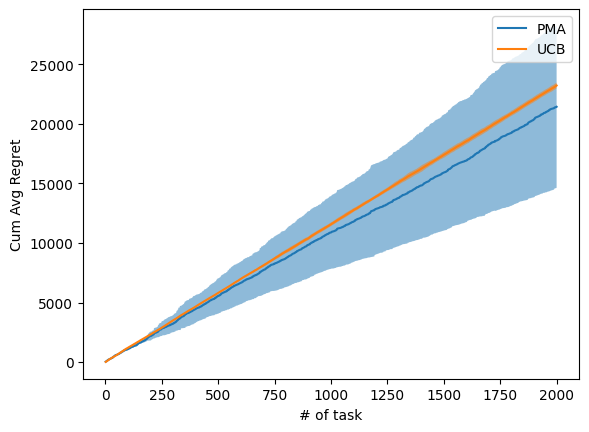

In [6]:
mean_UCB = np.mean(best_UCB['regrets'], axis=0)
std_UCB = np.std(best_UCB['regrets'], axis=0)
mean_PMA = np.mean(best_PMA['regrets'], axis=0)
std_PMA = np.std(best_PMA['regrets'], axis=0)
X = np.arange(1,n_task+1)
plt.plot(X, mean_PMA, '-', label='PMA')
plt.fill_between(X, mean_PMA-std_PMA, mean_PMA+std_PMA, alpha=0.5)
plt.plot(X, mean_UCB, '-', label='UCB')
plt.fill_between(X, mean_UCB-std_UCB, mean_UCB+std_UCB, alpha=0.5)
plt.xlabel('# of task')
plt.ylabel('Cum Avg Regret')
plt.legend()
plt.show()
plt.close()

In [7]:
# def round(X, precision = .03):
#     return np.round(np.array(X)/precision)*precision
# round(mean_PMA)

In [8]:
# from scipy.interpolate import Rbf

# X = np.arange(1,n_task+1)
# rbf = Rbf(X, mean_UCB, function = 'multiquadric', smooth = 500)
# y_UCB_rbf = rbf(X)
# rbf = Rbf(X, mean_PMA, function = 'multiquadric', smooth = 500)
# y_PMA_rbf = rbf(X)

# plt.plot(X, y_PMA_rbf, '-', label='PMA')
# plt.fill_between(X, y_PMA_rbf-std_PMA, y_PMA_rbf+std_PMA, alpha=0.5)
# plt.plot(X, y_UCB_rbf, '-', label='UCB')
# plt.fill_between(X, y_UCB_rbf-std_UCB, y_UCB_rbf+std_UCB, alpha=0.5)
# plt.xlabel('# of task')
# plt.ylabel('Cum Avg Regret')

# plt.legend()
# plt.show()

In [9]:
# input_dict["n_sim"] = 5

# input_dict["name"] = "UCB"
# input_dict["params_set"] = alpha_set
# best_UCB = eval(input_dict)

# input_dict["name"] = "TS"
# input_dict["params_set"] = v_set
# best_TS = eval(input_dict)

# mean_UCB = np.mean(best_UCB['regrets'], axis=0)
# std_UCB = np.std(best_UCB['regrets'], axis=0)
# mean_TS = np.mean(best_TS['regrets'], axis=0)
# std_TS = np.std(best_TS['regrets'], axis=0)
# X = np.arange(1,T+1)
# plt.plot(X, mean_TS, '-', label='TS')
# plt.fill_between(X, mean_TS-std_TS, mean_TS+std_TS, alpha=0.5)
# plt.plot(X, mean_UCB, '-', label='UCB')
# plt.fill_between(X, mean_UCB-std_UCB, mean_UCB+std_UCB, alpha=0.5)
# plt.xlabel('# of step')
# plt.ylabel('Cum Avg Regret')
# plt.legend()
# plt.show()
# plt.close()